In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
train=pd.read_csv('train.csv')
sales=pd.read_csv('sales.csv')
brand=pd.read_csv('brand_keyword_cnt.csv')
product_info=pd.read_csv('product_info.csv')

In [4]:
train=pd.read_csv('without_outliers.csv')

In [5]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [80]:
data = train.loc[:,'2022-01-01':'2023-04-04'].mean()
series = data.reset_index()
series.columns = ['ds','y']
series.head(3)

ds          y
0  2022-01-01  12.887476
1  2022-01-02  10.418880
2  2022-01-03   9.013090

In [81]:
df=pd.DataFrame(series)
df

ds          y
0    2022-01-01  12.887476
1    2022-01-02  10.418880
2    2022-01-03   9.013090
3    2022-01-04   9.190938
4    2022-01-05  11.204216
..          ...        ...
454  2023-03-31   7.706293
455  2023-04-01   7.123033
456  2023-04-02   6.975456
457  2023-04-03   9.040340
458  2023-04-04  10.031026

[459 rows x 2 columns]

In [12]:
end_date = '2023-01-02'
mask1 = (df['ds'] <= end_date)
mask2 = (df['ds'] > end_date)

In [13]:
X_tr = df.loc[mask1]
X_tst = df.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (367, 2)
test shape (92, 2)


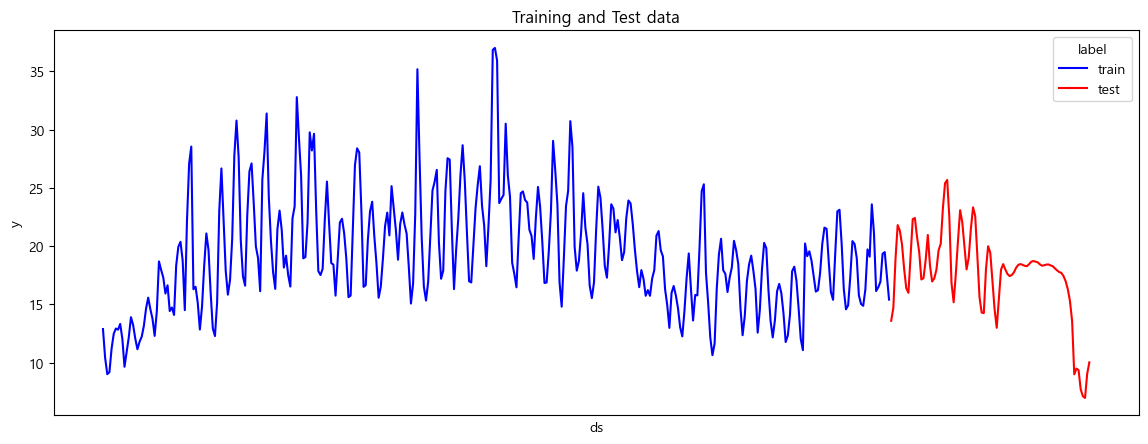

In [14]:
import seaborn as sns

merged_df = pd.concat([X_tr, X_tst], ignore_index=True)
merged_df['label'] = np.where(merged_df['ds'] < '2023-01-02', 'train', 'test')

plt.figure(figsize=(14, 5))
sns.lineplot(data=merged_df, x='ds', y='y', hue='label', palette={'train': 'blue', 'test': 'red'})
plt.title('Training and Test data')
plt.xticks([])
plt.show()

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
model =Prophet()
model.fit(X_tr)

19:47:07 - cmdstanpy - INFO - Chain [1] start processing
19:47:07 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = model.make_future_dataframe(periods=92, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
452 2023-03-29  13.615217    9.220167   17.715715
453 2023-03-30  17.013081   12.967202   21.158340
454 2023-03-31  18.891993   14.901138   22.960289
455 2023-04-01  17.269739   13.012220   21.264577
456 2023-04-02  14.966568   10.788492   19.334615
457 2023-04-03  12.138078    8.126872   16.209904
458 2023-04-04  11.126913    7.138329   15.248414

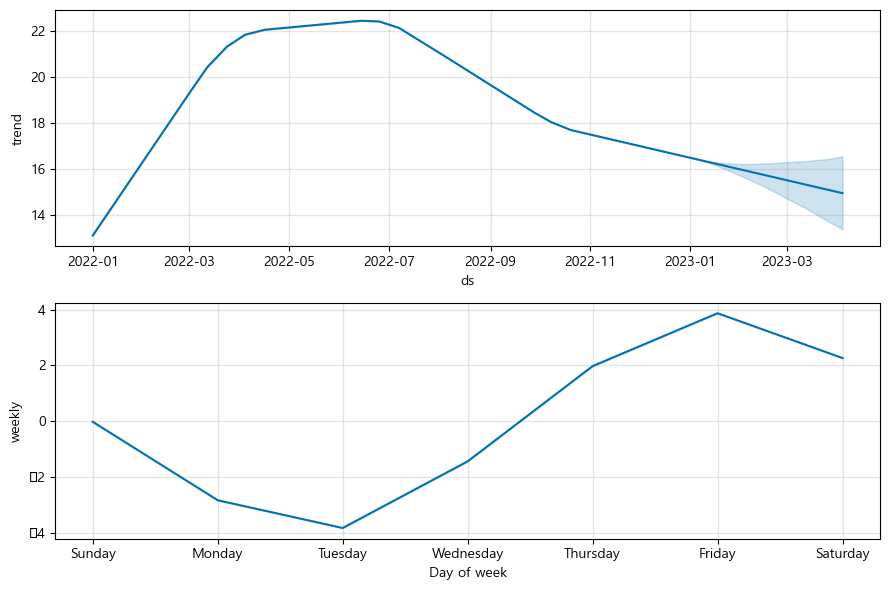

In [56]:
fig = model.plot_components(forecast)

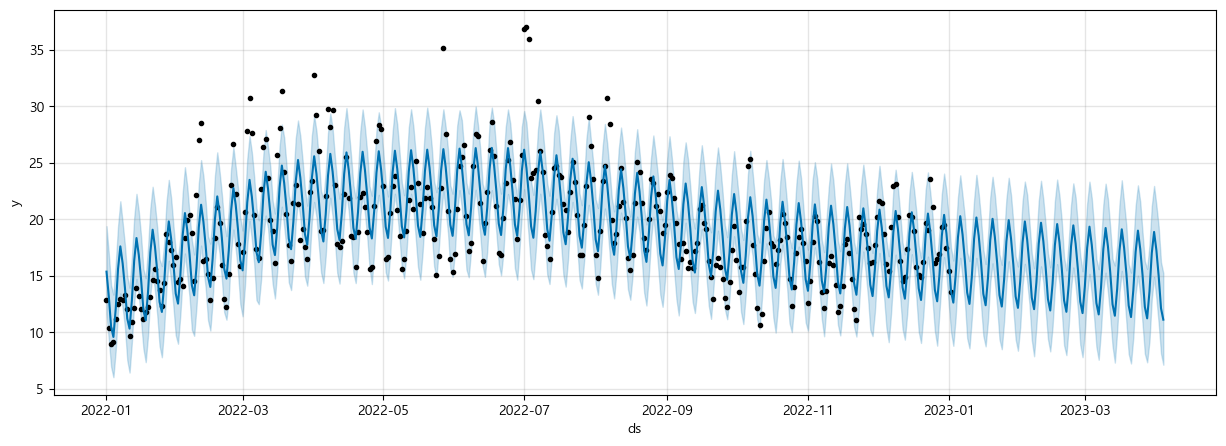

In [57]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

In [58]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
85 2023-03-29  13.615217    9.425393   17.721732
86 2023-03-30  17.013081   12.720749   21.128041
87 2023-03-31  18.891993   14.811852   22.945151
88 2023-04-01  17.269739   13.253322   21.394556
89 2023-04-02  14.966568   10.782096   19.216939
90 2023-04-03  12.138078    7.755243   16.055919
91 2023-04-04  11.126913    7.033617   14.845429

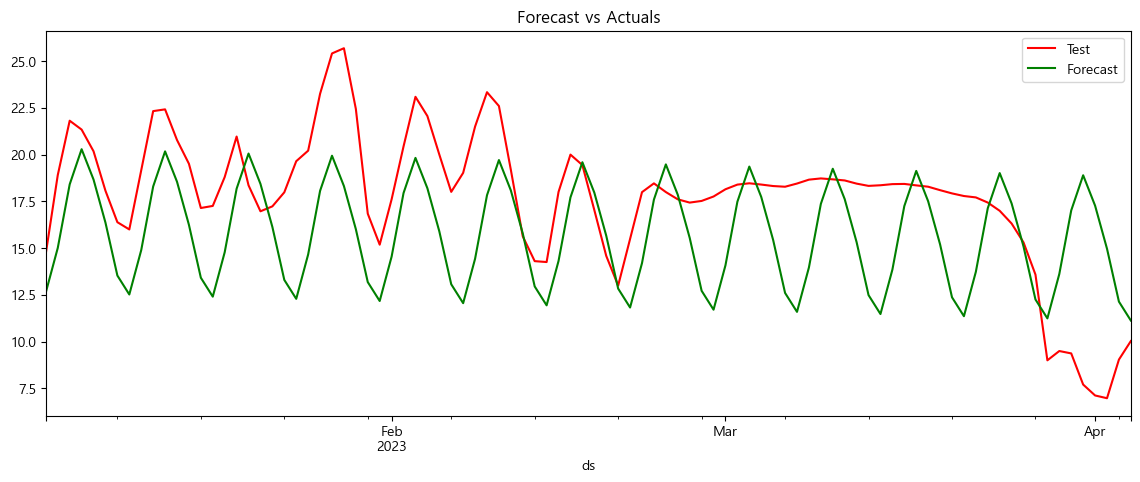

In [59]:
### 예측과 실제 차이 보여주기. (test 데이터)
X_tst['ds'] = pd.to_datetime(X_tst['ds'])
X_tst_forecast['ds'] = pd.to_datetime(X_tst_forecast['ds'])

f, ax = plt.subplots(figsize=(14, 5))
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line', x='ds', y='yhat', color='green', label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [60]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE 21.5005


In [61]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)

19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
future = model_with_holidays.make_future_dataframe(periods= 92, freq='D')
forecast = model_with_holidays.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
452 2023-03-29  13.647842    9.627681   17.552451
453 2023-03-30  17.006392   12.923048   21.276271
454 2023-03-31  18.885345   14.852823   22.901449
455 2023-04-01  17.281112   13.188777   21.450816
456 2023-04-02  15.038276   11.038025   19.175568
457 2023-04-03  12.231804    7.925697   16.268984
458 2023-04-04  11.139818    6.967734   15.415512

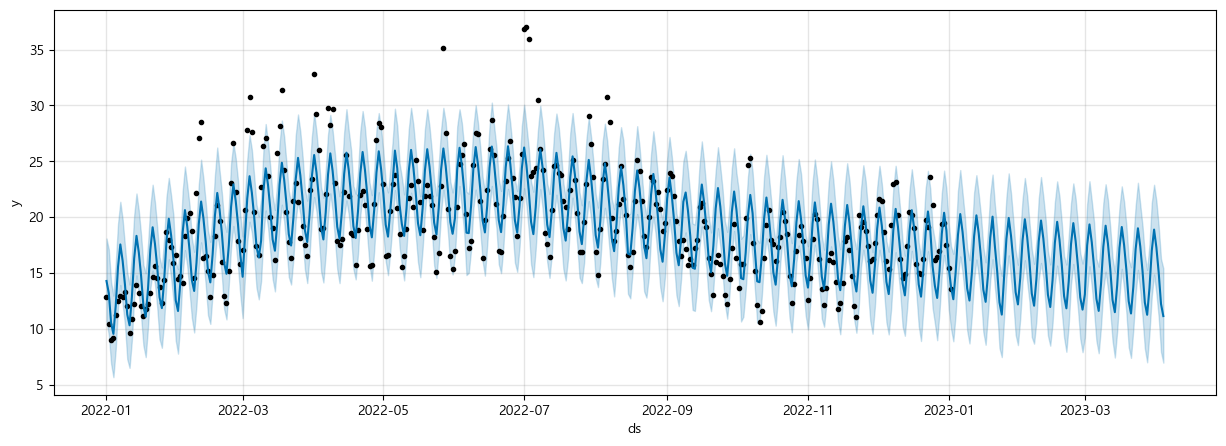

In [63]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_with_holidays.plot(forecast,ax=ax)
plt.show()

In [64]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
85 2023-03-29  13.647842    9.801903   17.561046
86 2023-03-30  17.006392   12.681822   20.726859
87 2023-03-31  18.885345   14.919315   23.163026
88 2023-04-01  17.281112   13.295990   21.327102
89 2023-04-02  15.038276   11.179802   19.284006
90 2023-04-03  12.231804    8.352871   16.207958
91 2023-04-04  11.139818    6.689230   15.246691

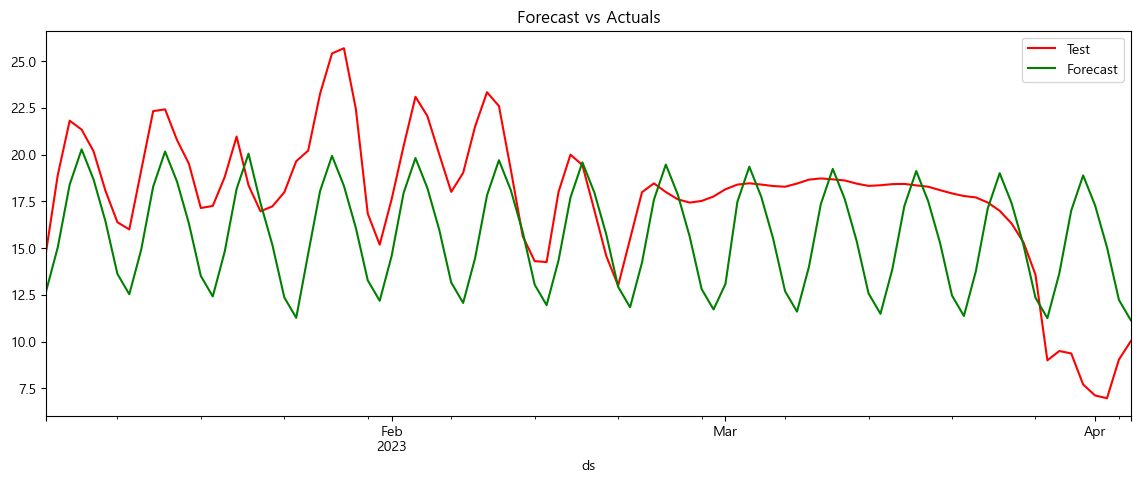

In [66]:
X_tst['ds'] = pd.to_datetime(X_tst['ds'])
X_tst_forecast_holiday['ds'] = pd.to_datetime(X_tst_forecast_holiday['ds'])

f, ax = plt.subplots(figsize=(14, 5))
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast_holiday.plot(kind='line', x='ds', y='yhat', color='green', label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [67]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape,4))

MAPE 21.5746


In [16]:
import holidays

holiday = pd.DataFrame([])
for date, name in sorted(holidays.KR(years=[2022,2023]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "KR-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [17]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'holidays_prior_scale':[0.001,0.01,0.05,0.1],
              'n_changepoints' : [10,25,50],
               'seasonality_prior_scale' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 2400


In [19]:
from prophet import Prophet

In [20]:
import random

strt='2023-01-02'
end='2023-04-04'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_prior_scale = p['seasonality_prior_scale'],
                         weekly_seasonality=True,
                         daily_seasonality = False,
                         yearly_seasonality = False,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='KR')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=92, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:00:26 - cmdstanpy - INFO - Chain [1] start processing
19:00:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.884118946367675
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:00:28 - cmdstanpy - INFO - Chain [1] start processing
19:00:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.03976934728746
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:00:28 - cmdstanpy - INFO - Chain [1] start processing
19:00:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.118025170648153
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:00:29 - cmdstanpy - INFO - Chain [1] start processing
19:00:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.882789465556737
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:00:30 - cmdstanpy - INFO - Chain [1] start processing
19:00:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.855736392607763
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:00:31 - cmdstanpy - INFO - Chain [1] start processing
19:00:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.52307872732847
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:00:32 - cmdstanpy - INFO - Chain [1] start processing
19:00:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.224474598847713
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:00:33 - cmdstanpy - INFO - Chain [1] start processing
19:00:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.00899978093629
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:00:34 - cmdstanpy - INFO - Chain [1] start processing
19:00:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.368339972145503
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:00:35 - cmdstanpy - INFO - Chain [1] start processing
19:00:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.625480599068037
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:00:36 - cmdstanpy - INFO - Chain [1] start processing
19:00:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.112328791299124
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:00:37 - cmdstanpy - INFO - Chain [1] start processing
19:00:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.921046458272215
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:00:38 - cmdstanpy - INFO - Chain [1] start processing
19:00:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.01305904057988
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:00:39 - cmdstanpy - INFO - Chain [1] start processing
19:00:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.01961596371051
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:00:40 - cmdstanpy - INFO - Chain [1] start processing
19:00:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.629190129525256
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:00:41 - cmdstanpy - INFO - Chain [1] start processing
19:00:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.11011057648769
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.952798960992336
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.186426870651893
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:00:43 - cmdstanpy - INFO - Chain [1] start processing
19:00:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.0154862734227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:00:44 - cmdstanpy - INFO - Chain [1] start processing
19:00:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.52840716067811
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:00:45 - cmdstanpy - INFO - Chain [1] start processing
19:00:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.699967484586328
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:00:46 - cmdstanpy - INFO - Chain [1] start processing
19:00:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.85905573423046
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:00:47 - cmdstanpy - INFO - Chain [1] start processing
19:00:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.676785385317103
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:00:48 - cmdstanpy - INFO - Chain [1] start processing
19:00:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.854643252466918
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:00:49 - cmdstanpy - INFO - Chain [1] start processing
19:00:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.793141273817763
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.694940032853744
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.720858976103145
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:00:52 - cmdstanpy - INFO - Chain [1] start processing
19:00:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.69239766143833
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:00:53 - cmdstanpy - INFO - Chain [1] start processing
19:00:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.70792863473662
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:00:54 - cmdstanpy - INFO - Chain [1] start processing
19:00:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.68702110911664
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:00:55 - cmdstanpy - INFO - Chain [1] start processing
19:00:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.969929703183166
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:00:56 - cmdstanpy - INFO - Chain [1] start processing
19:00:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.01856370032192
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:00:57 - cmdstanpy - INFO - Chain [1] start processing
19:00:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.077797364095115
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:00:58 - cmdstanpy - INFO - Chain [1] start processing
19:00:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.03313036679908
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:00:59 - cmdstanpy - INFO - Chain [1] start processing
19:00:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.095914729493803
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:01:00 - cmdstanpy - INFO - Chain [1] start processing
19:01:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.967509043179845
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:01:01 - cmdstanpy - INFO - Chain [1] start processing
19:01:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.043897904422394
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:01:02 - cmdstanpy - INFO - Chain [1] start processing
19:01:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.021582250314257
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:01:03 - cmdstanpy - INFO - Chain [1] start processing
19:01:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.00537118695131
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:01:04 - cmdstanpy - INFO - Chain [1] start processing
19:01:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.963570715019316
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.473740149776418
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.580867717066255
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:01:08 - cmdstanpy - INFO - Chain [1] start processing
19:01:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.66857262689205
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:01:09 - cmdstanpy - INFO - Chain [1] start processing
19:01:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.637446906649696
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:01:10 - cmdstanpy - INFO - Chain [1] start processing
19:01:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.7517958424223
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:01:11 - cmdstanpy - INFO - Chain [1] start processing
19:01:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.817584347421107
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:01:12 - cmdstanpy - INFO - Chain [1] start processing
19:01:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.638328251813853
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:01:13 - cmdstanpy - INFO - Chain [1] start processing
19:01:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.676796595930615
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:01:15 - cmdstanpy - INFO - Chain [1] start processing
19:01:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.59548176731239
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:01:16 - cmdstanpy - INFO - Chain [1] start processing
19:01:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.816462107453027
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:01:17 - cmdstanpy - INFO - Chain [1] start processing
19:01:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.027862809911984
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:01:18 - cmdstanpy - INFO - Chain [1] start processing
19:01:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.072178727284854
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:01:19 - cmdstanpy - INFO - Chain [1] start processing
19:01:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.007911104045498
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:01:20 - cmdstanpy - INFO - Chain [1] start processing
19:01:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.04494688686509
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.05251107158132
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:01:22 - cmdstanpy - INFO - Chain [1] start processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.016390567184978
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:01:23 - cmdstanpy - INFO - Chain [1] start processing
19:01:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.151326333971205
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:01:24 - cmdstanpy - INFO - Chain [1] start processing
19:01:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.017092029714547
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:01:25 - cmdstanpy - INFO - Chain [1] start processing
19:01:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.06969214585508
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:01:26 - cmdstanpy - INFO - Chain [1] start processing
19:01:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.039283802828514
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:01:27 - cmdstanpy - INFO - Chain [1] start processing
19:01:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.597283829752264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:01:28 - cmdstanpy - INFO - Chain [1] start processing
19:01:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.84694768230442
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:01:28 - cmdstanpy - INFO - Chain [1] start processing
19:01:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.615802248407945
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:01:29 - cmdstanpy - INFO - Chain [1] start processing
19:01:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.687793024220536
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.297102341738427
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.28986898200071
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.92631616124737
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:01:33 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.479635236956547
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:01:34 - cmdstanpy - INFO - Chain [1] start processing
19:01:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.456761319993877
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:01:35 - cmdstanpy - INFO - Chain [1] start processing
19:01:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.159355531963016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:01:35 - cmdstanpy - INFO - Chain [1] start processing
19:01:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.128855488234738
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:01:36 - cmdstanpy - INFO - Chain [1] start processing
19:01:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.026670156321263
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:01:37 - cmdstanpy - INFO - Chain [1] start processing
19:01:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.84830385108795
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:01:38 - cmdstanpy - INFO - Chain [1] start processing
19:01:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.91839266156469
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:01:39 - cmdstanpy - INFO - Chain [1] start processing
19:01:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.90751281095287
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:01:40 - cmdstanpy - INFO - Chain [1] start processing
19:01:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.457716605153017
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:01:41 - cmdstanpy - INFO - Chain [1] start processing
19:01:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.412632141151246
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:01:41 - cmdstanpy - INFO - Chain [1] start processing
19:01:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.165088850867665
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:01:42 - cmdstanpy - INFO - Chain [1] start processing
19:01:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.435041484242763
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:01:43 - cmdstanpy - INFO - Chain [1] start processing
19:01:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.89612979020033
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:01:44 - cmdstanpy - INFO - Chain [1] start processing
19:01:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.43570164858586
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:01:45 - cmdstanpy - INFO - Chain [1] start processing
19:01:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.683986782757724
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:01:46 - cmdstanpy - INFO - Chain [1] start processing
19:01:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.860066854276436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:01:47 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.728829204852218
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:01:48 - cmdstanpy - INFO - Chain [1] start processing
19:01:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.780534030833202
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:01:49 - cmdstanpy - INFO - Chain [1] start processing
19:01:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.635239373874697
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:01:50 - cmdstanpy - INFO - Chain [1] start processing
19:01:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.499034202357823
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:01:51 - cmdstanpy - INFO - Chain [1] start processing
19:01:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.73919220844091
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:01:52 - cmdstanpy - INFO - Chain [1] start processing
19:01:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.710150682469646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:01:53 - cmdstanpy - INFO - Chain [1] start processing
19:01:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.70391859025447
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:01:54 - cmdstanpy - INFO - Chain [1] start processing
19:01:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.008311054667438
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:01:55 - cmdstanpy - INFO - Chain [1] start processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.977473018347865
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.97197112512722
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:01:57 - cmdstanpy - INFO - Chain [1] start processing
19:01:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.028174477796796
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:01:58 - cmdstanpy - INFO - Chain [1] start processing
19:01:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.080024252000594
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:01:59 - cmdstanpy - INFO - Chain [1] start processing
19:01:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.05167122893427
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:02:00 - cmdstanpy - INFO - Chain [1] start processing
19:02:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.018549715037725
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:02:01 - cmdstanpy - INFO - Chain [1] start processing
19:02:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.973889261271488
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:02:02 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.050129983223638
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.05250905409782
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:02:05 - cmdstanpy - INFO - Chain [1] start processing
19:02:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.623738976978075
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:02:05 - cmdstanpy - INFO - Chain [1] start processing
19:02:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.798631810434713
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:02:06 - cmdstanpy - INFO - Chain [1] start processing
19:02:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.709410731933048
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:02:06 - cmdstanpy - INFO - Chain [1] start processing
19:02:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.68912600995711
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:02:07 - cmdstanpy - INFO - Chain [1] start processing
19:02:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.86825849265154
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:02:08 - cmdstanpy - INFO - Chain [1] start processing
19:02:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.835389541898337
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:02:09 - cmdstanpy - INFO - Chain [1] start processing
19:02:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.64344080659593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:02:10 - cmdstanpy - INFO - Chain [1] start processing
19:02:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.773477667848304
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:02:11 - cmdstanpy - INFO - Chain [1] start processing
19:02:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.853174125774334
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:02:12 - cmdstanpy - INFO - Chain [1] start processing
19:02:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.64563227402359
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:02:13 - cmdstanpy - INFO - Chain [1] start processing
19:02:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.060046999667264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:02:14 - cmdstanpy - INFO - Chain [1] start processing
19:02:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.97008706070089
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:02:15 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.145274610537545
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:02:16 - cmdstanpy - INFO - Chain [1] start processing
19:02:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.12678438939893
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.97411780024577
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.07618178584743
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:02:20 - cmdstanpy - INFO - Chain [1] start processing
19:02:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.063402922163306
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:02:21 - cmdstanpy - INFO - Chain [1] start processing
19:02:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.05855750769832
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:02:22 - cmdstanpy - INFO - Chain [1] start processing
19:02:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.972155772366712
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:02:24 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.06202962550803
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:02:25 - cmdstanpy - INFO - Chain [1] start processing
19:02:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.389527946220984
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:02:26 - cmdstanpy - INFO - Chain [1] start processing
19:02:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.786624069323057
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:02:27 - cmdstanpy - INFO - Chain [1] start processing
19:02:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.702365545338413
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:02:28 - cmdstanpy - INFO - Chain [1] start processing
19:02:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.65607525974798
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:02:30 - cmdstanpy - INFO - Chain [1] start processing
19:02:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.4298802357718
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:02:31 - cmdstanpy - INFO - Chain [1] start processing
19:02:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.884616193272446
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:02:32 - cmdstanpy - INFO - Chain [1] start processing
19:02:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.44204168880515
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:02:33 - cmdstanpy - INFO - Chain [1] start processing
19:02:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.68131524354242
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:02:34 - cmdstanpy - INFO - Chain [1] start processing
19:02:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.97894043914332
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:02:35 - cmdstanpy - INFO - Chain [1] start processing
19:02:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.04600492410195
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:02:36 - cmdstanpy - INFO - Chain [1] start processing
19:02:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.626025342502643
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:02:37 - cmdstanpy - INFO - Chain [1] start processing
19:02:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.454199196446506
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:02:38 - cmdstanpy - INFO - Chain [1] start processing
19:02:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.97644693305266
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.589017977582287
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:02:41 - cmdstanpy - INFO - Chain [1] start processing
19:02:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.953510952017144
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:02:42 - cmdstanpy - INFO - Chain [1] start processing
19:02:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.60342425402958
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:02:43 - cmdstanpy - INFO - Chain [1] start processing
19:02:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.999694003575335
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:02:44 - cmdstanpy - INFO - Chain [1] start processing
19:02:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.63703650032758
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:02:45 - cmdstanpy - INFO - Chain [1] start processing
19:02:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.397888223066996
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:02:46 - cmdstanpy - INFO - Chain [1] start processing
19:02:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.282015110585036
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:02:47 - cmdstanpy - INFO - Chain [1] start processing
19:02:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.603073197588078
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:02:48 - cmdstanpy - INFO - Chain [1] start processing
19:02:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.787804703031416
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:02:49 - cmdstanpy - INFO - Chain [1] start processing
19:02:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.710267994881082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.75417119411308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:02:51 - cmdstanpy - INFO - Chain [1] start processing
19:02:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.730829720077192
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:02:53 - cmdstanpy - INFO - Chain [1] start processing
19:02:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.72782990766756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:02:54 - cmdstanpy - INFO - Chain [1] start processing
19:02:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.750031318269386
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:02:55 - cmdstanpy - INFO - Chain [1] start processing
19:02:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.713430348452384
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:02:56 - cmdstanpy - INFO - Chain [1] start processing
19:02:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.792735336952294
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:02:57 - cmdstanpy - INFO - Chain [1] start processing
19:02:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.757569053899
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:02:58 - cmdstanpy - INFO - Chain [1] start processing
19:02:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.122572363710596
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:03:00 - cmdstanpy - INFO - Chain [1] start processing
19:03:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.242559047862418
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:03:01 - cmdstanpy - INFO - Chain [1] start processing
19:03:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.000683494517343
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.146574351217694
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:03:03 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.215239686787427
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:03:04 - cmdstanpy - INFO - Chain [1] start processing
19:03:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.10363674263993
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:03:06 - cmdstanpy - INFO - Chain [1] start processing
19:03:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.156036961052244
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:03:07 - cmdstanpy - INFO - Chain [1] start processing
19:03:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.18626519124664
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:03:08 - cmdstanpy - INFO - Chain [1] start processing
19:03:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.21558843407699
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:03:09 - cmdstanpy - INFO - Chain [1] start processing
19:03:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.191205604807234
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:03:10 - cmdstanpy - INFO - Chain [1] start processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.675412523784832
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.828371785971346
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:03:12 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.59588236072288
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:03:13 - cmdstanpy - INFO - Chain [1] start processing
19:03:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.85866569866916
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:03:15 - cmdstanpy - INFO - Chain [1] start processing
19:03:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.781963635233353
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:03:16 - cmdstanpy - INFO - Chain [1] start processing
19:03:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.71735906074409
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:03:17 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.820436879433608
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:03:18 - cmdstanpy - INFO - Chain [1] start processing
19:03:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.653026861346646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:03:19 - cmdstanpy - INFO - Chain [1] start processing
19:03:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.698322175010585
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:03:20 - cmdstanpy - INFO - Chain [1] start processing
19:03:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.866027660561393
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:03:21 - cmdstanpy - INFO - Chain [1] start processing
19:03:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.203472552156388
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:03:21 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.1862451951016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.26537742591774
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:03:23 - cmdstanpy - INFO - Chain [1] start processing
19:03:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.166834901191994
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:03:24 - cmdstanpy - INFO - Chain [1] start processing
19:03:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.19954857579139
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:03:25 - cmdstanpy - INFO - Chain [1] start processing
19:03:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.199018577587392
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:03:26 - cmdstanpy - INFO - Chain [1] start processing
19:03:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.08994900569543
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:03:27 - cmdstanpy - INFO - Chain [1] start processing
19:03:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.172005359934225
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:03:28 - cmdstanpy - INFO - Chain [1] start processing
19:03:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.120979078757287
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:03:28 - cmdstanpy - INFO - Chain [1] start processing
19:03:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.150047522704508
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:03:29 - cmdstanpy - INFO - Chain [1] start processing
19:03:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.27188040524535
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:03:30 - cmdstanpy - INFO - Chain [1] start processing
19:03:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.825842784835555
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:03:31 - cmdstanpy - INFO - Chain [1] start processing
19:03:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.81291617026993
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:03:32 - cmdstanpy - INFO - Chain [1] start processing
19:03:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.390529354082055
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:03:33 - cmdstanpy - INFO - Chain [1] start processing
19:03:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.224292138872865
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.141986886847747
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.29428204597586
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:03:35 - cmdstanpy - INFO - Chain [1] start processing
19:03:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.175827257022288
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:03:36 - cmdstanpy - INFO - Chain [1] start processing
19:03:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.82627073908933
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:03:37 - cmdstanpy - INFO - Chain [1] start processing
19:03:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.742631983378864
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:03:38 - cmdstanpy - INFO - Chain [1] start processing
19:03:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.10461468629495
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:03:39 - cmdstanpy - INFO - Chain [1] start processing
19:03:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.497119503677634
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:03:40 - cmdstanpy - INFO - Chain [1] start processing
19:03:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.559223571664727
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:03:41 - cmdstanpy - INFO - Chain [1] start processing
19:03:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.536916837977948
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:03:41 - cmdstanpy - INFO - Chain [1] start processing
19:03:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.735701033867322
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:03:42 - cmdstanpy - INFO - Chain [1] start processing
19:03:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.60927106723013
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:03:43 - cmdstanpy - INFO - Chain [1] start processing
19:03:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.60759284906346
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:03:44 - cmdstanpy - INFO - Chain [1] start processing
19:03:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.525218852512605
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:03:45 - cmdstanpy - INFO - Chain [1] start processing
19:03:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.165537386821672
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:03:46 - cmdstanpy - INFO - Chain [1] start processing
19:03:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.55468513772168
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:03:47 - cmdstanpy - INFO - Chain [1] start processing
19:03:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.78091551977052
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:03:48 - cmdstanpy - INFO - Chain [1] start processing
19:03:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.58637043735631
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:03:48 - cmdstanpy - INFO - Chain [1] start processing
19:03:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.671350755326113
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:03:49 - cmdstanpy - INFO - Chain [1] start processing
19:03:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.753496883017117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:03:50 - cmdstanpy - INFO - Chain [1] start processing
19:03:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.75957216677318
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:03:51 - cmdstanpy - INFO - Chain [1] start processing
19:03:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.76915318938249
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:03:52 - cmdstanpy - INFO - Chain [1] start processing
19:03:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.73212467572549
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.67887301911686
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.782508401563305
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:03:55 - cmdstanpy - INFO - Chain [1] start processing
19:03:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.88837993790757
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:03:56 - cmdstanpy - INFO - Chain [1] start processing
19:03:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.16860781296756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:03:57 - cmdstanpy - INFO - Chain [1] start processing
19:03:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.311534630320104
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:03:58 - cmdstanpy - INFO - Chain [1] start processing
19:03:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.161024664846927
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:03:58 - cmdstanpy - INFO - Chain [1] start processing
19:03:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.205094679614604
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:03:59 - cmdstanpy - INFO - Chain [1] start processing
19:04:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.146535125987036
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:04:00 - cmdstanpy - INFO - Chain [1] start processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.329133465765487
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:04:01 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.23590534846614
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.21687242829046
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:04:03 - cmdstanpy - INFO - Chain [1] start processing
19:04:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.21069137217958
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:04:04 - cmdstanpy - INFO - Chain [1] start processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.245640260211346
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:04:05 - cmdstanpy - INFO - Chain [1] start processing
19:04:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.69727388535642
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:04:06 - cmdstanpy - INFO - Chain [1] start processing
19:04:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.828102830851165
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.769672604690346
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:04:08 - cmdstanpy - INFO - Chain [1] start processing
19:04:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.720656735872566
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:04:09 - cmdstanpy - INFO - Chain [1] start processing
19:04:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.904227915562547
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:04:10 - cmdstanpy - INFO - Chain [1] start processing
19:04:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.81078793255194
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:04:11 - cmdstanpy - INFO - Chain [1] start processing
19:04:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.699464349398973
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:04:11 - cmdstanpy - INFO - Chain [1] start processing
19:04:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.749983026063713
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:04:12 - cmdstanpy - INFO - Chain [1] start processing
19:04:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.842766860691793
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:04:13 - cmdstanpy - INFO - Chain [1] start processing
19:04:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 20.54412692582663
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:04:14 - cmdstanpy - INFO - Chain [1] start processing
19:04:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.26731124309969
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:04:15 - cmdstanpy - INFO - Chain [1] start processing
19:04:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.352697779117623
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:04:16 - cmdstanpy - INFO - Chain [1] start processing
19:04:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.2336929323206
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:04:17 - cmdstanpy - INFO - Chain [1] start processing
19:04:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.429761909786695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:04:18 - cmdstanpy - INFO - Chain [1] start processing
19:04:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.330844600189508
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:04:19 - cmdstanpy - INFO - Chain [1] start processing
19:04:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.403110117792913
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:04:20 - cmdstanpy - INFO - Chain [1] start processing
19:04:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.264759056993
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:04:21 - cmdstanpy - INFO - Chain [1] start processing
19:04:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.25799639245241
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:04:21 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.328962318648408
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:04:22 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.26167755749986
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:04:23 - cmdstanpy - INFO - Chain [1] start processing
19:04:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.13318155004036
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:04:24 - cmdstanpy - INFO - Chain [1] start processing
19:04:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.811267921390918
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:04:25 - cmdstanpy - INFO - Chain [1] start processing
19:04:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.060332410641358
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:04:26 - cmdstanpy - INFO - Chain [1] start processing
19:04:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.093131267724246
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:04:27 - cmdstanpy - INFO - Chain [1] start processing
19:04:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.940657990246713
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:04:28 - cmdstanpy - INFO - Chain [1] start processing
19:04:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.93796010492229
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:04:29 - cmdstanpy - INFO - Chain [1] start processing
19:04:29 - cmdstanpy - INFO - Chain [1] done processing
19:04:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:04:29 - cmdstanpy - INFO - Chain [1] start processing
19:04:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.034791769865357
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:04:30 - cmdstanpy - INFO - Chain [1] start processing
19:04:31 - cmdstanpy - INFO - Chain [1] done processing
19:04:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:04:31 - cmdstanpy - INFO - Chain [1] start processing
19:04:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.033996121008588
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:04:32 - cmdstanpy - INFO - Chain [1] start processing
19:04:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.890314162129982
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:04:33 - cmdstanpy - INFO - Chain [1] start processing
19:04:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.86074899468147
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:04:34 - cmdstanpy - INFO - Chain [1] start processing
19:04:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26008306275668
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.397921779409664
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:04:36 - cmdstanpy - INFO - Chain [1] start processing
19:04:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.073329665501955
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:04:37 - cmdstanpy - INFO - Chain [1] start processing
19:04:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.163063166280534
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:04:38 - cmdstanpy - INFO - Chain [1] start processing
19:04:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.126939118482948
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:04:39 - cmdstanpy - INFO - Chain [1] start processing
19:04:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.102678626177642
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:04:40 - cmdstanpy - INFO - Chain [1] start processing
19:04:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.09099436075005
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:04:41 - cmdstanpy - INFO - Chain [1] start processing
19:04:41 - cmdstanpy - INFO - Chain [1] done processing
19:04:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:04:41 - cmdstanpy - INFO - Chain [1] start processing
19:04:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.292123896870784
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:04:42 - cmdstanpy - INFO - Chain [1] start processing
19:04:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.276532000208682
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:04:43 - cmdstanpy - INFO - Chain [1] start processing
19:04:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.98911532256293
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:04:44 - cmdstanpy - INFO - Chain [1] start processing
19:04:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.625092380617396
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:04:45 - cmdstanpy - INFO - Chain [1] start processing
19:04:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.721505222509823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:04:46 - cmdstanpy - INFO - Chain [1] start processing
19:04:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.632227698090684
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:04:47 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.633817753924667
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.663422311167924
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:04:49 - cmdstanpy - INFO - Chain [1] start processing
19:04:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.6734081737527
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.598802199663087
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.64656781595174
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:04:52 - cmdstanpy - INFO - Chain [1] start processing
19:04:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.666860130673467
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:04:53 - cmdstanpy - INFO - Chain [1] start processing
19:04:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.73095681878182
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:04:54 - cmdstanpy - INFO - Chain [1] start processing
19:04:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.902592473413502
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:04:56 - cmdstanpy - INFO - Chain [1] start processing
19:04:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.995076039247994
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:04:56 - cmdstanpy - INFO - Chain [1] start processing
19:04:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.856851249650134
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:04:57 - cmdstanpy - INFO - Chain [1] start processing
19:04:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.78233942146277
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:04:58 - cmdstanpy - INFO - Chain [1] start processing
19:04:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.84524069559764
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:04:59 - cmdstanpy - INFO - Chain [1] start processing
19:05:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.9092439460853
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:05:00 - cmdstanpy - INFO - Chain [1] start processing
19:05:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.910833724753818
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:05:01 - cmdstanpy - INFO - Chain [1] start processing
19:05:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.885721505402014
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:05:02 - cmdstanpy - INFO - Chain [1] start processing
19:05:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.080073549218792
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:05:03 - cmdstanpy - INFO - Chain [1] start processing
19:05:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.83903748980427
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:05:04 - cmdstanpy - INFO - Chain [1] start processing
19:05:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.606479377337596
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:05:05 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.69169072542447
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.70197278412946
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:05:07 - cmdstanpy - INFO - Chain [1] start processing
19:05:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.715880894522325
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:05:08 - cmdstanpy - INFO - Chain [1] start processing
19:05:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.676588657959293
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:05:10 - cmdstanpy - INFO - Chain [1] start processing
19:05:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.780487373335795
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:05:11 - cmdstanpy - INFO - Chain [1] start processing
19:05:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.786779411191688
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:05:12 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.596178739957175
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:05:13 - cmdstanpy - INFO - Chain [1] start processing
19:05:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.73275319963397
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.736162593643048
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:05:15 - cmdstanpy - INFO - Chain [1] start processing
19:05:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.890895355776465
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:05:16 - cmdstanpy - INFO - Chain [1] start processing
19:05:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.956872997425936
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:05:17 - cmdstanpy - INFO - Chain [1] start processing
19:05:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.840402451692576
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:05:18 - cmdstanpy - INFO - Chain [1] start processing
19:05:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.869708154629226
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:05:19 - cmdstanpy - INFO - Chain [1] start processing
19:05:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.823090517612993
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:05:20 - cmdstanpy - INFO - Chain [1] start processing
19:05:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.912235684988058
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:05:21 - cmdstanpy - INFO - Chain [1] start processing
19:05:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.90299135884478
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:05:22 - cmdstanpy - INFO - Chain [1] start processing
19:05:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.832921892860792
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:05:23 - cmdstanpy - INFO - Chain [1] start processing
19:05:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.962191538030176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:05:24 - cmdstanpy - INFO - Chain [1] start processing
19:05:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.857381322244716
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:05:25 - cmdstanpy - INFO - Chain [1] start processing
19:05:25 - cmdstanpy - INFO - Chain [1] done processing
19:05:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:25 - cmdstanpy - INFO - Chain [1] start processing
19:05:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.002050697830434
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:05:27 - cmdstanpy - INFO - Chain [1] start processing
19:05:27 - cmdstanpy - INFO - Chain [1] done processing
19:05:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:27 - cmdstanpy - INFO - Chain [1] start processing
19:05:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.048035563304534
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:05:29 - cmdstanpy - INFO - Chain [1] start processing
19:05:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.934643893886467
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:05:30 - cmdstanpy - INFO - Chain [1] start processing
19:05:30 - cmdstanpy - INFO - Chain [1] done processing
19:05:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:30 - cmdstanpy - INFO - Chain [1] start processing
19:05:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.046908536226788
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:05:31 - cmdstanpy - INFO - Chain [1] start processing
19:05:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27623155858084
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:05:32 - cmdstanpy - INFO - Chain [1] start processing
19:05:32 - cmdstanpy - INFO - Chain [1] done processing
19:05:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:32 - cmdstanpy - INFO - Chain [1] start processing
19:05:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.045126986359552
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:05:34 - cmdstanpy - INFO - Chain [1] start processing
19:05:34 - cmdstanpy - INFO - Chain [1] done processing
19:05:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:34 - cmdstanpy - INFO - Chain [1] start processing
19:05:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.04921548040743
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.408209533833272
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:05:37 - cmdstanpy - INFO - Chain [1] start processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.339400618340715
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:05:38 - cmdstanpy - INFO - Chain [1] start processing
19:05:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.84099852209977
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:05:38 - cmdstanpy - INFO - Chain [1] start processing
19:05:39 - cmdstanpy - INFO - Chain [1] done processing
19:05:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:39 - cmdstanpy - INFO - Chain [1] start processing
19:05:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33408258496623
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:05:40 - cmdstanpy - INFO - Chain [1] start processing
19:05:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.254419347100594
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:05:41 - cmdstanpy - INFO - Chain [1] start processing
19:05:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.295271705646613
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:05:42 - cmdstanpy - INFO - Chain [1] start processing
19:05:42 - cmdstanpy - INFO - Chain [1] done processing
19:05:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:42 - cmdstanpy - INFO - Chain [1] start processing
19:05:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.341920109178425
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:05:44 - cmdstanpy - INFO - Chain [1] start processing
19:05:44 - cmdstanpy - INFO - Chain [1] done processing
19:05:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:44 - cmdstanpy - INFO - Chain [1] start processing
19:05:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34048000939578
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:05:45 - cmdstanpy - INFO - Chain [1] start processing
19:05:46 - cmdstanpy - INFO - Chain [1] done processing
19:05:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:46 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34938530572883
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:05:48 - cmdstanpy - INFO - Chain [1] start processing
19:05:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.165080285176096
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:05:48 - cmdstanpy - INFO - Chain [1] start processing
19:05:49 - cmdstanpy - INFO - Chain [1] done processing
19:05:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:49 - cmdstanpy - INFO - Chain [1] start processing
19:05:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.342536660212176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:05:51 - cmdstanpy - INFO - Chain [1] start processing
19:05:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53027675521824
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:05:52 - cmdstanpy - INFO - Chain [1] start processing
19:05:52 - cmdstanpy - INFO - Chain [1] done processing
19:05:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:05:52 - cmdstanpy - INFO - Chain [1] start processing
19:05:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.342831970266147
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:05:53 - cmdstanpy - INFO - Chain [1] start processing
19:05:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.624357939134065
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:05:54 - cmdstanpy - INFO - Chain [1] start processing
19:05:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.5994898615617
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:05:55 - cmdstanpy - INFO - Chain [1] start processing
19:05:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.65714431467788
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:05:56 - cmdstanpy - INFO - Chain [1] start processing
19:05:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.62475888535894
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:05:57 - cmdstanpy - INFO - Chain [1] start processing
19:05:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.71244069767033
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:05:58 - cmdstanpy - INFO - Chain [1] start processing
19:05:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.665488916287366
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:05:59 - cmdstanpy - INFO - Chain [1] start processing
19:05:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.68186128633994
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:06:00 - cmdstanpy - INFO - Chain [1] start processing
19:06:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.72416079460195
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:06:01 - cmdstanpy - INFO - Chain [1] start processing
19:06:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.642667753429258
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:06:02 - cmdstanpy - INFO - Chain [1] start processing
19:06:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.70190013377316
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:06:03 - cmdstanpy - INFO - Chain [1] start processing
19:06:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.99276372502881
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:06:03 - cmdstanpy - INFO - Chain [1] start processing
19:06:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.89106309851872
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:06:04 - cmdstanpy - INFO - Chain [1] start processing
19:06:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.003481231803622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:06:05 - cmdstanpy - INFO - Chain [1] start processing
19:06:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.01604249624724
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:06:06 - cmdstanpy - INFO - Chain [1] start processing
19:06:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.913584795363594
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:06:07 - cmdstanpy - INFO - Chain [1] start processing
19:06:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.01362168384602
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:06:08 - cmdstanpy - INFO - Chain [1] start processing
19:06:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.989326692916755
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.985091611813225
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:06:10 - cmdstanpy - INFO - Chain [1] start processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.963394308071134
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:06:11 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.991734672143103
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:06:12 - cmdstanpy - INFO - Chain [1] start processing
19:06:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.58928511243281
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:06:13 - cmdstanpy - INFO - Chain [1] start processing
19:06:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.680318238236723
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:06:14 - cmdstanpy - INFO - Chain [1] start processing
19:06:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.63053391963299
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:06:15 - cmdstanpy - INFO - Chain [1] start processing
19:06:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.554635059926284
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:06:16 - cmdstanpy - INFO - Chain [1] start processing
19:06:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.7533065152778
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:06:16 - cmdstanpy - INFO - Chain [1] start processing
19:06:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.675320886322087
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:06:17 - cmdstanpy - INFO - Chain [1] start processing
19:06:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.596045668780896
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:06:18 - cmdstanpy - INFO - Chain [1] start processing
19:06:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.72388083611058
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:06:19 - cmdstanpy - INFO - Chain [1] start processing
19:06:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.63818117930212
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:06:20 - cmdstanpy - INFO - Chain [1] start processing
19:06:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.67751209130292
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:06:21 - cmdstanpy - INFO - Chain [1] start processing
19:06:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.87738389100698
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:06:22 - cmdstanpy - INFO - Chain [1] start processing
19:06:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.970067064412387
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:06:23 - cmdstanpy - INFO - Chain [1] start processing
19:06:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.910512041634416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:06:24 - cmdstanpy - INFO - Chain [1] start processing
19:06:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.873281743468862
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:06:25 - cmdstanpy - INFO - Chain [1] start processing
19:06:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.93934250445385
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:06:26 - cmdstanpy - INFO - Chain [1] start processing
19:06:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.837849495492005
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:06:27 - cmdstanpy - INFO - Chain [1] start processing
19:06:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.832121113199012
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:06:28 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.879122547202947
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:06:30 - cmdstanpy - INFO - Chain [1] start processing
19:06:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.854679519839397
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:06:31 - cmdstanpy - INFO - Chain [1] start processing
19:06:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.929338513562897
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:06:32 - cmdstanpy - INFO - Chain [1] start processing
19:06:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.335468968560193
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.212383039243456
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:06:34 - cmdstanpy - INFO - Chain [1] start processing
19:06:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.86541668662606
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:06:35 - cmdstanpy - INFO - Chain [1] start processing
19:06:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.385440608608707
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:06:36 - cmdstanpy - INFO - Chain [1] start processing
19:06:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.267458319677775
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:06:37 - cmdstanpy - INFO - Chain [1] start processing
19:06:37 - cmdstanpy - INFO - Chain [1] done processing
19:06:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:37 - cmdstanpy - INFO - Chain [1] start processing
19:06:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.182844266192667
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:06:39 - cmdstanpy - INFO - Chain [1] start processing
19:06:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.430462405133742
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:06:40 - cmdstanpy - INFO - Chain [1] start processing
19:06:40 - cmdstanpy - INFO - Chain [1] done processing
19:06:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:40 - cmdstanpy - INFO - Chain [1] start processing
19:06:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.188943135651396
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:06:42 - cmdstanpy - INFO - Chain [1] start processing
19:06:42 - cmdstanpy - INFO - Chain [1] done processing
19:06:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:42 - cmdstanpy - INFO - Chain [1] start processing
19:06:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.201637592002943
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:06:44 - cmdstanpy - INFO - Chain [1] start processing
19:06:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340370578352662
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:06:45 - cmdstanpy - INFO - Chain [1] start processing
19:06:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.422789421571533
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:06:46 - cmdstanpy - INFO - Chain [1] start processing
19:06:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.11970402933816
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:06:47 - cmdstanpy - INFO - Chain [1] start processing
19:06:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75175869372803
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:06:48 - cmdstanpy - INFO - Chain [1] start processing
19:06:48 - cmdstanpy - INFO - Chain [1] done processing
19:06:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:48 - cmdstanpy - INFO - Chain [1] start processing
19:06:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54080864916568
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:06:50 - cmdstanpy - INFO - Chain [1] start processing
19:06:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.315147390173156
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:06:51 - cmdstanpy - INFO - Chain [1] start processing
19:06:51 - cmdstanpy - INFO - Chain [1] done processing
19:06:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:51 - cmdstanpy - INFO - Chain [1] start processing
19:06:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.541587641411958
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:06:53 - cmdstanpy - INFO - Chain [1] start processing
19:06:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.325716340257845
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:06:54 - cmdstanpy - INFO - Chain [1] start processing
19:06:54 - cmdstanpy - INFO - Chain [1] done processing
19:06:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:06:54 - cmdstanpy - INFO - Chain [1] start processing
19:06:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.541770379859237
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:06:56 - cmdstanpy - INFO - Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60228361626516
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:06:57 - cmdstanpy - INFO - Chain [1] start processing
19:06:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.434246367373422
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:06:58 - cmdstanpy - INFO - Chain [1] start processing
19:06:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.651605243841942
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:06:59 - cmdstanpy - INFO - Chain [1] start processing
19:06:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.737180832806374
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:07:00 - cmdstanpy - INFO - Chain [1] start processing
19:07:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.731436210140686
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:07:01 - cmdstanpy - INFO - Chain [1] start processing
19:07:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.784188984904365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:07:02 - cmdstanpy - INFO - Chain [1] start processing
19:07:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.71070062591042
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:07:03 - cmdstanpy - INFO - Chain [1] start processing
19:07:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.78454746077865
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:07:04 - cmdstanpy - INFO - Chain [1] start processing
19:07:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.779005975465378
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:07:05 - cmdstanpy - INFO - Chain [1] start processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.638959560112824
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.639709453111177
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:07:07 - cmdstanpy - INFO - Chain [1] start processing
19:07:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.77241995817381
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:07:08 - cmdstanpy - INFO - Chain [1] start processing
19:07:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.056705289019742
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:07:09 - cmdstanpy - INFO - Chain [1] start processing
19:07:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.027206344511168
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:07:10 - cmdstanpy - INFO - Chain [1] start processing
19:07:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.043664940912986
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:07:11 - cmdstanpy - INFO - Chain [1] start processing
19:07:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.167666888815948
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:07:12 - cmdstanpy - INFO - Chain [1] start processing
19:07:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.105824754603788
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:07:13 - cmdstanpy - INFO - Chain [1] start processing
19:07:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.105774551537184
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:07:14 - cmdstanpy - INFO - Chain [1] start processing
19:07:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.029438327322225
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:07:15 - cmdstanpy - INFO - Chain [1] start processing
19:07:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.961571567705995
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:07:16 - cmdstanpy - INFO - Chain [1] start processing
19:07:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.034661559450004
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:07:16 - cmdstanpy - INFO - Chain [1] start processing
19:07:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.140057021706905
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:07:17 - cmdstanpy - INFO - Chain [1] start processing
19:07:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.65208139946734
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:07:18 - cmdstanpy - INFO - Chain [1] start processing
19:07:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.850500507816513
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:07:19 - cmdstanpy - INFO - Chain [1] start processing
19:07:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.676241489076894
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:07:20 - cmdstanpy - INFO - Chain [1] start processing
19:07:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.791347204872018
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:07:21 - cmdstanpy - INFO - Chain [1] start processing
19:07:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.81456924631659
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:07:22 - cmdstanpy - INFO - Chain [1] start processing
19:07:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.724797487465835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:07:23 - cmdstanpy - INFO - Chain [1] start processing
19:07:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.817631435405467
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:07:24 - cmdstanpy - INFO - Chain [1] start processing
19:07:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.73490874291479
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:07:25 - cmdstanpy - INFO - Chain [1] start processing
19:07:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.779518392256854
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:07:26 - cmdstanpy - INFO - Chain [1] start processing
19:07:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.93062368861819
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:07:27 - cmdstanpy - INFO - Chain [1] start processing
19:07:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.09893164078999
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:07:28 - cmdstanpy - INFO - Chain [1] start processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.022098550738182
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:07:29 - cmdstanpy - INFO - Chain [1] start processing
19:07:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.96884326889696
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.99432222667232
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.982661984847244
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.99905183142598
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.04308530810109
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:07:33 - cmdstanpy - INFO - Chain [1] start processing
19:07:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.994824193172523
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:07:34 - cmdstanpy - INFO - Chain [1] start processing
19:07:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.048966009763067
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:07:35 - cmdstanpy - INFO - Chain [1] start processing
19:07:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.99896031216385
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:07:36 - cmdstanpy - INFO - Chain [1] start processing
19:07:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.109924163521647
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:07:37 - cmdstanpy - INFO - Chain [1] start processing
19:07:37 - cmdstanpy - INFO - Chain [1] done processing
19:07:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:37 - cmdstanpy - INFO - Chain [1] start processing
19:07:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.25548004567979
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:07:39 - cmdstanpy - INFO - Chain [1] start processing
19:07:39 - cmdstanpy - INFO - Chain [1] done processing
19:07:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:39 - cmdstanpy - INFO - Chain [1] start processing
19:07:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.262242534271202
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:07:41 - cmdstanpy - INFO - Chain [1] start processing
19:07:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.268109717372916
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:07:41 - cmdstanpy - INFO - Chain [1] start processing
19:07:42 - cmdstanpy - INFO - Chain [1] done processing
19:07:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:42 - cmdstanpy - INFO - Chain [1] start processing
19:07:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.264611247156417
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:07:43 - cmdstanpy - INFO - Chain [1] start processing
19:07:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.194230394397646
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:07:44 - cmdstanpy - INFO - Chain [1] start processing
19:07:44 - cmdstanpy - INFO - Chain [1] done processing
19:07:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:44 - cmdstanpy - INFO - Chain [1] start processing
19:07:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.267899617928162
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:07:46 - cmdstanpy - INFO - Chain [1] start processing
19:07:46 - cmdstanpy - INFO - Chain [1] done processing
19:07:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:46 - cmdstanpy - INFO - Chain [1] start processing
19:07:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.267883517210887
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:07:48 - cmdstanpy - INFO - Chain [1] start processing
19:07:48 - cmdstanpy - INFO - Chain [1] done processing
19:07:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:48 - cmdstanpy - INFO - Chain [1] start processing
19:07:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.267435933421986
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:07:50 - cmdstanpy - INFO - Chain [1] start processing
19:07:50 - cmdstanpy - INFO - Chain [1] done processing
19:07:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:50 - cmdstanpy - INFO - Chain [1] start processing
19:07:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.267592885383518
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:07:51 - cmdstanpy - INFO - Chain [1] start processing
19:07:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.391647459928567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:07:52 - cmdstanpy - INFO - Chain [1] start processing
19:07:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55352003624065
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.671658515600605
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31264782828875
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:07:55 - cmdstanpy - INFO - Chain [1] start processing
19:07:55 - cmdstanpy - INFO - Chain [1] done processing
19:07:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:55 - cmdstanpy - INFO - Chain [1] start processing
19:07:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.635401587882196
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:07:57 - cmdstanpy - INFO - Chain [1] start processing
19:07:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.650517586087943
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:07:58 - cmdstanpy - INFO - Chain [1] start processing
19:07:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.506340668846935
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:07:59 - cmdstanpy - INFO - Chain [1] start processing
19:07:59 - cmdstanpy - INFO - Chain [1] done processing
19:07:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:07:59 - cmdstanpy - INFO - Chain [1] start processing
19:08:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63270012049337
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:08:00 - cmdstanpy - INFO - Chain [1] start processing
19:08:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90569399625708
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:08:01 - cmdstanpy - INFO - Chain [1] start processing
19:08:01 - cmdstanpy - INFO - Chain [1] done processing
19:08:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:02 - cmdstanpy - INFO - Chain [1] start processing
19:08:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63647102196641
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:08:03 - cmdstanpy - INFO - Chain [1] start processing
19:08:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.80727912591653
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:08:04 - cmdstanpy - INFO - Chain [1] start processing
19:08:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.900331447709203
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:08:05 - cmdstanpy - INFO - Chain [1] start processing
19:08:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.784467825517588
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:08:06 - cmdstanpy - INFO - Chain [1] start processing
19:08:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.80545868758576
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:08:07 - cmdstanpy - INFO - Chain [1] start processing
19:08:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.94878889520889
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.82036067402127
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.8969830356996
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:08:09 - cmdstanpy - INFO - Chain [1] start processing
19:08:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.802027821885705
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:08:10 - cmdstanpy - INFO - Chain [1] start processing
19:08:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.90553506912071
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:08:11 - cmdstanpy - INFO - Chain [1] start processing
19:08:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.920611262605348
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:08:12 - cmdstanpy - INFO - Chain [1] start processing
19:08:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.208983017291516
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.165603035613852
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:08:14 - cmdstanpy - INFO - Chain [1] start processing
19:08:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.12187077632448
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.181510134599993
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:08:16 - cmdstanpy - INFO - Chain [1] start processing
19:08:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.194430557605177
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:08:17 - cmdstanpy - INFO - Chain [1] start processing
19:08:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.150667821522237
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:08:18 - cmdstanpy - INFO - Chain [1] start processing
19:08:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.257952981447787
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:08:19 - cmdstanpy - INFO - Chain [1] start processing
19:08:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.172834113657974
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:08:20 - cmdstanpy - INFO - Chain [1] start processing
19:08:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.095145986200098
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:08:21 - cmdstanpy - INFO - Chain [1] start processing
19:08:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.162068111013134
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:08:21 - cmdstanpy - INFO - Chain [1] start processing
19:08:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.630957920758238
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:08:22 - cmdstanpy - INFO - Chain [1] start processing
19:08:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.789593287617805
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:08:23 - cmdstanpy - INFO - Chain [1] start processing
19:08:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.724165166483196
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:08:24 - cmdstanpy - INFO - Chain [1] start processing
19:08:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.819478438946692
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:08:25 - cmdstanpy - INFO - Chain [1] start processing
19:08:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.792482646785864
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:08:26 - cmdstanpy - INFO - Chain [1] start processing
19:08:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.82064047341297
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.788461502090218
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:08:28 - cmdstanpy - INFO - Chain [1] start processing
19:08:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.833595242811583
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:08:29 - cmdstanpy - INFO - Chain [1] start processing
19:08:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.775626885941506
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:08:30 - cmdstanpy - INFO - Chain [1] start processing
19:08:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.702529878160295
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:08:31 - cmdstanpy - INFO - Chain [1] start processing
19:08:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.098210465642087
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:08:32 - cmdstanpy - INFO - Chain [1] start processing
19:08:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.03635678010486
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:08:33 - cmdstanpy - INFO - Chain [1] start processing
19:08:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.042962075889715
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:08:34 - cmdstanpy - INFO - Chain [1] start processing
19:08:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.037478699853075
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:08:35 - cmdstanpy - INFO - Chain [1] start processing
19:08:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.12740494694325
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:08:36 - cmdstanpy - INFO - Chain [1] start processing
19:08:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.162878024615544
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:08:37 - cmdstanpy - INFO - Chain [1] start processing
19:08:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.111608568625392
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.100953837605843
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.042390248170435
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:08:40 - cmdstanpy - INFO - Chain [1] start processing
19:08:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.121968908023533
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:08:40 - cmdstanpy - INFO - Chain [1] start processing
19:08:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.230727941929178
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:08:41 - cmdstanpy - INFO - Chain [1] start processing
19:08:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24020402867012
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:08:42 - cmdstanpy - INFO - Chain [1] start processing
19:08:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.278831382763332
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:08:43 - cmdstanpy - INFO - Chain [1] start processing
19:08:43 - cmdstanpy - INFO - Chain [1] done processing
19:08:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:43 - cmdstanpy - INFO - Chain [1] start processing
19:08:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340562859711692
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:08:45 - cmdstanpy - INFO - Chain [1] start processing
19:08:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.246558435908543
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:08:46 - cmdstanpy - INFO - Chain [1] start processing
19:08:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.259387067738285
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:08:46 - cmdstanpy - INFO - Chain [1] start processing
19:08:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.213625355930805
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:08:47 - cmdstanpy - INFO - Chain [1] start processing
19:08:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.337406918120223
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:08:48 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing
19:08:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.343528283379506
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.319796597880973
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:08:51 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:51 - cmdstanpy - INFO - Chain [1] start processing
19:08:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.611187248406782
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:08:52 - cmdstanpy - INFO - Chain [1] start processing
19:08:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.455383349864764
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:08:53 - cmdstanpy - INFO - Chain [1] start processing
19:08:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.426368943625725
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:08:54 - cmdstanpy - INFO - Chain [1] start processing
19:08:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45172341500151
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:08:55 - cmdstanpy - INFO - Chain [1] start processing
19:08:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.495460076484385
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:08:56 - cmdstanpy - INFO - Chain [1] start processing
19:08:56 - cmdstanpy - INFO - Chain [1] done processing
19:08:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:56 - cmdstanpy - INFO - Chain [1] start processing
19:08:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.628108875407733
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:08:58 - cmdstanpy - INFO - Chain [1] start processing
19:08:58 - cmdstanpy - INFO - Chain [1] done processing
19:08:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:08:58 - cmdstanpy - INFO - Chain [1] start processing
19:08:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62855724194847
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:08:59 - cmdstanpy - INFO - Chain [1] start processing
19:08:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.514582126104294
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:09:00 - cmdstanpy - INFO - Chain [1] start processing
19:09:00 - cmdstanpy - INFO - Chain [1] done processing
19:09:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:00 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.628388073710862
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] done processing
19:09:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.628530039253032
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:09:03 - cmdstanpy - INFO - Chain [1] start processing
19:09:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.920076888079453
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:09:04 - cmdstanpy - INFO - Chain [1] start processing
19:09:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.0702468480385
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:09:05 - cmdstanpy - INFO - Chain [1] start processing
19:09:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.003837466508863
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:09:06 - cmdstanpy - INFO - Chain [1] start processing
19:09:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.968332715654427
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:09:07 - cmdstanpy - INFO - Chain [1] start processing
19:09:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.088678083803543
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:09:09 - cmdstanpy - INFO - Chain [1] start processing
19:09:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.855716681866273
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:09:10 - cmdstanpy - INFO - Chain [1] start processing
19:09:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.075618624556768
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:09:11 - cmdstanpy - INFO - Chain [1] start processing
19:09:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.112132391568366
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:09:12 - cmdstanpy - INFO - Chain [1] start processing
19:09:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.993007187688264
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:09:13 - cmdstanpy - INFO - Chain [1] start processing
19:09:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.991683880776584
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:09:14 - cmdstanpy - INFO - Chain [1] start processing
19:09:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24893249560105
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:09:15 - cmdstanpy - INFO - Chain [1] start processing
19:09:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.239772209154758
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:09:16 - cmdstanpy - INFO - Chain [1] start processing
19:09:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.169264117711982
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:09:17 - cmdstanpy - INFO - Chain [1] start processing
19:09:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.17610072196205
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:09:18 - cmdstanpy - INFO - Chain [1] start processing
19:09:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27815624737131
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:09:19 - cmdstanpy - INFO - Chain [1] start processing
19:09:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.232303369650936
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:09:20 - cmdstanpy - INFO - Chain [1] start processing
19:09:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.255364846904452
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:09:21 - cmdstanpy - INFO - Chain [1] start processing
19:09:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.201610087781457
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30133081200167
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:09:23 - cmdstanpy - INFO - Chain [1] start processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26930062420502
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.929624042764743
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:09:26 - cmdstanpy - INFO - Chain [1] start processing
19:09:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.927687661083457
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.95730134742731
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:09:28 - cmdstanpy - INFO - Chain [1] start processing
19:09:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.054640408001717
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:09:29 - cmdstanpy - INFO - Chain [1] start processing
19:09:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.957222443220562
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:09:30 - cmdstanpy - INFO - Chain [1] start processing
19:09:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.033089237134224
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:09:31 - cmdstanpy - INFO - Chain [1] start processing
19:09:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.999113174372305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:09:32 - cmdstanpy - INFO - Chain [1] start processing
19:09:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.96286986129852
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:09:33 - cmdstanpy - INFO - Chain [1] start processing
19:09:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.02923845763799
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:09:34 - cmdstanpy - INFO - Chain [1] start processing
19:09:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.04770858565387
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:09:35 - cmdstanpy - INFO - Chain [1] start processing
19:09:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.321111215039707
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:09:36 - cmdstanpy - INFO - Chain [1] start processing
19:09:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.28599937690305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:09:37 - cmdstanpy - INFO - Chain [1] start processing
19:09:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.331446628218536
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:09:38 - cmdstanpy - INFO - Chain [1] start processing
19:09:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.238457537206557
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:09:40 - cmdstanpy - INFO - Chain [1] start processing
19:09:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.248626852301975
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:09:41 - cmdstanpy - INFO - Chain [1] start processing
19:09:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.22469963355565
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:09:42 - cmdstanpy - INFO - Chain [1] start processing
19:09:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.262195687131435
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:09:43 - cmdstanpy - INFO - Chain [1] start processing
19:09:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.195227667384422
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:09:44 - cmdstanpy - INFO - Chain [1] start processing
19:09:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.186294188392534
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:09:45 - cmdstanpy - INFO - Chain [1] start processing
19:09:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.259832412100113
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:09:46 - cmdstanpy - INFO - Chain [1] start processing
19:09:46 - cmdstanpy - INFO - Chain [1] done processing
19:09:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:46 - cmdstanpy - INFO - Chain [1] start processing
19:09:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.309425565063318
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:09:47 - cmdstanpy - INFO - Chain [1] start processing
19:09:48 - cmdstanpy - INFO - Chain [1] done processing
19:09:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:48 - cmdstanpy - INFO - Chain [1] start processing
19:09:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34923820311914
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:09:49 - cmdstanpy - INFO - Chain [1] start processing
19:09:49 - cmdstanpy - INFO - Chain [1] done processing
19:09:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:49 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.353515721350607
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:51 - cmdstanpy - INFO - Chain [1] done processing
19:09:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.353505505899438
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing
19:09:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:53 - cmdstanpy - INFO - Chain [1] start processing
19:09:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.356965432723182
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:54 - cmdstanpy - INFO - Chain [1] done processing
19:09:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.359203691975296
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing
19:09:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:56 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35922424680886
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:57 - cmdstanpy - INFO - Chain [1] done processing
19:09:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.357582517545897
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:09:58 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.358072184116644
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:10:00 - cmdstanpy - INFO - Chain [1] start processing
19:10:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.250876611150172
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:10:01 - cmdstanpy - INFO - Chain [1] start processing
19:10:01 - cmdstanpy - INFO - Chain [1] done processing
19:10:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:01 - cmdstanpy - INFO - Chain [1] start processing
19:10:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.657038853336726
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:10:02 - cmdstanpy - INFO - Chain [1] start processing
19:10:03 - cmdstanpy - INFO - Chain [1] done processing
19:10:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:03 - cmdstanpy - INFO - Chain [1] start processing
19:10:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67100050691113
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:10:04 - cmdstanpy - INFO - Chain [1] start processing
19:10:04 - cmdstanpy - INFO - Chain [1] done processing
19:10:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:04 - cmdstanpy - INFO - Chain [1] start processing
19:10:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.673808575624808
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:10:05 - cmdstanpy - INFO - Chain [1] start processing
19:10:05 - cmdstanpy - INFO - Chain [1] done processing
19:10:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:05 - cmdstanpy - INFO - Chain [1] start processing
19:10:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.670231987467954
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:10:07 - cmdstanpy - INFO - Chain [1] start processing
19:10:07 - cmdstanpy - INFO - Chain [1] done processing
19:10:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:07 - cmdstanpy - INFO - Chain [1] start processing
19:10:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674096327486097
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:10:08 - cmdstanpy - INFO - Chain [1] start processing
19:10:08 - cmdstanpy - INFO - Chain [1] done processing
19:10:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:08 - cmdstanpy - INFO - Chain [1] start processing
19:10:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674208782600125
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:10:09 - cmdstanpy - INFO - Chain [1] start processing
19:10:09 - cmdstanpy - INFO - Chain [1] done processing
19:10:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:09 - cmdstanpy - INFO - Chain [1] start processing
19:10:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674458630952667
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:10:11 - cmdstanpy - INFO - Chain [1] start processing
19:10:11 - cmdstanpy - INFO - Chain [1] done processing
19:10:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:11 - cmdstanpy - INFO - Chain [1] start processing
19:10:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674795535499364
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:10:12 - cmdstanpy - INFO - Chain [1] start processing
19:10:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.838499777064715
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:10:13 - cmdstanpy - INFO - Chain [1] start processing
19:10:13 - cmdstanpy - INFO - Chain [1] done processing
19:10:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:13 - cmdstanpy - INFO - Chain [1] start processing
19:10:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674775396341094
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:10:14 - cmdstanpy - INFO - Chain [1] start processing
19:10:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.93116969553039
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:10:15 - cmdstanpy - INFO - Chain [1] start processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.032878317593116
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:10:16 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.97488575093331
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.903291818443805
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:10:18 - cmdstanpy - INFO - Chain [1] start processing
19:10:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.985937376114837
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:10:19 - cmdstanpy - INFO - Chain [1] start processing
19:10:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.962400709455736
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:10:20 - cmdstanpy - INFO - Chain [1] start processing
19:10:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.102638381289296
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:10:21 - cmdstanpy - INFO - Chain [1] start processing
19:10:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.951194905060646
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:10:22 - cmdstanpy - INFO - Chain [1] start processing
19:10:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.11408832101992
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:10:23 - cmdstanpy - INFO - Chain [1] start processing
19:10:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.00955339230163
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:10:24 - cmdstanpy - INFO - Chain [1] start processing
19:10:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.187874237085513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:10:25 - cmdstanpy - INFO - Chain [1] start processing
19:10:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.290200036153333
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:10:26 - cmdstanpy - INFO - Chain [1] start processing
19:10:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.23175048262689
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:10:27 - cmdstanpy - INFO - Chain [1] start processing
19:10:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30187068028893
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:10:28 - cmdstanpy - INFO - Chain [1] start processing
19:10:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.269504657531513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:10:29 - cmdstanpy - INFO - Chain [1] start processing
19:10:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27382692827136
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:10:29 - cmdstanpy - INFO - Chain [1] start processing
19:10:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.326900915121584
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:10:30 - cmdstanpy - INFO - Chain [1] start processing
19:10:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.421508389309665
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:10:31 - cmdstanpy - INFO - Chain [1] start processing
19:10:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.230924442500577
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:10:32 - cmdstanpy - INFO - Chain [1] start processing
19:10:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.301882792986106
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:10:33 - cmdstanpy - INFO - Chain [1] start processing
19:10:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.914106694873432
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:10:34 - cmdstanpy - INFO - Chain [1] start processing
19:10:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.976384906120582
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:10:35 - cmdstanpy - INFO - Chain [1] start processing
19:10:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.933524986173513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.06981774482379
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.084439158697865
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:10:38 - cmdstanpy - INFO - Chain [1] start processing
19:10:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.942468708887265
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:10:39 - cmdstanpy - INFO - Chain [1] start processing
19:10:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.94897925522158
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:10:40 - cmdstanpy - INFO - Chain [1] start processing
19:10:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.937198196629964
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:10:41 - cmdstanpy - INFO - Chain [1] start processing
19:10:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.957188818620317
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:10:41 - cmdstanpy - INFO - Chain [1] start processing
19:10:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 21.96989318023466
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:10:42 - cmdstanpy - INFO - Chain [1] start processing
19:10:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.214789564044057
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:10:43 - cmdstanpy - INFO - Chain [1] start processing
19:10:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30645622046235
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:10:44 - cmdstanpy - INFO - Chain [1] start processing
19:10:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27480498764744
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:10:45 - cmdstanpy - INFO - Chain [1] start processing
19:10:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30788626790679
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:10:46 - cmdstanpy - INFO - Chain [1] start processing
19:10:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24173455216574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:10:47 - cmdstanpy - INFO - Chain [1] start processing
19:10:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.155885965366977
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:10:48 - cmdstanpy - INFO - Chain [1] start processing
19:10:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.254795175151333
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:10:49 - cmdstanpy - INFO - Chain [1] start processing
19:10:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.242683761799782
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:10:50 - cmdstanpy - INFO - Chain [1] start processing
19:10:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.28859454726647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:10:50 - cmdstanpy - INFO - Chain [1] start processing
19:10:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.268369240987568
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:10:51 - cmdstanpy - INFO - Chain [1] start processing
19:10:51 - cmdstanpy - INFO - Chain [1] done processing
19:10:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:51 - cmdstanpy - INFO - Chain [1] start processing
19:10:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.434610891702754
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:10:53 - cmdstanpy - INFO - Chain [1] start processing
19:10:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.22559314783423
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:10:54 - cmdstanpy - INFO - Chain [1] start processing
19:10:54 - cmdstanpy - INFO - Chain [1] done processing
19:10:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:54 - cmdstanpy - INFO - Chain [1] start processing
19:10:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.474163166107115
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:10:56 - cmdstanpy - INFO - Chain [1] start processing
19:10:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.22542560981524
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:10:57 - cmdstanpy - INFO - Chain [1] start processing
19:10:57 - cmdstanpy - INFO - Chain [1] done processing
19:10:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:57 - cmdstanpy - INFO - Chain [1] start processing
19:10:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.479170903750774
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:10:59 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing
19:10:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:10:59 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.481435533980505
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:11:00 - cmdstanpy - INFO - Chain [1] start processing
19:11:00 - cmdstanpy - INFO - Chain [1] done processing
19:11:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.482006156992888
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:11:02 - cmdstanpy - INFO - Chain [1] start processing
19:11:02 - cmdstanpy - INFO - Chain [1] done processing
19:11:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:02 - cmdstanpy - INFO - Chain [1] start processing
19:11:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.481508069001883
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:11:04 - cmdstanpy - INFO - Chain [1] start processing
19:11:04 - cmdstanpy - INFO - Chain [1] done processing
19:11:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:04 - cmdstanpy - INFO - Chain [1] start processing
19:11:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.481562414958013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:11:06 - cmdstanpy - INFO - Chain [1] start processing
19:11:06 - cmdstanpy - INFO - Chain [1] done processing
19:11:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:06 - cmdstanpy - INFO - Chain [1] start processing
19:11:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.482159820141216
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:11:07 - cmdstanpy - INFO - Chain [1] start processing
19:11:07 - cmdstanpy - INFO - Chain [1] done processing
19:11:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:07 - cmdstanpy - INFO - Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83574609738409
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:11:09 - cmdstanpy - INFO - Chain [1] start processing
19:11:09 - cmdstanpy - INFO - Chain [1] done processing
19:11:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:09 - cmdstanpy - INFO - Chain [1] start processing
19:11:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84876077477542
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:11:10 - cmdstanpy - INFO - Chain [1] start processing
19:11:11 - cmdstanpy - INFO - Chain [1] done processing
19:11:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:11 - cmdstanpy - INFO - Chain [1] start processing
19:11:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.852334994860684
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:11:12 - cmdstanpy - INFO - Chain [1] start processing
19:11:12 - cmdstanpy - INFO - Chain [1] done processing
19:11:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:12 - cmdstanpy - INFO - Chain [1] start processing
19:11:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85245554617225
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:11:14 - cmdstanpy - INFO - Chain [1] start processing
19:11:14 - cmdstanpy - INFO - Chain [1] done processing
19:11:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:14 - cmdstanpy - INFO - Chain [1] start processing
19:11:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.851535341956442
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:11:16 - cmdstanpy - INFO - Chain [1] start processing
19:11:16 - cmdstanpy - INFO - Chain [1] done processing
19:11:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:16 - cmdstanpy - INFO - Chain [1] start processing
19:11:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85316173426946
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:11:17 - cmdstanpy - INFO - Chain [1] start processing
19:11:17 - cmdstanpy - INFO - Chain [1] done processing
19:11:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:17 - cmdstanpy - INFO - Chain [1] start processing
19:11:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85319154997987
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:11:19 - cmdstanpy - INFO - Chain [1] start processing
19:11:19 - cmdstanpy - INFO - Chain [1] done processing
19:11:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:19 - cmdstanpy - INFO - Chain [1] start processing
19:11:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.853401514196314
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:11:21 - cmdstanpy - INFO - Chain [1] start processing
19:11:21 - cmdstanpy - INFO - Chain [1] done processing
19:11:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:21 - cmdstanpy - INFO - Chain [1] start processing
19:11:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.853471871909424
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:11:23 - cmdstanpy - INFO - Chain [1] start processing
19:11:23 - cmdstanpy - INFO - Chain [1] done processing
19:11:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:11:23 - cmdstanpy - INFO - Chain [1] start processing
19:11:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.853362421273136
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:11:24 - cmdstanpy - INFO - Chain [1] start processing
19:11:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.020595301951822
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:11:26 - cmdstanpy - INFO - Chain [1] start processing
19:11:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.10557819372328
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:11:27 - cmdstanpy - INFO - Chain [1] start processing
19:11:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.087929666581662
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:11:28 - cmdstanpy - INFO - Chain [1] start processing
19:11:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.05991583651738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:11:29 - cmdstanpy - INFO - Chain [1] start processing
19:11:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.110443299255103
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.09709339899661
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:11:31 - cmdstanpy - INFO - Chain [1] start processing
19:11:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.129030771657863
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:11:32 - cmdstanpy - INFO - Chain [1] start processing
19:11:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.080383587357204
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:11:33 - cmdstanpy - INFO - Chain [1] start processing
19:11:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.08165777853487
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:11:34 - cmdstanpy - INFO - Chain [1] start processing
19:11:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.09800503839486
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:11:36 - cmdstanpy - INFO - Chain [1] start processing
19:11:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.389695434201194
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:11:37 - cmdstanpy - INFO - Chain [1] start processing
19:11:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53507178436345
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:11:38 - cmdstanpy - INFO - Chain [1] start processing
19:11:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.490967843719407
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:11:39 - cmdstanpy - INFO - Chain [1] start processing
19:11:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.436761473674245
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:11:40 - cmdstanpy - INFO - Chain [1] start processing
19:11:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43927481366023
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:11:41 - cmdstanpy - INFO - Chain [1] start processing
19:11:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65398498091523
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:11:42 - cmdstanpy - INFO - Chain [1] start processing
19:11:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54497001123954
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:11:43 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47263384847984
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:11:45 - cmdstanpy - INFO - Chain [1] start processing
19:11:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.436992822963795
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:11:46 - cmdstanpy - INFO - Chain [1] start processing
19:11:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50733204019587
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:11:47 - cmdstanpy - INFO - Chain [1] start processing
19:11:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.093319703202308
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:11:48 - cmdstanpy - INFO - Chain [1] start processing
19:11:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.020226710129066
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:11:49 - cmdstanpy - INFO - Chain [1] start processing
19:11:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.072876422952
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:11:50 - cmdstanpy - INFO - Chain [1] start processing
19:11:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.049000969490393
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:11:51 - cmdstanpy - INFO - Chain [1] start processing
19:11:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.066940761838556
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:11:53 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.053897961351147
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:11:54 - cmdstanpy - INFO - Chain [1] start processing
19:11:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.062762834346227
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:11:55 - cmdstanpy - INFO - Chain [1] start processing
19:11:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.072387490947385
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:11:56 - cmdstanpy - INFO - Chain [1] start processing
19:11:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.18100205350253
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:11:57 - cmdstanpy - INFO - Chain [1] start processing
19:11:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.088413108188167
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35997448210713
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.480424696273072
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:12:00 - cmdstanpy - INFO - Chain [1] start processing
19:12:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.373139746524338
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:12:01 - cmdstanpy - INFO - Chain [1] start processing
19:12:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.344297242223732
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:12:02 - cmdstanpy - INFO - Chain [1] start processing
19:12:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.344447839794544
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:12:03 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33732996608369
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:12:04 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.425131124467597
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:12:05 - cmdstanpy - INFO - Chain [1] start processing
19:12:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.417534205882113
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:12:07 - cmdstanpy - INFO - Chain [1] start processing
19:12:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.327508800226454
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:12:08 - cmdstanpy - INFO - Chain [1] start processing
19:12:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41968073568161
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:12:09 - cmdstanpy - INFO - Chain [1] start processing
19:12:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52476206452204
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:12:10 - cmdstanpy - INFO - Chain [1] start processing
19:12:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.577332556477455
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:12:11 - cmdstanpy - INFO - Chain [1] start processing
19:12:11 - cmdstanpy - INFO - Chain [1] done processing
19:12:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:11 - cmdstanpy - INFO - Chain [1] start processing
19:12:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.554748024848
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:12:13 - cmdstanpy - INFO - Chain [1] start processing
19:12:13 - cmdstanpy - INFO - Chain [1] done processing
19:12:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:13 - cmdstanpy - INFO - Chain [1] start processing
19:12:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5558366312198
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:12:14 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.56131624982967
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:16 - cmdstanpy - INFO - Chain [1] done processing
19:12:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.558446014401778
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:18 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5586512106781
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:12:19 - cmdstanpy - INFO - Chain [1] start processing
19:12:19 - cmdstanpy - INFO - Chain [1] done processing
19:12:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:19 - cmdstanpy - INFO - Chain [1] start processing
19:12:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.559058505801826
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] done processing
19:12:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55925635514137
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:12:24 - cmdstanpy - INFO - Chain [1] start processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing
19:12:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:24 - cmdstanpy - INFO - Chain [1] start processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.559415151411326
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] done processing
19:12:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.918035917102635
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:12:27 - cmdstanpy - INFO - Chain [1] start processing
19:12:27 - cmdstanpy - INFO - Chain [1] done processing
19:12:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:27 - cmdstanpy - INFO - Chain [1] start processing
19:12:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.93266576069489
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:12:28 - cmdstanpy - INFO - Chain [1] start processing
19:12:28 - cmdstanpy - INFO - Chain [1] done processing
19:12:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:28 - cmdstanpy - INFO - Chain [1] start processing
19:12:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.936339421680056
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:12:29 - cmdstanpy - INFO - Chain [1] start processing
19:12:30 - cmdstanpy - INFO - Chain [1] done processing
19:12:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:30 - cmdstanpy - INFO - Chain [1] start processing
19:12:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9366464287663
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:32 - cmdstanpy - INFO - Chain [1] done processing
19:12:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.937294167451483
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:12:33 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:34 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.935083582972524
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:12:35 - cmdstanpy - INFO - Chain [1] start processing
19:12:35 - cmdstanpy - INFO - Chain [1] done processing
19:12:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:35 - cmdstanpy - INFO - Chain [1] start processing
19:12:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.93523796092312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:12:37 - cmdstanpy - INFO - Chain [1] start processing
19:12:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.87148240275437
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:12:38 - cmdstanpy - INFO - Chain [1] start processing
19:12:38 - cmdstanpy - INFO - Chain [1] done processing
19:12:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:38 - cmdstanpy - INFO - Chain [1] start processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.93736403996018
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:12:39 - cmdstanpy - INFO - Chain [1] start processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.93720592962444
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:12:41 - cmdstanpy - INFO - Chain [1] start processing
19:12:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.135442882762696
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:12:42 - cmdstanpy - INFO - Chain [1] start processing
19:12:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.16514852859337
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:12:43 - cmdstanpy - INFO - Chain [1] start processing
19:12:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.230942074397138
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:12:44 - cmdstanpy - INFO - Chain [1] start processing
19:12:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.219277113970996
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:12:45 - cmdstanpy - INFO - Chain [1] start processing
19:12:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.192075312494627
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:12:46 - cmdstanpy - INFO - Chain [1] start processing
19:12:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.21687770695602
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:12:48 - cmdstanpy - INFO - Chain [1] start processing
19:12:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.247852694549863
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:12:49 - cmdstanpy - INFO - Chain [1] start processing
19:12:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.164880046516487
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:12:50 - cmdstanpy - INFO - Chain [1] start processing
19:12:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.156446389817667
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:12:51 - cmdstanpy - INFO - Chain [1] start processing
19:12:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.225556563038378
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:12:52 - cmdstanpy - INFO - Chain [1] start processing
19:12:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.450682343149737
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:12:53 - cmdstanpy - INFO - Chain [1] start processing
19:12:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53889935189861
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:12:54 - cmdstanpy - INFO - Chain [1] start processing
19:12:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.44607905199887
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:12:55 - cmdstanpy - INFO - Chain [1] start processing
19:12:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4018368184362
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:12:56 - cmdstanpy - INFO - Chain [1] start processing
19:12:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.590396822012533
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:12:57 - cmdstanpy - INFO - Chain [1] start processing
19:12:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.583224024701334
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:12:58 - cmdstanpy - INFO - Chain [1] start processing
19:12:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.473765888761978
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:12:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57967540091376
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:13:00 - cmdstanpy - INFO - Chain [1] start processing
19:13:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.824247124929375
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:13:02 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.536786457277863
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.11356511002013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:13:04 - cmdstanpy - INFO - Chain [1] start processing
19:13:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.16098756512505
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.19225930439803
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.270810222176802
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.185754039367318
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.151294451018277
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.158298523567634
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:13:10 - cmdstanpy - INFO - Chain [1] start processing
19:13:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.207760427055078
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:13:11 - cmdstanpy - INFO - Chain [1] start processing
19:13:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.142174523248155
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:13:13 - cmdstanpy - INFO - Chain [1] start processing
19:13:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.21795151666323
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:13:14 - cmdstanpy - INFO - Chain [1] start processing
19:13:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4880250403286
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:13:15 - cmdstanpy - INFO - Chain [1] start processing
19:13:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.531915465298464
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:13:16 - cmdstanpy - INFO - Chain [1] start processing
19:13:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55971547383611
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:13:17 - cmdstanpy - INFO - Chain [1] start processing
19:13:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45203554973271
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:13:19 - cmdstanpy - INFO - Chain [1] start processing
19:13:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38959735024902
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:13:20 - cmdstanpy - INFO - Chain [1] start processing
19:13:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.439881043522263
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:13:21 - cmdstanpy - INFO - Chain [1] start processing
19:13:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4733340873506
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:13:22 - cmdstanpy - INFO - Chain [1] start processing
19:13:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.515344254187358
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:13:23 - cmdstanpy - INFO - Chain [1] start processing
19:13:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.512858282451113
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:13:24 - cmdstanpy - INFO - Chain [1] start processing
19:13:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.455523302329528
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:13:26 - cmdstanpy - INFO - Chain [1] start processing
19:13:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.593857794667638
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:13:27 - cmdstanpy - INFO - Chain [1] start processing
19:13:27 - cmdstanpy - INFO - Chain [1] done processing
19:13:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:27 - cmdstanpy - INFO - Chain [1] start processing
19:13:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.389726610501533
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:13:29 - cmdstanpy - INFO - Chain [1] start processing
19:13:29 - cmdstanpy - INFO - Chain [1] done processing
19:13:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:29 - cmdstanpy - INFO - Chain [1] start processing
19:13:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3962988264975
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:13:30 - cmdstanpy - INFO - Chain [1] start processing
19:13:31 - cmdstanpy - INFO - Chain [1] done processing
19:13:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:31 - cmdstanpy - INFO - Chain [1] start processing
19:13:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.398973507116988
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:13:32 - cmdstanpy - INFO - Chain [1] start processing
19:13:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55654851789131
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:13:34 - cmdstanpy - INFO - Chain [1] start processing
19:13:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.459895275413864
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:13:35 - cmdstanpy - INFO - Chain [1] start processing
19:13:35 - cmdstanpy - INFO - Chain [1] done processing
19:13:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:35 - cmdstanpy - INFO - Chain [1] start processing
19:13:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40060894815505
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:13:36 - cmdstanpy - INFO - Chain [1] start processing
19:13:37 - cmdstanpy - INFO - Chain [1] done processing
19:13:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:37 - cmdstanpy - INFO - Chain [1] start processing
19:13:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40105997314444
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:13:38 - cmdstanpy - INFO - Chain [1] start processing
19:13:39 - cmdstanpy - INFO - Chain [1] done processing
19:13:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:39 - cmdstanpy - INFO - Chain [1] start processing
19:13:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.401093339668048
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:13:40 - cmdstanpy - INFO - Chain [1] start processing
19:13:40 - cmdstanpy - INFO - Chain [1] done processing
19:13:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:40 - cmdstanpy - INFO - Chain [1] start processing
19:13:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40170446368231
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:13:42 - cmdstanpy - INFO - Chain [1] start processing
19:13:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.796196108342365
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:13:43 - cmdstanpy - INFO - Chain [1] start processing
19:13:43 - cmdstanpy - INFO - Chain [1] done processing
19:13:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:44 - cmdstanpy - INFO - Chain [1] start processing
19:13:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.682748218327642
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:13:45 - cmdstanpy - INFO - Chain [1] start processing
19:13:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.89515757655984
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:13:46 - cmdstanpy - INFO - Chain [1] start processing
19:13:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.766597582994674
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:13:47 - cmdstanpy - INFO - Chain [1] start processing
19:13:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.79379639111955
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:13:49 - cmdstanpy - INFO - Chain [1] start processing
19:13:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.762230330375523
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:13:50 - cmdstanpy - INFO - Chain [1] start processing
19:13:50 - cmdstanpy - INFO - Chain [1] done processing
19:13:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:50 - cmdstanpy - INFO - Chain [1] start processing
19:13:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68626446834948
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] done processing
19:13:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68648560067421
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:13:54 - cmdstanpy - INFO - Chain [1] start processing
19:13:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.845071288416403
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:13:55 - cmdstanpy - INFO - Chain [1] start processing
19:13:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77805137384963
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:13:56 - cmdstanpy - INFO - Chain [1] start processing
19:13:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.290520827515802
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:13:57 - cmdstanpy - INFO - Chain [1] start processing
19:13:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.202874875092817
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:13:59 - cmdstanpy - INFO - Chain [1] start processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.211447917938088
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.280423024233915
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:14:01 - cmdstanpy - INFO - Chain [1] start processing
19:14:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26209106260541
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:14:02 - cmdstanpy - INFO - Chain [1] start processing
19:14:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.279806420787416
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:14:03 - cmdstanpy - INFO - Chain [1] start processing
19:14:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.179057327855258
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:14:04 - cmdstanpy - INFO - Chain [1] start processing
19:14:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.18075660008134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:14:05 - cmdstanpy - INFO - Chain [1] start processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26246375070931
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:14:07 - cmdstanpy - INFO - Chain [1] start processing
19:14:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.217880321325378
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:14:08 - cmdstanpy - INFO - Chain [1] start processing
19:14:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.322860049182296
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:14:10 - cmdstanpy - INFO - Chain [1] start processing
19:14:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.396448302755623
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:14:11 - cmdstanpy - INFO - Chain [1] start processing
19:14:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.417826721054222
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:14:12 - cmdstanpy - INFO - Chain [1] start processing
19:14:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.397426379522273
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:14:13 - cmdstanpy - INFO - Chain [1] start processing
19:14:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37874605716312
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:14:15 - cmdstanpy - INFO - Chain [1] start processing
19:14:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.369370779088896
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:14:16 - cmdstanpy - INFO - Chain [1] start processing
19:14:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35692609947294
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:14:17 - cmdstanpy - INFO - Chain [1] start processing
19:14:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.420112940314375
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:14:18 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.474642126701422
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31618683018869
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.071568632279522
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:14:22 - cmdstanpy - INFO - Chain [1] start processing
19:14:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.139743532186724
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:14:23 - cmdstanpy - INFO - Chain [1] start processing
19:14:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.10838946506556
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:14:24 - cmdstanpy - INFO - Chain [1] start processing
19:14:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.166899835338576
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:14:25 - cmdstanpy - INFO - Chain [1] start processing
19:14:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.15678313868893
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:14:26 - cmdstanpy - INFO - Chain [1] start processing
19:14:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.271448959715784
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:14:28 - cmdstanpy - INFO - Chain [1] start processing
19:14:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.139316104123026
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:14:29 - cmdstanpy - INFO - Chain [1] start processing
19:14:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.209448440239687
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:14:31 - cmdstanpy - INFO - Chain [1] start processing
19:14:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.10113527559518
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:14:33 - cmdstanpy - INFO - Chain [1] start processing
19:14:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.184779696901348
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.348478138403106
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:14:36 - cmdstanpy - INFO - Chain [1] start processing
19:14:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4501159468475
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:14:37 - cmdstanpy - INFO - Chain [1] start processing
19:14:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.412347357097573
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:14:38 - cmdstanpy - INFO - Chain [1] start processing
19:14:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.452883168209112
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:14:39 - cmdstanpy - INFO - Chain [1] start processing
19:14:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33090479685496
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:14:40 - cmdstanpy - INFO - Chain [1] start processing
19:14:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.355708851832784
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:14:42 - cmdstanpy - INFO - Chain [1] start processing
19:14:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.367895232072076
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:14:43 - cmdstanpy - INFO - Chain [1] start processing
19:14:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3804886231049
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:14:44 - cmdstanpy - INFO - Chain [1] start processing
19:14:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.412900960090287
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:14:45 - cmdstanpy - INFO - Chain [1] start processing
19:14:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.371041317816704
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:14:46 - cmdstanpy - INFO - Chain [1] start processing
19:14:46 - cmdstanpy - INFO - Chain [1] done processing
19:14:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:46 - cmdstanpy - INFO - Chain [1] start processing
19:14:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.367636285492026
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:14:47 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] done processing
19:14:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40428916452926
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:14:49 - cmdstanpy - INFO - Chain [1] start processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:49 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.410757248532864
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] done processing
19:14:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:51 - cmdstanpy - INFO - Chain [1] start processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41294499785884
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] done processing
19:14:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40872936030093
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:14:53 - cmdstanpy - INFO - Chain [1] start processing
19:14:53 - cmdstanpy - INFO - Chain [1] done processing
19:14:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:53 - cmdstanpy - INFO - Chain [1] start processing
19:14:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.414806148575114
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:14:54 - cmdstanpy - INFO - Chain [1] start processing
19:14:55 - cmdstanpy - INFO - Chain [1] done processing
19:14:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:55 - cmdstanpy - INFO - Chain [1] start processing
19:14:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41508742806046
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:14:56 - cmdstanpy - INFO - Chain [1] start processing
19:14:56 - cmdstanpy - INFO - Chain [1] done processing
19:14:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:56 - cmdstanpy - INFO - Chain [1] start processing
19:14:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.415552261175538
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:14:57 - cmdstanpy - INFO - Chain [1] start processing
19:14:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53467480085474
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:14:58 - cmdstanpy - INFO - Chain [1] start processing
19:14:58 - cmdstanpy - INFO - Chain [1] done processing
19:14:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:59 - cmdstanpy - INFO - Chain [1] start processing
19:14:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.416365237952757
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:15:00 - cmdstanpy - INFO - Chain [1] start processing
19:15:00 - cmdstanpy - INFO - Chain [1] done processing
19:15:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:00 - cmdstanpy - INFO - Chain [1] start processing
19:15:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.713601736044566
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:15:02 - cmdstanpy - INFO - Chain [1] start processing
19:15:02 - cmdstanpy - INFO - Chain [1] done processing
19:15:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:02 - cmdstanpy - INFO - Chain [1] start processing
19:15:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.726036660815563
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:15:03 - cmdstanpy - INFO - Chain [1] start processing
19:15:03 - cmdstanpy - INFO - Chain [1] done processing
19:15:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:03 - cmdstanpy - INFO - Chain [1] start processing
19:15:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72870201094867
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:15:04 - cmdstanpy - INFO - Chain [1] start processing
19:15:05 - cmdstanpy - INFO - Chain [1] done processing
19:15:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:05 - cmdstanpy - INFO - Chain [1] start processing
19:15:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.729357306956782
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73031085065895
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:15:07 - cmdstanpy - INFO - Chain [1] start processing
19:15:08 - cmdstanpy - INFO - Chain [1] done processing
19:15:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:08 - cmdstanpy - INFO - Chain [1] start processing
19:15:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.730454986986757
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:15:09 - cmdstanpy - INFO - Chain [1] start processing
19:15:09 - cmdstanpy - INFO - Chain [1] done processing
19:15:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:09 - cmdstanpy - INFO - Chain [1] start processing
19:15:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73061847635186
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:15:10 - cmdstanpy - INFO - Chain [1] start processing
19:15:10 - cmdstanpy - INFO - Chain [1] done processing
19:15:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:11 - cmdstanpy - INFO - Chain [1] start processing
19:15:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.730408835807825
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:15:12 - cmdstanpy - INFO - Chain [1] start processing
19:15:12 - cmdstanpy - INFO - Chain [1] done processing
19:15:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:12 - cmdstanpy - INFO - Chain [1] start processing
19:15:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73022201938211
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:15:14 - cmdstanpy - INFO - Chain [1] start processing
19:15:14 - cmdstanpy - INFO - Chain [1] done processing
19:15:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:14 - cmdstanpy - INFO - Chain [1] start processing
19:15:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.730246167744482
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:15:15 - cmdstanpy - INFO - Chain [1] start processing
19:15:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.22907234173893
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:15:16 - cmdstanpy - INFO - Chain [1] start processing
19:15:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.269948215527958
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:15:17 - cmdstanpy - INFO - Chain [1] start processing
19:15:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.200384384960792
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:15:18 - cmdstanpy - INFO - Chain [1] start processing
19:15:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.170295383019777
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:15:19 - cmdstanpy - INFO - Chain [1] start processing
19:15:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.313256763837273
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:15:20 - cmdstanpy - INFO - Chain [1] start processing
19:15:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.194838080523134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:15:21 - cmdstanpy - INFO - Chain [1] start processing
19:15:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.328522115234346
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:15:22 - cmdstanpy - INFO - Chain [1] start processing
19:15:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.22647080311817
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:15:22 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.2410425493572
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.260776079498214
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:15:24 - cmdstanpy - INFO - Chain [1] start processing
19:15:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29212381159748
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:15:25 - cmdstanpy - INFO - Chain [1] start processing
19:15:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.428077633190252
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:15:26 - cmdstanpy - INFO - Chain [1] start processing
19:15:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45543788139269
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:15:27 - cmdstanpy - INFO - Chain [1] start processing
19:15:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.427236930642703
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:15:28 - cmdstanpy - INFO - Chain [1] start processing
19:15:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340239716448874
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:15:29 - cmdstanpy - INFO - Chain [1] start processing
19:15:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.534494976368386
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:15:30 - cmdstanpy - INFO - Chain [1] start processing
19:15:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.44281887578282
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:15:31 - cmdstanpy - INFO - Chain [1] start processing
19:15:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4216267740121
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:15:32 - cmdstanpy - INFO - Chain [1] start processing
19:15:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.350540505376692
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:15:33 - cmdstanpy - INFO - Chain [1] start processing
19:15:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36516438490087
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:15:33 - cmdstanpy - INFO - Chain [1] start processing
19:15:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.18735799621072
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:15:34 - cmdstanpy - INFO - Chain [1] start processing
19:15:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.17577658371379
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:15:35 - cmdstanpy - INFO - Chain [1] start processing
19:15:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.244232207016
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:15:36 - cmdstanpy - INFO - Chain [1] start processing
19:15:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.131354749693884
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:15:37 - cmdstanpy - INFO - Chain [1] start processing
19:15:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.227025264854337
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:15:38 - cmdstanpy - INFO - Chain [1] start processing
19:15:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.1443607418968
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:15:39 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.18439793775419
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:15:40 - cmdstanpy - INFO - Chain [1] start processing
19:15:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.17075247323649
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:15:41 - cmdstanpy - INFO - Chain [1] start processing
19:15:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.194265459215803
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:15:42 - cmdstanpy - INFO - Chain [1] start processing
19:15:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.151947581199103
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.297226168360208
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.397945179698237
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.400793566263218
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.436473209871117
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:15:47 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.492531558711445
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.495327262510596
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.420044187279004
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.400296502960536
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46027898210917
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.441945608834928
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:53 - cmdstanpy - INFO - Chain [1] done processing
19:15:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:53 - cmdstanpy - INFO - Chain [1] start processing
19:15:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4844303646673
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:15:54 - cmdstanpy - INFO - Chain [1] start processing
19:15:54 - cmdstanpy - INFO - Chain [1] done processing
19:15:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:54 - cmdstanpy - INFO - Chain [1] start processing
19:15:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52285724603256
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:15:55 - cmdstanpy - INFO - Chain [1] start processing
19:15:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5916414037338
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.531293315224254
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:15:57 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing
19:15:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.532511003240085
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:15:59 - cmdstanpy - INFO - Chain [1] start processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:59 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53319818901402
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:01 - cmdstanpy - INFO - Chain [1] done processing
19:16:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:01 - cmdstanpy - INFO - Chain [1] start processing
19:16:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53309263091772
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:16:02 - cmdstanpy - INFO - Chain [1] start processing
19:16:02 - cmdstanpy - INFO - Chain [1] done processing
19:16:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:02 - cmdstanpy - INFO - Chain [1] start processing
19:16:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53272644847199
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:16:03 - cmdstanpy - INFO - Chain [1] start processing
19:16:03 - cmdstanpy - INFO - Chain [1] done processing
19:16:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:03 - cmdstanpy - INFO - Chain [1] start processing
19:16:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53423949333172
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:16:05 - cmdstanpy - INFO - Chain [1] start processing
19:16:05 - cmdstanpy - INFO - Chain [1] done processing
19:16:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:05 - cmdstanpy - INFO - Chain [1] start processing
19:16:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.532983310835387
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:16:06 - cmdstanpy - INFO - Chain [1] start processing
19:16:06 - cmdstanpy - INFO - Chain [1] done processing
19:16:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:06 - cmdstanpy - INFO - Chain [1] start processing
19:16:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.894219822307623
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.908296441405717
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:16:09 - cmdstanpy - INFO - Chain [1] start processing
19:16:09 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:09 - cmdstanpy - INFO - Chain [1] start processing
19:16:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.91131453044134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:16:11 - cmdstanpy - INFO - Chain [1] start processing
19:16:11 - cmdstanpy - INFO - Chain [1] done processing
19:16:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:11 - cmdstanpy - INFO - Chain [1] start processing
19:16:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.911660791828105
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:16:12 - cmdstanpy - INFO - Chain [1] start processing
19:16:13 - cmdstanpy - INFO - Chain [1] done processing
19:16:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:13 - cmdstanpy - INFO - Chain [1] start processing
19:16:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.91193330349648
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:16:14 - cmdstanpy - INFO - Chain [1] start processing
19:16:14 - cmdstanpy - INFO - Chain [1] done processing
19:16:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:14 - cmdstanpy - INFO - Chain [1] start processing
19:16:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912485109481807
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:16:15 - cmdstanpy - INFO - Chain [1] start processing
19:16:15 - cmdstanpy - INFO - Chain [1] done processing
19:16:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:16 - cmdstanpy - INFO - Chain [1] start processing
19:16:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912314402991548
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:16:17 - cmdstanpy - INFO - Chain [1] start processing
19:16:17 - cmdstanpy - INFO - Chain [1] done processing
19:16:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:17 - cmdstanpy - INFO - Chain [1] start processing
19:16:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9123257077795
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:18 - cmdstanpy - INFO - Chain [1] done processing
19:16:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912754929852586
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:16:19 - cmdstanpy - INFO - Chain [1] start processing
19:16:19 - cmdstanpy - INFO - Chain [1] done processing
19:16:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:20 - cmdstanpy - INFO - Chain [1] start processing
19:16:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912906232312253
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:16:21 - cmdstanpy - INFO - Chain [1] start processing
19:16:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.275166182710198
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:16:22 - cmdstanpy - INFO - Chain [1] start processing
19:16:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.379904772075264
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.371692083177837
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39686451498458
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:16:24 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35052712658396
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:16:25 - cmdstanpy - INFO - Chain [1] start processing
19:16:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.323753927368593
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:16:26 - cmdstanpy - INFO - Chain [1] start processing
19:16:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31868264376474
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:16:27 - cmdstanpy - INFO - Chain [1] start processing
19:16:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36344550638231
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:16:28 - cmdstanpy - INFO - Chain [1] start processing
19:16:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37601566548322
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:16:29 - cmdstanpy - INFO - Chain [1] start processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.307227744098803
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:16:30 - cmdstanpy - INFO - Chain [1] start processing
19:16:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.586571753131736
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:16:31 - cmdstanpy - INFO - Chain [1] start processing
19:16:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.600671565922713
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:16:31 - cmdstanpy - INFO - Chain [1] start processing
19:16:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61563826287265
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:16:32 - cmdstanpy - INFO - Chain [1] start processing
19:16:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.724916855632333
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:16:33 - cmdstanpy - INFO - Chain [1] start processing
19:16:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66628733953736
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:16:34 - cmdstanpy - INFO - Chain [1] start processing
19:16:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.660081942955603
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:16:35 - cmdstanpy - INFO - Chain [1] start processing
19:16:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.591023668844425
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:16:36 - cmdstanpy - INFO - Chain [1] start processing
19:16:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.620508362427962
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:16:37 - cmdstanpy - INFO - Chain [1] start processing
19:16:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.543900919052145
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:16:38 - cmdstanpy - INFO - Chain [1] start processing
19:16:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68217784419906
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:16:39 - cmdstanpy - INFO - Chain [1] start processing
19:16:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.221190053026646
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:16:40 - cmdstanpy - INFO - Chain [1] start processing
19:16:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.358851312674076
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:16:41 - cmdstanpy - INFO - Chain [1] start processing
19:16:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.234709069436114
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:16:42 - cmdstanpy - INFO - Chain [1] start processing
19:16:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.313942291698467
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:16:43 - cmdstanpy - INFO - Chain [1] start processing
19:16:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.208160850090835
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:16:44 - cmdstanpy - INFO - Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.225969618300432
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:16:45 - cmdstanpy - INFO - Chain [1] start processing
19:16:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.329085729338868
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:16:46 - cmdstanpy - INFO - Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34551305138221
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:16:47 - cmdstanpy - INFO - Chain [1] start processing
19:16:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.296408054793904
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:16:48 - cmdstanpy - INFO - Chain [1] start processing
19:16:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.28210923832798
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:16:49 - cmdstanpy - INFO - Chain [1] start processing
19:16:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51279923117446
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:16:50 - cmdstanpy - INFO - Chain [1] start processing
19:16:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.616647710098352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:16:51 - cmdstanpy - INFO - Chain [1] start processing
19:16:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66660088114435
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:16:52 - cmdstanpy - INFO - Chain [1] start processing
19:16:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.606709080572028
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65297433517251
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.563148721394665
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:16:55 - cmdstanpy - INFO - Chain [1] start processing
19:16:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.562451013439755
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:16:56 - cmdstanpy - INFO - Chain [1] start processing
19:16:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.595784684282634
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:16:57 - cmdstanpy - INFO - Chain [1] start processing
19:16:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.639986920854778
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:16:57 - cmdstanpy - INFO - Chain [1] start processing
19:16:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.554322746264983
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:16:58 - cmdstanpy - INFO - Chain [1] start processing
19:16:59 - cmdstanpy - INFO - Chain [1] done processing
19:16:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:59 - cmdstanpy - INFO - Chain [1] start processing
19:16:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.56706734595948
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:17:00 - cmdstanpy - INFO - Chain [1] start processing
19:17:00 - cmdstanpy - INFO - Chain [1] done processing
19:17:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:00 - cmdstanpy - INFO - Chain [1] start processing
19:17:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.602540831599764
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:17:01 - cmdstanpy - INFO - Chain [1] start processing
19:17:02 - cmdstanpy - INFO - Chain [1] done processing
19:17:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:02 - cmdstanpy - INFO - Chain [1] start processing
19:17:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60923177155917
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:03 - cmdstanpy - INFO - Chain [1] done processing
19:17:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.612210524032257
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing
19:17:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:05 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.612942492541556
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:06 - cmdstanpy - INFO - Chain [1] done processing
19:17:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.613382657648636
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:17:08 - cmdstanpy - INFO - Chain [1] start processing
19:17:08 - cmdstanpy - INFO - Chain [1] done processing
19:17:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:08 - cmdstanpy - INFO - Chain [1] start processing
19:17:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.613762431560612
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:17:09 - cmdstanpy - INFO - Chain [1] start processing
19:17:09 - cmdstanpy - INFO - Chain [1] done processing
19:17:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:09 - cmdstanpy - INFO - Chain [1] start processing
19:17:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.613634850216595
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:17:10 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61563719393133
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] done processing
19:17:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61485548212459
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:17:13 - cmdstanpy - INFO - Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
19:17:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.98067358660599
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:17:15 - cmdstanpy - INFO - Chain [1] start processing
19:17:15 - cmdstanpy - INFO - Chain [1] done processing
19:17:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:15 - cmdstanpy - INFO - Chain [1] start processing
19:17:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.993403062949653
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.996531673781547
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:17:18 - cmdstanpy - INFO - Chain [1] start processing
19:17:18 - cmdstanpy - INFO - Chain [1] done processing
19:17:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:18 - cmdstanpy - INFO - Chain [1] start processing
19:17:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99750097744184
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:17:19 - cmdstanpy - INFO - Chain [1] start processing
19:17:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.336860971645184
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:17:20 - cmdstanpy - INFO - Chain [1] start processing
19:17:20 - cmdstanpy - INFO - Chain [1] done processing
19:17:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:20 - cmdstanpy - INFO - Chain [1] start processing
19:17:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99829743004942
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:17:22 - cmdstanpy - INFO - Chain [1] start processing
19:17:22 - cmdstanpy - INFO - Chain [1] done processing
19:17:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:22 - cmdstanpy - INFO - Chain [1] start processing
19:17:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99800583873149
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:17:23 - cmdstanpy - INFO - Chain [1] start processing
19:17:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.137617384091875
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:17:24 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing
19:17:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:25 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99869770945447
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:17:26 - cmdstanpy - INFO - Chain [1] start processing
19:17:26 - cmdstanpy - INFO - Chain [1] done processing
19:17:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:26 - cmdstanpy - INFO - Chain [1] start processing
19:17:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.998139586389808
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:17:27 - cmdstanpy - INFO - Chain [1] start processing
19:17:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36323070030809
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:17:28 - cmdstanpy - INFO - Chain [1] start processing
19:17:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.398882955371064
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:17:29 - cmdstanpy - INFO - Chain [1] start processing
19:17:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38841400180897
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:17:30 - cmdstanpy - INFO - Chain [1] start processing
19:17:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.367092714852483
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.392639449822532
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47527678414542
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:17:33 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.403241429792416
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:17:34 - cmdstanpy - INFO - Chain [1] start processing
19:17:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40328939521673
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:17:35 - cmdstanpy - INFO - Chain [1] start processing
19:17:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.405679193296553
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:17:36 - cmdstanpy - INFO - Chain [1] start processing
19:17:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.339766091468597
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.612023132511265
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:17:38 - cmdstanpy - INFO - Chain [1] start processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.636298551462282
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:17:38 - cmdstanpy - INFO - Chain [1] start processing
19:17:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.704723556071443
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:17:39 - cmdstanpy - INFO - Chain [1] start processing
19:17:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.579707517026904
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:17:40 - cmdstanpy - INFO - Chain [1] start processing
19:17:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.761124538993414
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:17:41 - cmdstanpy - INFO - Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.764076844607406
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:17:42 - cmdstanpy - INFO - Chain [1] start processing
19:17:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.685301497988785
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:17:43 - cmdstanpy - INFO - Chain [1] start processing
19:17:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.642693377700116
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.706535868981238
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:17:45 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.687496805492778
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:17:46 - cmdstanpy - INFO - Chain [1] start processing
19:17:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.201875877979315
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:17:47 - cmdstanpy - INFO - Chain [1] start processing
19:17:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.2835072320491
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:17:48 - cmdstanpy - INFO - Chain [1] start processing
19:17:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37293323841124
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:17:49 - cmdstanpy - INFO - Chain [1] start processing
19:17:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34638496962944
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40906383657995
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:17:51 - cmdstanpy - INFO - Chain [1] start processing
19:17:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29727055120256
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:17:52 - cmdstanpy - INFO - Chain [1] start processing
19:17:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.422466335757964
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:17:53 - cmdstanpy - INFO - Chain [1] start processing
19:17:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3430522249093
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:17:54 - cmdstanpy - INFO - Chain [1] start processing
19:17:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.335122022007916
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.417119192008723
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:17:56 - cmdstanpy - INFO - Chain [1] start processing
19:17:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60626786089844
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:17:57 - cmdstanpy - INFO - Chain [1] start processing
19:17:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.552875526249526
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:17:58 - cmdstanpy - INFO - Chain [1] start processing
19:17:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.658622616212345
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:17:59 - cmdstanpy - INFO - Chain [1] start processing
19:17:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71367993576262
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:18:00 - cmdstanpy - INFO - Chain [1] start processing
19:18:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69633526333764
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:18:01 - cmdstanpy - INFO - Chain [1] start processing
19:18:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68285505686172
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:18:01 - cmdstanpy - INFO - Chain [1] start processing
19:18:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.702666019077373
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:18:02 - cmdstanpy - INFO - Chain [1] start processing
19:18:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.763616822864705
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:18:03 - cmdstanpy - INFO - Chain [1] start processing
19:18:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.86360896633982
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:18:04 - cmdstanpy - INFO - Chain [1] start processing
19:18:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.735225722345938
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46641043650108
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:18:06 - cmdstanpy - INFO - Chain [1] start processing
19:18:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.550873030570752
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:18:07 - cmdstanpy - INFO - Chain [1] start processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66537385685174
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50011358835842
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.556860149148715
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:18:10 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.572847781539878
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:18:11 - cmdstanpy - INFO - Chain [1] start processing
19:18:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.620412320090644
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:18:12 - cmdstanpy - INFO - Chain [1] start processing
19:18:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66087858576245
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:18:13 - cmdstanpy - INFO - Chain [1] start processing
19:18:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.663520461876345
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:18:14 - cmdstanpy - INFO - Chain [1] start processing
19:18:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.516964609157615
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:18:15 - cmdstanpy - INFO - Chain [1] start processing
19:18:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.009999018172582
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:18:16 - cmdstanpy - INFO - Chain [1] start processing
19:18:16 - cmdstanpy - INFO - Chain [1] done processing
19:18:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:18:16 - cmdstanpy - INFO - Chain [1] start processing
19:18:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.7246507893799
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:18:17 - cmdstanpy - INFO - Chain [1] start processing
19:18:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.976518714510856
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:18:18 - cmdstanpy - INFO - Chain [1] start processing
19:18:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.832798881964127
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:18:19 - cmdstanpy - INFO - Chain [1] start processing
19:18:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83974200869629
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:18:20 - cmdstanpy - INFO - Chain [1] start processing
19:18:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83052502609253
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.942408191363125
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:18:22 - cmdstanpy - INFO - Chain [1] start processing
19:18:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.799574901480522
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:18:23 - cmdstanpy - INFO - Chain [1] start processing
19:18:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.836214565616753
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:18:24 - cmdstanpy - INFO - Chain [1] start processing
19:18:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88806286987418
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:18:25 - cmdstanpy - INFO - Chain [1] start processing
19:18:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.304334115125958
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:18:26 - cmdstanpy - INFO - Chain [1] start processing
19:18:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36274989687076
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:18:27 - cmdstanpy - INFO - Chain [1] start processing
19:18:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.370915642592056
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:18:28 - cmdstanpy - INFO - Chain [1] start processing
19:18:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.384170157689383
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:18:29 - cmdstanpy - INFO - Chain [1] start processing
19:18:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.374180152639102
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:18:30 - cmdstanpy - INFO - Chain [1] start processing
19:18:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37004920417561
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:18:31 - cmdstanpy - INFO - Chain [1] start processing
19:18:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.309790499673817
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:18:32 - cmdstanpy - INFO - Chain [1] start processing
19:18:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39310692327056
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:18:33 - cmdstanpy - INFO - Chain [1] start processing
19:18:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45311886471089
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:18:34 - cmdstanpy - INFO - Chain [1] start processing
19:18:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.357166720128834
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:18:35 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.560172751335553
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55115407566242
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:18:38 - cmdstanpy - INFO - Chain [1] start processing
19:18:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.475939610303392
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:18:39 - cmdstanpy - INFO - Chain [1] start processing
19:18:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48623420624785
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:18:40 - cmdstanpy - INFO - Chain [1] start processing
19:18:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40096108226736
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:18:41 - cmdstanpy - INFO - Chain [1] start processing
19:18:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54841733078203
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:18:42 - cmdstanpy - INFO - Chain [1] start processing
19:18:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41085751339778
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52333208459062
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.493566113399773
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:18:44 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.475928956196956
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:18:45 - cmdstanpy - INFO - Chain [1] start processing
19:18:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.129159524751035
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:18:46 - cmdstanpy - INFO - Chain [1] start processing
19:18:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.245402155504102
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:18:47 - cmdstanpy - INFO - Chain [1] start processing
19:18:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.215952578443996
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:18:48 - cmdstanpy - INFO - Chain [1] start processing
19:18:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.239858146050263
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:18:50 - cmdstanpy - INFO - Chain [1] start processing
19:18:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.170390195165655
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:18:51 - cmdstanpy - INFO - Chain [1] start processing
19:18:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31963606788652
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:18:52 - cmdstanpy - INFO - Chain [1] start processing
19:18:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.286059417875006
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:18:53 - cmdstanpy - INFO - Chain [1] start processing
19:18:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.250666270845972
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:18:54 - cmdstanpy - INFO - Chain [1] start processing
19:18:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24967216370076
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:18:55 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.244780603395377
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.581371632108755
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:18:57 - cmdstanpy - INFO - Chain [1] start processing
19:18:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.49742250436769
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:18:59 - cmdstanpy - INFO - Chain [1] start processing
19:18:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.445967385756934
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:19:00 - cmdstanpy - INFO - Chain [1] start processing
19:19:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.520899337276486
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:19:01 - cmdstanpy - INFO - Chain [1] start processing
19:19:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.547185925463058
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:19:02 - cmdstanpy - INFO - Chain [1] start processing
19:19:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.468807296493175
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:19:03 - cmdstanpy - INFO - Chain [1] start processing
19:19:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.545647938785713
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:19:04 - cmdstanpy - INFO - Chain [1] start processing
19:19:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45961801062823
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52278591637836
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:19:06 - cmdstanpy - INFO - Chain [1] start processing
19:19:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4887863415112
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:19:07 - cmdstanpy - INFO - Chain [1] start processing
19:19:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.570392407667928
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:19:08 - cmdstanpy - INFO - Chain [1] start processing
19:19:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.574511157834888
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:19:09 - cmdstanpy - INFO - Chain [1] start processing
19:19:09 - cmdstanpy - INFO - Chain [1] done processing
19:19:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:09 - cmdstanpy - INFO - Chain [1] start processing
19:19:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.453712674876837
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:10 - cmdstanpy - INFO - Chain [1] done processing
19:19:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.456817167395034
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.457245295038284
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:19:14 - cmdstanpy - INFO - Chain [1] start processing
19:19:14 - cmdstanpy - INFO - Chain [1] done processing
19:19:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:14 - cmdstanpy - INFO - Chain [1] start processing
19:19:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45772239314486
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:19:15 - cmdstanpy - INFO - Chain [1] start processing
19:19:15 - cmdstanpy - INFO - Chain [1] done processing
19:19:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:15 - cmdstanpy - INFO - Chain [1] start processing
19:19:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45800965467204
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:19:16 - cmdstanpy - INFO - Chain [1] start processing
19:19:17 - cmdstanpy - INFO - Chain [1] done processing
19:19:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:17 - cmdstanpy - INFO - Chain [1] start processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.458322832496734
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:19:18 - cmdstanpy - INFO - Chain [1] start processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing
19:19:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:18 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45863743836662
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:19:20 - cmdstanpy - INFO - Chain [1] start processing
19:19:20 - cmdstanpy - INFO - Chain [1] done processing
19:19:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:20 - cmdstanpy - INFO - Chain [1] start processing
19:19:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.458605248699754
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:19:21 - cmdstanpy - INFO - Chain [1] start processing
19:19:21 - cmdstanpy - INFO - Chain [1] done processing
19:19:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:21 - cmdstanpy - INFO - Chain [1] start processing
19:19:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75678765347486
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:19:23 - cmdstanpy - INFO - Chain [1] start processing
19:19:23 - cmdstanpy - INFO - Chain [1] done processing
19:19:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:23 - cmdstanpy - INFO - Chain [1] start processing
19:19:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.770191786696454
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.772982031810916
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:19:26 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9315735489758
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:19:27 - cmdstanpy - INFO - Chain [1] start processing
19:19:27 - cmdstanpy - INFO - Chain [1] done processing
19:19:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:27 - cmdstanpy - INFO - Chain [1] start processing
19:19:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.770396951583837
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:19:28 - cmdstanpy - INFO - Chain [1] start processing
19:19:28 - cmdstanpy - INFO - Chain [1] done processing
19:19:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:28 - cmdstanpy - INFO - Chain [1] start processing
19:19:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.774881976722295
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:19:30 - cmdstanpy - INFO - Chain [1] start processing
19:19:30 - cmdstanpy - INFO - Chain [1] done processing
19:19:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:19:30 - cmdstanpy - INFO - Chain [1] start processing
19:19:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.774985368916347
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:19:31 - cmdstanpy - INFO - Chain [1] start processing
19:19:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.846698013756818
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:19:32 - cmdstanpy - INFO - Chain [1] start processing
19:19:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.769540233300894
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:19:33 - cmdstanpy - INFO - Chain [1] start processing
19:19:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82764395759933
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:19:34 - cmdstanpy - INFO - Chain [1] start processing
19:19:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.261386389399362
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:19:35 - cmdstanpy - INFO - Chain [1] start processing
19:19:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.383365019564835
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:19:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.143599320762313
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:19:37 - cmdstanpy - INFO - Chain [1] start processing
19:19:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.344419812380135
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:19:38 - cmdstanpy - INFO - Chain [1] start processing
19:19:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.316731072076685
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:19:39 - cmdstanpy - INFO - Chain [1] start processing
19:19:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.323394595272056
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:19:39 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43407859114315
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42120186911812
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:19:41 - cmdstanpy - INFO - Chain [1] start processing
19:19:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32295138004101
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:19:42 - cmdstanpy - INFO - Chain [1] start processing
19:19:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43896537349582
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:19:43 - cmdstanpy - INFO - Chain [1] start processing
19:19:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.509589787214146
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:19:44 - cmdstanpy - INFO - Chain [1] start processing
19:19:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.624727252511835
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:19:45 - cmdstanpy - INFO - Chain [1] start processing
19:19:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.563110805284904
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:19:46 - cmdstanpy - INFO - Chain [1] start processing
19:19:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.485566134301536
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:19:47 - cmdstanpy - INFO - Chain [1] start processing
19:19:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59271132134596
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:19:48 - cmdstanpy - INFO - Chain [1] start processing
19:19:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.478014980066234
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:19:48 - cmdstanpy - INFO - Chain [1] start processing
19:19:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.536660792934665
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:19:49 - cmdstanpy - INFO - Chain [1] start processing
19:19:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.554456420987744
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:19:50 - cmdstanpy - INFO - Chain [1] start processing
19:19:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54961892310552
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:19:51 - cmdstanpy - INFO - Chain [1] start processing
19:19:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.511159172835114
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:19:52 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.18942485640888
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:19:53 - cmdstanpy - INFO - Chain [1] start processing
19:19:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.217142178608853
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:19:54 - cmdstanpy - INFO - Chain [1] start processing
19:19:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.271225257815225
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:19:55 - cmdstanpy - INFO - Chain [1] start processing
19:19:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.237466931159428
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:19:56 - cmdstanpy - INFO - Chain [1] start processing
19:19:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.245452330849318
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:19:57 - cmdstanpy - INFO - Chain [1] start processing
19:19:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.264883343866206
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:19:58 - cmdstanpy - INFO - Chain [1] start processing
19:19:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.241688331862147
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:19:59 - cmdstanpy - INFO - Chain [1] start processing
19:19:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24062075454922
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:20:00 - cmdstanpy - INFO - Chain [1] start processing
19:20:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.248099902383156
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31331416996072
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:20:02 - cmdstanpy - INFO - Chain [1] start processing
19:20:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.552333829248226
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:20:03 - cmdstanpy - INFO - Chain [1] start processing
19:20:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.552157636712415
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:20:04 - cmdstanpy - INFO - Chain [1] start processing
19:20:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.582270765902706
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:20:05 - cmdstanpy - INFO - Chain [1] start processing
19:20:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.500456279168247
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:20:05 - cmdstanpy - INFO - Chain [1] start processing
19:20:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53277325919156
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:20:06 - cmdstanpy - INFO - Chain [1] start processing
19:20:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.615831512393044
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:20:07 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.509245792659758
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.547892566892756
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:20:09 - cmdstanpy - INFO - Chain [1] start processing
19:20:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470129764682
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:20:11 - cmdstanpy - INFO - Chain [1] start processing
19:20:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.496833115105996
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:20:12 - cmdstanpy - INFO - Chain [1] start processing
19:20:12 - cmdstanpy - INFO - Chain [1] done processing
19:20:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:12 - cmdstanpy - INFO - Chain [1] start processing
19:20:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.528322812827927
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:20:14 - cmdstanpy - INFO - Chain [1] start processing
19:20:15 - cmdstanpy - INFO - Chain [1] done processing
19:20:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:15 - cmdstanpy - INFO - Chain [1] start processing
19:20:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.564368380648602
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:20:17 - cmdstanpy - INFO - Chain [1] start processing
19:20:17 - cmdstanpy - INFO - Chain [1] done processing
19:20:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:17 - cmdstanpy - INFO - Chain [1] start processing
19:20:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.571121169452816
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:20:19 - cmdstanpy - INFO - Chain [1] start processing
19:20:19 - cmdstanpy - INFO - Chain [1] done processing
19:20:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:19 - cmdstanpy - INFO - Chain [1] start processing
19:20:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57307490388147
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57588820651747
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.574718529255968
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:20:28 - cmdstanpy - INFO - Chain [1] start processing
19:20:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73688742930544
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:20:29 - cmdstanpy - INFO - Chain [1] start processing
19:20:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.826777338552386
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:20:30 - cmdstanpy - INFO - Chain [1] start processing
19:20:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.593396878432948
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:20:31 - cmdstanpy - INFO - Chain [1] start processing
19:20:31 - cmdstanpy - INFO - Chain [1] done processing
19:20:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:31 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.576575437206632
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:20:33 - cmdstanpy - INFO - Chain [1] start processing
19:20:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.006183119968828
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:20:34 - cmdstanpy - INFO - Chain [1] start processing
19:20:34 - cmdstanpy - INFO - Chain [1] done processing
19:20:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:34 - cmdstanpy - INFO - Chain [1] start processing
19:20:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.95487595808094
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:20:36 - cmdstanpy - INFO - Chain [1] start processing
19:20:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.017963852833258
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:20:37 - cmdstanpy - INFO - Chain [1] start processing
19:20:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.126815262457896
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:20:38 - cmdstanpy - INFO - Chain [1] start processing
19:20:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.07551799982389
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:20:39 - cmdstanpy - INFO - Chain [1] start processing
19:20:39 - cmdstanpy - INFO - Chain [1] done processing
19:20:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:39 - cmdstanpy - INFO - Chain [1] start processing
19:20:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.95962960801356
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.03258254883904
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:20:42 - cmdstanpy - INFO - Chain [1] start processing
19:20:42 - cmdstanpy - INFO - Chain [1] done processing
19:20:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:42 - cmdstanpy - INFO - Chain [1] start processing
19:20:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.959661047229375
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:20:44 - cmdstanpy - INFO - Chain [1] start processing
19:20:44 - cmdstanpy - INFO - Chain [1] done processing
19:20:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:44 - cmdstanpy - INFO - Chain [1] start processing
19:20:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96195768528104
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:20:45 - cmdstanpy - INFO - Chain [1] start processing
19:20:46 - cmdstanpy - INFO - Chain [1] done processing
19:20:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:20:46 - cmdstanpy - INFO - Chain [1] start processing
19:20:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.959292154364856
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:20:47 - cmdstanpy - INFO - Chain [1] start processing
19:20:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47543543865999
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:20:48 - cmdstanpy - INFO - Chain [1] start processing
19:20:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.17629971667612
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:20:49 - cmdstanpy - INFO - Chain [1] start processing
19:20:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41510502037024
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:20:50 - cmdstanpy - INFO - Chain [1] start processing
19:20:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.534345924682526
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:20:51 - cmdstanpy - INFO - Chain [1] start processing
19:20:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.107912406817047
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:20:52 - cmdstanpy - INFO - Chain [1] start processing
19:20:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.337566259635473
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:20:53 - cmdstanpy - INFO - Chain [1] start processing
19:20:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.44813337843882
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:20:54 - cmdstanpy - INFO - Chain [1] start processing
19:20:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.398436283735705
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:20:55 - cmdstanpy - INFO - Chain [1] start processing
19:20:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.277966020649306
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:20:56 - cmdstanpy - INFO - Chain [1] start processing
19:20:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.566253043465856
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:20:56 - cmdstanpy - INFO - Chain [1] start processing
19:20:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.660710007801068
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:20:57 - cmdstanpy - INFO - Chain [1] start processing
19:20:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.758996867641734
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:20:58 - cmdstanpy - INFO - Chain [1] start processing
19:20:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.603744805523345
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:20:59 - cmdstanpy - INFO - Chain [1] start processing
19:20:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.786894052544515
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:21:00 - cmdstanpy - INFO - Chain [1] start processing
19:21:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.709251418615885
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:21:01 - cmdstanpy - INFO - Chain [1] start processing
19:21:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72914078644076
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:21:02 - cmdstanpy - INFO - Chain [1] start processing
19:21:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.692041922912807
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:21:03 - cmdstanpy - INFO - Chain [1] start processing
19:21:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.844295273054662
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:21:04 - cmdstanpy - INFO - Chain [1] start processing
19:21:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.797773220476465
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:21:05 - cmdstanpy - INFO - Chain [1] start processing
19:21:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.711660364039616
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:21:06 - cmdstanpy - INFO - Chain [1] start processing
19:21:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30166125848688
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:21:07 - cmdstanpy - INFO - Chain [1] start processing
19:21:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38248103065206
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:21:08 - cmdstanpy - INFO - Chain [1] start processing
19:21:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37277686059929
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:21:09 - cmdstanpy - INFO - Chain [1] start processing
19:21:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40322856708587
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:21:10 - cmdstanpy - INFO - Chain [1] start processing
19:21:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.455033813121332
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:21:11 - cmdstanpy - INFO - Chain [1] start processing
19:21:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33565287958558
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:21:12 - cmdstanpy - INFO - Chain [1] start processing
19:21:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.424445080395845
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.393194205109303
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:21:14 - cmdstanpy - INFO - Chain [1] start processing
19:21:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.405422605387283
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:21:15 - cmdstanpy - INFO - Chain [1] start processing
19:21:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30068339890377
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:21:16 - cmdstanpy - INFO - Chain [1] start processing
19:21:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.633605665180188
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:21:17 - cmdstanpy - INFO - Chain [1] start processing
19:21:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.743350958275173
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:21:18 - cmdstanpy - INFO - Chain [1] start processing
19:21:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64712321146969
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.760491121137814
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:21:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.663461324326345
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:21:21 - cmdstanpy - INFO - Chain [1] start processing
19:21:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.741545183316795
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:21:22 - cmdstanpy - INFO - Chain [1] start processing
19:21:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71848407750226
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:21:23 - cmdstanpy - INFO - Chain [1] start processing
19:21:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.723547564386433
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:21:24 - cmdstanpy - INFO - Chain [1] start processing
19:21:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.7827522495952
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:21:25 - cmdstanpy - INFO - Chain [1] start processing
19:21:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.710689599469635
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:26 - cmdstanpy - INFO - Chain [1] done processing
19:21:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61002706139692
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:21:27 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.873267250331796
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:21:28 - cmdstanpy - INFO - Chain [1] start processing
19:21:29 - cmdstanpy - INFO - Chain [1] done processing
19:21:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:29 - cmdstanpy - INFO - Chain [1] start processing
19:21:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.652674480432683
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:21:30 - cmdstanpy - INFO - Chain [1] start processing
19:21:30 - cmdstanpy - INFO - Chain [1] done processing
19:21:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:30 - cmdstanpy - INFO - Chain [1] start processing
19:21:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.655418789187546
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:21:32 - cmdstanpy - INFO - Chain [1] start processing
19:21:32 - cmdstanpy - INFO - Chain [1] done processing
19:21:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:32 - cmdstanpy - INFO - Chain [1] start processing
19:21:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65603971166116
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:21:34 - cmdstanpy - INFO - Chain [1] start processing
19:21:34 - cmdstanpy - INFO - Chain [1] done processing
19:21:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:34 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65721822281786
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing
19:21:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.657648994400503
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:21:37 - cmdstanpy - INFO - Chain [1] start processing
19:21:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.914184634110498
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:21:38 - cmdstanpy - INFO - Chain [1] start processing
19:21:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.919226287231666
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:21:39 - cmdstanpy - INFO - Chain [1] start processing
19:21:39 - cmdstanpy - INFO - Chain [1] done processing
19:21:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:39 - cmdstanpy - INFO - Chain [1] start processing
19:21:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65826637608999
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:21:41 - cmdstanpy - INFO - Chain [1] start processing
19:21:41 - cmdstanpy - INFO - Chain [1] done processing
19:21:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:41 - cmdstanpy - INFO - Chain [1] start processing
19:21:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.028320361590893
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:21:42 - cmdstanpy - INFO - Chain [1] start processing
19:21:43 - cmdstanpy - INFO - Chain [1] done processing
19:21:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:43 - cmdstanpy - INFO - Chain [1] start processing
19:21:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.042854541603912
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:21:44 - cmdstanpy - INFO - Chain [1] start processing
19:21:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.068063057642263
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:45 - cmdstanpy - INFO - Chain [1] done processing
19:21:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.04686660034891
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.17507941336961
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:21:48 - cmdstanpy - INFO - Chain [1] start processing
19:21:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.225170857226296
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:21:49 - cmdstanpy - INFO - Chain [1] start processing
19:21:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.233500076506548
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:21:50 - cmdstanpy - INFO - Chain [1] start processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.01613978786028
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.141788569733276
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:21:52 - cmdstanpy - INFO - Chain [1] start processing
19:21:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.167362227002393
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:21:53 - cmdstanpy - INFO - Chain [1] start processing
19:21:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.390808023358662
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:21:54 - cmdstanpy - INFO - Chain [1] start processing
19:21:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470492488323444
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:21:55 - cmdstanpy - INFO - Chain [1] start processing
19:21:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.381079771973695
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:21:56 - cmdstanpy - INFO - Chain [1] start processing
19:21:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.203590687312523
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:21:58 - cmdstanpy - INFO - Chain [1] start processing
19:21:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53339248777628
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:21:59 - cmdstanpy - INFO - Chain [1] start processing
19:21:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.566048099517158
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:22:00 - cmdstanpy - INFO - Chain [1] start processing
19:22:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.395662145983426
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:22:01 - cmdstanpy - INFO - Chain [1] start processing
19:22:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.361822997660052
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53500576091777
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57429228970143
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:22:04 - cmdstanpy - INFO - Chain [1] start processing
19:22:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72215725070778
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:22:05 - cmdstanpy - INFO - Chain [1] start processing
19:22:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.723086313884618
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:22:06 - cmdstanpy - INFO - Chain [1] start processing
19:22:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.837988400698574
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:22:07 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72285360991273
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:22:08 - cmdstanpy - INFO - Chain [1] start processing
19:22:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.713946088158625
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:22:10 - cmdstanpy - INFO - Chain [1] start processing
19:22:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.775091902923485
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:22:11 - cmdstanpy - INFO - Chain [1] start processing
19:22:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.782347348246716
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:22:12 - cmdstanpy - INFO - Chain [1] start processing
19:22:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71346664781112
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:22:13 - cmdstanpy - INFO - Chain [1] start processing
19:22:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.821342847190746
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.751633441255837
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:22:15 - cmdstanpy - INFO - Chain [1] start processing
19:22:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3832632156512
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:22:17 - cmdstanpy - INFO - Chain [1] start processing
19:22:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39221123656923
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:22:18 - cmdstanpy - INFO - Chain [1] start processing
19:22:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39678484827565
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:22:19 - cmdstanpy - INFO - Chain [1] start processing
19:22:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.345514309360265
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:22:21 - cmdstanpy - INFO - Chain [1] start processing
19:22:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.431824094752606
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:22:22 - cmdstanpy - INFO - Chain [1] start processing
19:22:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.586671010552077
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:22:23 - cmdstanpy - INFO - Chain [1] start processing
19:22:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42251593855164
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.422761501642498
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35137449850414
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:22:27 - cmdstanpy - INFO - Chain [1] start processing
19:22:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.403708048798844
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:22:29 - cmdstanpy - INFO - Chain [1] start processing
19:22:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.703124383966912
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:22:30 - cmdstanpy - INFO - Chain [1] start processing
19:22:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.724115655740533
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:22:31 - cmdstanpy - INFO - Chain [1] start processing
19:22:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.717211726960556
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:22:32 - cmdstanpy - INFO - Chain [1] start processing
19:22:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.7096710444767
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:22:34 - cmdstanpy - INFO - Chain [1] start processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.701447294152914
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:22:35 - cmdstanpy - INFO - Chain [1] start processing
19:22:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80364930428605
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:22:36 - cmdstanpy - INFO - Chain [1] start processing
19:22:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76957451168551
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:22:37 - cmdstanpy - INFO - Chain [1] start processing
19:22:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.8046750733886
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:22:38 - cmdstanpy - INFO - Chain [1] start processing
19:22:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.752613585406152
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:22:39 - cmdstanpy - INFO - Chain [1] start processing
19:22:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80291423576623
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:22:40 - cmdstanpy - INFO - Chain [1] start processing
19:22:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53195296002433
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:22:42 - cmdstanpy - INFO - Chain [1] start processing
19:22:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65306086915668
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:22:43 - cmdstanpy - INFO - Chain [1] start processing
19:22:43 - cmdstanpy - INFO - Chain [1] done processing
19:22:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:22:43 - cmdstanpy - INFO - Chain [1] start processing
19:22:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470839631510938
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:22:46 - cmdstanpy - INFO - Chain [1] start processing
19:22:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61100837026681
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:22:47 - cmdstanpy - INFO - Chain [1] start processing
19:22:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.591055887103238
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:22:48 - cmdstanpy - INFO - Chain [1] start processing
19:22:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.649326560912094
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:22:49 - cmdstanpy - INFO - Chain [1] start processing
19:22:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.564364211663428
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:22:51 - cmdstanpy - INFO - Chain [1] start processing
19:22:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.592426941861987
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:22:53 - cmdstanpy - INFO - Chain [1] start processing
19:22:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60299333948992
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:22:54 - cmdstanpy - INFO - Chain [1] start processing
19:22:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63314764820154
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:22:55 - cmdstanpy - INFO - Chain [1] start processing
19:22:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.909737247061027
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:22:56 - cmdstanpy - INFO - Chain [1] start processing
19:22:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83832399890517
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:22:57 - cmdstanpy - INFO - Chain [1] start processing
19:22:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99662610901424
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:22:58 - cmdstanpy - INFO - Chain [1] start processing
19:22:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80678135715113
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:22:59 - cmdstanpy - INFO - Chain [1] start processing
19:22:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90316045747323
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:23:00 - cmdstanpy - INFO - Chain [1] start processing
19:23:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96277597362403
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:23:01 - cmdstanpy - INFO - Chain [1] start processing
19:23:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.775104181543497
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:23:03 - cmdstanpy - INFO - Chain [1] start processing
19:23:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.93596155541326
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:23:04 - cmdstanpy - INFO - Chain [1] start processing
19:23:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.996410148742104
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:23:05 - cmdstanpy - INFO - Chain [1] start processing
19:23:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912286664729862
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:23:06 - cmdstanpy - INFO - Chain [1] start processing
19:23:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.374417668629825
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:23:07 - cmdstanpy - INFO - Chain [1] start processing
19:23:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4220296156987
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:23:08 - cmdstanpy - INFO - Chain [1] start processing
19:23:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4379696929408
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:23:09 - cmdstanpy - INFO - Chain [1] start processing
19:23:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.456997342212215
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:23:10 - cmdstanpy - INFO - Chain [1] start processing
19:23:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30280281327542
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:23:12 - cmdstanpy - INFO - Chain [1] start processing
19:23:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37992357055768
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:23:13 - cmdstanpy - INFO - Chain [1] start processing
19:23:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.380210636081742
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:23:14 - cmdstanpy - INFO - Chain [1] start processing
19:23:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42295781573103
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:23:15 - cmdstanpy - INFO - Chain [1] start processing
19:23:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.499427245626702
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:23:16 - cmdstanpy - INFO - Chain [1] start processing
19:23:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46422663517842
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:23:17 - cmdstanpy - INFO - Chain [1] start processing
19:23:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.514992703524765
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:23:19 - cmdstanpy - INFO - Chain [1] start processing
19:23:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57251064075721
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:23:20 - cmdstanpy - INFO - Chain [1] start processing
19:23:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.580906363784276
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:23:21 - cmdstanpy - INFO - Chain [1] start processing
19:23:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54756431451649
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:23:22 - cmdstanpy - INFO - Chain [1] start processing
19:23:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.621734331151693
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:23:23 - cmdstanpy - INFO - Chain [1] start processing
19:23:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59495529966708
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:23:24 - cmdstanpy - INFO - Chain [1] start processing
19:23:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.636679907945773
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:23:25 - cmdstanpy - INFO - Chain [1] start processing
19:23:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5593257346043
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:23:27 - cmdstanpy - INFO - Chain [1] start processing
19:23:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57154178941267
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:23:28 - cmdstanpy - INFO - Chain [1] start processing
19:23:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.582767729903335
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.232782306440697
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:23:30 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.293832116391776
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:23:31 - cmdstanpy - INFO - Chain [1] start processing
19:23:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3152064116464
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:23:32 - cmdstanpy - INFO - Chain [1] start processing
19:23:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.371926306726454
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:23:33 - cmdstanpy - INFO - Chain [1] start processing
19:23:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29152029944901
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.375863491045987
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:23:36 - cmdstanpy - INFO - Chain [1] start processing
19:23:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.290132823891415
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:23:37 - cmdstanpy - INFO - Chain [1] start processing
19:23:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.343209482123125
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:23:38 - cmdstanpy - INFO - Chain [1] start processing
19:23:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.287891717017498
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:23:39 - cmdstanpy - INFO - Chain [1] start processing
19:23:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.353731513425014
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:23:41 - cmdstanpy - INFO - Chain [1] start processing
19:23:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51060305346837
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:23:42 - cmdstanpy - INFO - Chain [1] start processing
19:23:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50392462804052
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:23:43 - cmdstanpy - INFO - Chain [1] start processing
19:23:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.535932429309828
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:23:44 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59979594537854
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4998566950749
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.526062014790185
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:23:48 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54783863414314
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52291473620654
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.531227398349476
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.547397181950984
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52426659759685
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.741588017031805
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:23:55 - cmdstanpy - INFO - Chain [1] start processing
19:23:55 - cmdstanpy - INFO - Chain [1] done processing
19:23:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:23:55 - cmdstanpy - INFO - Chain [1] start processing
19:23:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.484652750042738
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:23:56 - cmdstanpy - INFO - Chain [1] start processing
19:23:57 - cmdstanpy - INFO - Chain [1] done processing
19:23:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:23:57 - cmdstanpy - INFO - Chain [1] start processing
19:23:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.486867198928902
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing
19:23:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.488020794903917
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:24:00 - cmdstanpy - INFO - Chain [1] start processing
19:24:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62957977183529
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68897952013635
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:24:02 - cmdstanpy - INFO - Chain [1] start processing
19:24:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57698890124984
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:24:03 - cmdstanpy - INFO - Chain [1] start processing
19:24:03 - cmdstanpy - INFO - Chain [1] done processing
19:24:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:03 - cmdstanpy - INFO - Chain [1] start processing
19:24:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.489580613801955
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:24:04 - cmdstanpy - INFO - Chain [1] start processing
19:24:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67659006424786
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:24:05 - cmdstanpy - INFO - Chain [1] start processing
19:24:05 - cmdstanpy - INFO - Chain [1] done processing
19:24:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:05 - cmdstanpy - INFO - Chain [1] start processing
19:24:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.79060427372371
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:07 - cmdstanpy - INFO - Chain [1] done processing
19:24:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.803022168278222
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:24:08 - cmdstanpy - INFO - Chain [1] start processing
19:24:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96032042304712
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:24:09 - cmdstanpy - INFO - Chain [1] start processing
19:24:09 - cmdstanpy - INFO - Chain [1] done processing
19:24:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:10 - cmdstanpy - INFO - Chain [1] start processing
19:24:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.807590179900732
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:24:11 - cmdstanpy - INFO - Chain [1] start processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.917388223210725
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:24:12 - cmdstanpy - INFO - Chain [1] start processing
19:24:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.997046485147212
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:24:13 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.967779357836314
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:24:14 - cmdstanpy - INFO - Chain [1] start processing
19:24:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.038444548873365
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:24:15 - cmdstanpy - INFO - Chain [1] start processing
19:24:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.013086145956795
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:24:16 - cmdstanpy - INFO - Chain [1] start processing
19:24:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.952969228764047
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:24:17 - cmdstanpy - INFO - Chain [1] start processing
19:24:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31792418219311
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:24:18 - cmdstanpy - INFO - Chain [1] start processing
19:24:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.399750084274324
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:24:19 - cmdstanpy - INFO - Chain [1] start processing
19:24:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.260402499140238
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:24:20 - cmdstanpy - INFO - Chain [1] start processing
19:24:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.407325025577887
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:24:21 - cmdstanpy - INFO - Chain [1] start processing
19:24:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42947084243818
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:24:22 - cmdstanpy - INFO - Chain [1] start processing
19:24:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43335318067056
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:24:23 - cmdstanpy - INFO - Chain [1] start processing
19:24:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48110901526093
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39125229808994
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:24:25 - cmdstanpy - INFO - Chain [1] start processing
19:24:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.418272421489274
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:24:27 - cmdstanpy - INFO - Chain [1] start processing
19:24:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4409230303048
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:24:27 - cmdstanpy - INFO - Chain [1] start processing
19:24:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60898693824874
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:24:28 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.592826361845624
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:24:29 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.487023666640475
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.592349389374185
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:24:31 - cmdstanpy - INFO - Chain [1] start processing
19:24:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5588706666146
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:24:32 - cmdstanpy - INFO - Chain [1] start processing
19:24:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66752007303067
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:24:33 - cmdstanpy - INFO - Chain [1] start processing
19:24:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.541560501549036
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:24:34 - cmdstanpy - INFO - Chain [1] start processing
19:24:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.466330478897767
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:24:35 - cmdstanpy - INFO - Chain [1] start processing
19:24:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.580270723966827
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:24:36 - cmdstanpy - INFO - Chain [1] start processing
19:24:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.566869332074774
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:24:38 - cmdstanpy - INFO - Chain [1] start processing
19:24:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32395413006442
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.377233606636583
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.342016199818467
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:24:41 - cmdstanpy - INFO - Chain [1] start processing
19:24:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29843789990026
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:24:42 - cmdstanpy - INFO - Chain [1] start processing
19:24:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.334432515648306
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:24:43 - cmdstanpy - INFO - Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.310652763683603
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:24:44 - cmdstanpy - INFO - Chain [1] start processing
19:24:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.320597989094242
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:24:45 - cmdstanpy - INFO - Chain [1] start processing
19:24:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.298695378296546
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:24:46 - cmdstanpy - INFO - Chain [1] start processing
19:24:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.320821177981042
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:24:47 - cmdstanpy - INFO - Chain [1] start processing
19:24:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340085492853166
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:24:48 - cmdstanpy - INFO - Chain [1] start processing
19:24:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55972947211367
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:24:49 - cmdstanpy - INFO - Chain [1] start processing
19:24:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57622261639631
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:24:50 - cmdstanpy - INFO - Chain [1] start processing
19:24:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.529664971159992
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.549952816867425
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5440779546791
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52503399022604
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:24:54 - cmdstanpy - INFO - Chain [1] start processing
19:24:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.480993896748487
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:24:55 - cmdstanpy - INFO - Chain [1] start processing
19:24:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.612102362042553
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:24:57 - cmdstanpy - INFO - Chain [1] start processing
19:24:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.607446952569347
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:24:58 - cmdstanpy - INFO - Chain [1] start processing
19:24:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55686819064695
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:24:59 - cmdstanpy - INFO - Chain [1] start processing
19:24:59 - cmdstanpy - INFO - Chain [1] done processing
19:24:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:59 - cmdstanpy - INFO - Chain [1] start processing
19:25:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55865455889947
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:25:00 - cmdstanpy - INFO - Chain [1] start processing
19:25:01 - cmdstanpy - INFO - Chain [1] done processing
19:25:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:25:01 - cmdstanpy - INFO - Chain [1] start processing
19:25:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.594661393980974
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:25:02 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.92678816498225
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.707596053036266
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:25:04 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78041015646845
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:25:05 - cmdstanpy - INFO - Chain [1] start processing
19:25:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.585322185420758
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:25:06 - cmdstanpy - INFO - Chain [1] start processing
19:25:06 - cmdstanpy - INFO - Chain [1] done processing
19:25:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:25:06 - cmdstanpy - INFO - Chain [1] start processing
19:25:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60547607763388
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:25:08 - cmdstanpy - INFO - Chain [1] start processing
19:25:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.812658107453597
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:25:09 - cmdstanpy - INFO - Chain [1] start processing
19:25:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69707600200973
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:25:10 - cmdstanpy - INFO - Chain [1] start processing
19:25:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.786065376487223
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:25:11 - cmdstanpy - INFO - Chain [1] start processing
19:25:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.13705064416981
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:25:12 - cmdstanpy - INFO - Chain [1] start processing
19:25:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.13355626237923
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:25:13 - cmdstanpy - INFO - Chain [1] start processing
19:25:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.113613272313426
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:25:14 - cmdstanpy - INFO - Chain [1] start processing
19:25:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.187795797627476
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:25:15 - cmdstanpy - INFO - Chain [1] start processing
19:25:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.209879997924027
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:25:16 - cmdstanpy - INFO - Chain [1] start processing
19:25:16 - cmdstanpy - INFO - Chain [1] done processing
19:25:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:25:16 - cmdstanpy - INFO - Chain [1] start processing
19:25:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.992287219936465
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:25:17 - cmdstanpy - INFO - Chain [1] start processing
19:25:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.083187724709987
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:25:18 - cmdstanpy - INFO - Chain [1] start processing
19:25:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.188205461613236
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:25:19 - cmdstanpy - INFO - Chain [1] start processing
19:25:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.083140158181013
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:25:20 - cmdstanpy - INFO - Chain [1] start processing
19:25:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.114231240425138
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:25:21 - cmdstanpy - INFO - Chain [1] start processing
19:25:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.49481664339693
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:25:22 - cmdstanpy - INFO - Chain [1] start processing
19:25:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.514910749833653
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:25:23 - cmdstanpy - INFO - Chain [1] start processing
19:25:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.44454235456238
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:25:24 - cmdstanpy - INFO - Chain [1] start processing
19:25:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.466442910777555
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:25:25 - cmdstanpy - INFO - Chain [1] start processing
19:25:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48027966538624
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:25:26 - cmdstanpy - INFO - Chain [1] start processing
19:25:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.565558845649125
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:25:27 - cmdstanpy - INFO - Chain [1] start processing
19:25:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.422814437564654
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50232142591001
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:25:29 - cmdstanpy - INFO - Chain [1] start processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.399675480994247
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.504975439050096
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:25:31 - cmdstanpy - INFO - Chain [1] start processing
19:25:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.589496261993244
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:25:32 - cmdstanpy - INFO - Chain [1] start processing
19:25:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.667071996656404
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:25:33 - cmdstanpy - INFO - Chain [1] start processing
19:25:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.808790229614733
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:25:33 - cmdstanpy - INFO - Chain [1] start processing
19:25:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.782357357687644
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:25:34 - cmdstanpy - INFO - Chain [1] start processing
19:25:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80789294999531
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:25:35 - cmdstanpy - INFO - Chain [1] start processing
19:25:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.663819510730885
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:25:36 - cmdstanpy - INFO - Chain [1] start processing
19:25:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.767103539904504
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:25:38 - cmdstanpy - INFO - Chain [1] start processing
19:25:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.74610674318546
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:25:39 - cmdstanpy - INFO - Chain [1] start processing
19:25:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59105065683717
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:25:40 - cmdstanpy - INFO - Chain [1] start processing
19:25:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69509495588034
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:25:41 - cmdstanpy - INFO - Chain [1] start processing
19:25:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.333409137971778
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:25:42 - cmdstanpy - INFO - Chain [1] start processing
19:25:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.456939134768223
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:25:43 - cmdstanpy - INFO - Chain [1] start processing
19:25:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.220389170438008
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:25:44 - cmdstanpy - INFO - Chain [1] start processing
19:25:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.358412142374284
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:25:45 - cmdstanpy - INFO - Chain [1] start processing
19:25:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45473520191256
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.466281528861458
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:25:47 - cmdstanpy - INFO - Chain [1] start processing
19:25:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.490439635837593
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:25:49 - cmdstanpy - INFO - Chain [1] start processing
19:25:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.417327035029356
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.520225002564487
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:25:51 - cmdstanpy - INFO - Chain [1] start processing
19:25:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42563643765999
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:25:52 - cmdstanpy - INFO - Chain [1] start processing
19:25:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77330550352542
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:25:54 - cmdstanpy - INFO - Chain [1] start processing
19:25:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.736413819160507
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:25:55 - cmdstanpy - INFO - Chain [1] start processing
19:25:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66685528022333
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:25:56 - cmdstanpy - INFO - Chain [1] start processing
19:25:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.669940207801677
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:25:57 - cmdstanpy - INFO - Chain [1] start processing
19:25:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.725513410537733
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:25:58 - cmdstanpy - INFO - Chain [1] start processing
19:25:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.780935035066506
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:25:59 - cmdstanpy - INFO - Chain [1] start processing
19:25:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.726181652071297
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:26:00 - cmdstanpy - INFO - Chain [1] start processing
19:26:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.734078247598955
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:26:01 - cmdstanpy - INFO - Chain [1] start processing
19:26:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.727052662255982
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:26:02 - cmdstanpy - INFO - Chain [1] start processing
19:26:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.817443567206375
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:26:03 - cmdstanpy - INFO - Chain [1] start processing
19:26:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.832316127813517
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:26:04 - cmdstanpy - INFO - Chain [1] start processing
19:26:05 - cmdstanpy - INFO - Chain [1] done processing
19:26:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:26:05 - cmdstanpy - INFO - Chain [1] start processing
19:26:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.676540189203138
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:26:06 - cmdstanpy - INFO - Chain [1] start processing
19:26:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.683533254135728
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.774232887547115
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71718322007592
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:26:09 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674262556080162
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:26:10 - cmdstanpy - INFO - Chain [1] start processing
19:26:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.843423811134418
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:26:11 - cmdstanpy - INFO - Chain [1] start processing
19:26:11 - cmdstanpy - INFO - Chain [1] done processing
19:26:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:26:11 - cmdstanpy - INFO - Chain [1] start processing
19:26:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.688258130954058
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:26:12 - cmdstanpy - INFO - Chain [1] start processing
19:26:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.919151641280013
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:26:14 - cmdstanpy - INFO - Chain [1] start processing
19:26:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90677796021835
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:26:15 - cmdstanpy - INFO - Chain [1] start processing
19:26:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.155160188732864
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:26:16 - cmdstanpy - INFO - Chain [1] start processing
19:26:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.229746491129795
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:26:17 - cmdstanpy - INFO - Chain [1] start processing
19:26:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.264989489262433
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:26:18 - cmdstanpy - INFO - Chain [1] start processing
19:26:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.311962397159185
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:26:19 - cmdstanpy - INFO - Chain [1] start processing
19:26:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.29827045387901
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:26:20 - cmdstanpy - INFO - Chain [1] start processing
19:26:20 - cmdstanpy - INFO - Chain [1] done processing
19:26:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:26:20 - cmdstanpy - INFO - Chain [1] start processing
19:26:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.08109714836105
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:26:21 - cmdstanpy - INFO - Chain [1] start processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.31560968758272
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:26:22 - cmdstanpy - INFO - Chain [1] start processing
19:26:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.213504854603357
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.33623728097934
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:26:24 - cmdstanpy - INFO - Chain [1] start processing
19:26:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.186203785200913
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:26:25 - cmdstanpy - INFO - Chain [1] start processing
19:26:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.58985343006701
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:26:26 - cmdstanpy - INFO - Chain [1] start processing
19:26:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46913789983365
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:26:27 - cmdstanpy - INFO - Chain [1] start processing
19:26:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55248302173899
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:26:28 - cmdstanpy - INFO - Chain [1] start processing
19:26:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6281937157059
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:26:29 - cmdstanpy - INFO - Chain [1] start processing
19:26:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.566765092706596
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:26:30 - cmdstanpy - INFO - Chain [1] start processing
19:26:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.560081484258703
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:26:31 - cmdstanpy - INFO - Chain [1] start processing
19:26:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.588544417417516
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:26:32 - cmdstanpy - INFO - Chain [1] start processing
19:26:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5301330681473
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.56018139824322
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:26:34 - cmdstanpy - INFO - Chain [1] start processing
19:26:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59820611968584
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:26:35 - cmdstanpy - INFO - Chain [1] start processing
19:26:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85296203979857
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:26:36 - cmdstanpy - INFO - Chain [1] start processing
19:26:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.806476624709138
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:26:37 - cmdstanpy - INFO - Chain [1] start processing
19:26:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.820543872988424
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:26:38 - cmdstanpy - INFO - Chain [1] start processing
19:26:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.744426882598102
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:26:39 - cmdstanpy - INFO - Chain [1] start processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88165193108098
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77989326808334
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:26:41 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.737211958570832
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:26:42 - cmdstanpy - INFO - Chain [1] start processing
19:26:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.742048100836993
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:26:43 - cmdstanpy - INFO - Chain [1] start processing
19:26:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.859181386035306
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:26:44 - cmdstanpy - INFO - Chain [1] start processing
19:26:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84180650952224
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:26:45 - cmdstanpy - INFO - Chain [1] start processing
19:26:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48321531930264
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:26:46 - cmdstanpy - INFO - Chain [1] start processing
19:26:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.467853729594296
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:26:47 - cmdstanpy - INFO - Chain [1] start processing
19:26:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.599099482983593
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:26:48 - cmdstanpy - INFO - Chain [1] start processing
19:26:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47686825595614
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:26:49 - cmdstanpy - INFO - Chain [1] start processing
19:26:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.463724064795972
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:26:50 - cmdstanpy - INFO - Chain [1] start processing
19:26:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42208930620269
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:26:51 - cmdstanpy - INFO - Chain [1] start processing
19:26:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.58884104768666
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:26:52 - cmdstanpy - INFO - Chain [1] start processing
19:26:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50283273873442
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:26:53 - cmdstanpy - INFO - Chain [1] start processing
19:26:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.439832040653602
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:26:55 - cmdstanpy - INFO - Chain [1] start processing
19:26:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.551069121325494
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:26:56 - cmdstanpy - INFO - Chain [1] start processing
19:26:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75429010839187
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:26:57 - cmdstanpy - INFO - Chain [1] start processing
19:26:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.763670265644762
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:26:58 - cmdstanpy - INFO - Chain [1] start processing
19:26:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.827588614907178
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:26:59 - cmdstanpy - INFO - Chain [1] start processing
19:26:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77447654689251
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:27:00 - cmdstanpy - INFO - Chain [1] start processing
19:27:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.830265344108582
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:27:01 - cmdstanpy - INFO - Chain [1] start processing
19:27:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.743665385079225
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:27:02 - cmdstanpy - INFO - Chain [1] start processing
19:27:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76282576709126
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:27:03 - cmdstanpy - INFO - Chain [1] start processing
19:27:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77689191793873
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:27:04 - cmdstanpy - INFO - Chain [1] start processing
19:27:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78856504313302
{'changepoint_prior_scale': 0.6, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:27:05 - cmdstanpy - INFO - Chain [1] start processing
19:27:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78816237391995
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:27:06 - cmdstanpy - INFO - Chain [1] start processing
19:27:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.661031482801835
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:27:07 - cmdstanpy - INFO - Chain [1] start processing
19:27:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66143608915874
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:27:08 - cmdstanpy - INFO - Chain [1] start processing
19:27:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.698730184722756
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:27:09 - cmdstanpy - INFO - Chain [1] start processing
19:27:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.646742873914906
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:27:10 - cmdstanpy - INFO - Chain [1] start processing
19:27:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.751300392280722
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:27:11 - cmdstanpy - INFO - Chain [1] start processing
19:27:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69379104976536
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:27:12 - cmdstanpy - INFO - Chain [1] start processing
19:27:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.692796099747476
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70876787945182
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.714329625529878
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:27:15 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.666322513250584
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:27:16 - cmdstanpy - INFO - Chain [1] start processing
19:27:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.91269854425076
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:27:17 - cmdstanpy - INFO - Chain [1] start processing
19:27:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.952175743950452
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:27:18 - cmdstanpy - INFO - Chain [1] start processing
19:27:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.984221373639553
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:27:19 - cmdstanpy - INFO - Chain [1] start processing
19:27:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90688081541
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.937066513601877
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:27:22 - cmdstanpy - INFO - Chain [1] start processing
19:27:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.941264925791522
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:27:23 - cmdstanpy - INFO - Chain [1] start processing
19:27:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.024907762537516
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:27:24 - cmdstanpy - INFO - Chain [1] start processing
19:27:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.92305675272221
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:27:25 - cmdstanpy - INFO - Chain [1] start processing
19:27:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.896682018744702
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:27:26 - cmdstanpy - INFO - Chain [1] start processing
19:27:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.943742050710835
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:27:27 - cmdstanpy - INFO - Chain [1] start processing
19:27:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.24924684020951
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:27:28 - cmdstanpy - INFO - Chain [1] start processing
19:27:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34925389265187
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:27:29 - cmdstanpy - INFO - Chain [1] start processing
19:27:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39294928128574
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:27:30 - cmdstanpy - INFO - Chain [1] start processing
19:27:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.428520511563967
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:27:31 - cmdstanpy - INFO - Chain [1] start processing
19:27:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31590724252171
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:27:33 - cmdstanpy - INFO - Chain [1] start processing
19:27:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38616369286966
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:27:34 - cmdstanpy - INFO - Chain [1] start processing
19:27:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45179792706031
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:27:35 - cmdstanpy - INFO - Chain [1] start processing
19:27:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.390412155084306
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:27:36 - cmdstanpy - INFO - Chain [1] start processing
19:27:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.440120947538574
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:27:37 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.307038196593226
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:27:39 - cmdstanpy - INFO - Chain [1] start processing
19:27:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45552984305192
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:27:40 - cmdstanpy - INFO - Chain [1] start processing
19:27:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5370236437662
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:27:41 - cmdstanpy - INFO - Chain [1] start processing
19:27:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.546466362961812
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:27:42 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63035119334948
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.590566786885315
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:27:45 - cmdstanpy - INFO - Chain [1] start processing
19:27:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.622060610649104
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:27:46 - cmdstanpy - INFO - Chain [1] start processing
19:27:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5667785817893
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:27:47 - cmdstanpy - INFO - Chain [1] start processing
19:27:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65584041339559
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:27:48 - cmdstanpy - INFO - Chain [1] start processing
19:27:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.647879588393256
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:27:49 - cmdstanpy - INFO - Chain [1] start processing
19:27:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62134470493173
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:27:50 - cmdstanpy - INFO - Chain [1] start processing
19:27:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.308889492409218
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:27:51 - cmdstanpy - INFO - Chain [1] start processing
19:27:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.345384190916718
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:27:52 - cmdstanpy - INFO - Chain [1] start processing
19:27:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.362546237162285
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:27:54 - cmdstanpy - INFO - Chain [1] start processing
19:27:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.367401721166868
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:27:55 - cmdstanpy - INFO - Chain [1] start processing
19:27:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.344830293876257
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:27:56 - cmdstanpy - INFO - Chain [1] start processing
19:27:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.347086940604125
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:27:57 - cmdstanpy - INFO - Chain [1] start processing
19:27:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.363007752259502
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.355170883902936
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.396334294213
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:28:01 - cmdstanpy - INFO - Chain [1] start processing
19:28:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.313164347571455
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:28:02 - cmdstanpy - INFO - Chain [1] start processing
19:28:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.569785782828415
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:28:03 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5631013832664
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:28:05 - cmdstanpy - INFO - Chain [1] start processing
19:28:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64426729985112
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:28:06 - cmdstanpy - INFO - Chain [1] start processing
19:28:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.538302535551512
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:28:07 - cmdstanpy - INFO - Chain [1] start processing
19:28:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.601647485811306
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:28:08 - cmdstanpy - INFO - Chain [1] start processing
19:28:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.610678537188793
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:28:09 - cmdstanpy - INFO - Chain [1] start processing
19:28:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.584816655061534
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:28:11 - cmdstanpy - INFO - Chain [1] start processing
19:28:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55272308422176
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:28:12 - cmdstanpy - INFO - Chain [1] start processing
19:28:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.606975898629333
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55918498050084
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.573811468695038
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:28:15 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing
19:28:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:16 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.500345499194914
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:28:17 - cmdstanpy - INFO - Chain [1] start processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45906809414575
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:28:18 - cmdstanpy - INFO - Chain [1] start processing
19:28:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.749652362336697
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:28:19 - cmdstanpy - INFO - Chain [1] start processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing
19:28:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:19 - cmdstanpy - INFO - Chain [1] start processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51050100737005
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:20 - cmdstanpy - INFO - Chain [1] done processing
19:28:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.510988154065483
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:28:22 - cmdstanpy - INFO - Chain [1] start processing
19:28:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67382162682954
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:28:23 - cmdstanpy - INFO - Chain [1] start processing
19:28:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63303061729819
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.655618574903936
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:28:25 - cmdstanpy - INFO - Chain [1] start processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.625875101284002
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:26 - cmdstanpy - INFO - Chain [1] done processing
19:28:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.814067092257073
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.827228724323863
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:28:29 - cmdstanpy - INFO - Chain [1] start processing
19:28:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.037621620357225
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:28:30 - cmdstanpy - INFO - Chain [1] start processing
19:28:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.910168679772504
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:28:31 - cmdstanpy - INFO - Chain [1] start processing
19:28:31 - cmdstanpy - INFO - Chain [1] done processing
19:28:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:31 - cmdstanpy - INFO - Chain [1] start processing
19:28:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.831277994598594
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:28:32 - cmdstanpy - INFO - Chain [1] start processing
19:28:33 - cmdstanpy - INFO - Chain [1] done processing
19:28:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:33 - cmdstanpy - INFO - Chain [1] start processing
19:28:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.833176212824846
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:34 - cmdstanpy - INFO - Chain [1] done processing
19:28:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.831933040261863
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:28:36 - cmdstanpy - INFO - Chain [1] start processing
19:28:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.914165672180786
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:28:36 - cmdstanpy - INFO - Chain [1] start processing
19:28:37 - cmdstanpy - INFO - Chain [1] done processing
19:28:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:37 - cmdstanpy - INFO - Chain [1] start processing
19:28:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.832119525769805
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:28:38 - cmdstanpy - INFO - Chain [1] start processing
19:28:38 - cmdstanpy - INFO - Chain [1] done processing
19:28:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:38 - cmdstanpy - INFO - Chain [1] start processing
19:28:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.831897108265373
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:28:39 - cmdstanpy - INFO - Chain [1] start processing
19:28:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33706682145784
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:28:40 - cmdstanpy - INFO - Chain [1] start processing
19:28:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.152810413642015
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:28:41 - cmdstanpy - INFO - Chain [1] start processing
19:28:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.320675157134353
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:28:42 - cmdstanpy - INFO - Chain [1] start processing
19:28:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340992823804395
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:28:43 - cmdstanpy - INFO - Chain [1] start processing
19:28:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36085935411082
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.040973203827495
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.426715212725505
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:28:46 - cmdstanpy - INFO - Chain [1] start processing
19:28:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.433391915268395
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:28:47 - cmdstanpy - INFO - Chain [1] start processing
19:28:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.380645214295274
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:28:48 - cmdstanpy - INFO - Chain [1] start processing
19:28:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.397108611413287
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:28:49 - cmdstanpy - INFO - Chain [1] start processing
19:28:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.384064622707722
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:28:50 - cmdstanpy - INFO - Chain [1] start processing
19:28:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43142982519662
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:28:51 - cmdstanpy - INFO - Chain [1] start processing
19:28:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40235869004771
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:28:52 - cmdstanpy - INFO - Chain [1] start processing
19:28:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.439806519614812
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:28:53 - cmdstanpy - INFO - Chain [1] start processing
19:28:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63779663682923
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:28:54 - cmdstanpy - INFO - Chain [1] start processing
19:28:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61215332763839
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:28:55 - cmdstanpy - INFO - Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.517962014905795
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.651642281779683
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:28:57 - cmdstanpy - INFO - Chain [1] start processing
19:28:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.634601080719214
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:28:58 - cmdstanpy - INFO - Chain [1] start processing
19:28:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.484331596652705
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:28:59 - cmdstanpy - INFO - Chain [1] start processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.284777511156097
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:29:00 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41283112601357
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340158355612214
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:29:02 - cmdstanpy - INFO - Chain [1] start processing
19:29:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.328962703836115
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:29:03 - cmdstanpy - INFO - Chain [1] start processing
19:29:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.397498251040183
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:29:04 - cmdstanpy - INFO - Chain [1] start processing
19:29:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35734637458413
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:29:05 - cmdstanpy - INFO - Chain [1] start processing
19:29:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43737864357817
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:29:06 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.400234096868807
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3998935457352
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:29:09 - cmdstanpy - INFO - Chain [1] start processing
19:29:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42005232956105
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:29:10 - cmdstanpy - INFO - Chain [1] start processing
19:29:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.691174547953395
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:29:11 - cmdstanpy - INFO - Chain [1] start processing
19:29:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.744672747420715
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:29:12 - cmdstanpy - INFO - Chain [1] start processing
19:29:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64021096319505
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:29:13 - cmdstanpy - INFO - Chain [1] start processing
19:29:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.808134889326144
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:29:14 - cmdstanpy - INFO - Chain [1] start processing
19:29:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.611122927438316
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:29:15 - cmdstanpy - INFO - Chain [1] start processing
19:29:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71807115403483
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:29:16 - cmdstanpy - INFO - Chain [1] start processing
19:29:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63004693442796
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:29:17 - cmdstanpy - INFO - Chain [1] start processing
19:29:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.709602032637516
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:29:18 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.637484044735277
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71139587532493
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:29:21 - cmdstanpy - INFO - Chain [1] start processing
19:29:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.743282502947228
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:29:22 - cmdstanpy - INFO - Chain [1] start processing
19:29:22 - cmdstanpy - INFO - Chain [1] done processing
19:29:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:22 - cmdstanpy - INFO - Chain [1] start processing
19:29:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61685625689534
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:29:23 - cmdstanpy - INFO - Chain [1] start processing
19:29:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.535042764606754
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing
19:29:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.625080741436
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:29:25 - cmdstanpy - INFO - Chain [1] start processing
19:29:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.743698658592187
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:29:26 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.696355841611755
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.683237177535474
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1] done processing
19:29:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:29 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.627696434812687
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:29:30 - cmdstanpy - INFO - Chain [1] start processing
19:29:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.915986001851724
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:31 - cmdstanpy - INFO - Chain [1] done processing
19:29:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.627816030091175
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.072822907964674
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:29:33 - cmdstanpy - INFO - Chain [1] start processing
19:29:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.26711418768791
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:29:34 - cmdstanpy - INFO - Chain [1] start processing
19:29:35 - cmdstanpy - INFO - Chain [1] done processing
19:29:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:35 - cmdstanpy - INFO - Chain [1] start processing
19:29:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.01236694469884
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:29:36 - cmdstanpy - INFO - Chain [1] start processing
19:29:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.1990392441148
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:29:37 - cmdstanpy - INFO - Chain [1] start processing
19:29:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.945456451631028
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:29:38 - cmdstanpy - INFO - Chain [1] start processing
19:29:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.1184142208798
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:29:39 - cmdstanpy - INFO - Chain [1] start processing
19:29:39 - cmdstanpy - INFO - Chain [1] done processing
19:29:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:29:39 - cmdstanpy - INFO - Chain [1] start processing
19:29:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.014257767904805
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:29:40 - cmdstanpy - INFO - Chain [1] start processing
19:29:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.131732164952385
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:29:41 - cmdstanpy - INFO - Chain [1] start processing
19:29:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.06488143426988
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:29:42 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.193817211551664
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.356282554232845
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45288509407627
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:29:45 - cmdstanpy - INFO - Chain [1] start processing
19:29:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47513532892338
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:29:46 - cmdstanpy - INFO - Chain [1] start processing
19:29:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37956581167025
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:29:47 - cmdstanpy - INFO - Chain [1] start processing
19:29:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.371280380188978
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:29:48 - cmdstanpy - INFO - Chain [1] start processing
19:29:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.442916675762028
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:29:49 - cmdstanpy - INFO - Chain [1] start processing
19:29:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42744265345524
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:29:50 - cmdstanpy - INFO - Chain [1] start processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.238305597315076
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:29:51 - cmdstanpy - INFO - Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.482176369811903
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:29:53 - cmdstanpy - INFO - Chain [1] start processing
19:29:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.394917051910387
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:29:54 - cmdstanpy - INFO - Chain [1] start processing
19:29:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.675546300223036
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.820598589915704
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.855621346113434
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:29:57 - cmdstanpy - INFO - Chain [1] start processing
19:29:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68335034042511
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:29:58 - cmdstanpy - INFO - Chain [1] start processing
19:29:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.802079636019794
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:29:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.787543840067105
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:30:00 - cmdstanpy - INFO - Chain [1] start processing
19:30:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.650465010167025
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:30:01 - cmdstanpy - INFO - Chain [1] start processing
19:30:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.874954205327125
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:30:02 - cmdstanpy - INFO - Chain [1] start processing
19:30:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.521648000590954
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:30:03 - cmdstanpy - INFO - Chain [1] start processing
19:30:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.782570472002924
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:30:04 - cmdstanpy - INFO - Chain [1] start processing
19:30:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.455240031468716
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:30:06 - cmdstanpy - INFO - Chain [1] start processing
19:30:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.427289881225605
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:30:07 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.474881398164182
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51174929835531
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.468445638259922
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:30:10 - cmdstanpy - INFO - Chain [1] start processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50972120459828
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.525625282431168
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.537859507153748
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:30:14 - cmdstanpy - INFO - Chain [1] start processing
19:30:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.50401120262394
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:30:15 - cmdstanpy - INFO - Chain [1] start processing
19:30:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.450035277237085
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:30:16 - cmdstanpy - INFO - Chain [1] start processing
19:30:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.815112823611866
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:30:18 - cmdstanpy - INFO - Chain [1] start processing
19:30:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81258700885126
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:30:19 - cmdstanpy - INFO - Chain [1] start processing
19:30:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88445956202146
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:30:20 - cmdstanpy - INFO - Chain [1] start processing
19:30:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.817866115633798
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:30:21 - cmdstanpy - INFO - Chain [1] start processing
19:30:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76542434736069
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:30:22 - cmdstanpy - INFO - Chain [1] start processing
19:30:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.789270420519497
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.769124753277907
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.803530097437513
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:30:25 - cmdstanpy - INFO - Chain [1] start processing
19:30:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.662004666538653
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:30:26 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.923683486103354
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.662417587145086
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.753621216816065
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.819863662302843
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.772448057652323
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.830563331200814
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:30:32 - cmdstanpy - INFO - Chain [1] start processing
19:30:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.832136733499294
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing
19:30:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.709714358644362
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.708793916477088
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.708847298777656
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.774046416546597
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:30:38 - cmdstanpy - INFO - Chain [1] start processing
19:30:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.15914811931145
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:30:39 - cmdstanpy - INFO - Chain [1] start processing
19:30:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.311102547452368
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:30:40 - cmdstanpy - INFO - Chain [1] start processing
19:30:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.256191998195288
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:30:41 - cmdstanpy - INFO - Chain [1] start processing
19:30:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.27485044986238
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:30:42 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.27288425832027
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:30:43 - cmdstanpy - INFO - Chain [1] start processing
19:30:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.30268131367213
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:30:44 - cmdstanpy - INFO - Chain [1] start processing
19:30:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.099535271413902
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:30:45 - cmdstanpy - INFO - Chain [1] start processing
19:30:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.288068334021727
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:30:46 - cmdstanpy - INFO - Chain [1] start processing
19:30:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.225650229346808
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:30:47 - cmdstanpy - INFO - Chain [1] start processing
19:30:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.236905164311132
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:30:48 - cmdstanpy - INFO - Chain [1] start processing
19:30:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.378304357882445
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:30:49 - cmdstanpy - INFO - Chain [1] start processing
19:30:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.498531703572162
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:30:50 - cmdstanpy - INFO - Chain [1] start processing
19:30:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.485488765326334
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:30:51 - cmdstanpy - INFO - Chain [1] start processing
19:30:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.49140951769372
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:30:52 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.484156895151894
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:30:53 - cmdstanpy - INFO - Chain [1] start processing
19:30:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.403382572513138
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:30:54 - cmdstanpy - INFO - Chain [1] start processing
19:30:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.481098577956477
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:30:55 - cmdstanpy - INFO - Chain [1] start processing
19:30:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.408392663080683
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.378163558940532
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.480387306903904
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:30:58 - cmdstanpy - INFO - Chain [1] start processing
19:30:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.872145777495785
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68440965940074
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:31:00 - cmdstanpy - INFO - Chain [1] start processing
19:31:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.777668894740618
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:31:01 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81158909719572
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73875117383567
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81116945116276
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.776361414509612
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.706817696053914
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:31:06 - cmdstanpy - INFO - Chain [1] start processing
19:31:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.795091317154704
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:31:06 - cmdstanpy - INFO - Chain [1] start processing
19:31:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69968266091285
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60186160073926
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.547175848882784
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:31:08 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.600016767043442
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.505144340158818
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.525913576741303
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:31:10 - cmdstanpy - INFO - Chain [1] start processing
19:31:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.507213366162837
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:31:10 - cmdstanpy - INFO - Chain [1] start processing
19:31:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.521896997951636
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:31:11 - cmdstanpy - INFO - Chain [1] start processing
19:31:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.528969765518504
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:31:11 - cmdstanpy - INFO - Chain [1] start processing
19:31:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.541665018295838
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:31:12 - cmdstanpy - INFO - Chain [1] start processing
19:31:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.55077704377083
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:31:13 - cmdstanpy - INFO - Chain [1] start processing
19:31:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.794175676071358
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:31:13 - cmdstanpy - INFO - Chain [1] start processing
19:31:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.819215968980387
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:31:14 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.803782137465088
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:31:14 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83343367053537
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84490553351573
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.89252357571047
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82499340772447
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88355917682324
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.833369184057474
{'changepoint_prior_scale': 0.7, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:31:18 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.817931186334075
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:31:18 - cmdstanpy - INFO - Chain [1] start processing
19:31:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.662958450301236
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:31:19 - cmdstanpy - INFO - Chain [1] start processing
19:31:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.642762519717923
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:31:20 - cmdstanpy - INFO - Chain [1] start processing
19:31:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.688686376851745
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:31:20 - cmdstanpy - INFO - Chain [1] start processing
19:31:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.748436444575944
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.652511979480487
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68539314828752
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:31:22 - cmdstanpy - INFO - Chain [1] start processing
19:31:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.712328514667085
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:31:22 - cmdstanpy - INFO - Chain [1] start processing
19:31:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.735483604148445
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:31:23 - cmdstanpy - INFO - Chain [1] start processing
19:31:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.635480168354693
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:31:23 - cmdstanpy - INFO - Chain [1] start processing
19:31:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66379546275651
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:31:24 - cmdstanpy - INFO - Chain [1] start processing
19:31:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.001099183860195
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:31:24 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.03761222024969
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:31:25 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.07749633158461
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:31:25 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.106589646742066
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.98450142939394
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.009566714649974
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:31:27 - cmdstanpy - INFO - Chain [1] start processing
19:31:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99109760634229
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.845288398336933
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.863174209864475
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:31:29 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.974325377440348
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:31:29 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.515303004481897
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.256342422940378
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.361751154589182
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:31:31 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.370408145553665
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:31:32 - cmdstanpy - INFO - Chain [1] start processing
19:31:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4497710805553
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:31:32 - cmdstanpy - INFO - Chain [1] start processing
19:31:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46813575415583
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:31:33 - cmdstanpy - INFO - Chain [1] start processing
19:31:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.143666056175746
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:31:34 - cmdstanpy - INFO - Chain [1] start processing
19:31:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.49130930814327
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:31:34 - cmdstanpy - INFO - Chain [1] start processing
19:31:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.387297976481374
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:31:35 - cmdstanpy - INFO - Chain [1] start processing
19:31:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.218311101890787
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:31:36 - cmdstanpy - INFO - Chain [1] start processing
19:31:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65942286603495
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:31:36 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6570636047975
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63248801048185
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.591921528441333
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.659898081176877
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.691562205486143
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.639571824681454
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:31:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.653830754341847
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.716178042870677
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:31:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.611282549127797
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31915603297588
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:31:42 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing
19:31:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.369991610661753
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:31:43 - cmdstanpy - INFO - Chain [1] done processing
19:31:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.370204243735053
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:31:43 - cmdstanpy - INFO - Chain [1] done processing
19:31:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.337790188268567
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:31:44 - cmdstanpy - INFO - Chain [1] done processing
19:31:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.359362477644968
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:31:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.385599695110354
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:31:45 - cmdstanpy - INFO - Chain [1] start processing
19:31:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.391841322781055
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.433504041417308
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.366587053783356
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:31:47 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing
19:31:48 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.396741452371614
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:31:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.586323409021695
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:31:48 - cmdstanpy - INFO - Chain [1] start processing
19:31:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68315904902538
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:31:49 - cmdstanpy - INFO - Chain [1] start processing
19:31:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.640626963262612
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:31:50 - cmdstanpy - INFO - Chain [1] start processing
19:31:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.627652471138287
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:31:50 - cmdstanpy - INFO - Chain [1] start processing
19:31:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.652888409122784
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:31:51 - cmdstanpy - INFO - Chain [1] start processing
19:31:51 - cmdstanpy - INFO - Chain [1] done processing
19:31:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71133852948198
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:31:52 - cmdstanpy - INFO - Chain [1] done processing
19:31:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.606382262267527
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62326144225609
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.605340666062936
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:31:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.656211163336106
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48407873148634
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.477294862030966
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:31:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674005671562004
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.526899965222743
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:31:56 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.599352994272454
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.579557907628313
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:31:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.643133270920135
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.722647170946466
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:31:58 - cmdstanpy - INFO - Chain [1] start processing
19:31:58 - cmdstanpy - INFO - Chain [1] done processing
19:31:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.546333809266176
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:31:58 - cmdstanpy - INFO - Chain [1] done processing
19:31:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.623218077253828
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:31:59 - cmdstanpy - INFO - Chain [1] done processing
19:31:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:31:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.831872524444364
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:31:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.964570842762527
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:00 - cmdstanpy - INFO - Chain [1] start processing
19:32:00 - cmdstanpy - INFO - Chain [1] done processing
19:32:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.92221417682867
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:00 - cmdstanpy - INFO - Chain [1] done processing
19:32:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:32:00 - cmdstanpy - INFO - Chain [1] start processing
19:32:01 - cmdstanpy - INFO - Chain [1] done processing
19:32:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.848782464937635
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:01 - cmdstanpy - INFO - Chain [1] done processing
19:32:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:32:01 - cmdstanpy - INFO - Chain [1] start processing
19:32:02 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.849285086652678
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:02 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84337206503154
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:02 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:32:02 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84991783565484
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.95359415923111
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.8395317507486
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:04 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:04 - cmdstanpy - INFO - Chain [1] done processing
19:32:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85004417530738
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:05 - cmdstanpy - INFO - Chain [1] done processing
19:32:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31895172742058
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:05 - cmdstanpy - INFO - Chain [1] done processing
19:32:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.332123564540385
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32393984867974
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:06 - cmdstanpy - INFO - Chain [1] start processing
19:32:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.20172217760362
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:06 - cmdstanpy - INFO - Chain [1] start processing
19:32:07 - cmdstanpy - INFO - Chain [1] done processing
19:32:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.230871964724788
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:07 - cmdstanpy - INFO - Chain [1] done processing
19:32:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38988487534357
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.263774575131407
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:08 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing
19:32:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.187909714193736
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.334578927282198
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:09 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing
19:32:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.259834103340385
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:09 - cmdstanpy - INFO - Chain [1] done processing
19:32:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.538730963775446
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.770095318332647
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60779144870287
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:10 - cmdstanpy - INFO - Chain [1] start processing
19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.730914201046005
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6529918693331
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:11 - cmdstanpy - INFO - Chain [1] start processing
19:32:11 - cmdstanpy - INFO - Chain [1] done processing
19:32:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.551568386438262
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.708670575228908
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:12 - cmdstanpy - INFO - Chain [1] start processing
19:32:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71036703012272
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:12 - cmdstanpy - INFO - Chain [1] start processing
19:32:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.662057539640873
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:13 - cmdstanpy - INFO - Chain [1] start processing
19:32:13 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.572342871579814
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.309505625281307
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:14 - cmdstanpy - INFO - Chain [1] start processing
19:32:14 - cmdstanpy - INFO - Chain [1] done processing
19:32:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.374811396930948
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:15 - cmdstanpy - INFO - Chain [1] done processing
19:32:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.319722368067367
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:15 - cmdstanpy - INFO - Chain [1] done processing
19:32:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39316888693527
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.367763243056533
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:16 - cmdstanpy - INFO - Chain [1] start processing
19:32:16 - cmdstanpy - INFO - Chain [1] done processing
19:32:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.396893538327493
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.332394286494317
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:17 - cmdstanpy - INFO - Chain [1] start processing
19:32:17 - cmdstanpy - INFO - Chain [1] done processing
19:32:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38008121079611
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:17 - cmdstanpy - INFO - Chain [1] done processing
19:32:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30827964943668
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.363610627712003
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64525350688503
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] done processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68438775386199
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:19 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71441726864474
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.658650900033823
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69385006396356
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:21 - cmdstanpy - INFO - Chain [1] done processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.669096910076185
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.749743480397335
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:22 - cmdstanpy - INFO - Chain [1] start processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.644941141801308
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64893961160979
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.739330156406194
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.773029666686412
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:24 - cmdstanpy - INFO - Chain [1] start processing
19:32:24 - cmdstanpy - INFO - Chain [1] done processing
19:32:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72988862692789
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:24 - cmdstanpy - INFO - Chain [1] done processing
19:32:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:32:24 - cmdstanpy - INFO - Chain [1] start processing
19:32:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.639105668468346
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:25 - cmdstanpy - INFO - Chain [1] start processing
19:32:25 - cmdstanpy - INFO - Chain [1] done processing
19:32:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.718083252655685
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68833512628178
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.800449668875707
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6958293051992
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.655519325452207
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78041820564004
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.681803656454367
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.094154632062008
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1] done processing
19:32:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.0892083478675
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:29 - cmdstanpy - INFO - Chain [1] done processing
19:32:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.0931380237057
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.155647719989176
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:29 - cmdstanpy - INFO - Chain [1] start processing
19:32:29 - cmdstanpy - INFO - Chain [1] done processing
19:32:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.091701517034284
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.138253778448767
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.198153962694203
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.102195763181886
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:31 - cmdstanpy - INFO - Chain [1] start processing
19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.12466954133432
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.0725372435915
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31936249804525
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:32 - cmdstanpy - INFO - Chain [1] start processing
19:32:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.446137975402408
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:33 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41851759829304
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.381872033516622
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.401373670946697
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:34 - cmdstanpy - INFO - Chain [1] start processing
19:32:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.444857852507706
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:34 - cmdstanpy - INFO - Chain [1] start processing
19:32:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.299331381255545
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:35 - cmdstanpy - INFO - Chain [1] start processing
19:32:35 - cmdstanpy - INFO - Chain [1] done processing
19:32:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.298419246700032
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:35 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34125054832683
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:36 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39556403350913
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:36 - cmdstanpy - INFO - Chain [1] done processing
19:32:37 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.629246486315207
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.733477814806026
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:37 - cmdstanpy - INFO - Chain [1] start processing
19:32:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65167530964462
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:38 - cmdstanpy - INFO - Chain [1] start processing
19:32:38 - cmdstanpy - INFO - Chain [1] done processing
19:32:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.683379472546523
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:38 - cmdstanpy - INFO - Chain [1] done processing
19:32:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.565354805076517
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80225515671921
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:39 - cmdstanpy - INFO - Chain [1] start processing
19:32:39 - cmdstanpy - INFO - Chain [1] done processing
19:32:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75137158067206
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.761425125227056
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70296801587947
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing
19:32:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.796672967248693
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.387284754601296
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:41 - cmdstanpy - INFO - Chain [1] done processing
19:32:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.467606661192278
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36923078095429
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:42 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51587260856769
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.524734178430045
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:43 - cmdstanpy - INFO - Chain [1] done processing
19:32:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48401376237748
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.410628072989926
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:44 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45237299040605
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.40616948451401
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:46 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.441565105604443
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.802341473892028
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:46 - cmdstanpy - INFO - Chain [1] start processing
19:32:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81579973577836
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:47 - cmdstanpy - INFO - Chain [1] start processing
19:32:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82828537667032
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:47 - cmdstanpy - INFO - Chain [1] start processing
19:32:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.823567236450867
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:48 - cmdstanpy - INFO - Chain [1] start processing
19:32:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.775839392274175
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:48 - cmdstanpy - INFO - Chain [1] start processing
19:32:48 - cmdstanpy - INFO - Chain [1] done processing
19:32:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.813170813166618
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83738140647385
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:49 - cmdstanpy - INFO - Chain [1] start processing
19:32:49 - cmdstanpy - INFO - Chain [1] done processing
19:32:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84020019844502
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81581631602913
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:50 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing
19:32:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.850101530436838
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.677663938610177
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:32:51 - cmdstanpy - INFO - Chain [1] start processing
19:32:51 - cmdstanpy - INFO - Chain [1] done processing
19:32:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.736758842944987
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:32:52 - cmdstanpy - INFO - Chain [1] done processing
19:32:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.687162468481546
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:32:52 - cmdstanpy - INFO - Chain [1] done processing
19:32:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.768198447585846
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:32:52 - cmdstanpy - INFO - Chain [1] done processing
19:32:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.791479472920006
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:32:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.786939464058783
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:32:53 - cmdstanpy - INFO - Chain [1] start processing
19:32:53 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.775873774313787
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:32:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.77822189318387
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:32:54 - cmdstanpy - INFO - Chain [1] start processing
19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.899474697821063
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:32:55 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.881403880922484
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:32:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.24619135750911
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:32:55 - cmdstanpy - INFO - Chain [1] start processing
19:32:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.182753148697003
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.15719237775579
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.19566608293803
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.252265436983304
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.15508217704082
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.05618057522678
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:32:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.174082471722052
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.262868108356283
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:32:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.36114853649657
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34392758855252
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:00 - cmdstanpy - INFO - Chain [1] done processing
19:33:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.481816055313324
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41104594903235
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:00 - cmdstanpy - INFO - Chain [1] start processing
19:33:00 - cmdstanpy - INFO - Chain [1] done processing
19:33:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59097825668527
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.409619813743443
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:01 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1] done processing
19:33:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.44509443599244
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:02 - cmdstanpy - INFO - Chain [1] done processing
19:33:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35008701102344
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26630544362115
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:03 - cmdstanpy - INFO - Chain [1] start processing
19:33:03 - cmdstanpy - INFO - Chain [1] done processing
19:33:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37910504295684
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:03 - cmdstanpy - INFO - Chain [1] done processing
19:33:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.534443578311674
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.81301226739682
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.87250934436264
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.824904462299088
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.86462152802668
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.816229815650647
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:06 - cmdstanpy - INFO - Chain [1] start processing
19:33:06 - cmdstanpy - INFO - Chain [1] done processing
19:33:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.854478569147467
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82309986968375
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:33:07 - cmdstanpy - INFO - Chain [1] start processing
19:33:07 - cmdstanpy - INFO - Chain [1] done processing
19:33:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83365813104866
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:33:07 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.787912088163647
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:33:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.768820271934672
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47989718262998
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:09 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.510674206925586
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.444022616993298
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:10 - cmdstanpy - INFO - Chain [1] start processing
19:33:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.540887828656246
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:10 - cmdstanpy - INFO - Chain [1] start processing
19:33:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.580742787693808
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:11 - cmdstanpy - INFO - Chain [1] start processing
19:33:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5240721937396
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:11 - cmdstanpy - INFO - Chain [1] start processing
19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.518562358750845
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.520649728497695
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:12 - cmdstanpy - INFO - Chain [1] start processing
19:33:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.54305041051929
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:13 - cmdstanpy - INFO - Chain [1] start processing
19:33:13 - cmdstanpy - INFO - Chain [1] done processing
19:33:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.567764267543176
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:13 - cmdstanpy - INFO - Chain [1] done processing
19:33:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82777521950075
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.8855408095664
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:14 - cmdstanpy - INFO - Chain [1] start processing
19:33:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.828275521406994
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:15 - cmdstanpy - INFO - Chain [1] start processing
19:33:15 - cmdstanpy - INFO - Chain [1] done processing
19:33:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.895609521846175
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:15 - cmdstanpy - INFO - Chain [1] done processing
19:33:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88647224819021
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.836016573599466
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:16 - cmdstanpy - INFO - Chain [1] start processing
19:33:16 - cmdstanpy - INFO - Chain [1] done processing
19:33:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.875393737796344
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:33:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.84619021632644
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:33:17 - cmdstanpy - INFO - Chain [1] start processing
19:33:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.798229427335965
{'changepoint_prior_scale': 0.8, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:33:18 - cmdstanpy - INFO - Chain [1] start processing
19:33:18 - cmdstanpy - INFO - Chain [1] done processing
19:33:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.912497146924398
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:33:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.643938436775606
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.676909267209155
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.783063553843057
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.543601458840467
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70705951792811
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.560429578084857
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73189497851282
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.664224573038823
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.604122358013175
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.583897068515117
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.86776756700675
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.003643946591783
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:24 - cmdstanpy - INFO - Chain [1] start processing
19:33:24 - cmdstanpy - INFO - Chain [1] done processing
19:33:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.01508056673971
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:24 - cmdstanpy - INFO - Chain [1] done processing
19:33:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.985431453240206
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:25 - cmdstanpy - INFO - Chain [1] done processing
19:33:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.068447326398907
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:25 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.988868183105925
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.035706114900073
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:33:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.05989509639198
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.012674953046638
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.01991749274797
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.37771380714584
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.270115054801586
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:29 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30669241976426
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:29 - cmdstanpy - INFO - Chain [1] done processing
19:33:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.355501689212836
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:30 - cmdstanpy - INFO - Chain [1] done processing
19:33:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.463041952218592
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:30 - cmdstanpy - INFO - Chain [1] done processing
19:33:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.307587476381578
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:31 - cmdstanpy - INFO - Chain [1] done processing
19:33:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.394163676276953
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:32 - cmdstanpy - INFO - Chain [1] done processing
19:33:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.322071917720542
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.344864911359387
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:32 - cmdstanpy - INFO - Chain [1] start processing
19:33:33 - cmdstanpy - INFO - Chain [1] done processing
19:33:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.30323448776795
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.600743394767154
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.58021793568088
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing
19:33:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.571943212520274
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5665864822745
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:35 - cmdstanpy - INFO - Chain [1] start processing
19:33:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.588451820017696
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:36 - cmdstanpy - INFO - Chain [1] start processing
19:33:36 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.636739387988687
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:37 - cmdstanpy - INFO - Chain [1] done processing
19:33:37 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.582956308683116
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:33:37 - cmdstanpy - INFO - Chain [1] done processing
19:33:37 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.615530647086423
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:33:38 - cmdstanpy - INFO - Chain [1] done processing
19:33:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.619315738123692
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:33:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.635968039509272
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:33:39 - cmdstanpy - INFO - Chain [1] start processing
19:33:39 - cmdstanpy - INFO - Chain [1] done processing
19:33:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.295210850948646
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.378931406911654
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35499324709155
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:41 - cmdstanpy - INFO - Chain [1] done processing
19:33:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.347972154673023
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35660585004479
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:42 - cmdstanpy - INFO - Chain [1] start processing
19:33:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.363814377419644
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:43 - cmdstanpy - INFO - Chain [1] start processing
19:33:43 - cmdstanpy - INFO - Chain [1] done processing
19:33:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.387449497397842
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:44 - cmdstanpy - INFO - Chain [1] done processing
19:33:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35872902132491
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34919084253552
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34847895516034
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.571492955290147
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.608071811558034
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.614116849111376
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.678251384025213
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.626885194922988
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.661174374271106
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:50 - cmdstanpy - INFO - Chain [1] done processing
19:33:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.628478275783042
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:33:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65429902174625
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67916544874717
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68252820980738
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:33:52 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.438602699173774
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.530637824773308
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:53 - cmdstanpy - INFO - Chain [1] done processing
19:33:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53694396897962
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.52754569306667
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.582051698059082
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing
19:33:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65104816716094
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:33:55 - cmdstanpy - INFO - Chain [1] done processing
19:33:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63038104932077
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:33:56 - cmdstanpy - INFO - Chain [1] done processing
19:33:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.535986755494992
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:33:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.540067191896696
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:33:56 - cmdstanpy - INFO - Chain [1] start processing
19:33:57 - cmdstanpy - INFO - Chain [1] done processing
19:33:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.517377037797544
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:33:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.793167461487354
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:33:57 - cmdstanpy - INFO - Chain [1] start processing
19:33:57 - cmdstanpy - INFO - Chain [1] done processing
19:33:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.955925678537646
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:33:58 - cmdstanpy - INFO - Chain [1] done processing
19:33:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9277891574996
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:33:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9714319313596
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:33:58 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.845566306945685
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:33:59 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.836557815146946
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:33:59 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.94944252956738
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78680640681087
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.836097894321643
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.853612994574345
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:01 - cmdstanpy - INFO - Chain [1] done processing
19:34:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.21333712344922
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:34:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.289298142811287
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:34:02 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29843674822528
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:34:02 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29841852001132
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:34:03 - cmdstanpy - INFO - Chain [1] start processing
19:34:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.293746240299296
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:34:03 - cmdstanpy - INFO - Chain [1] start processing
19:34:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.263522265364678
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:34:04 - cmdstanpy - INFO - Chain [1] start processing
19:34:04 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.290666617278827
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:34:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.23843245278883
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:34:05 - cmdstanpy - INFO - Chain [1] start processing
19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.260553973605102
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:34:06 - cmdstanpy - INFO - Chain [1] done processing
19:34:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31513679660389
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:34:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.567733689568414
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:34:06 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59209378435793
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:34:07 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.660440823460014
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:34:07 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61089690279226
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:34:08 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.58999382605264
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:34:08 - cmdstanpy - INFO - Chain [1] done processing
19:34:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.644417120409557
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:34:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.579178155686147
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:09 - cmdstanpy - INFO - Chain [1] start processing
19:34:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.573366944393687
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:34:10 - cmdstanpy - INFO - Chain [1] start processing
19:34:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62730185207046
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:34:10 - cmdstanpy - INFO - Chain [1] start processing
19:34:10 - cmdstanpy - INFO - Chain [1] done processing
19:34:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.575897178696298
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:34:11 - cmdstanpy - INFO - Chain [1] done processing
19:34:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.28888668264308
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:34:11 - cmdstanpy - INFO - Chain [1] done processing
19:34:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.340799609570773
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.333998972168413
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:34:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.257677267354346
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:34:12 - cmdstanpy - INFO - Chain [1] start processing
19:34:13 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.325132588669383
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:34:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38523078426109
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:34:13 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32744240603458
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:34:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.425536569748868
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.323322370971145
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:34:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.354957559547195
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:34:15 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.642624295978447
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.672589642953056
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:34:17 - cmdstanpy - INFO - Chain [1] start processing
19:34:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65101364829137
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:34:17 - cmdstanpy - INFO - Chain [1] start processing
19:34:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.713210221099118
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:34:18 - cmdstanpy - INFO - Chain [1] start processing
19:34:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.657347242698204
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:34:19 - cmdstanpy - INFO - Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68554001503153
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:34:19 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.647116475266365
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.674827354391418
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:21 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65130759522752
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:34:21 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.700459860553124
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:34:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67267061128294
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82488490899997
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.648883089745564
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.664434140325955
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6278207394397
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.678981294651955
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.805806661191436
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.774127087335717
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:26 - cmdstanpy - INFO - Chain [1] done processing
19:34:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:34:26 - cmdstanpy - INFO - Chain [1] start processing
19:34:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.656832891752444
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:34:27 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75789376005951
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:34:27 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.982553313819565
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:34:28 - cmdstanpy - INFO - Chain [1] start processing
19:34:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.160233475295392
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.065308657255752
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.109579564118725
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.069865771128477
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.043741770226355
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1] done processing
19:34:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.043834136075112
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:34 - cmdstanpy - INFO - Chain [1] start processing
19:34:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.13750622681748
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.187128393954385
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.089489908620937
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:34:36 - cmdstanpy - INFO - Chain [1] start processing
19:34:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.358305545993833
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:34:37 - cmdstanpy - INFO - Chain [1] start processing
19:34:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.445645257126195
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:34:37 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.46633351534992
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:34:38 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29911944718109
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:34:39 - cmdstanpy - INFO - Chain [1] start processing
19:34:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.308478119950415
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:34:39 - cmdstanpy - INFO - Chain [1] start processing
19:34:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.300642768867384
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:34:40 - cmdstanpy - INFO - Chain [1] start processing
19:34:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.460958358423465
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.348358491143305
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:34:42 - cmdstanpy - INFO - Chain [1] start processing
19:34:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31305093431054
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.431088127084735
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.793106636614645
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:34:44 - cmdstanpy - INFO - Chain [1] start processing
19:34:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.79436827530505
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:34:45 - cmdstanpy - INFO - Chain [1] start processing
19:34:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.68260804404556
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:34:45 - cmdstanpy - INFO - Chain [1] start processing
19:34:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.743305936849843
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:34:46 - cmdstanpy - INFO - Chain [1] start processing
19:34:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.729796648327145
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:34:46 - cmdstanpy - INFO - Chain [1] start processing
19:34:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.707063342362154
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69824779723231
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.7848488142776
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:34:48 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69195483195589
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:34:49 - cmdstanpy - INFO - Chain [1] start processing
19:34:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.746379678970516
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.422178459444357
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.428424444587062
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:34:51 - cmdstanpy - INFO - Chain [1] start processing
19:34:51 - cmdstanpy - INFO - Chain [1] done processing
19:34:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.342047592634948
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:34:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.420291384875856
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:34:52 - cmdstanpy - INFO - Chain [1] start processing
19:34:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.507632456593317
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:34:53 - cmdstanpy - INFO - Chain [1] done processing
19:34:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.426547612523837
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:34:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.373560928121876
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:34:54 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.489307755815375
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.343527637323604
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:34:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470277588518762
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:34:55 - cmdstanpy - INFO - Chain [1] start processing
19:34:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.690305876180688
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.748726488066676
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.852392335730954
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:34:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.725920566885144
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.83568452703783
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.748529962941365
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.742863257849066
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1] done processing
19:34:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80176076545597
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.71347903325895
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:00 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing
19:35:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.761132180126925
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70629613722911
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.741036431447135
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.876233190671638
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:02 - cmdstanpy - INFO - Chain [1] done processing
19:35:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.764869742113927
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76757639378884
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.690788524665294
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82630017088337
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96771239454709
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.660959715476068
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.773454454105348
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.22799289572045
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:06 - cmdstanpy - INFO - Chain [1] start processing
19:35:06 - cmdstanpy - INFO - Chain [1] done processing
19:35:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.175169657768784
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.231684931560057
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:35:07 - cmdstanpy - INFO - Chain [1] start processing
19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.227148005824887
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.250079253084184
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:35:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.238717744784907
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.12554501908643
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing
19:35:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.136799023649157
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.23945422663511
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.248668486230862
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:10 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41507290293289
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.299268720609618
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:11 - cmdstanpy - INFO - Chain [1] start processing
19:35:11 - cmdstanpy - INFO - Chain [1] done processing
19:35:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.43532152368914
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:11 - cmdstanpy - INFO - Chain [1] done processing
19:35:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.464913311266894
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:12 - cmdstanpy - INFO - Chain [1] done processing
19:35:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470856359432528
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:12 - cmdstanpy - INFO - Chain [1] done processing
19:35:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4561619910908
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:13 - cmdstanpy - INFO - Chain [1] done processing
19:35:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.365828355830235
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:13 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.47291308858788
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:14 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.568231484066725
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:14 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.31165914043876
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76004501809296
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.801511624089652
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.837182265677892
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.736750157844753
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.933020716195234
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:35:17 - cmdstanpy - INFO - Chain [1] done processing
19:35:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.82040565857173
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:35:17 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.833252987550978
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:35:18 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.768804511791124
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.922910005427436
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80765243828327
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.463648947221166
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:20 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.517183529212197
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.551530416314097
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:21 - cmdstanpy - INFO - Chain [1] start processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48269640823228
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:21 - cmdstanpy - INFO - Chain [1] start processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.488956910775695
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48233662923644
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51789256040259
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.419690325677877
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53245881601636
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:24 - cmdstanpy - INFO - Chain [1] start processing
19:35:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.523855347312498
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:24 - cmdstanpy - INFO - Chain [1] start processing
19:35:24 - cmdstanpy - INFO - Chain [1] done processing
19:35:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.865034752154447
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.845355492923847
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:25 - cmdstanpy - INFO - Chain [1] start processing
19:35:25 - cmdstanpy - INFO - Chain [1] done processing
19:35:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88416987210082
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:35:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9045567179859
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:35:26 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.89127765410156
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.8031125084305
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.872817418232703
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:35:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.863411590673095
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90917291838022
{'changepoint_prior_scale': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.863023229062073
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.723857892316303
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.544005784187473
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5740148088774
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.74468463391441
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:31 - cmdstanpy - INFO - Chain [1] start processing
19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62681488103524
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.691564529217445
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.702378122487392
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.649739085655057
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.7211810542307
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.636214350724554
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.99783520457938
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.90977059601782
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.91796197897076
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.987169466165714
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:35:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.923945336759427
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.007938174618165
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:35:37 - cmdstanpy - INFO - Chain [1] start processing
19:35:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.048579244884216
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:35:37 - cmdstanpy - INFO - Chain [1] start processing
19:35:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.03569138631068
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.926387910993178
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.87909240641869
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.259859702961716
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:39 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.319357823909364
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.292757218388477
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.35813315768837
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.258048003191835
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.29079557817401
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.299164507554213
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.286491773517273
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.306485395614867
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.174182463761117
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.522948535042534
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.59444009025442
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.524202524724437
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.676130453679665
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:35:47 - cmdstanpy - INFO - Chain [1] start processing
19:35:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.514963616824694
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:35:47 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57118803282788
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.601822814627504
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:35:49 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.53478184836471
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.520047600479252
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:35:50 - cmdstanpy - INFO - Chain [1] done processing
19:35:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.592826521602994
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27129009950434
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.353356848487742
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:35:52 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.359274810993156
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32271974363722
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:35:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.318791665023678
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.336187465370948
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:35:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.377489974302943
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:35:55 - cmdstanpy - INFO - Chain [1] start processing
19:35:56 - cmdstanpy - INFO - Chain [1] done processing
19:35:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33151160198798
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:35:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.333086795244746
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:35:57 - cmdstanpy - INFO - Chain [1] start processing
19:35:57 - cmdstanpy - INFO - Chain [1] done processing
19:35:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32726103813551
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:35:58 - cmdstanpy - INFO - Chain [1] done processing
19:35:58 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.581793077239354
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:35:58 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.648173316971125
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.611258049171614
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65385083630116
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:00 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6312431704647
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:01 - cmdstanpy - INFO - Chain [1] start processing
19:36:01 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62780212077028
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.615254244273082
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61132138810892
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:03 - cmdstanpy - INFO - Chain [1] start processing
19:36:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64085498291215
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.001, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.607310964382165
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.552452597683793
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:05 - cmdstanpy - INFO - Chain [1] start processing
19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.650557611427665
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.704157108340127
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60292816212679
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.551614667977553
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60084597480285
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:07 - cmdstanpy - INFO - Chain [1] start processing
19:36:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69281884234225
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61333667798836
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.525613591377972
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.636977621894587
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:09 - cmdstanpy - INFO - Chain [1] done processing
19:36:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:09 - cmdstanpy - INFO - Chain [1] start processing
19:36:09 - cmdstanpy - INFO - Chain [1] done processing
19:36:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.85610003591558
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.95021517353531
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:10 - cmdstanpy - INFO - Chain [1] start processing
19:36:10 - cmdstanpy - INFO - Chain [1] done processing
19:36:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96230790227792
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:10 - cmdstanpy - INFO - Chain [1] done processing
19:36:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.897282776838228
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.842945955138948
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:11 - cmdstanpy - INFO - Chain [1] start processing
19:36:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.928091030040605
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:12 - cmdstanpy - INFO - Chain [1] start processing
19:36:12 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:12 - cmdstanpy - INFO - Chain [1] start processing
19:36:12 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.87414488212656
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:12 - cmdstanpy - INFO - Chain [1] done processing
19:36:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.98934004949011
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.971049500381945
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.96744784639066
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.244604743366175
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:14 - cmdstanpy - INFO - Chain [1] start processing
19:36:14 - cmdstanpy - INFO - Chain [1] done processing
19:36:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.360238930646005
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33948693227767
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.26421155987576
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.234681609435487
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:16 - cmdstanpy - INFO - Chain [1] done processing
19:36:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.237818125572435
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:16 - cmdstanpy - INFO - Chain [1] done processing
19:36:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.337751517849004
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:17 - cmdstanpy - INFO - Chain [1] done processing
19:36:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.287506556831584
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:17 - cmdstanpy - INFO - Chain [1] done processing
19:36:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.333853113852776
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:18 - cmdstanpy - INFO - Chain [1] done processing
19:36:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.32262123666206
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:18 - cmdstanpy - INFO - Chain [1] done processing
19:36:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.459890154398646
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:19 - cmdstanpy - INFO - Chain [1] done processing
19:36:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64500872016858
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:19 - cmdstanpy - INFO - Chain [1] done processing
19:36:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.57833172863025
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:19 - cmdstanpy - INFO - Chain [1] done processing
19:36:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.593263025080486
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.61918915864671
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.51312994698191
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.582140601286515
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.484170179556813
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:22 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.613018743152587
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.627195267687927
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:23 - cmdstanpy - INFO - Chain [1] done processing
19:36:23 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.320566488576038
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.34408958962974
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:23 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.27733898241027
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.315127368738242
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.341094418825303
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3158243751746
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.403100134791526
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.39227631687193
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:27 - cmdstanpy - INFO - Chain [1] done processing
19:36:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.28177149088809
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:27 - cmdstanpy - INFO - Chain [1] done processing
19:36:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.297430499499214
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:28 - cmdstanpy - INFO - Chain [1] done processing
19:36:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60144444589912
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:28 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.700209323496935
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.700441218916403
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.60955683351802
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:30 - cmdstanpy - INFO - Chain [1] start processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.67588978131703
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.63775719554726
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:31 - cmdstanpy - INFO - Chain [1] start processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70708821159149
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70311507921326
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:32 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64671938652131
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.62873892660747
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:33 - cmdstanpy - INFO - Chain [1] start processing
19:36:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69450954146959
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:33 - cmdstanpy - INFO - Chain [1] start processing
19:36:33 - cmdstanpy - INFO - Chain [1] done processing
19:36:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.750756184858602
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69486244954754
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:34 - cmdstanpy - INFO - Chain [1] start processing
19:36:34 - cmdstanpy - INFO - Chain [1] done processing
19:36:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:34 - cmdstanpy - INFO - Chain [1] start processing
19:36:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.664308848036455
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:35 - cmdstanpy - INFO - Chain [1] start processing
19:36:35 - cmdstanpy - INFO - Chain [1] done processing
19:36:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:35 - cmdstanpy - INFO - Chain [1] start processing
19:36:35 - cmdstanpy - INFO - Chain [1] done processing
19:36:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66540791649489
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.777295545152587
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:36 - cmdstanpy - INFO - Chain [1] start processing
19:36:36 - cmdstanpy - INFO - Chain [1] done processing
19:36:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.695358200908196
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:36 - cmdstanpy - INFO - Chain [1] done processing
19:36:37 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.579520525244586
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:37 - cmdstanpy - INFO - Chain [1] done processing
19:36:37 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.64878567762226
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:37 - cmdstanpy - INFO - Chain [1] done processing
19:36:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:37 - cmdstanpy - INFO - Chain [1] start processing
19:36:37 - cmdstanpy - INFO - Chain [1] done processing
19:36:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.666636240002482
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.083446680561277
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.113324570632752
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.086789919338795
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.054116849111157
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.10476450248151
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.116905254580047
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.130715141630894
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.049790611149618
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.092195104677153
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:42 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.12811731488074
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:42 - cmdstanpy - INFO - Chain [1] done processing
19:36:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.16377601803452
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.3731777584861
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:43 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing
19:36:43 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.428254821257276
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:44 - cmdstanpy - INFO - Chain [1] done processing
19:36:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.373924663583633
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:44 - cmdstanpy - INFO - Chain [1] done processing
19:36:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.414366078661775
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.36155570422962
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:45 - cmdstanpy - INFO - Chain [1] start processing
19:36:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.323874338395207
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:45 - cmdstanpy - INFO - Chain [1] start processing
19:36:45 - cmdstanpy - INFO - Chain [1] done processing
19:36:46 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.439076326526823
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:46 - cmdstanpy - INFO - Chain [1] done processing
19:36:46 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.33552846128202
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:46 - cmdstanpy - INFO - Chain [1] done processing
19:36:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.399629026953267
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.663405433702614
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:48 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.65538007139648
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.66837837989072
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:48 - cmdstanpy - INFO - Chain [1] start processing
19:36:48 - cmdstanpy - INFO - Chain [1] done processing
19:36:48 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.652709644510445
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.669527649180022
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.707096358312906
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.69677192521152
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:36:50 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.72363492865846
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.6682968245359
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:36:51 - cmdstanpy - INFO - Chain [1] done processing
19:36:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.678827070712458
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:36:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.42876055063413
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:36:52 - cmdstanpy - INFO - Chain [1] start processing
19:36:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.38940429279681
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:36:52 - cmdstanpy - INFO - Chain [1] start processing
19:36:52 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.368019948913076
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.45416239139133
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.4829719566228
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.467296360102157
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.432685417799796
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.408910233268326
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.417919989813107
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:36:56 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.436957147222046
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.734053551791728
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:36:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.767959912623166
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.70409668315751
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.735243288229558
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:36:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76120191375739
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:36:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.752909561381433
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:36:59 - cmdstanpy - INFO - Chain [1] start processing
19:37:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.744673913364007
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:37:00 - cmdstanpy - INFO - Chain [1] start processing
19:37:00 - cmdstanpy - INFO - Chain [1] done processing
19:37:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.801427934050196
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:37:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.76911683904746
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.05, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:37:01 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing
19:37:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.812994954126108
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:37:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.724015641105744
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing
19:37:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73770208192826
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:37:03 - cmdstanpy - INFO - Chain [1] start processing
19:37:03 - cmdstanpy - INFO - Chain [1] done processing
19:37:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.845941620035255
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:37:03 - cmdstanpy - INFO - Chain [1] done processing
19:37:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.913066461883115
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:37:03 - cmdstanpy - INFO - Chain [1] done processing
19:37:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
19:37:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.747787218484532
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:37:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.694041595700813
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.786714656293565
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.807632186260722
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.749006798524537
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:37:06 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.749097806052642
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:37:07 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.148456883182543
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:37:07 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing
19:37:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:37:07 - cmdstanpy - INFO - Chain [1] start processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:08 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.143171873154877
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.190545831111802
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:37:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.134885496830947
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.229385202317165
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:09 - cmdstanpy - INFO - Chain [1] done processing
19:37:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.23058773712899
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:37:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.159206304352242
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:37:10 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.24514367767417
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:37:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.21854825277219
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 23.151275991771158
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:37:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.238834296584116
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:37:12 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.381175317011905
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:37:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.469399947057834
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.393184905484524
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.429033682333337
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:37:14 - cmdstanpy - INFO - Chain [1] start processing
19:37:14 - cmdstanpy - INFO - Chain [1] done processing
19:37:14 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.368337414691776
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:37:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.474361277048487
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:37:15 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.409245933036015
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.358705705658096
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:37:16 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.341219601367115
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:37:16 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.80493155169307
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:37:16 - cmdstanpy - INFO - Chain [1] done processing
19:37:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.75748208896267
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:37:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.9211998744321
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:37:17 - cmdstanpy - INFO - Chain [1] start processing
19:37:17 - cmdstanpy - INFO - Chain [1] done processing
19:37:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.73903958025381
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:37:18 - cmdstanpy - INFO - Chain [1] done processing
19:37:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.766247025437202
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:37:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.729994287441365
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:19 - cmdstanpy - INFO - Chain [1] done processing
19:37:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.724469110224472
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:37:19 - cmdstanpy - INFO - Chain [1] done processing
19:37:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.784707791371396
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:37:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.78780758135795
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:37:20 - cmdstanpy - INFO - Chain [1] start processing
19:37:20 - cmdstanpy - INFO - Chain [1] done processing
19:37:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.793086449713744
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


19:37:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.41173135979081
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.2}


19:37:21 - cmdstanpy - INFO - Chain [1] start processing
19:37:21 - cmdstanpy - INFO - Chain [1] done processing
19:37:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.476526854542488
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.3}


19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.452860478611008
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.4}


19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.5141927732742
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.5}


19:37:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.444725276960078
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.6}


19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing
19:37:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.502264564108586
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.7}


19:37:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48637829837124
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.8}


19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:25 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.470808731787535
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.9}


19:37:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.501875990329125
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


19:37:25 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.48429007380965
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.88773850607379
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.2}


19:37:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.829686532845024
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.3}


19:37:27 - cmdstanpy - INFO - Chain [1] start processing
19:37:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.829732245042127
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.4}


19:37:27 - cmdstanpy - INFO - Chain [1] start processing
19:37:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.856958377239796
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.5}


19:37:28 - cmdstanpy - INFO - Chain [1] start processing
19:37:28 - cmdstanpy - INFO - Chain [1] done processing
19:37:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.79781133864029
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.6}


19:37:28 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.847975947174355
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.7}


19:37:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.827885331397503
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.8}


19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.833589611951282
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.9}


19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.814705132582883
{'changepoint_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


19:37:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 22.858128692277464


In [21]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

MAPE                                         Parameters
0  20.435702  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1  20.473740  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2  20.479635  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3  20.499034  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4  20.523079  {'changepoint_prior_scale': 0.1, 'holidays_pri...

In [68]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.01,
 'n_changepoints': 25,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 0.1}

In [69]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      n_changepoints = 25,
                      holidays_prior_scale = 0.01,
                      seasonality_mode = 'multiplicative',
                      seasonality_prior_scale= 0.1,
                      weekly_seasonality=True,
                      daily_seasonality = False,
                      yearly_seasonality = False,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='KR')
final_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
final_model.fit(X_tr)

19:49:56 - cmdstanpy - INFO - Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future = final_model.make_future_dataframe(periods=92, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
452 2023-03-29  17.174554   10.314152   23.123916
453 2023-03-30  20.619395   13.677863   27.052515
454 2023-03-31  22.499780   14.944444   29.281044
455 2023-04-01  21.048282   13.637125   27.628893
456 2023-04-02  19.007382   11.752177   25.812210
457 2023-04-03  16.542287    9.868961   22.705969
458 2023-04-04  15.972400    9.374962   22.680395

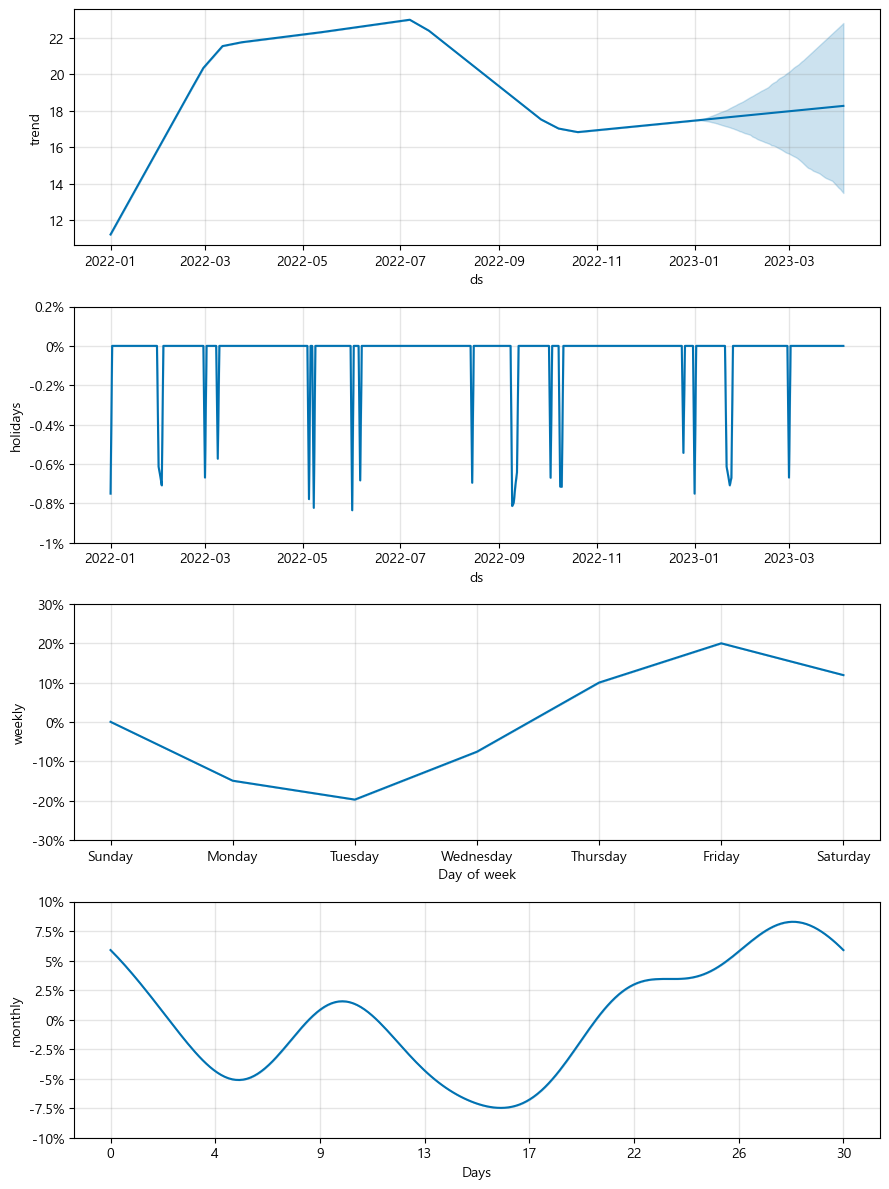

In [71]:
fig = final_model.plot_components(forecast)

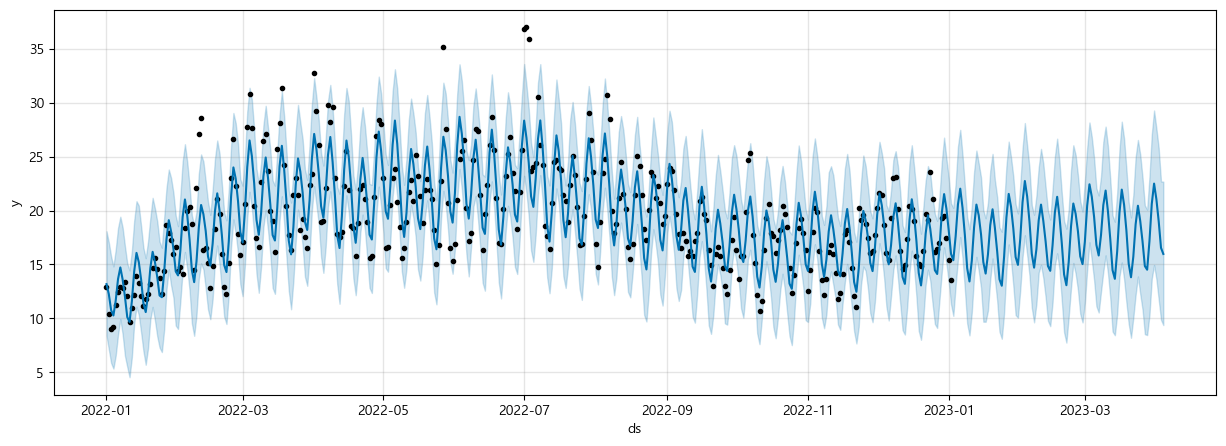

In [72]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(forecast,ax=ax)
plt.show()

In [73]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds       yhat  yhat_lower  yhat_upper
85 2023-03-29  17.174554   11.302790   23.673866
86 2023-03-30  20.619395   13.565422   27.605434
87 2023-03-31  22.499780   15.280430   29.773682
88 2023-04-01  21.048282   14.401708   28.232299
89 2023-04-02  19.007382   12.604058   26.121847
90 2023-04-03  16.542287   10.339013   22.741368
91 2023-04-04  15.972400    9.644427   22.671891

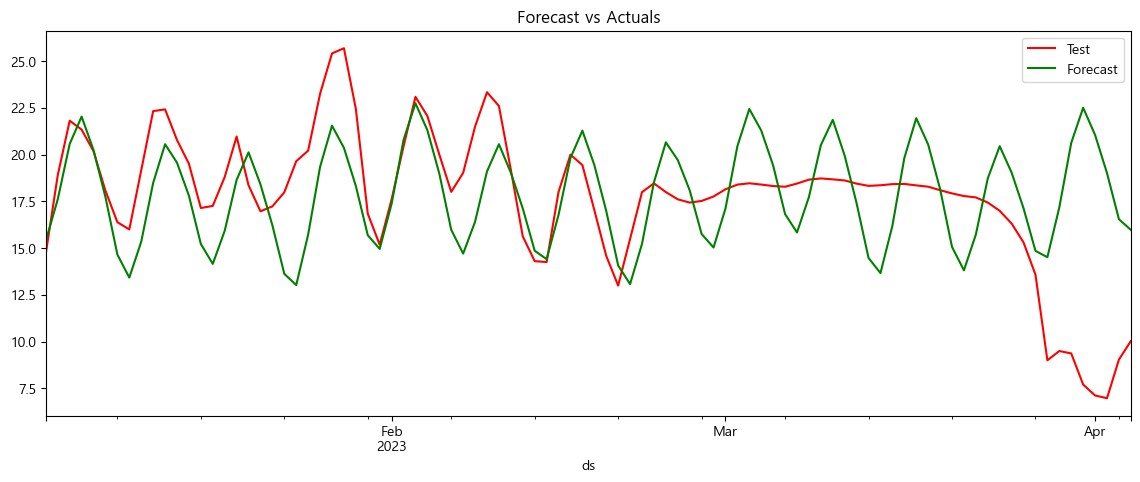

In [74]:
X_tst['ds'] = pd.to_datetime(X_tst['ds'])
X_tst_final['ds'] = pd.to_datetime(X_tst_final['ds'])

f, ax = plt.subplots(figsize=(14, 5))
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_final.plot(kind='line', x='ds', y='yhat', color='green', label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [75]:
MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final['yhat']))
print('MAPE = ', MAPE)

MAPE =  20.749996870438043


19:55:06 - cmdstanpy - INFO - Chain [1] start processing
19:55:06 - cmdstanpy - INFO - Chain [1] done processing


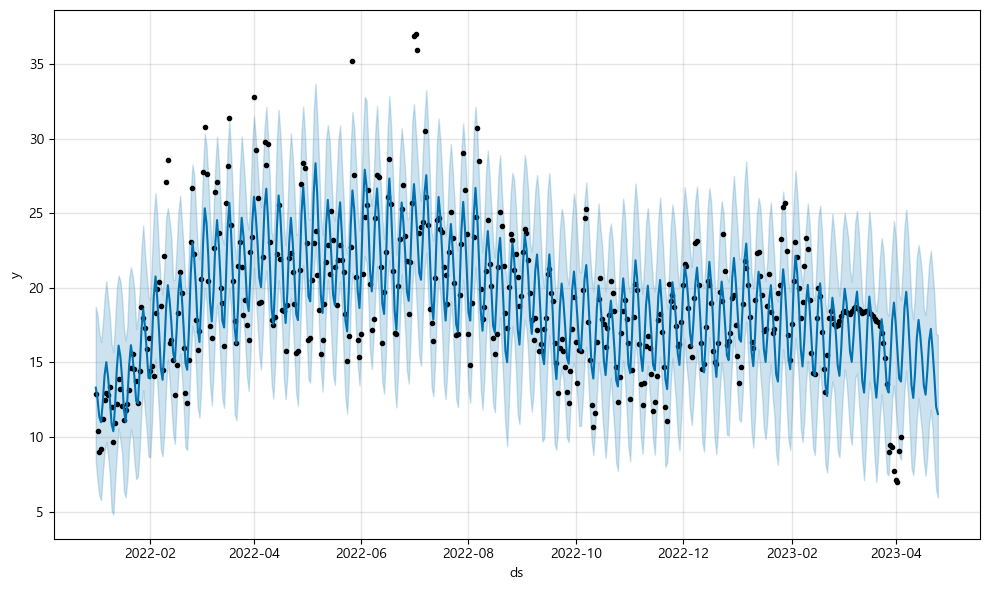

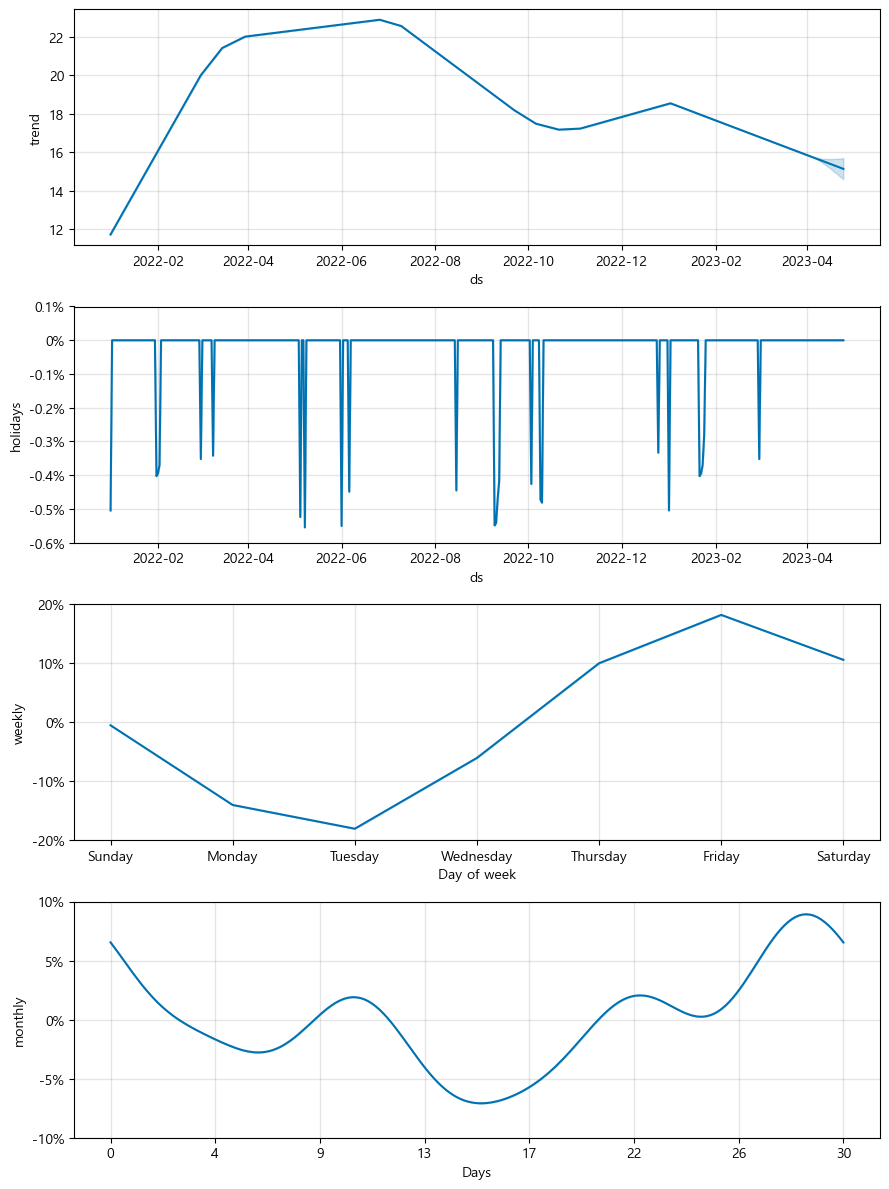

In [82]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      n_changepoints = 25,
                      holidays_prior_scale = 0.01,
                      seasonality_mode = 'multiplicative',
                      seasonality_prior_scale= 0.1,
                      weekly_seasonality=True,
                      daily_seasonality = False,
                      yearly_seasonality = False,
                      interval_width=0.95)
final_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
final_model.add_country_holidays(country_name='KR')
final_model.fit(series)

future = final_model.make_future_dataframe(periods = 21)
forecast = final_model.predict(future)
fig1 = final_model.plot(forecast)
fig2 = final_model.plot_components(forecast)
plt.show()

In [83]:
new_dates = pd.date_range(start='2023-04-05', end='2023-04-25')

train[new_dates.strftime('%Y-%m-%d')] = 0
train.head(3)

ID             대분류             중분류             소분류         브랜드  2022-01-01  \
0   0  B002-C001-0002  B002-C002-0007  B002-C003-0038  B002-00001           0   
1   1  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002           0   
2   2  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002           0   

   2022-01-02  2022-01-03  2022-01-04  2022-01-05  ...  2023-04-16  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...           0   
2           0           0           0           0  ...           0   

   2023-04-17  2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-22  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   

   2023-04-23  2023-04-24  2023-04-25  
0           0           0           0  
1           0           0           0  
2           0           0           0  

[3 rows x 485 columns]

In [84]:
ds = train.loc[:,'2022-01-01':'2023-04-04'].columns


from tqdm.auto import tqdm

save_yhat = [] # 각각 제품들의 yhat값을 저장할 빈 리스트 선언

for i in tqdm(train.index):
  series = pd.DataFrame({
    'ds':ds,
    'y':train.loc[i,'2022-01-01':'2023-04-04']
  })
  m = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      n_changepoints = 25,
                      holidays_prior_scale = 0.01,
                      seasonality_mode = 'multiplicative',
                      seasonality_prior_scale= 0.1,
                      weekly_seasonality=True,
                      daily_seasonality = False,
                      yearly_seasonality = False,
                      interval_width=0.95)
  m.add_seasonality(name='monthly', period=30.5, fourier_order=5) # monthly 계절성 추가
  m.add_country_holidays(country_name='KR') # 한국의 휴일 날짜를 자동으로 입력해줌. 혹시나 해서 넣어봤다.
  m.fit(series)

  future = m.make_future_dataframe(periods = 21) # 미래 21일간의 데이터 프레임을 만들어둠.
  forecast = m.predict(future) # forecast 변수에 prophet으로 예측한 값을 저장

  save_yhat.append(forecast.loc[forecast['ds'] >= '2023-04-05','yhat'].values)

  0%|          | 0/15890 [00:00<?, ?it/s]

19:55:41 - cmdstanpy - INFO - Chain [1] start processing
19:55:41 - cmdstanpy - INFO - Chain [1] done processing
19:55:42 - cmdstanpy - INFO - Chain [1] start processing
19:55:42 - cmdstanpy - INFO - Chain [1] done processing
19:55:42 - cmdstanpy - INFO - Chain [1] start processing
19:55:42 - cmdstanpy - INFO - Chain [1] done processing
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
19:55:43 - cmdstanpy - INFO - Chain [1] done processing
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
19:55:43 - cmdstanpy - INFO - Chain [1] done processing
19:55:44 - cmdstanpy - INFO - Chain [1] start processing
19:55:44 - cmdstanpy - INFO - Chain [1] done processing
19:55:44 - cmdstanpy - INFO - Chain [1] start processing
19:55:44 - cmdstanpy - INFO - Chain [1] done processing
19:55:45 - cmdstanpy - INFO - Chain [1] start processing
19:55:45 - cmdstanpy - INFO - Chain [1] done processing
19:55:46 - cmdstanpy - INFO - Chain [1] start processing
19:55:46 - cmdstanpy - INFO - Chain [1]

19:56:20 - cmdstanpy - INFO - Chain [1] done processing
19:56:21 - cmdstanpy - INFO - Chain [1] start processing
19:56:21 - cmdstanpy - INFO - Chain [1] done processing
19:56:21 - cmdstanpy - INFO - Chain [1] start processing
19:56:21 - cmdstanpy - INFO - Chain [1] done processing
19:56:22 - cmdstanpy - INFO - Chain [1] start processing
19:56:22 - cmdstanpy - INFO - Chain [1] done processing
19:56:22 - cmdstanpy - INFO - Chain [1] start processing
19:56:22 - cmdstanpy - INFO - Chain [1] done processing
19:56:23 - cmdstanpy - INFO - Chain [1] start processing
19:56:23 - cmdstanpy - INFO - Chain [1] done processing
19:56:23 - cmdstanpy - INFO - Chain [1] start processing
19:56:23 - cmdstanpy - INFO - Chain [1] done processing
19:56:24 - cmdstanpy - INFO - Chain [1] start processing
19:56:24 - cmdstanpy - INFO - Chain [1] done processing
19:56:24 - cmdstanpy - INFO - Chain [1] start processing
19:56:24 - cmdstanpy - INFO - Chain [1] done processing
19:56:25 - cmdstanpy - INFO - Chain [1] 

19:56:58 - cmdstanpy - INFO - Chain [1] done processing
19:56:59 - cmdstanpy - INFO - Chain [1] start processing
19:56:59 - cmdstanpy - INFO - Chain [1] done processing
19:56:59 - cmdstanpy - INFO - Chain [1] start processing
19:56:59 - cmdstanpy - INFO - Chain [1] done processing
19:57:00 - cmdstanpy - INFO - Chain [1] start processing
19:57:00 - cmdstanpy - INFO - Chain [1] done processing
19:57:00 - cmdstanpy - INFO - Chain [1] start processing
19:57:01 - cmdstanpy - INFO - Chain [1] done processing
19:57:01 - cmdstanpy - INFO - Chain [1] start processing
19:57:01 - cmdstanpy - INFO - Chain [1] done processing
19:57:01 - cmdstanpy - INFO - Chain [1] start processing
19:57:02 - cmdstanpy - INFO - Chain [1] done processing
19:57:02 - cmdstanpy - INFO - Chain [1] start processing
19:57:02 - cmdstanpy - INFO - Chain [1] done processing
19:57:02 - cmdstanpy - INFO - Chain [1] start processing
19:57:03 - cmdstanpy - INFO - Chain [1] done processing
19:57:03 - cmdstanpy - INFO - Chain [1] 

19:57:37 - cmdstanpy - INFO - Chain [1] done processing
19:57:38 - cmdstanpy - INFO - Chain [1] start processing
19:57:38 - cmdstanpy - INFO - Chain [1] done processing
19:57:38 - cmdstanpy - INFO - Chain [1] start processing
19:57:39 - cmdstanpy - INFO - Chain [1] done processing
19:57:39 - cmdstanpy - INFO - Chain [1] start processing
19:57:39 - cmdstanpy - INFO - Chain [1] done processing
19:57:39 - cmdstanpy - INFO - Chain [1] start processing
19:57:39 - cmdstanpy - INFO - Chain [1] done processing
19:57:40 - cmdstanpy - INFO - Chain [1] start processing
19:57:40 - cmdstanpy - INFO - Chain [1] done processing
19:57:41 - cmdstanpy - INFO - Chain [1] start processing
19:57:41 - cmdstanpy - INFO - Chain [1] done processing
19:57:41 - cmdstanpy - INFO - Chain [1] start processing
19:57:41 - cmdstanpy - INFO - Chain [1] done processing
19:57:42 - cmdstanpy - INFO - Chain [1] start processing
19:57:42 - cmdstanpy - INFO - Chain [1] done processing
19:57:43 - cmdstanpy - INFO - Chain [1] 

19:58:19 - cmdstanpy - INFO - Chain [1] done processing
19:58:20 - cmdstanpy - INFO - Chain [1] start processing
19:58:20 - cmdstanpy - INFO - Chain [1] done processing
19:58:20 - cmdstanpy - INFO - Chain [1] start processing
19:58:20 - cmdstanpy - INFO - Chain [1] done processing
19:58:21 - cmdstanpy - INFO - Chain [1] start processing
19:58:21 - cmdstanpy - INFO - Chain [1] done processing
19:58:21 - cmdstanpy - INFO - Chain [1] start processing
19:58:21 - cmdstanpy - INFO - Chain [1] done processing
19:58:22 - cmdstanpy - INFO - Chain [1] start processing
19:58:22 - cmdstanpy - INFO - Chain [1] done processing
19:58:23 - cmdstanpy - INFO - Chain [1] start processing
19:58:23 - cmdstanpy - INFO - Chain [1] done processing
19:58:23 - cmdstanpy - INFO - Chain [1] start processing
19:58:23 - cmdstanpy - INFO - Chain [1] done processing
19:58:24 - cmdstanpy - INFO - Chain [1] start processing
19:58:24 - cmdstanpy - INFO - Chain [1] done processing
19:58:25 - cmdstanpy - INFO - Chain [1] 

19:59:03 - cmdstanpy - INFO - Chain [1] done processing
19:59:03 - cmdstanpy - INFO - Chain [1] start processing
19:59:03 - cmdstanpy - INFO - Chain [1] done processing
19:59:04 - cmdstanpy - INFO - Chain [1] start processing
19:59:04 - cmdstanpy - INFO - Chain [1] done processing
19:59:05 - cmdstanpy - INFO - Chain [1] start processing
19:59:05 - cmdstanpy - INFO - Chain [1] done processing
19:59:05 - cmdstanpy - INFO - Chain [1] start processing
19:59:05 - cmdstanpy - INFO - Chain [1] done processing
19:59:06 - cmdstanpy - INFO - Chain [1] start processing
19:59:06 - cmdstanpy - INFO - Chain [1] done processing
19:59:06 - cmdstanpy - INFO - Chain [1] start processing
19:59:06 - cmdstanpy - INFO - Chain [1] done processing
19:59:07 - cmdstanpy - INFO - Chain [1] start processing
19:59:07 - cmdstanpy - INFO - Chain [1] done processing
19:59:07 - cmdstanpy - INFO - Chain [1] start processing
19:59:07 - cmdstanpy - INFO - Chain [1] done processing
19:59:08 - cmdstanpy - INFO - Chain [1] 

19:59:45 - cmdstanpy - INFO - Chain [1] done processing
19:59:45 - cmdstanpy - INFO - Chain [1] start processing
19:59:45 - cmdstanpy - INFO - Chain [1] done processing
19:59:46 - cmdstanpy - INFO - Chain [1] start processing
19:59:46 - cmdstanpy - INFO - Chain [1] done processing
19:59:46 - cmdstanpy - INFO - Chain [1] start processing
19:59:46 - cmdstanpy - INFO - Chain [1] done processing
19:59:47 - cmdstanpy - INFO - Chain [1] start processing
19:59:47 - cmdstanpy - INFO - Chain [1] done processing
19:59:48 - cmdstanpy - INFO - Chain [1] start processing
19:59:48 - cmdstanpy - INFO - Chain [1] done processing
19:59:49 - cmdstanpy - INFO - Chain [1] start processing
19:59:49 - cmdstanpy - INFO - Chain [1] done processing
19:59:49 - cmdstanpy - INFO - Chain [1] start processing
19:59:49 - cmdstanpy - INFO - Chain [1] done processing
19:59:50 - cmdstanpy - INFO - Chain [1] start processing
19:59:50 - cmdstanpy - INFO - Chain [1] done processing
19:59:50 - cmdstanpy - INFO - Chain [1] 

20:00:28 - cmdstanpy - INFO - Chain [1] done processing
20:00:28 - cmdstanpy - INFO - Chain [1] start processing
20:00:28 - cmdstanpy - INFO - Chain [1] done processing
20:00:28 - cmdstanpy - INFO - Chain [1] start processing
20:00:29 - cmdstanpy - INFO - Chain [1] done processing
20:00:29 - cmdstanpy - INFO - Chain [1] start processing
20:00:29 - cmdstanpy - INFO - Chain [1] done processing
20:00:30 - cmdstanpy - INFO - Chain [1] start processing
20:00:30 - cmdstanpy - INFO - Chain [1] done processing
20:00:30 - cmdstanpy - INFO - Chain [1] start processing
20:00:30 - cmdstanpy - INFO - Chain [1] done processing
20:00:31 - cmdstanpy - INFO - Chain [1] start processing
20:00:31 - cmdstanpy - INFO - Chain [1] done processing
20:00:32 - cmdstanpy - INFO - Chain [1] start processing
20:00:32 - cmdstanpy - INFO - Chain [1] done processing
20:00:32 - cmdstanpy - INFO - Chain [1] start processing
20:00:32 - cmdstanpy - INFO - Chain [1] done processing
20:00:33 - cmdstanpy - INFO - Chain [1] 

20:01:10 - cmdstanpy - INFO - Chain [1] done processing
20:01:10 - cmdstanpy - INFO - Chain [1] start processing
20:01:11 - cmdstanpy - INFO - Chain [1] done processing
20:01:11 - cmdstanpy - INFO - Chain [1] start processing
20:01:11 - cmdstanpy - INFO - Chain [1] done processing
20:01:12 - cmdstanpy - INFO - Chain [1] start processing
20:01:12 - cmdstanpy - INFO - Chain [1] done processing
20:01:12 - cmdstanpy - INFO - Chain [1] start processing
20:01:12 - cmdstanpy - INFO - Chain [1] done processing
20:01:13 - cmdstanpy - INFO - Chain [1] start processing
20:01:13 - cmdstanpy - INFO - Chain [1] done processing
20:01:13 - cmdstanpy - INFO - Chain [1] start processing
20:01:13 - cmdstanpy - INFO - Chain [1] done processing
20:01:14 - cmdstanpy - INFO - Chain [1] start processing
20:01:14 - cmdstanpy - INFO - Chain [1] done processing
20:01:14 - cmdstanpy - INFO - Chain [1] start processing
20:01:15 - cmdstanpy - INFO - Chain [1] done processing
20:01:15 - cmdstanpy - INFO - Chain [1] 

20:01:50 - cmdstanpy - INFO - Chain [1] done processing
20:01:51 - cmdstanpy - INFO - Chain [1] start processing
20:01:51 - cmdstanpy - INFO - Chain [1] done processing
20:01:51 - cmdstanpy - INFO - Chain [1] start processing
20:01:51 - cmdstanpy - INFO - Chain [1] done processing
20:01:52 - cmdstanpy - INFO - Chain [1] start processing
20:01:52 - cmdstanpy - INFO - Chain [1] done processing
20:01:52 - cmdstanpy - INFO - Chain [1] start processing
20:01:52 - cmdstanpy - INFO - Chain [1] done processing
20:01:53 - cmdstanpy - INFO - Chain [1] start processing
20:01:53 - cmdstanpy - INFO - Chain [1] done processing
20:01:53 - cmdstanpy - INFO - Chain [1] start processing
20:01:53 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:55 - cmdstanpy - INFO - Chain [1] 

20:02:28 - cmdstanpy - INFO - Chain [1] done processing
20:02:29 - cmdstanpy - INFO - Chain [1] start processing
20:02:29 - cmdstanpy - INFO - Chain [1] done processing
20:02:29 - cmdstanpy - INFO - Chain [1] start processing
20:02:29 - cmdstanpy - INFO - Chain [1] done processing
20:02:30 - cmdstanpy - INFO - Chain [1] start processing
20:02:30 - cmdstanpy - INFO - Chain [1] done processing
20:02:30 - cmdstanpy - INFO - Chain [1] start processing
20:02:31 - cmdstanpy - INFO - Chain [1] done processing
20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:31 - cmdstanpy - INFO - Chain [1] done processing
20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:32 - cmdstanpy - INFO - Chain [1] done processing
20:02:32 - cmdstanpy - INFO - Chain [1] start processing
20:02:32 - cmdstanpy - INFO - Chain [1] done processing
20:02:32 - cmdstanpy - INFO - Chain [1] start processing
20:02:33 - cmdstanpy - INFO - Chain [1] done processing
20:02:33 - cmdstanpy - INFO - Chain [1] 

20:03:06 - cmdstanpy - INFO - Chain [1] done processing
20:03:06 - cmdstanpy - INFO - Chain [1] start processing
20:03:06 - cmdstanpy - INFO - Chain [1] done processing
20:03:07 - cmdstanpy - INFO - Chain [1] start processing
20:03:07 - cmdstanpy - INFO - Chain [1] done processing
20:03:07 - cmdstanpy - INFO - Chain [1] start processing
20:03:07 - cmdstanpy - INFO - Chain [1] done processing
20:03:08 - cmdstanpy - INFO - Chain [1] start processing
20:03:08 - cmdstanpy - INFO - Chain [1] done processing
20:03:08 - cmdstanpy - INFO - Chain [1] start processing
20:03:08 - cmdstanpy - INFO - Chain [1] done processing
20:03:09 - cmdstanpy - INFO - Chain [1] start processing
20:03:09 - cmdstanpy - INFO - Chain [1] done processing
20:03:09 - cmdstanpy - INFO - Chain [1] start processing
20:03:09 - cmdstanpy - INFO - Chain [1] done processing
20:03:10 - cmdstanpy - INFO - Chain [1] start processing
20:03:10 - cmdstanpy - INFO - Chain [1] done processing
20:03:10 - cmdstanpy - INFO - Chain [1] 

20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] 

20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] 

20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] 

20:05:39 - cmdstanpy - INFO - Chain [1] done processing
20:05:39 - cmdstanpy - INFO - Chain [1] start processing
20:05:39 - cmdstanpy - INFO - Chain [1] done processing
20:05:40 - cmdstanpy - INFO - Chain [1] start processing
20:05:40 - cmdstanpy - INFO - Chain [1] done processing
20:05:40 - cmdstanpy - INFO - Chain [1] start processing
20:05:40 - cmdstanpy - INFO - Chain [1] done processing
20:05:41 - cmdstanpy - INFO - Chain [1] start processing
20:05:41 - cmdstanpy - INFO - Chain [1] done processing
20:05:41 - cmdstanpy - INFO - Chain [1] start processing
20:05:41 - cmdstanpy - INFO - Chain [1] done processing
20:05:42 - cmdstanpy - INFO - Chain [1] start processing
20:05:42 - cmdstanpy - INFO - Chain [1] done processing
20:05:42 - cmdstanpy - INFO - Chain [1] start processing
20:05:42 - cmdstanpy - INFO - Chain [1] done processing
20:05:43 - cmdstanpy - INFO - Chain [1] start processing
20:05:43 - cmdstanpy - INFO - Chain [1] done processing
20:05:43 - cmdstanpy - INFO - Chain [1] 

20:06:17 - cmdstanpy - INFO - Chain [1] done processing
20:06:17 - cmdstanpy - INFO - Chain [1] start processing
20:06:17 - cmdstanpy - INFO - Chain [1] done processing
20:06:18 - cmdstanpy - INFO - Chain [1] start processing
20:06:18 - cmdstanpy - INFO - Chain [1] done processing
20:06:18 - cmdstanpy - INFO - Chain [1] start processing
20:06:18 - cmdstanpy - INFO - Chain [1] done processing
20:06:19 - cmdstanpy - INFO - Chain [1] start processing
20:06:19 - cmdstanpy - INFO - Chain [1] done processing
20:06:19 - cmdstanpy - INFO - Chain [1] start processing
20:06:19 - cmdstanpy - INFO - Chain [1] done processing
20:06:20 - cmdstanpy - INFO - Chain [1] start processing
20:06:20 - cmdstanpy - INFO - Chain [1] done processing
20:06:20 - cmdstanpy - INFO - Chain [1] start processing
20:06:20 - cmdstanpy - INFO - Chain [1] done processing
20:06:21 - cmdstanpy - INFO - Chain [1] start processing
20:06:21 - cmdstanpy - INFO - Chain [1] done processing
20:06:21 - cmdstanpy - INFO - Chain [1] 

20:06:55 - cmdstanpy - INFO - Chain [1] done processing
20:06:56 - cmdstanpy - INFO - Chain [1] start processing
20:06:56 - cmdstanpy - INFO - Chain [1] done processing
20:06:56 - cmdstanpy - INFO - Chain [1] start processing
20:06:56 - cmdstanpy - INFO - Chain [1] done processing
20:06:57 - cmdstanpy - INFO - Chain [1] start processing
20:06:57 - cmdstanpy - INFO - Chain [1] done processing
20:06:57 - cmdstanpy - INFO - Chain [1] start processing
20:06:57 - cmdstanpy - INFO - Chain [1] done processing
20:06:58 - cmdstanpy - INFO - Chain [1] start processing
20:06:58 - cmdstanpy - INFO - Chain [1] done processing
20:06:58 - cmdstanpy - INFO - Chain [1] start processing
20:06:58 - cmdstanpy - INFO - Chain [1] done processing
20:06:59 - cmdstanpy - INFO - Chain [1] start processing
20:06:59 - cmdstanpy - INFO - Chain [1] done processing
20:06:59 - cmdstanpy - INFO - Chain [1] start processing
20:06:59 - cmdstanpy - INFO - Chain [1] done processing
20:07:00 - cmdstanpy - INFO - Chain [1] 

20:07:33 - cmdstanpy - INFO - Chain [1] done processing
20:07:34 - cmdstanpy - INFO - Chain [1] start processing
20:07:34 - cmdstanpy - INFO - Chain [1] done processing
20:07:34 - cmdstanpy - INFO - Chain [1] start processing
20:07:34 - cmdstanpy - INFO - Chain [1] done processing
20:07:35 - cmdstanpy - INFO - Chain [1] start processing
20:07:35 - cmdstanpy - INFO - Chain [1] done processing
20:07:35 - cmdstanpy - INFO - Chain [1] start processing
20:07:35 - cmdstanpy - INFO - Chain [1] done processing
20:07:36 - cmdstanpy - INFO - Chain [1] start processing
20:07:36 - cmdstanpy - INFO - Chain [1] done processing
20:07:36 - cmdstanpy - INFO - Chain [1] start processing
20:07:36 - cmdstanpy - INFO - Chain [1] done processing
20:07:37 - cmdstanpy - INFO - Chain [1] start processing
20:07:37 - cmdstanpy - INFO - Chain [1] done processing
20:07:38 - cmdstanpy - INFO - Chain [1] start processing
20:07:38 - cmdstanpy - INFO - Chain [1] done processing
20:07:38 - cmdstanpy - INFO - Chain [1] 

20:08:12 - cmdstanpy - INFO - Chain [1] done processing
20:08:12 - cmdstanpy - INFO - Chain [1] start processing
20:08:13 - cmdstanpy - INFO - Chain [1] done processing
20:08:13 - cmdstanpy - INFO - Chain [1] start processing
20:08:13 - cmdstanpy - INFO - Chain [1] done processing
20:08:14 - cmdstanpy - INFO - Chain [1] start processing
20:08:14 - cmdstanpy - INFO - Chain [1] done processing
20:08:14 - cmdstanpy - INFO - Chain [1] start processing
20:08:14 - cmdstanpy - INFO - Chain [1] done processing
20:08:15 - cmdstanpy - INFO - Chain [1] start processing
20:08:15 - cmdstanpy - INFO - Chain [1] done processing
20:08:15 - cmdstanpy - INFO - Chain [1] start processing
20:08:16 - cmdstanpy - INFO - Chain [1] done processing
20:08:16 - cmdstanpy - INFO - Chain [1] start processing
20:08:16 - cmdstanpy - INFO - Chain [1] done processing
20:08:17 - cmdstanpy - INFO - Chain [1] start processing
20:08:17 - cmdstanpy - INFO - Chain [1] done processing
20:08:17 - cmdstanpy - INFO - Chain [1] 

20:08:52 - cmdstanpy - INFO - Chain [1] done processing
20:08:52 - cmdstanpy - INFO - Chain [1] start processing
20:08:52 - cmdstanpy - INFO - Chain [1] done processing
20:08:52 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1] done processing
20:08:54 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1] done processing
20:08:54 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INFO - Chain [1] done processing
20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INFO - Chain [1] done processing
20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:56 - cmdstanpy - INFO - Chain [1] done processing
20:08:56 - cmdstanpy - INFO - Chain [1] 

20:09:29 - cmdstanpy - INFO - Chain [1] done processing
20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:30 - cmdstanpy - INFO - Chain [1] done processing
20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:30 - cmdstanpy - INFO - Chain [1] done processing
20:09:31 - cmdstanpy - INFO - Chain [1] start processing
20:09:31 - cmdstanpy - INFO - Chain [1] done processing
20:09:31 - cmdstanpy - INFO - Chain [1] start processing
20:09:31 - cmdstanpy - INFO - Chain [1] done processing
20:09:32 - cmdstanpy - INFO - Chain [1] start processing
20:09:32 - cmdstanpy - INFO - Chain [1] done processing
20:09:32 - cmdstanpy - INFO - Chain [1] start processing
20:09:32 - cmdstanpy - INFO - Chain [1] done processing
20:09:33 - cmdstanpy - INFO - Chain [1] start processing
20:09:33 - cmdstanpy - INFO - Chain [1] done processing
20:09:33 - cmdstanpy - INFO - Chain [1] start processing
20:09:33 - cmdstanpy - INFO - Chain [1] done processing
20:09:34 - cmdstanpy - INFO - Chain [1] 

20:10:07 - cmdstanpy - INFO - Chain [1] done processing
20:10:07 - cmdstanpy - INFO - Chain [1] start processing
20:10:07 - cmdstanpy - INFO - Chain [1] done processing
20:10:08 - cmdstanpy - INFO - Chain [1] start processing
20:10:08 - cmdstanpy - INFO - Chain [1] done processing
20:10:08 - cmdstanpy - INFO - Chain [1] start processing
20:10:08 - cmdstanpy - INFO - Chain [1] done processing
20:10:09 - cmdstanpy - INFO - Chain [1] start processing
20:10:09 - cmdstanpy - INFO - Chain [1] done processing
20:10:09 - cmdstanpy - INFO - Chain [1] start processing
20:10:09 - cmdstanpy - INFO - Chain [1] done processing
20:10:10 - cmdstanpy - INFO - Chain [1] start processing
20:10:10 - cmdstanpy - INFO - Chain [1] done processing
20:10:10 - cmdstanpy - INFO - Chain [1] start processing
20:10:10 - cmdstanpy - INFO - Chain [1] done processing
20:10:11 - cmdstanpy - INFO - Chain [1] start processing
20:10:11 - cmdstanpy - INFO - Chain [1] done processing
20:10:11 - cmdstanpy - INFO - Chain [1] 

20:10:45 - cmdstanpy - INFO - Chain [1] done processing
20:10:45 - cmdstanpy - INFO - Chain [1] start processing
20:10:46 - cmdstanpy - INFO - Chain [1] done processing
20:10:46 - cmdstanpy - INFO - Chain [1] start processing
20:10:46 - cmdstanpy - INFO - Chain [1] done processing
20:10:46 - cmdstanpy - INFO - Chain [1] start processing
20:10:47 - cmdstanpy - INFO - Chain [1] done processing
20:10:47 - cmdstanpy - INFO - Chain [1] start processing
20:10:47 - cmdstanpy - INFO - Chain [1] done processing
20:10:48 - cmdstanpy - INFO - Chain [1] start processing
20:10:48 - cmdstanpy - INFO - Chain [1] done processing
20:10:48 - cmdstanpy - INFO - Chain [1] start processing
20:10:48 - cmdstanpy - INFO - Chain [1] done processing
20:10:49 - cmdstanpy - INFO - Chain [1] start processing
20:10:49 - cmdstanpy - INFO - Chain [1] done processing
20:10:49 - cmdstanpy - INFO - Chain [1] start processing
20:10:49 - cmdstanpy - INFO - Chain [1] done processing
20:10:50 - cmdstanpy - INFO - Chain [1] 

20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:24 - cmdstanpy - INFO - Chain [1] done processing
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:24 - cmdstanpy - INFO - Chain [1] done processing
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:26 - cmdstanpy - INFO - Chain [1] done processing
20:11:26 - cmdstanpy - INFO - Chain [1] start processing
20:11:26 - cmdstanpy - INFO - Chain [1] done processing
20:11:26 - cmdstanpy - INFO - Chain [1] start processing
20:11:27 - cmdstanpy - INFO - Chain [1] done processing
20:11:27 - cmdstanpy - INFO - Chain [1] 

20:12:02 - cmdstanpy - INFO - Chain [1] done processing
20:12:02 - cmdstanpy - INFO - Chain [1] start processing
20:12:02 - cmdstanpy - INFO - Chain [1] done processing
20:12:02 - cmdstanpy - INFO - Chain [1] start processing
20:12:03 - cmdstanpy - INFO - Chain [1] done processing
20:12:03 - cmdstanpy - INFO - Chain [1] start processing
20:12:03 - cmdstanpy - INFO - Chain [1] done processing
20:12:04 - cmdstanpy - INFO - Chain [1] start processing
20:12:04 - cmdstanpy - INFO - Chain [1] done processing
20:12:04 - cmdstanpy - INFO - Chain [1] start processing
20:12:04 - cmdstanpy - INFO - Chain [1] done processing
20:12:05 - cmdstanpy - INFO - Chain [1] start processing
20:12:05 - cmdstanpy - INFO - Chain [1] done processing
20:12:05 - cmdstanpy - INFO - Chain [1] start processing
20:12:05 - cmdstanpy - INFO - Chain [1] done processing
20:12:06 - cmdstanpy - INFO - Chain [1] start processing
20:12:06 - cmdstanpy - INFO - Chain [1] done processing
20:12:06 - cmdstanpy - INFO - Chain [1] 

20:12:40 - cmdstanpy - INFO - Chain [1] done processing
20:12:41 - cmdstanpy - INFO - Chain [1] start processing
20:12:41 - cmdstanpy - INFO - Chain [1] done processing
20:12:41 - cmdstanpy - INFO - Chain [1] start processing
20:12:41 - cmdstanpy - INFO - Chain [1] done processing
20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing
20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing
20:12:43 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing
20:12:43 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing
20:12:44 - cmdstanpy - INFO - Chain [1] start processing
20:12:44 - cmdstanpy - INFO - Chain [1] done processing
20:12:44 - cmdstanpy - INFO - Chain [1] start processing
20:12:44 - cmdstanpy - INFO - Chain [1] done processing
20:12:45 - cmdstanpy - INFO - Chain [1] 

20:13:18 - cmdstanpy - INFO - Chain [1] done processing
20:13:19 - cmdstanpy - INFO - Chain [1] start processing
20:13:19 - cmdstanpy - INFO - Chain [1] done processing
20:13:19 - cmdstanpy - INFO - Chain [1] start processing
20:13:19 - cmdstanpy - INFO - Chain [1] done processing
20:13:20 - cmdstanpy - INFO - Chain [1] start processing
20:13:20 - cmdstanpy - INFO - Chain [1] done processing
20:13:20 - cmdstanpy - INFO - Chain [1] start processing
20:13:20 - cmdstanpy - INFO - Chain [1] done processing
20:13:21 - cmdstanpy - INFO - Chain [1] start processing
20:13:21 - cmdstanpy - INFO - Chain [1] done processing
20:13:21 - cmdstanpy - INFO - Chain [1] start processing
20:13:21 - cmdstanpy - INFO - Chain [1] done processing
20:13:22 - cmdstanpy - INFO - Chain [1] start processing
20:13:22 - cmdstanpy - INFO - Chain [1] done processing
20:13:22 - cmdstanpy - INFO - Chain [1] start processing
20:13:22 - cmdstanpy - INFO - Chain [1] done processing
20:13:23 - cmdstanpy - INFO - Chain [1] 

20:13:56 - cmdstanpy - INFO - Chain [1] done processing
20:13:57 - cmdstanpy - INFO - Chain [1] start processing
20:13:57 - cmdstanpy - INFO - Chain [1] done processing
20:13:57 - cmdstanpy - INFO - Chain [1] start processing
20:13:57 - cmdstanpy - INFO - Chain [1] done processing
20:13:58 - cmdstanpy - INFO - Chain [1] start processing
20:13:58 - cmdstanpy - INFO - Chain [1] done processing
20:13:58 - cmdstanpy - INFO - Chain [1] start processing
20:13:58 - cmdstanpy - INFO - Chain [1] done processing
20:13:59 - cmdstanpy - INFO - Chain [1] start processing
20:13:59 - cmdstanpy - INFO - Chain [1] done processing
20:13:59 - cmdstanpy - INFO - Chain [1] start processing
20:13:59 - cmdstanpy - INFO - Chain [1] done processing
20:14:00 - cmdstanpy - INFO - Chain [1] start processing
20:14:00 - cmdstanpy - INFO - Chain [1] done processing
20:14:00 - cmdstanpy - INFO - Chain [1] start processing
20:14:00 - cmdstanpy - INFO - Chain [1] done processing
20:14:01 - cmdstanpy - INFO - Chain [1] 

20:14:35 - cmdstanpy - INFO - Chain [1] done processing
20:14:35 - cmdstanpy - INFO - Chain [1] start processing
20:14:36 - cmdstanpy - INFO - Chain [1] done processing
20:14:36 - cmdstanpy - INFO - Chain [1] start processing
20:14:36 - cmdstanpy - INFO - Chain [1] done processing
20:14:36 - cmdstanpy - INFO - Chain [1] start processing
20:14:37 - cmdstanpy - INFO - Chain [1] done processing
20:14:37 - cmdstanpy - INFO - Chain [1] start processing
20:14:37 - cmdstanpy - INFO - Chain [1] done processing
20:14:38 - cmdstanpy - INFO - Chain [1] start processing
20:14:38 - cmdstanpy - INFO - Chain [1] done processing
20:14:38 - cmdstanpy - INFO - Chain [1] start processing
20:14:38 - cmdstanpy - INFO - Chain [1] done processing
20:14:39 - cmdstanpy - INFO - Chain [1] start processing
20:14:39 - cmdstanpy - INFO - Chain [1] done processing
20:14:39 - cmdstanpy - INFO - Chain [1] start processing
20:14:39 - cmdstanpy - INFO - Chain [1] done processing
20:14:40 - cmdstanpy - INFO - Chain [1] 

20:15:13 - cmdstanpy - INFO - Chain [1] done processing
20:15:14 - cmdstanpy - INFO - Chain [1] start processing
20:15:14 - cmdstanpy - INFO - Chain [1] done processing
20:15:14 - cmdstanpy - INFO - Chain [1] start processing
20:15:15 - cmdstanpy - INFO - Chain [1] done processing
20:15:15 - cmdstanpy - INFO - Chain [1] start processing
20:15:15 - cmdstanpy - INFO - Chain [1] done processing
20:15:16 - cmdstanpy - INFO - Chain [1] start processing
20:15:16 - cmdstanpy - INFO - Chain [1] done processing
20:15:16 - cmdstanpy - INFO - Chain [1] start processing
20:15:16 - cmdstanpy - INFO - Chain [1] done processing
20:15:16 - cmdstanpy - INFO - Chain [1] start processing
20:15:17 - cmdstanpy - INFO - Chain [1] done processing
20:15:17 - cmdstanpy - INFO - Chain [1] start processing
20:15:17 - cmdstanpy - INFO - Chain [1] done processing
20:15:18 - cmdstanpy - INFO - Chain [1] start processing
20:15:18 - cmdstanpy - INFO - Chain [1] done processing
20:15:18 - cmdstanpy - INFO - Chain [1] 

20:15:52 - cmdstanpy - INFO - Chain [1] done processing
20:15:52 - cmdstanpy - INFO - Chain [1] start processing
20:15:53 - cmdstanpy - INFO - Chain [1] done processing
20:15:53 - cmdstanpy - INFO - Chain [1] start processing
20:15:53 - cmdstanpy - INFO - Chain [1] done processing
20:15:54 - cmdstanpy - INFO - Chain [1] start processing
20:15:54 - cmdstanpy - INFO - Chain [1] done processing
20:15:54 - cmdstanpy - INFO - Chain [1] start processing
20:15:54 - cmdstanpy - INFO - Chain [1] done processing
20:15:55 - cmdstanpy - INFO - Chain [1] start processing
20:15:55 - cmdstanpy - INFO - Chain [1] done processing
20:15:55 - cmdstanpy - INFO - Chain [1] start processing
20:15:55 - cmdstanpy - INFO - Chain [1] done processing
20:15:56 - cmdstanpy - INFO - Chain [1] start processing
20:15:56 - cmdstanpy - INFO - Chain [1] done processing
20:15:56 - cmdstanpy - INFO - Chain [1] start processing
20:15:56 - cmdstanpy - INFO - Chain [1] done processing
20:15:57 - cmdstanpy - INFO - Chain [1] 

20:16:30 - cmdstanpy - INFO - Chain [1] done processing
20:16:31 - cmdstanpy - INFO - Chain [1] start processing
20:16:31 - cmdstanpy - INFO - Chain [1] done processing
20:16:31 - cmdstanpy - INFO - Chain [1] start processing
20:16:31 - cmdstanpy - INFO - Chain [1] done processing
20:16:32 - cmdstanpy - INFO - Chain [1] start processing
20:16:32 - cmdstanpy - INFO - Chain [1] done processing
20:16:32 - cmdstanpy - INFO - Chain [1] start processing
20:16:32 - cmdstanpy - INFO - Chain [1] done processing
20:16:33 - cmdstanpy - INFO - Chain [1] start processing
20:16:33 - cmdstanpy - INFO - Chain [1] done processing
20:16:33 - cmdstanpy - INFO - Chain [1] start processing
20:16:34 - cmdstanpy - INFO - Chain [1] done processing
20:16:34 - cmdstanpy - INFO - Chain [1] start processing
20:16:34 - cmdstanpy - INFO - Chain [1] done processing
20:16:34 - cmdstanpy - INFO - Chain [1] start processing
20:16:35 - cmdstanpy - INFO - Chain [1] done processing
20:16:35 - cmdstanpy - INFO - Chain [1] 

20:17:09 - cmdstanpy - INFO - Chain [1] done processing
20:17:09 - cmdstanpy - INFO - Chain [1] start processing
20:17:09 - cmdstanpy - INFO - Chain [1] done processing
20:17:10 - cmdstanpy - INFO - Chain [1] start processing
20:17:10 - cmdstanpy - INFO - Chain [1] done processing
20:17:10 - cmdstanpy - INFO - Chain [1] start processing
20:17:10 - cmdstanpy - INFO - Chain [1] done processing
20:17:11 - cmdstanpy - INFO - Chain [1] start processing
20:17:11 - cmdstanpy - INFO - Chain [1] done processing
20:17:11 - cmdstanpy - INFO - Chain [1] start processing
20:17:11 - cmdstanpy - INFO - Chain [1] done processing
20:17:12 - cmdstanpy - INFO - Chain [1] start processing
20:17:12 - cmdstanpy - INFO - Chain [1] done processing
20:17:12 - cmdstanpy - INFO - Chain [1] start processing
20:17:12 - cmdstanpy - INFO - Chain [1] done processing
20:17:13 - cmdstanpy - INFO - Chain [1] start processing
20:17:13 - cmdstanpy - INFO - Chain [1] done processing
20:17:13 - cmdstanpy - INFO - Chain [1] 

20:17:47 - cmdstanpy - INFO - Chain [1] done processing
20:17:48 - cmdstanpy - INFO - Chain [1] start processing
20:17:48 - cmdstanpy - INFO - Chain [1] done processing
20:17:48 - cmdstanpy - INFO - Chain [1] start processing
20:17:48 - cmdstanpy - INFO - Chain [1] done processing
20:17:49 - cmdstanpy - INFO - Chain [1] start processing
20:17:49 - cmdstanpy - INFO - Chain [1] done processing
20:17:49 - cmdstanpy - INFO - Chain [1] start processing
20:17:49 - cmdstanpy - INFO - Chain [1] done processing
20:17:50 - cmdstanpy - INFO - Chain [1] start processing
20:17:50 - cmdstanpy - INFO - Chain [1] done processing
20:17:50 - cmdstanpy - INFO - Chain [1] start processing
20:17:50 - cmdstanpy - INFO - Chain [1] done processing
20:17:51 - cmdstanpy - INFO - Chain [1] start processing
20:17:51 - cmdstanpy - INFO - Chain [1] done processing
20:17:52 - cmdstanpy - INFO - Chain [1] start processing
20:17:52 - cmdstanpy - INFO - Chain [1] done processing
20:17:52 - cmdstanpy - INFO - Chain [1] 

20:18:26 - cmdstanpy - INFO - Chain [1] done processing
20:18:26 - cmdstanpy - INFO - Chain [1] start processing
20:18:26 - cmdstanpy - INFO - Chain [1] done processing
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:28 - cmdstanpy - INFO - Chain [1] done processing
20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:29 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:30 - cmdstanpy - INFO - Chain [1] start processing
20:18:30 - cmdstanpy - INFO - Chain [1] done processing
20:18:30 - cmdstanpy - INFO - Chain [1] start processing
20:18:30 - cmdstanpy - INFO - Chain [1] done processing
20:18:31 - cmdstanpy - INFO - Chain [1] 

20:19:04 - cmdstanpy - INFO - Chain [1] done processing
20:19:05 - cmdstanpy - INFO - Chain [1] start processing
20:19:05 - cmdstanpy - INFO - Chain [1] done processing
20:19:05 - cmdstanpy - INFO - Chain [1] start processing
20:19:05 - cmdstanpy - INFO - Chain [1] done processing
20:19:06 - cmdstanpy - INFO - Chain [1] start processing
20:19:06 - cmdstanpy - INFO - Chain [1] done processing
20:19:06 - cmdstanpy - INFO - Chain [1] start processing
20:19:06 - cmdstanpy - INFO - Chain [1] done processing
20:19:07 - cmdstanpy - INFO - Chain [1] start processing
20:19:07 - cmdstanpy - INFO - Chain [1] done processing
20:19:07 - cmdstanpy - INFO - Chain [1] start processing
20:19:07 - cmdstanpy - INFO - Chain [1] done processing
20:19:08 - cmdstanpy - INFO - Chain [1] start processing
20:19:08 - cmdstanpy - INFO - Chain [1] done processing
20:19:09 - cmdstanpy - INFO - Chain [1] start processing
20:19:09 - cmdstanpy - INFO - Chain [1] done processing
20:19:09 - cmdstanpy - INFO - Chain [1] 

20:19:42 - cmdstanpy - INFO - Chain [1] done processing
20:19:43 - cmdstanpy - INFO - Chain [1] start processing
20:19:43 - cmdstanpy - INFO - Chain [1] done processing
20:19:43 - cmdstanpy - INFO - Chain [1] start processing
20:19:43 - cmdstanpy - INFO - Chain [1] done processing
20:19:44 - cmdstanpy - INFO - Chain [1] start processing
20:19:44 - cmdstanpy - INFO - Chain [1] done processing
20:19:44 - cmdstanpy - INFO - Chain [1] start processing
20:19:45 - cmdstanpy - INFO - Chain [1] done processing
20:19:45 - cmdstanpy - INFO - Chain [1] start processing
20:19:45 - cmdstanpy - INFO - Chain [1] done processing
20:19:45 - cmdstanpy - INFO - Chain [1] start processing
20:19:46 - cmdstanpy - INFO - Chain [1] done processing
20:19:46 - cmdstanpy - INFO - Chain [1] start processing
20:19:46 - cmdstanpy - INFO - Chain [1] done processing
20:19:47 - cmdstanpy - INFO - Chain [1] start processing
20:19:47 - cmdstanpy - INFO - Chain [1] done processing
20:19:47 - cmdstanpy - INFO - Chain [1] 

20:20:23 - cmdstanpy - INFO - Chain [1] done processing
20:20:23 - cmdstanpy - INFO - Chain [1] start processing
20:20:23 - cmdstanpy - INFO - Chain [1] done processing
20:20:24 - cmdstanpy - INFO - Chain [1] start processing
20:20:24 - cmdstanpy - INFO - Chain [1] done processing
20:20:24 - cmdstanpy - INFO - Chain [1] start processing
20:20:24 - cmdstanpy - INFO - Chain [1] done processing
20:20:25 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing
20:20:25 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing
20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing
20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing
20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:27 - cmdstanpy - INFO - Chain [1] done processing
20:20:27 - cmdstanpy - INFO - Chain [1] 

20:21:00 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
20:21:05 - cmdstanpy - INFO - Chain [1] 

20:21:39 - cmdstanpy - INFO - Chain [1] done processing
20:21:39 - cmdstanpy - INFO - Chain [1] start processing
20:21:39 - cmdstanpy - INFO - Chain [1] done processing
20:21:40 - cmdstanpy - INFO - Chain [1] start processing
20:21:40 - cmdstanpy - INFO - Chain [1] done processing
20:21:40 - cmdstanpy - INFO - Chain [1] start processing
20:21:40 - cmdstanpy - INFO - Chain [1] done processing
20:21:41 - cmdstanpy - INFO - Chain [1] start processing
20:21:41 - cmdstanpy - INFO - Chain [1] done processing
20:21:41 - cmdstanpy - INFO - Chain [1] start processing
20:21:41 - cmdstanpy - INFO - Chain [1] done processing
20:21:42 - cmdstanpy - INFO - Chain [1] start processing
20:21:42 - cmdstanpy - INFO - Chain [1] done processing
20:21:42 - cmdstanpy - INFO - Chain [1] start processing
20:21:42 - cmdstanpy - INFO - Chain [1] done processing
20:21:43 - cmdstanpy - INFO - Chain [1] start processing
20:21:43 - cmdstanpy - INFO - Chain [1] done processing
20:21:43 - cmdstanpy - INFO - Chain [1] 

20:22:17 - cmdstanpy - INFO - Chain [1] done processing
20:22:17 - cmdstanpy - INFO - Chain [1] start processing
20:22:17 - cmdstanpy - INFO - Chain [1] done processing
20:22:17 - cmdstanpy - INFO - Chain [1] start processing
20:22:18 - cmdstanpy - INFO - Chain [1] done processing
20:22:18 - cmdstanpy - INFO - Chain [1] start processing
20:22:18 - cmdstanpy - INFO - Chain [1] done processing
20:22:18 - cmdstanpy - INFO - Chain [1] start processing
20:22:19 - cmdstanpy - INFO - Chain [1] done processing
20:22:19 - cmdstanpy - INFO - Chain [1] start processing
20:22:19 - cmdstanpy - INFO - Chain [1] done processing
20:22:20 - cmdstanpy - INFO - Chain [1] start processing
20:22:20 - cmdstanpy - INFO - Chain [1] done processing
20:22:20 - cmdstanpy - INFO - Chain [1] start processing
20:22:20 - cmdstanpy - INFO - Chain [1] done processing
20:22:21 - cmdstanpy - INFO - Chain [1] start processing
20:22:21 - cmdstanpy - INFO - Chain [1] done processing
20:22:21 - cmdstanpy - INFO - Chain [1] 

20:22:58 - cmdstanpy - INFO - Chain [1] done processing
20:22:58 - cmdstanpy - INFO - Chain [1] start processing
20:22:58 - cmdstanpy - INFO - Chain [1] done processing
20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:22:59 - cmdstanpy - INFO - Chain [1] done processing
20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:22:59 - cmdstanpy - INFO - Chain [1] done processing
20:23:00 - cmdstanpy - INFO - Chain [1] start processing
20:23:00 - cmdstanpy - INFO - Chain [1] done processing
20:23:00 - cmdstanpy - INFO - Chain [1] start processing
20:23:00 - cmdstanpy - INFO - Chain [1] done processing
20:23:01 - cmdstanpy - INFO - Chain [1] start processing
20:23:01 - cmdstanpy - INFO - Chain [1] done processing
20:23:01 - cmdstanpy - INFO - Chain [1] start processing
20:23:01 - cmdstanpy - INFO - Chain [1] done processing
20:23:02 - cmdstanpy - INFO - Chain [1] start processing
20:23:02 - cmdstanpy - INFO - Chain [1] done processing
20:23:02 - cmdstanpy - INFO - Chain [1] 

20:23:39 - cmdstanpy - INFO - Chain [1] done processing
20:23:39 - cmdstanpy - INFO - Chain [1] start processing
20:23:39 - cmdstanpy - INFO - Chain [1] done processing
20:23:40 - cmdstanpy - INFO - Chain [1] start processing
20:23:40 - cmdstanpy - INFO - Chain [1] done processing
20:23:40 - cmdstanpy - INFO - Chain [1] start processing
20:23:40 - cmdstanpy - INFO - Chain [1] done processing
20:23:41 - cmdstanpy - INFO - Chain [1] start processing
20:23:41 - cmdstanpy - INFO - Chain [1] done processing
20:23:41 - cmdstanpy - INFO - Chain [1] start processing
20:23:41 - cmdstanpy - INFO - Chain [1] done processing
20:23:42 - cmdstanpy - INFO - Chain [1] start processing
20:23:42 - cmdstanpy - INFO - Chain [1] done processing
20:23:42 - cmdstanpy - INFO - Chain [1] start processing
20:23:42 - cmdstanpy - INFO - Chain [1] done processing
20:23:43 - cmdstanpy - INFO - Chain [1] start processing
20:23:43 - cmdstanpy - INFO - Chain [1] done processing
20:23:43 - cmdstanpy - INFO - Chain [1] 

20:24:17 - cmdstanpy - INFO - Chain [1] done processing
20:24:17 - cmdstanpy - INFO - Chain [1] start processing
20:24:18 - cmdstanpy - INFO - Chain [1] done processing
20:24:18 - cmdstanpy - INFO - Chain [1] start processing
20:24:18 - cmdstanpy - INFO - Chain [1] done processing
20:24:18 - cmdstanpy - INFO - Chain [1] start processing
20:24:19 - cmdstanpy - INFO - Chain [1] done processing
20:24:19 - cmdstanpy - INFO - Chain [1] start processing
20:24:19 - cmdstanpy - INFO - Chain [1] done processing
20:24:20 - cmdstanpy - INFO - Chain [1] start processing
20:24:20 - cmdstanpy - INFO - Chain [1] done processing
20:24:20 - cmdstanpy - INFO - Chain [1] start processing
20:24:20 - cmdstanpy - INFO - Chain [1] done processing
20:24:21 - cmdstanpy - INFO - Chain [1] start processing
20:24:21 - cmdstanpy - INFO - Chain [1] done processing
20:24:21 - cmdstanpy - INFO - Chain [1] start processing
20:24:21 - cmdstanpy - INFO - Chain [1] done processing
20:24:22 - cmdstanpy - INFO - Chain [1] 

20:24:55 - cmdstanpy - INFO - Chain [1] done processing
20:24:55 - cmdstanpy - INFO - Chain [1] start processing
20:24:56 - cmdstanpy - INFO - Chain [1] done processing
20:24:56 - cmdstanpy - INFO - Chain [1] start processing
20:24:56 - cmdstanpy - INFO - Chain [1] done processing
20:24:57 - cmdstanpy - INFO - Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
20:24:57 - cmdstanpy - INFO - Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
20:24:58 - cmdstanpy - INFO - Chain [1] start processing
20:24:58 - cmdstanpy - INFO - Chain [1] done processing
20:24:58 - cmdstanpy - INFO - Chain [1] start processing
20:24:58 - cmdstanpy - INFO - Chain [1] done processing
20:24:59 - cmdstanpy - INFO - Chain [1] start processing
20:24:59 - cmdstanpy - INFO - Chain [1] done processing
20:24:59 - cmdstanpy - INFO - Chain [1] start processing
20:24:59 - cmdstanpy - INFO - Chain [1] done processing
20:25:00 - cmdstanpy - INFO - Chain [1] 

20:25:36 - cmdstanpy - INFO - Chain [1] done processing
20:25:36 - cmdstanpy - INFO - Chain [1] start processing
20:25:36 - cmdstanpy - INFO - Chain [1] done processing
20:25:37 - cmdstanpy - INFO - Chain [1] start processing
20:25:37 - cmdstanpy - INFO - Chain [1] done processing
20:25:37 - cmdstanpy - INFO - Chain [1] start processing
20:25:37 - cmdstanpy - INFO - Chain [1] done processing
20:25:38 - cmdstanpy - INFO - Chain [1] start processing
20:25:38 - cmdstanpy - INFO - Chain [1] done processing
20:25:38 - cmdstanpy - INFO - Chain [1] start processing
20:25:38 - cmdstanpy - INFO - Chain [1] done processing
20:25:39 - cmdstanpy - INFO - Chain [1] start processing
20:25:39 - cmdstanpy - INFO - Chain [1] done processing
20:25:39 - cmdstanpy - INFO - Chain [1] start processing
20:25:39 - cmdstanpy - INFO - Chain [1] done processing
20:25:40 - cmdstanpy - INFO - Chain [1] start processing
20:25:40 - cmdstanpy - INFO - Chain [1] done processing
20:25:40 - cmdstanpy - INFO - Chain [1] 

20:26:15 - cmdstanpy - INFO - Chain [1] done processing
20:26:15 - cmdstanpy - INFO - Chain [1] start processing
20:26:15 - cmdstanpy - INFO - Chain [1] done processing
20:26:16 - cmdstanpy - INFO - Chain [1] start processing
20:26:16 - cmdstanpy - INFO - Chain [1] done processing
20:26:16 - cmdstanpy - INFO - Chain [1] start processing
20:26:16 - cmdstanpy - INFO - Chain [1] done processing
20:26:17 - cmdstanpy - INFO - Chain [1] start processing
20:26:17 - cmdstanpy - INFO - Chain [1] done processing
20:26:17 - cmdstanpy - INFO - Chain [1] start processing
20:26:17 - cmdstanpy - INFO - Chain [1] done processing
20:26:18 - cmdstanpy - INFO - Chain [1] start processing
20:26:18 - cmdstanpy - INFO - Chain [1] done processing
20:26:18 - cmdstanpy - INFO - Chain [1] start processing
20:26:18 - cmdstanpy - INFO - Chain [1] done processing
20:26:19 - cmdstanpy - INFO - Chain [1] start processing
20:26:19 - cmdstanpy - INFO - Chain [1] done processing
20:26:19 - cmdstanpy - INFO - Chain [1] 

20:26:52 - cmdstanpy - INFO - Chain [1] done processing
20:26:53 - cmdstanpy - INFO - Chain [1] start processing
20:26:53 - cmdstanpy - INFO - Chain [1] done processing
20:26:53 - cmdstanpy - INFO - Chain [1] start processing
20:26:53 - cmdstanpy - INFO - Chain [1] done processing
20:26:54 - cmdstanpy - INFO - Chain [1] start processing
20:26:54 - cmdstanpy - INFO - Chain [1] done processing
20:26:54 - cmdstanpy - INFO - Chain [1] start processing
20:26:55 - cmdstanpy - INFO - Chain [1] done processing
20:26:55 - cmdstanpy - INFO - Chain [1] start processing
20:26:55 - cmdstanpy - INFO - Chain [1] done processing
20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing
20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing
20:26:57 - cmdstanpy - INFO - Chain [1] start processing
20:26:57 - cmdstanpy - INFO - Chain [1] done processing
20:26:57 - cmdstanpy - INFO - Chain [1] 

20:27:32 - cmdstanpy - INFO - Chain [1] done processing
20:27:32 - cmdstanpy - INFO - Chain [1] start processing
20:27:32 - cmdstanpy - INFO - Chain [1] done processing
20:27:33 - cmdstanpy - INFO - Chain [1] start processing
20:27:33 - cmdstanpy - INFO - Chain [1] done processing
20:27:33 - cmdstanpy - INFO - Chain [1] start processing
20:27:33 - cmdstanpy - INFO - Chain [1] done processing
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
20:27:36 - cmdstanpy - INFO - Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
20:27:36 - cmdstanpy - INFO - Chain [1] 

20:28:10 - cmdstanpy - INFO - Chain [1] done processing
20:28:11 - cmdstanpy - INFO - Chain [1] start processing
20:28:11 - cmdstanpy - INFO - Chain [1] done processing
20:28:11 - cmdstanpy - INFO - Chain [1] start processing
20:28:12 - cmdstanpy - INFO - Chain [1] done processing
20:28:12 - cmdstanpy - INFO - Chain [1] start processing
20:28:12 - cmdstanpy - INFO - Chain [1] done processing
20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:14 - cmdstanpy - INFO - Chain [1] done processing
20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:14 - cmdstanpy - INFO - Chain [1] done processing
20:28:15 - cmdstanpy - INFO - Chain [1] start processing
20:28:15 - cmdstanpy - INFO - Chain [1] done processing
20:28:15 - cmdstanpy - INFO - Chain [1] 

20:28:49 - cmdstanpy - INFO - Chain [1] done processing
20:28:49 - cmdstanpy - INFO - Chain [1] start processing
20:28:50 - cmdstanpy - INFO - Chain [1] done processing
20:28:50 - cmdstanpy - INFO - Chain [1] start processing
20:28:50 - cmdstanpy - INFO - Chain [1] done processing
20:28:51 - cmdstanpy - INFO - Chain [1] start processing
20:28:51 - cmdstanpy - INFO - Chain [1] done processing
20:28:51 - cmdstanpy - INFO - Chain [1] start processing
20:28:51 - cmdstanpy - INFO - Chain [1] done processing
20:28:52 - cmdstanpy - INFO - Chain [1] start processing
20:28:52 - cmdstanpy - INFO - Chain [1] done processing
20:28:52 - cmdstanpy - INFO - Chain [1] start processing
20:28:52 - cmdstanpy - INFO - Chain [1] done processing
20:28:53 - cmdstanpy - INFO - Chain [1] start processing
20:28:53 - cmdstanpy - INFO - Chain [1] done processing
20:28:53 - cmdstanpy - INFO - Chain [1] start processing
20:28:53 - cmdstanpy - INFO - Chain [1] done processing
20:28:54 - cmdstanpy - INFO - Chain [1] 

20:29:28 - cmdstanpy - INFO - Chain [1] done processing
20:29:29 - cmdstanpy - INFO - Chain [1] start processing
20:29:29 - cmdstanpy - INFO - Chain [1] done processing
20:29:29 - cmdstanpy - INFO - Chain [1] start processing
20:29:29 - cmdstanpy - INFO - Chain [1] done processing
20:29:30 - cmdstanpy - INFO - Chain [1] start processing
20:29:30 - cmdstanpy - INFO - Chain [1] done processing
20:29:30 - cmdstanpy - INFO - Chain [1] start processing
20:29:30 - cmdstanpy - INFO - Chain [1] done processing
20:29:31 - cmdstanpy - INFO - Chain [1] start processing
20:29:31 - cmdstanpy - INFO - Chain [1] done processing
20:29:31 - cmdstanpy - INFO - Chain [1] start processing
20:29:31 - cmdstanpy - INFO - Chain [1] done processing
20:29:32 - cmdstanpy - INFO - Chain [1] start processing
20:29:32 - cmdstanpy - INFO - Chain [1] done processing
20:29:32 - cmdstanpy - INFO - Chain [1] start processing
20:29:32 - cmdstanpy - INFO - Chain [1] done processing
20:29:33 - cmdstanpy - INFO - Chain [1] 

20:30:07 - cmdstanpy - INFO - Chain [1] done processing
20:30:07 - cmdstanpy - INFO - Chain [1] start processing
20:30:07 - cmdstanpy - INFO - Chain [1] done processing
20:30:08 - cmdstanpy - INFO - Chain [1] start processing
20:30:08 - cmdstanpy - INFO - Chain [1] done processing
20:30:08 - cmdstanpy - INFO - Chain [1] start processing
20:30:08 - cmdstanpy - INFO - Chain [1] done processing
20:30:09 - cmdstanpy - INFO - Chain [1] start processing
20:30:09 - cmdstanpy - INFO - Chain [1] done processing
20:30:09 - cmdstanpy - INFO - Chain [1] start processing
20:30:09 - cmdstanpy - INFO - Chain [1] done processing
20:30:10 - cmdstanpy - INFO - Chain [1] start processing
20:30:10 - cmdstanpy - INFO - Chain [1] done processing
20:30:10 - cmdstanpy - INFO - Chain [1] start processing
20:30:10 - cmdstanpy - INFO - Chain [1] done processing
20:30:11 - cmdstanpy - INFO - Chain [1] start processing
20:30:11 - cmdstanpy - INFO - Chain [1] done processing
20:30:11 - cmdstanpy - INFO - Chain [1] 

20:30:45 - cmdstanpy - INFO - Chain [1] done processing
20:30:45 - cmdstanpy - INFO - Chain [1] start processing
20:30:45 - cmdstanpy - INFO - Chain [1] done processing
20:30:46 - cmdstanpy - INFO - Chain [1] start processing
20:30:46 - cmdstanpy - INFO - Chain [1] done processing
20:30:46 - cmdstanpy - INFO - Chain [1] start processing
20:30:47 - cmdstanpy - INFO - Chain [1] done processing
20:30:47 - cmdstanpy - INFO - Chain [1] start processing
20:30:47 - cmdstanpy - INFO - Chain [1] done processing
20:30:47 - cmdstanpy - INFO - Chain [1] start processing
20:30:48 - cmdstanpy - INFO - Chain [1] done processing
20:30:48 - cmdstanpy - INFO - Chain [1] start processing
20:30:48 - cmdstanpy - INFO - Chain [1] done processing
20:30:48 - cmdstanpy - INFO - Chain [1] start processing
20:30:49 - cmdstanpy - INFO - Chain [1] done processing
20:30:49 - cmdstanpy - INFO - Chain [1] start processing
20:30:49 - cmdstanpy - INFO - Chain [1] done processing
20:30:49 - cmdstanpy - INFO - Chain [1] 

20:31:23 - cmdstanpy - INFO - Chain [1] done processing
20:31:23 - cmdstanpy - INFO - Chain [1] start processing
20:31:23 - cmdstanpy - INFO - Chain [1] done processing
20:31:24 - cmdstanpy - INFO - Chain [1] start processing
20:31:24 - cmdstanpy - INFO - Chain [1] done processing
20:31:24 - cmdstanpy - INFO - Chain [1] start processing
20:31:24 - cmdstanpy - INFO - Chain [1] done processing
20:31:25 - cmdstanpy - INFO - Chain [1] start processing
20:31:25 - cmdstanpy - INFO - Chain [1] done processing
20:31:25 - cmdstanpy - INFO - Chain [1] start processing
20:31:25 - cmdstanpy - INFO - Chain [1] done processing
20:31:26 - cmdstanpy - INFO - Chain [1] start processing
20:31:26 - cmdstanpy - INFO - Chain [1] done processing
20:31:26 - cmdstanpy - INFO - Chain [1] start processing
20:31:26 - cmdstanpy - INFO - Chain [1] done processing
20:31:27 - cmdstanpy - INFO - Chain [1] start processing
20:31:27 - cmdstanpy - INFO - Chain [1] done processing
20:31:27 - cmdstanpy - INFO - Chain [1] 

20:32:01 - cmdstanpy - INFO - Chain [1] done processing
20:32:01 - cmdstanpy - INFO - Chain [1] start processing
20:32:01 - cmdstanpy - INFO - Chain [1] done processing
20:32:02 - cmdstanpy - INFO - Chain [1] start processing
20:32:02 - cmdstanpy - INFO - Chain [1] done processing
20:32:02 - cmdstanpy - INFO - Chain [1] start processing
20:32:03 - cmdstanpy - INFO - Chain [1] done processing
20:32:03 - cmdstanpy - INFO - Chain [1] start processing
20:32:03 - cmdstanpy - INFO - Chain [1] done processing
20:32:03 - cmdstanpy - INFO - Chain [1] start processing
20:32:04 - cmdstanpy - INFO - Chain [1] done processing
20:32:04 - cmdstanpy - INFO - Chain [1] start processing
20:32:04 - cmdstanpy - INFO - Chain [1] done processing
20:32:05 - cmdstanpy - INFO - Chain [1] start processing
20:32:05 - cmdstanpy - INFO - Chain [1] done processing
20:32:05 - cmdstanpy - INFO - Chain [1] start processing
20:32:05 - cmdstanpy - INFO - Chain [1] done processing
20:32:06 - cmdstanpy - INFO - Chain [1] 

20:32:39 - cmdstanpy - INFO - Chain [1] done processing
20:32:39 - cmdstanpy - INFO - Chain [1] start processing
20:32:40 - cmdstanpy - INFO - Chain [1] done processing
20:32:40 - cmdstanpy - INFO - Chain [1] start processing
20:32:40 - cmdstanpy - INFO - Chain [1] done processing
20:32:40 - cmdstanpy - INFO - Chain [1] start processing
20:32:41 - cmdstanpy - INFO - Chain [1] done processing
20:32:41 - cmdstanpy - INFO - Chain [1] start processing
20:32:41 - cmdstanpy - INFO - Chain [1] done processing
20:32:42 - cmdstanpy - INFO - Chain [1] start processing
20:32:42 - cmdstanpy - INFO - Chain [1] done processing
20:32:42 - cmdstanpy - INFO - Chain [1] start processing
20:32:42 - cmdstanpy - INFO - Chain [1] done processing
20:32:43 - cmdstanpy - INFO - Chain [1] start processing
20:32:43 - cmdstanpy - INFO - Chain [1] done processing
20:32:43 - cmdstanpy - INFO - Chain [1] start processing
20:32:43 - cmdstanpy - INFO - Chain [1] done processing
20:32:44 - cmdstanpy - INFO - Chain [1] 

20:33:17 - cmdstanpy - INFO - Chain [1] done processing
20:33:18 - cmdstanpy - INFO - Chain [1] start processing
20:33:18 - cmdstanpy - INFO - Chain [1] done processing
20:33:18 - cmdstanpy - INFO - Chain [1] start processing
20:33:18 - cmdstanpy - INFO - Chain [1] done processing
20:33:19 - cmdstanpy - INFO - Chain [1] start processing
20:33:19 - cmdstanpy - INFO - Chain [1] done processing
20:33:19 - cmdstanpy - INFO - Chain [1] start processing
20:33:20 - cmdstanpy - INFO - Chain [1] done processing
20:33:20 - cmdstanpy - INFO - Chain [1] start processing
20:33:20 - cmdstanpy - INFO - Chain [1] done processing
20:33:20 - cmdstanpy - INFO - Chain [1] start processing
20:33:21 - cmdstanpy - INFO - Chain [1] done processing
20:33:21 - cmdstanpy - INFO - Chain [1] start processing
20:33:21 - cmdstanpy - INFO - Chain [1] done processing
20:33:21 - cmdstanpy - INFO - Chain [1] start processing
20:33:22 - cmdstanpy - INFO - Chain [1] done processing
20:33:22 - cmdstanpy - INFO - Chain [1] 

20:33:57 - cmdstanpy - INFO - Chain [1] done processing
20:33:58 - cmdstanpy - INFO - Chain [1] start processing
20:33:58 - cmdstanpy - INFO - Chain [1] done processing
20:33:58 - cmdstanpy - INFO - Chain [1] start processing
20:33:58 - cmdstanpy - INFO - Chain [1] done processing
20:33:59 - cmdstanpy - INFO - Chain [1] start processing
20:33:59 - cmdstanpy - INFO - Chain [1] done processing
20:33:59 - cmdstanpy - INFO - Chain [1] start processing
20:33:59 - cmdstanpy - INFO - Chain [1] done processing
20:34:00 - cmdstanpy - INFO - Chain [1] start processing
20:34:00 - cmdstanpy - INFO - Chain [1] done processing
20:34:00 - cmdstanpy - INFO - Chain [1] start processing
20:34:00 - cmdstanpy - INFO - Chain [1] done processing
20:34:01 - cmdstanpy - INFO - Chain [1] start processing
20:34:01 - cmdstanpy - INFO - Chain [1] done processing
20:34:01 - cmdstanpy - INFO - Chain [1] start processing
20:34:01 - cmdstanpy - INFO - Chain [1] done processing
20:34:02 - cmdstanpy - INFO - Chain [1] 

20:34:36 - cmdstanpy - INFO - Chain [1] done processing
20:34:36 - cmdstanpy - INFO - Chain [1] start processing
20:34:37 - cmdstanpy - INFO - Chain [1] done processing
20:34:37 - cmdstanpy - INFO - Chain [1] start processing
20:34:37 - cmdstanpy - INFO - Chain [1] done processing
20:34:37 - cmdstanpy - INFO - Chain [1] start processing
20:34:38 - cmdstanpy - INFO - Chain [1] done processing
20:34:38 - cmdstanpy - INFO - Chain [1] start processing
20:34:38 - cmdstanpy - INFO - Chain [1] done processing
20:34:39 - cmdstanpy - INFO - Chain [1] start processing
20:34:39 - cmdstanpy - INFO - Chain [1] done processing
20:34:39 - cmdstanpy - INFO - Chain [1] start processing
20:34:39 - cmdstanpy - INFO - Chain [1] done processing
20:34:40 - cmdstanpy - INFO - Chain [1] start processing
20:34:40 - cmdstanpy - INFO - Chain [1] done processing
20:34:40 - cmdstanpy - INFO - Chain [1] start processing
20:34:40 - cmdstanpy - INFO - Chain [1] done processing
20:34:41 - cmdstanpy - INFO - Chain [1] 

20:35:14 - cmdstanpy - INFO - Chain [1] done processing
20:35:15 - cmdstanpy - INFO - Chain [1] start processing
20:35:15 - cmdstanpy - INFO - Chain [1] done processing
20:35:15 - cmdstanpy - INFO - Chain [1] start processing
20:35:15 - cmdstanpy - INFO - Chain [1] done processing
20:35:16 - cmdstanpy - INFO - Chain [1] start processing
20:35:16 - cmdstanpy - INFO - Chain [1] done processing
20:35:16 - cmdstanpy - INFO - Chain [1] start processing
20:35:16 - cmdstanpy - INFO - Chain [1] done processing
20:35:17 - cmdstanpy - INFO - Chain [1] start processing
20:35:17 - cmdstanpy - INFO - Chain [1] done processing
20:35:17 - cmdstanpy - INFO - Chain [1] start processing
20:35:18 - cmdstanpy - INFO - Chain [1] done processing
20:35:18 - cmdstanpy - INFO - Chain [1] start processing
20:35:18 - cmdstanpy - INFO - Chain [1] done processing
20:35:18 - cmdstanpy - INFO - Chain [1] start processing
20:35:19 - cmdstanpy - INFO - Chain [1] done processing
20:35:19 - cmdstanpy - INFO - Chain [1] 

20:35:53 - cmdstanpy - INFO - Chain [1] done processing
20:35:53 - cmdstanpy - INFO - Chain [1] start processing
20:35:53 - cmdstanpy - INFO - Chain [1] done processing
20:35:54 - cmdstanpy - INFO - Chain [1] start processing
20:35:54 - cmdstanpy - INFO - Chain [1] done processing
20:35:54 - cmdstanpy - INFO - Chain [1] start processing
20:35:54 - cmdstanpy - INFO - Chain [1] done processing
20:35:55 - cmdstanpy - INFO - Chain [1] start processing
20:35:55 - cmdstanpy - INFO - Chain [1] done processing
20:35:55 - cmdstanpy - INFO - Chain [1] start processing
20:35:55 - cmdstanpy - INFO - Chain [1] done processing
20:35:56 - cmdstanpy - INFO - Chain [1] start processing
20:35:56 - cmdstanpy - INFO - Chain [1] done processing
20:35:56 - cmdstanpy - INFO - Chain [1] start processing
20:35:57 - cmdstanpy - INFO - Chain [1] done processing
20:35:57 - cmdstanpy - INFO - Chain [1] start processing
20:35:57 - cmdstanpy - INFO - Chain [1] done processing
20:35:57 - cmdstanpy - INFO - Chain [1] 

20:36:32 - cmdstanpy - INFO - Chain [1] done processing
20:36:32 - cmdstanpy - INFO - Chain [1] start processing
20:36:33 - cmdstanpy - INFO - Chain [1] done processing
20:36:33 - cmdstanpy - INFO - Chain [1] start processing
20:36:33 - cmdstanpy - INFO - Chain [1] done processing
20:36:33 - cmdstanpy - INFO - Chain [1] start processing
20:36:33 - cmdstanpy - INFO - Chain [1] done processing
20:36:34 - cmdstanpy - INFO - Chain [1] start processing
20:36:34 - cmdstanpy - INFO - Chain [1] done processing
20:36:34 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:35 - cmdstanpy - INFO - Chain [1] done processing
20:36:35 - cmdstanpy - INFO - Chain [1] start processing
20:36:36 - cmdstanpy - INFO - Chain [1] done processing
20:36:36 - cmdstanpy - INFO - Chain [1] start processing
20:36:36 - cmdstanpy - INFO - Chain [1] done processing
20:36:36 - cmdstanpy - INFO - Chain [1] 

20:37:10 - cmdstanpy - INFO - Chain [1] done processing
20:37:10 - cmdstanpy - INFO - Chain [1] start processing
20:37:11 - cmdstanpy - INFO - Chain [1] done processing
20:37:11 - cmdstanpy - INFO - Chain [1] start processing
20:37:11 - cmdstanpy - INFO - Chain [1] done processing
20:37:11 - cmdstanpy - INFO - Chain [1] start processing
20:37:12 - cmdstanpy - INFO - Chain [1] done processing
20:37:12 - cmdstanpy - INFO - Chain [1] start processing
20:37:12 - cmdstanpy - INFO - Chain [1] done processing
20:37:12 - cmdstanpy - INFO - Chain [1] start processing
20:37:13 - cmdstanpy - INFO - Chain [1] done processing
20:37:13 - cmdstanpy - INFO - Chain [1] start processing
20:37:13 - cmdstanpy - INFO - Chain [1] done processing
20:37:13 - cmdstanpy - INFO - Chain [1] start processing
20:37:14 - cmdstanpy - INFO - Chain [1] done processing
20:37:14 - cmdstanpy - INFO - Chain [1] start processing
20:37:14 - cmdstanpy - INFO - Chain [1] done processing
20:37:15 - cmdstanpy - INFO - Chain [1] 

20:37:49 - cmdstanpy - INFO - Chain [1] done processing
20:37:49 - cmdstanpy - INFO - Chain [1] start processing
20:37:49 - cmdstanpy - INFO - Chain [1] done processing
20:37:50 - cmdstanpy - INFO - Chain [1] start processing
20:37:50 - cmdstanpy - INFO - Chain [1] done processing
20:37:50 - cmdstanpy - INFO - Chain [1] start processing
20:37:50 - cmdstanpy - INFO - Chain [1] done processing
20:37:51 - cmdstanpy - INFO - Chain [1] start processing
20:37:51 - cmdstanpy - INFO - Chain [1] done processing
20:37:51 - cmdstanpy - INFO - Chain [1] start processing
20:37:51 - cmdstanpy - INFO - Chain [1] done processing
20:37:52 - cmdstanpy - INFO - Chain [1] start processing
20:37:52 - cmdstanpy - INFO - Chain [1] done processing
20:37:52 - cmdstanpy - INFO - Chain [1] start processing
20:37:52 - cmdstanpy - INFO - Chain [1] done processing
20:37:53 - cmdstanpy - INFO - Chain [1] start processing
20:37:53 - cmdstanpy - INFO - Chain [1] done processing
20:37:53 - cmdstanpy - INFO - Chain [1] 

20:38:26 - cmdstanpy - INFO - Chain [1] done processing
20:38:27 - cmdstanpy - INFO - Chain [1] start processing
20:38:27 - cmdstanpy - INFO - Chain [1] done processing
20:38:27 - cmdstanpy - INFO - Chain [1] start processing
20:38:27 - cmdstanpy - INFO - Chain [1] done processing
20:38:28 - cmdstanpy - INFO - Chain [1] start processing
20:38:28 - cmdstanpy - INFO - Chain [1] done processing
20:38:28 - cmdstanpy - INFO - Chain [1] start processing
20:38:29 - cmdstanpy - INFO - Chain [1] done processing
20:38:29 - cmdstanpy - INFO - Chain [1] start processing
20:38:29 - cmdstanpy - INFO - Chain [1] done processing
20:38:29 - cmdstanpy - INFO - Chain [1] start processing
20:38:30 - cmdstanpy - INFO - Chain [1] done processing
20:38:30 - cmdstanpy - INFO - Chain [1] start processing
20:38:30 - cmdstanpy - INFO - Chain [1] done processing
20:38:30 - cmdstanpy - INFO - Chain [1] start processing
20:38:31 - cmdstanpy - INFO - Chain [1] done processing
20:38:31 - cmdstanpy - INFO - Chain [1] 

20:39:05 - cmdstanpy - INFO - Chain [1] done processing
20:39:05 - cmdstanpy - INFO - Chain [1] start processing
20:39:05 - cmdstanpy - INFO - Chain [1] done processing
20:39:06 - cmdstanpy - INFO - Chain [1] start processing
20:39:06 - cmdstanpy - INFO - Chain [1] done processing
20:39:06 - cmdstanpy - INFO - Chain [1] start processing
20:39:06 - cmdstanpy - INFO - Chain [1] done processing
20:39:07 - cmdstanpy - INFO - Chain [1] start processing
20:39:07 - cmdstanpy - INFO - Chain [1] done processing
20:39:07 - cmdstanpy - INFO - Chain [1] start processing
20:39:07 - cmdstanpy - INFO - Chain [1] done processing
20:39:08 - cmdstanpy - INFO - Chain [1] start processing
20:39:08 - cmdstanpy - INFO - Chain [1] done processing
20:39:08 - cmdstanpy - INFO - Chain [1] start processing
20:39:08 - cmdstanpy - INFO - Chain [1] done processing
20:39:09 - cmdstanpy - INFO - Chain [1] start processing
20:39:09 - cmdstanpy - INFO - Chain [1] done processing
20:39:09 - cmdstanpy - INFO - Chain [1] 

20:39:43 - cmdstanpy - INFO - Chain [1] done processing
20:39:44 - cmdstanpy - INFO - Chain [1] start processing
20:39:44 - cmdstanpy - INFO - Chain [1] done processing
20:39:44 - cmdstanpy - INFO - Chain [1] start processing
20:39:44 - cmdstanpy - INFO - Chain [1] done processing
20:39:45 - cmdstanpy - INFO - Chain [1] start processing
20:39:45 - cmdstanpy - INFO - Chain [1] done processing
20:39:45 - cmdstanpy - INFO - Chain [1] start processing
20:39:46 - cmdstanpy - INFO - Chain [1] done processing
20:39:46 - cmdstanpy - INFO - Chain [1] start processing
20:39:46 - cmdstanpy - INFO - Chain [1] done processing
20:39:47 - cmdstanpy - INFO - Chain [1] start processing
20:39:47 - cmdstanpy - INFO - Chain [1] done processing
20:39:47 - cmdstanpy - INFO - Chain [1] start processing
20:39:47 - cmdstanpy - INFO - Chain [1] done processing
20:39:48 - cmdstanpy - INFO - Chain [1] start processing
20:39:48 - cmdstanpy - INFO - Chain [1] done processing
20:39:48 - cmdstanpy - INFO - Chain [1] 

20:40:22 - cmdstanpy - INFO - Chain [1] done processing
20:40:22 - cmdstanpy - INFO - Chain [1] start processing
20:40:23 - cmdstanpy - INFO - Chain [1] done processing
20:40:23 - cmdstanpy - INFO - Chain [1] start processing
20:40:23 - cmdstanpy - INFO - Chain [1] done processing
20:40:23 - cmdstanpy - INFO - Chain [1] start processing
20:40:23 - cmdstanpy - INFO - Chain [1] done processing
20:40:24 - cmdstanpy - INFO - Chain [1] start processing
20:40:24 - cmdstanpy - INFO - Chain [1] done processing
20:40:24 - cmdstanpy - INFO - Chain [1] start processing
20:40:25 - cmdstanpy - INFO - Chain [1] done processing
20:40:25 - cmdstanpy - INFO - Chain [1] start processing
20:40:25 - cmdstanpy - INFO - Chain [1] done processing
20:40:26 - cmdstanpy - INFO - Chain [1] start processing
20:40:26 - cmdstanpy - INFO - Chain [1] done processing
20:40:26 - cmdstanpy - INFO - Chain [1] start processing
20:40:26 - cmdstanpy - INFO - Chain [1] done processing
20:40:27 - cmdstanpy - INFO - Chain [1] 

20:41:00 - cmdstanpy - INFO - Chain [1] done processing
20:41:00 - cmdstanpy - INFO - Chain [1] start processing
20:41:00 - cmdstanpy - INFO - Chain [1] done processing
20:41:01 - cmdstanpy - INFO - Chain [1] start processing
20:41:01 - cmdstanpy - INFO - Chain [1] done processing
20:41:01 - cmdstanpy - INFO - Chain [1] start processing
20:41:01 - cmdstanpy - INFO - Chain [1] done processing
20:41:02 - cmdstanpy - INFO - Chain [1] start processing
20:41:02 - cmdstanpy - INFO - Chain [1] done processing
20:41:02 - cmdstanpy - INFO - Chain [1] start processing
20:41:02 - cmdstanpy - INFO - Chain [1] done processing
20:41:03 - cmdstanpy - INFO - Chain [1] start processing
20:41:03 - cmdstanpy - INFO - Chain [1] done processing
20:41:03 - cmdstanpy - INFO - Chain [1] start processing
20:41:03 - cmdstanpy - INFO - Chain [1] done processing
20:41:04 - cmdstanpy - INFO - Chain [1] start processing
20:41:04 - cmdstanpy - INFO - Chain [1] done processing
20:41:04 - cmdstanpy - INFO - Chain [1] 

20:41:38 - cmdstanpy - INFO - Chain [1] done processing
20:41:39 - cmdstanpy - INFO - Chain [1] start processing
20:41:39 - cmdstanpy - INFO - Chain [1] done processing
20:41:39 - cmdstanpy - INFO - Chain [1] start processing
20:41:39 - cmdstanpy - INFO - Chain [1] done processing
20:41:40 - cmdstanpy - INFO - Chain [1] start processing
20:41:40 - cmdstanpy - INFO - Chain [1] done processing
20:41:41 - cmdstanpy - INFO - Chain [1] start processing
20:41:41 - cmdstanpy - INFO - Chain [1] done processing
20:41:41 - cmdstanpy - INFO - Chain [1] start processing
20:41:41 - cmdstanpy - INFO - Chain [1] done processing
20:41:42 - cmdstanpy - INFO - Chain [1] start processing
20:41:42 - cmdstanpy - INFO - Chain [1] done processing
20:41:42 - cmdstanpy - INFO - Chain [1] start processing
20:41:42 - cmdstanpy - INFO - Chain [1] done processing
20:41:43 - cmdstanpy - INFO - Chain [1] start processing
20:41:43 - cmdstanpy - INFO - Chain [1] done processing
20:41:43 - cmdstanpy - INFO - Chain [1] 

20:42:17 - cmdstanpy - INFO - Chain [1] done processing
20:42:17 - cmdstanpy - INFO - Chain [1] start processing
20:42:17 - cmdstanpy - INFO - Chain [1] done processing
20:42:18 - cmdstanpy - INFO - Chain [1] start processing
20:42:18 - cmdstanpy - INFO - Chain [1] done processing
20:42:18 - cmdstanpy - INFO - Chain [1] start processing
20:42:18 - cmdstanpy - INFO - Chain [1] done processing
20:42:19 - cmdstanpy - INFO - Chain [1] start processing
20:42:19 - cmdstanpy - INFO - Chain [1] done processing
20:42:19 - cmdstanpy - INFO - Chain [1] start processing
20:42:20 - cmdstanpy - INFO - Chain [1] done processing
20:42:20 - cmdstanpy - INFO - Chain [1] start processing
20:42:20 - cmdstanpy - INFO - Chain [1] done processing
20:42:20 - cmdstanpy - INFO - Chain [1] start processing
20:42:21 - cmdstanpy - INFO - Chain [1] done processing
20:42:21 - cmdstanpy - INFO - Chain [1] start processing
20:42:21 - cmdstanpy - INFO - Chain [1] done processing
20:42:22 - cmdstanpy - INFO - Chain [1] 

20:42:56 - cmdstanpy - INFO - Chain [1] done processing
20:42:56 - cmdstanpy - INFO - Chain [1] start processing
20:42:56 - cmdstanpy - INFO - Chain [1] done processing
20:42:57 - cmdstanpy - INFO - Chain [1] start processing
20:42:57 - cmdstanpy - INFO - Chain [1] done processing
20:42:57 - cmdstanpy - INFO - Chain [1] start processing
20:42:57 - cmdstanpy - INFO - Chain [1] done processing
20:42:58 - cmdstanpy - INFO - Chain [1] start processing
20:42:58 - cmdstanpy - INFO - Chain [1] done processing
20:42:58 - cmdstanpy - INFO - Chain [1] start processing
20:42:58 - cmdstanpy - INFO - Chain [1] done processing
20:42:59 - cmdstanpy - INFO - Chain [1] start processing
20:42:59 - cmdstanpy - INFO - Chain [1] done processing
20:42:59 - cmdstanpy - INFO - Chain [1] start processing
20:42:59 - cmdstanpy - INFO - Chain [1] done processing
20:43:00 - cmdstanpy - INFO - Chain [1] start processing
20:43:00 - cmdstanpy - INFO - Chain [1] done processing
20:43:00 - cmdstanpy - INFO - Chain [1] 

20:43:35 - cmdstanpy - INFO - Chain [1] done processing
20:43:36 - cmdstanpy - INFO - Chain [1] start processing
20:43:36 - cmdstanpy - INFO - Chain [1] done processing
20:43:37 - cmdstanpy - INFO - Chain [1] start processing
20:43:37 - cmdstanpy - INFO - Chain [1] done processing
20:43:37 - cmdstanpy - INFO - Chain [1] start processing
20:43:37 - cmdstanpy - INFO - Chain [1] done processing
20:43:38 - cmdstanpy - INFO - Chain [1] start processing
20:43:38 - cmdstanpy - INFO - Chain [1] done processing
20:43:38 - cmdstanpy - INFO - Chain [1] start processing
20:43:39 - cmdstanpy - INFO - Chain [1] done processing
20:43:39 - cmdstanpy - INFO - Chain [1] start processing
20:43:39 - cmdstanpy - INFO - Chain [1] done processing
20:43:40 - cmdstanpy - INFO - Chain [1] start processing
20:43:40 - cmdstanpy - INFO - Chain [1] done processing
20:43:40 - cmdstanpy - INFO - Chain [1] start processing
20:43:40 - cmdstanpy - INFO - Chain [1] done processing
20:43:41 - cmdstanpy - INFO - Chain [1] 

20:44:15 - cmdstanpy - INFO - Chain [1] done processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:16 - cmdstanpy - INFO - Chain [1] done processing
20:44:16 - cmdstanpy - INFO - Chain [1] start processing
20:44:16 - cmdstanpy - INFO - Chain [1] done processing
20:44:17 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 - cmdstanpy - INFO - Chain [1] done processing
20:44:17 - cmdstanpy - INFO - Chain [1] start processing
20:44:17 - cmdstanpy - INFO - Chain [1] done processing
20:44:18 - cmdstanpy - INFO - Chain [1] start processing
20:44:18 - cmdstanpy - INFO - Chain [1] done processing
20:44:18 - cmdstanpy - INFO - Chain [1] start processing
20:44:18 - cmdstanpy - INFO - Chain [1] done processing
20:44:19 - cmdstanpy - INFO - Chain [1] start processing
20:44:19 - cmdstanpy - INFO - Chain [1] done processing
20:44:19 - cmdstanpy - INFO - Chain [1] start processing
20:44:20 - cmdstanpy - INFO - Chain [1] done processing
20:44:20 - cmdstanpy - INFO - Chain [1] 

20:44:54 - cmdstanpy - INFO - Chain [1] done processing
20:44:54 - cmdstanpy - INFO - Chain [1] start processing
20:44:54 - cmdstanpy - INFO - Chain [1] done processing
20:44:55 - cmdstanpy - INFO - Chain [1] start processing
20:44:55 - cmdstanpy - INFO - Chain [1] done processing
20:44:55 - cmdstanpy - INFO - Chain [1] start processing
20:44:55 - cmdstanpy - INFO - Chain [1] done processing
20:44:56 - cmdstanpy - INFO - Chain [1] start processing
20:44:56 - cmdstanpy - INFO - Chain [1] done processing
20:44:56 - cmdstanpy - INFO - Chain [1] start processing
20:44:56 - cmdstanpy - INFO - Chain [1] done processing
20:44:57 - cmdstanpy - INFO - Chain [1] start processing
20:44:57 - cmdstanpy - INFO - Chain [1] done processing
20:44:57 - cmdstanpy - INFO - Chain [1] start processing
20:44:57 - cmdstanpy - INFO - Chain [1] done processing
20:44:58 - cmdstanpy - INFO - Chain [1] start processing
20:44:58 - cmdstanpy - INFO - Chain [1] done processing
20:44:58 - cmdstanpy - INFO - Chain [1] 

20:45:32 - cmdstanpy - INFO - Chain [1] done processing
20:45:33 - cmdstanpy - INFO - Chain [1] start processing
20:45:33 - cmdstanpy - INFO - Chain [1] done processing
20:45:33 - cmdstanpy - INFO - Chain [1] start processing
20:45:33 - cmdstanpy - INFO - Chain [1] done processing
20:45:34 - cmdstanpy - INFO - Chain [1] start processing
20:45:34 - cmdstanpy - INFO - Chain [1] done processing
20:45:34 - cmdstanpy - INFO - Chain [1] start processing
20:45:35 - cmdstanpy - INFO - Chain [1] done processing
20:45:35 - cmdstanpy - INFO - Chain [1] start processing
20:45:35 - cmdstanpy - INFO - Chain [1] done processing
20:45:35 - cmdstanpy - INFO - Chain [1] start processing
20:45:36 - cmdstanpy - INFO - Chain [1] done processing
20:45:36 - cmdstanpy - INFO - Chain [1] start processing
20:45:36 - cmdstanpy - INFO - Chain [1] done processing
20:45:36 - cmdstanpy - INFO - Chain [1] start processing
20:45:37 - cmdstanpy - INFO - Chain [1] done processing
20:45:37 - cmdstanpy - INFO - Chain [1] 

20:46:11 - cmdstanpy - INFO - Chain [1] done processing
20:46:12 - cmdstanpy - INFO - Chain [1] start processing
20:46:12 - cmdstanpy - INFO - Chain [1] done processing
20:46:12 - cmdstanpy - INFO - Chain [1] start processing
20:46:12 - cmdstanpy - INFO - Chain [1] done processing
20:46:13 - cmdstanpy - INFO - Chain [1] start processing
20:46:13 - cmdstanpy - INFO - Chain [1] done processing
20:46:13 - cmdstanpy - INFO - Chain [1] start processing
20:46:13 - cmdstanpy - INFO - Chain [1] done processing
20:46:14 - cmdstanpy - INFO - Chain [1] start processing
20:46:14 - cmdstanpy - INFO - Chain [1] done processing
20:46:14 - cmdstanpy - INFO - Chain [1] start processing
20:46:14 - cmdstanpy - INFO - Chain [1] done processing
20:46:15 - cmdstanpy - INFO - Chain [1] start processing
20:46:15 - cmdstanpy - INFO - Chain [1] done processing
20:46:15 - cmdstanpy - INFO - Chain [1] start processing
20:46:16 - cmdstanpy - INFO - Chain [1] done processing
20:46:16 - cmdstanpy - INFO - Chain [1] 

20:46:50 - cmdstanpy - INFO - Chain [1] done processing
20:46:50 - cmdstanpy - INFO - Chain [1] start processing
20:46:50 - cmdstanpy - INFO - Chain [1] done processing
20:46:51 - cmdstanpy - INFO - Chain [1] start processing
20:46:51 - cmdstanpy - INFO - Chain [1] done processing
20:46:51 - cmdstanpy - INFO - Chain [1] start processing
20:46:51 - cmdstanpy - INFO - Chain [1] done processing
20:46:52 - cmdstanpy - INFO - Chain [1] start processing
20:46:52 - cmdstanpy - INFO - Chain [1] done processing
20:46:52 - cmdstanpy - INFO - Chain [1] start processing
20:46:52 - cmdstanpy - INFO - Chain [1] done processing
20:46:53 - cmdstanpy - INFO - Chain [1] start processing
20:46:53 - cmdstanpy - INFO - Chain [1] done processing
20:46:53 - cmdstanpy - INFO - Chain [1] start processing
20:46:53 - cmdstanpy - INFO - Chain [1] done processing
20:46:54 - cmdstanpy - INFO - Chain [1] start processing
20:46:54 - cmdstanpy - INFO - Chain [1] done processing
20:46:54 - cmdstanpy - INFO - Chain [1] 

20:47:27 - cmdstanpy - INFO - Chain [1] done processing
20:47:28 - cmdstanpy - INFO - Chain [1] start processing
20:47:28 - cmdstanpy - INFO - Chain [1] done processing
20:47:28 - cmdstanpy - INFO - Chain [1] start processing
20:47:28 - cmdstanpy - INFO - Chain [1] done processing
20:47:29 - cmdstanpy - INFO - Chain [1] start processing
20:47:29 - cmdstanpy - INFO - Chain [1] done processing
20:47:29 - cmdstanpy - INFO - Chain [1] start processing
20:47:29 - cmdstanpy - INFO - Chain [1] done processing
20:47:30 - cmdstanpy - INFO - Chain [1] start processing
20:47:30 - cmdstanpy - INFO - Chain [1] done processing
20:47:30 - cmdstanpy - INFO - Chain [1] start processing
20:47:30 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:31 - cmdstanpy - INFO - Chain [1] start processing
20:47:31 - cmdstanpy - INFO - Chain [1] done processing
20:47:32 - cmdstanpy - INFO - Chain [1] 

20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing
20:48:08 - cmdstanpy - INFO - Chain [1] start processing
20:48:08 - cmdstanpy - INFO - Chain [1] done processing
20:48:08 - cmdstanpy - INFO - Chain [1] start processing
20:48:08 - cmdstanpy - INFO - Chain [1] done processing
20:48:09 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing
20:48:09 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing
20:48:10 - cmdstanpy - INFO - Chain [1] start processing
20:48:10 - cmdstanpy - INFO - Chain [1] done processing
20:48:10 - cmdstanpy - INFO - Chain [1] start processing
20:48:10 - cmdstanpy - INFO - Chain [1] done processing
20:48:11 - cmdstanpy - INFO - Chain [1] start processing
20:48:11 - cmdstanpy - INFO - Chain [1] done processing
20:48:11 - cmdstanpy - INFO - Chain [1] 

20:48:45 - cmdstanpy - INFO - Chain [1] done processing
20:48:46 - cmdstanpy - INFO - Chain [1] start processing
20:48:46 - cmdstanpy - INFO - Chain [1] done processing
20:48:46 - cmdstanpy - INFO - Chain [1] start processing
20:48:46 - cmdstanpy - INFO - Chain [1] done processing
20:48:47 - cmdstanpy - INFO - Chain [1] start processing
20:48:47 - cmdstanpy - INFO - Chain [1] done processing
20:48:47 - cmdstanpy - INFO - Chain [1] start processing
20:48:47 - cmdstanpy - INFO - Chain [1] done processing
20:48:48 - cmdstanpy - INFO - Chain [1] start processing
20:48:48 - cmdstanpy - INFO - Chain [1] done processing
20:48:48 - cmdstanpy - INFO - Chain [1] start processing
20:48:48 - cmdstanpy - INFO - Chain [1] done processing
20:48:49 - cmdstanpy - INFO - Chain [1] start processing
20:48:49 - cmdstanpy - INFO - Chain [1] done processing
20:48:49 - cmdstanpy - INFO - Chain [1] start processing
20:48:49 - cmdstanpy - INFO - Chain [1] done processing
20:48:50 - cmdstanpy - INFO - Chain [1] 

20:49:24 - cmdstanpy - INFO - Chain [1] done processing
20:49:24 - cmdstanpy - INFO - Chain [1] start processing
20:49:24 - cmdstanpy - INFO - Chain [1] done processing
20:49:25 - cmdstanpy - INFO - Chain [1] start processing
20:49:25 - cmdstanpy - INFO - Chain [1] done processing
20:49:25 - cmdstanpy - INFO - Chain [1] start processing
20:49:25 - cmdstanpy - INFO - Chain [1] done processing
20:49:26 - cmdstanpy - INFO - Chain [1] start processing
20:49:26 - cmdstanpy - INFO - Chain [1] done processing
20:49:26 - cmdstanpy - INFO - Chain [1] start processing
20:49:26 - cmdstanpy - INFO - Chain [1] done processing
20:49:27 - cmdstanpy - INFO - Chain [1] start processing
20:49:27 - cmdstanpy - INFO - Chain [1] done processing
20:49:27 - cmdstanpy - INFO - Chain [1] start processing
20:49:27 - cmdstanpy - INFO - Chain [1] done processing
20:49:28 - cmdstanpy - INFO - Chain [1] start processing
20:49:28 - cmdstanpy - INFO - Chain [1] done processing
20:49:28 - cmdstanpy - INFO - Chain [1] 

20:50:02 - cmdstanpy - INFO - Chain [1] done processing
20:50:03 - cmdstanpy - INFO - Chain [1] start processing
20:50:03 - cmdstanpy - INFO - Chain [1] done processing
20:50:03 - cmdstanpy - INFO - Chain [1] start processing
20:50:03 - cmdstanpy - INFO - Chain [1] done processing
20:50:04 - cmdstanpy - INFO - Chain [1] start processing
20:50:04 - cmdstanpy - INFO - Chain [1] done processing
20:50:04 - cmdstanpy - INFO - Chain [1] start processing
20:50:04 - cmdstanpy - INFO - Chain [1] done processing
20:50:05 - cmdstanpy - INFO - Chain [1] start processing
20:50:05 - cmdstanpy - INFO - Chain [1] done processing
20:50:05 - cmdstanpy - INFO - Chain [1] start processing
20:50:05 - cmdstanpy - INFO - Chain [1] done processing
20:50:06 - cmdstanpy - INFO - Chain [1] start processing
20:50:06 - cmdstanpy - INFO - Chain [1] done processing
20:50:06 - cmdstanpy - INFO - Chain [1] start processing
20:50:06 - cmdstanpy - INFO - Chain [1] done processing
20:50:07 - cmdstanpy - INFO - Chain [1] 

20:50:41 - cmdstanpy - INFO - Chain [1] done processing
20:50:41 - cmdstanpy - INFO - Chain [1] start processing
20:50:41 - cmdstanpy - INFO - Chain [1] done processing
20:50:42 - cmdstanpy - INFO - Chain [1] start processing
20:50:42 - cmdstanpy - INFO - Chain [1] done processing
20:50:42 - cmdstanpy - INFO - Chain [1] start processing
20:50:42 - cmdstanpy - INFO - Chain [1] done processing
20:50:43 - cmdstanpy - INFO - Chain [1] start processing
20:50:43 - cmdstanpy - INFO - Chain [1] done processing
20:50:43 - cmdstanpy - INFO - Chain [1] start processing
20:50:43 - cmdstanpy - INFO - Chain [1] done processing
20:50:44 - cmdstanpy - INFO - Chain [1] start processing
20:50:44 - cmdstanpy - INFO - Chain [1] done processing
20:50:44 - cmdstanpy - INFO - Chain [1] start processing
20:50:44 - cmdstanpy - INFO - Chain [1] done processing
20:50:45 - cmdstanpy - INFO - Chain [1] start processing
20:50:45 - cmdstanpy - INFO - Chain [1] done processing
20:50:45 - cmdstanpy - INFO - Chain [1] 

20:51:20 - cmdstanpy - INFO - Chain [1] done processing
20:51:20 - cmdstanpy - INFO - Chain [1] start processing
20:51:20 - cmdstanpy - INFO - Chain [1] done processing
20:51:21 - cmdstanpy - INFO - Chain [1] start processing
20:51:21 - cmdstanpy - INFO - Chain [1] done processing
20:51:21 - cmdstanpy - INFO - Chain [1] start processing
20:51:21 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:22 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing
20:51:23 - cmdstanpy - INFO - Chain [1] start processing
20:51:23 - cmdstanpy - INFO - Chain [1] done processing
20:51:23 - cmdstanpy - INFO - Chain [1] start processing
20:51:24 - cmdstanpy - INFO - Chain [1] done processing
20:51:24 - cmdstanpy - INFO - Chain [1] start processing
20:51:24 - cmdstanpy - INFO - Chain [1] done processing
20:51:25 - cmdstanpy - INFO - Chain [1] 

20:51:59 - cmdstanpy - INFO - Chain [1] done processing
20:51:59 - cmdstanpy - INFO - Chain [1] start processing
20:51:59 - cmdstanpy - INFO - Chain [1] done processing
20:52:00 - cmdstanpy - INFO - Chain [1] start processing
20:52:00 - cmdstanpy - INFO - Chain [1] done processing
20:52:00 - cmdstanpy - INFO - Chain [1] start processing
20:52:00 - cmdstanpy - INFO - Chain [1] done processing
20:52:01 - cmdstanpy - INFO - Chain [1] start processing
20:52:01 - cmdstanpy - INFO - Chain [1] done processing
20:52:01 - cmdstanpy - INFO - Chain [1] start processing
20:52:02 - cmdstanpy - INFO - Chain [1] done processing
20:52:02 - cmdstanpy - INFO - Chain [1] start processing
20:52:02 - cmdstanpy - INFO - Chain [1] done processing
20:52:02 - cmdstanpy - INFO - Chain [1] start processing
20:52:02 - cmdstanpy - INFO - Chain [1] done processing
20:52:03 - cmdstanpy - INFO - Chain [1] start processing
20:52:03 - cmdstanpy - INFO - Chain [1] done processing
20:52:03 - cmdstanpy - INFO - Chain [1] 

20:52:38 - cmdstanpy - INFO - Chain [1] done processing
20:52:38 - cmdstanpy - INFO - Chain [1] start processing
20:52:38 - cmdstanpy - INFO - Chain [1] done processing
20:52:38 - cmdstanpy - INFO - Chain [1] start processing
20:52:39 - cmdstanpy - INFO - Chain [1] done processing
20:52:39 - cmdstanpy - INFO - Chain [1] start processing
20:52:39 - cmdstanpy - INFO - Chain [1] done processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing
20:52:42 - cmdstanpy - INFO - Chain [1] start processing
20:52:42 - cmdstanpy - INFO - Chain [1] done processing
20:52:42 - cmdstanpy - INFO - Chain [1] 

20:53:16 - cmdstanpy - INFO - Chain [1] done processing
20:53:17 - cmdstanpy - INFO - Chain [1] start processing
20:53:17 - cmdstanpy - INFO - Chain [1] done processing
20:53:17 - cmdstanpy - INFO - Chain [1] start processing
20:53:17 - cmdstanpy - INFO - Chain [1] done processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:18 - cmdstanpy - INFO - Chain [1] start processing
20:53:18 - cmdstanpy - INFO - Chain [1] done processing
20:53:19 - cmdstanpy - INFO - Chain [1] start processing
20:53:19 - cmdstanpy - INFO - Chain [1] done processing
20:53:19 - cmdstanpy - INFO - Chain [1] start processing
20:53:19 - cmdstanpy - INFO - Chain [1] done processing
20:53:20 - cmdstanpy - INFO - Chain [1] start processing
20:53:20 - cmdstanpy - INFO - Chain [1] done processing
20:53:20 - cmdstanpy - INFO - Chain [1] start processing
20:53:20 - cmdstanpy - INFO - Chain [1] done processing
20:53:21 - cmdstanpy - INFO - Chain [1] 

20:53:54 - cmdstanpy - INFO - Chain [1] done processing
20:53:55 - cmdstanpy - INFO - Chain [1] start processing
20:53:55 - cmdstanpy - INFO - Chain [1] done processing
20:53:55 - cmdstanpy - INFO - Chain [1] start processing
20:53:55 - cmdstanpy - INFO - Chain [1] done processing
20:53:56 - cmdstanpy - INFO - Chain [1] start processing
20:53:56 - cmdstanpy - INFO - Chain [1] done processing
20:53:56 - cmdstanpy - INFO - Chain [1] start processing
20:53:56 - cmdstanpy - INFO - Chain [1] done processing
20:53:57 - cmdstanpy - INFO - Chain [1] start processing
20:53:57 - cmdstanpy - INFO - Chain [1] done processing
20:53:57 - cmdstanpy - INFO - Chain [1] start processing
20:53:57 - cmdstanpy - INFO - Chain [1] done processing
20:53:58 - cmdstanpy - INFO - Chain [1] start processing
20:53:58 - cmdstanpy - INFO - Chain [1] done processing
20:53:58 - cmdstanpy - INFO - Chain [1] start processing
20:53:58 - cmdstanpy - INFO - Chain [1] done processing
20:53:59 - cmdstanpy - INFO - Chain [1] 

20:54:32 - cmdstanpy - INFO - Chain [1] done processing
20:54:33 - cmdstanpy - INFO - Chain [1] start processing
20:54:33 - cmdstanpy - INFO - Chain [1] done processing
20:54:33 - cmdstanpy - INFO - Chain [1] start processing
20:54:33 - cmdstanpy - INFO - Chain [1] done processing
20:54:34 - cmdstanpy - INFO - Chain [1] start processing
20:54:34 - cmdstanpy - INFO - Chain [1] done processing
20:54:34 - cmdstanpy - INFO - Chain [1] start processing
20:54:34 - cmdstanpy - INFO - Chain [1] done processing
20:54:35 - cmdstanpy - INFO - Chain [1] start processing
20:54:35 - cmdstanpy - INFO - Chain [1] done processing
20:54:35 - cmdstanpy - INFO - Chain [1] start processing
20:54:36 - cmdstanpy - INFO - Chain [1] done processing
20:54:36 - cmdstanpy - INFO - Chain [1] start processing
20:54:36 - cmdstanpy - INFO - Chain [1] done processing
20:54:36 - cmdstanpy - INFO - Chain [1] start processing
20:54:37 - cmdstanpy - INFO - Chain [1] done processing
20:54:37 - cmdstanpy - INFO - Chain [1] 

20:55:10 - cmdstanpy - INFO - Chain [1] done processing
20:55:10 - cmdstanpy - INFO - Chain [1] start processing
20:55:11 - cmdstanpy - INFO - Chain [1] done processing
20:55:11 - cmdstanpy - INFO - Chain [1] start processing
20:55:11 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing
20:55:12 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing
20:55:12 - cmdstanpy - INFO - Chain [1] done processing
20:55:13 - cmdstanpy - INFO - Chain [1] start processing
20:55:13 - cmdstanpy - INFO - Chain [1] done processing
20:55:13 - cmdstanpy - INFO - Chain [1] start processing
20:55:13 - cmdstanpy - INFO - Chain [1] done processing
20:55:14 - cmdstanpy - INFO - Chain [1] start processing
20:55:14 - cmdstanpy - INFO - Chain [1] done processing
20:55:14 - cmdstanpy - INFO - Chain [1] start processing
20:55:14 - cmdstanpy - INFO - Chain [1] done processing
20:55:15 - cmdstanpy - INFO - Chain [1] 

20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:50 - cmdstanpy - INFO - Chain [1] start processing
20:55:50 - cmdstanpy - INFO - Chain [1] done processing
20:55:51 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:51 - cmdstanpy - INFO - Chain [1] start processing
20:55:51 - cmdstanpy - INFO - Chain [1] done processing
20:55:52 - cmdstanpy - INFO - Chain [1] start processing
20:55:52 - cmdstanpy - INFO - Chain [1] done processing
20:55:52 - cmdstanpy - INFO - Chain [1] start processing
20:55:52 - cmdstanpy - INFO - Chain [1] done processing
20:55:53 - cmdstanpy - INFO - Chain [1] start processing
20:55:53 - cmdstanpy - INFO - Chain [1] done processing
20:55:53 - cmdstanpy - INFO - Chain [1] start processing
20:55:53 - cmdstanpy - INFO - Chain [1] done processing
20:55:54 - cmdstanpy - INFO - Chain [1] start processing
20:55:54 - cmdstanpy - INFO - Chain [1] done processing
20:55:54 - cmdstanpy - INFO - Chain [1] 

20:56:29 - cmdstanpy - INFO - Chain [1] done processing
20:56:29 - cmdstanpy - INFO - Chain [1] start processing
20:56:29 - cmdstanpy - INFO - Chain [1] done processing
20:56:30 - cmdstanpy - INFO - Chain [1] start processing
20:56:30 - cmdstanpy - INFO - Chain [1] done processing
20:56:30 - cmdstanpy - INFO - Chain [1] start processing
20:56:30 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing
20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:31 - cmdstanpy - INFO - Chain [1] start processing
20:56:31 - cmdstanpy - INFO - Chain [1] done processing
20:56:32 - cmdstanpy - INFO - Chain [1] start processing
20:56:32 - cmdstanpy - INFO - Chain [1] done processing
20:56:32 - cmdstanpy - INFO - Chain [1] start processing
20:56:32 - cmdstanpy - INFO - Chain [1] done processing
20:56:33 - cmdstanpy - INFO - Chain [1] start processing
20:56:33 - cmdstanpy - INFO - Chain [1] done processing
20:56:33 - cmdstanpy - INFO - Chain [1] 

20:57:07 - cmdstanpy - INFO - Chain [1] done processing
20:57:07 - cmdstanpy - INFO - Chain [1] start processing
20:57:07 - cmdstanpy - INFO - Chain [1] done processing
20:57:08 - cmdstanpy - INFO - Chain [1] start processing
20:57:08 - cmdstanpy - INFO - Chain [1] done processing
20:57:08 - cmdstanpy - INFO - Chain [1] start processing
20:57:08 - cmdstanpy - INFO - Chain [1] done processing
20:57:09 - cmdstanpy - INFO - Chain [1] start processing
20:57:09 - cmdstanpy - INFO - Chain [1] done processing
20:57:09 - cmdstanpy - INFO - Chain [1] start processing
20:57:09 - cmdstanpy - INFO - Chain [1] done processing
20:57:10 - cmdstanpy - INFO - Chain [1] start processing
20:57:10 - cmdstanpy - INFO - Chain [1] done processing
20:57:10 - cmdstanpy - INFO - Chain [1] start processing
20:57:10 - cmdstanpy - INFO - Chain [1] done processing
20:57:11 - cmdstanpy - INFO - Chain [1] start processing
20:57:11 - cmdstanpy - INFO - Chain [1] done processing
20:57:11 - cmdstanpy - INFO - Chain [1] 

20:57:45 - cmdstanpy - INFO - Chain [1] done processing
20:57:45 - cmdstanpy - INFO - Chain [1] start processing
20:57:45 - cmdstanpy - INFO - Chain [1] done processing
20:57:46 - cmdstanpy - INFO - Chain [1] start processing
20:57:46 - cmdstanpy - INFO - Chain [1] done processing
20:57:46 - cmdstanpy - INFO - Chain [1] start processing
20:57:46 - cmdstanpy - INFO - Chain [1] done processing
20:57:47 - cmdstanpy - INFO - Chain [1] start processing
20:57:47 - cmdstanpy - INFO - Chain [1] done processing
20:57:47 - cmdstanpy - INFO - Chain [1] start processing
20:57:47 - cmdstanpy - INFO - Chain [1] done processing
20:57:48 - cmdstanpy - INFO - Chain [1] start processing
20:57:48 - cmdstanpy - INFO - Chain [1] done processing
20:57:48 - cmdstanpy - INFO - Chain [1] start processing
20:57:49 - cmdstanpy - INFO - Chain [1] done processing
20:57:49 - cmdstanpy - INFO - Chain [1] start processing
20:57:49 - cmdstanpy - INFO - Chain [1] done processing
20:57:49 - cmdstanpy - INFO - Chain [1] 

20:58:23 - cmdstanpy - INFO - Chain [1] done processing
20:58:24 - cmdstanpy - INFO - Chain [1] start processing
20:58:24 - cmdstanpy - INFO - Chain [1] done processing
20:58:24 - cmdstanpy - INFO - Chain [1] start processing
20:58:25 - cmdstanpy - INFO - Chain [1] done processing
20:58:25 - cmdstanpy - INFO - Chain [1] start processing
20:58:25 - cmdstanpy - INFO - Chain [1] done processing
20:58:26 - cmdstanpy - INFO - Chain [1] start processing
20:58:26 - cmdstanpy - INFO - Chain [1] done processing
20:58:26 - cmdstanpy - INFO - Chain [1] start processing
20:58:27 - cmdstanpy - INFO - Chain [1] done processing
20:58:27 - cmdstanpy - INFO - Chain [1] start processing
20:58:27 - cmdstanpy - INFO - Chain [1] done processing
20:58:28 - cmdstanpy - INFO - Chain [1] start processing
20:58:28 - cmdstanpy - INFO - Chain [1] done processing
20:58:28 - cmdstanpy - INFO - Chain [1] start processing
20:58:28 - cmdstanpy - INFO - Chain [1] done processing
20:58:29 - cmdstanpy - INFO - Chain [1] 

20:59:03 - cmdstanpy - INFO - Chain [1] done processing
20:59:03 - cmdstanpy - INFO - Chain [1] start processing
20:59:03 - cmdstanpy - INFO - Chain [1] done processing
20:59:04 - cmdstanpy - INFO - Chain [1] start processing
20:59:04 - cmdstanpy - INFO - Chain [1] done processing
20:59:04 - cmdstanpy - INFO - Chain [1] start processing
20:59:04 - cmdstanpy - INFO - Chain [1] done processing
20:59:05 - cmdstanpy - INFO - Chain [1] start processing
20:59:05 - cmdstanpy - INFO - Chain [1] done processing
20:59:05 - cmdstanpy - INFO - Chain [1] start processing
20:59:05 - cmdstanpy - INFO - Chain [1] done processing
20:59:06 - cmdstanpy - INFO - Chain [1] start processing
20:59:06 - cmdstanpy - INFO - Chain [1] done processing
20:59:06 - cmdstanpy - INFO - Chain [1] start processing
20:59:06 - cmdstanpy - INFO - Chain [1] done processing
20:59:07 - cmdstanpy - INFO - Chain [1] start processing
20:59:07 - cmdstanpy - INFO - Chain [1] done processing
20:59:07 - cmdstanpy - INFO - Chain [1] 

20:59:41 - cmdstanpy - INFO - Chain [1] done processing
20:59:41 - cmdstanpy - INFO - Chain [1] start processing
20:59:42 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing
20:59:42 - cmdstanpy - INFO - Chain [1] done processing
20:59:42 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:44 - cmdstanpy - INFO - Chain [1] start processing
20:59:44 - cmdstanpy - INFO - Chain [1] done processing
20:59:44 - cmdstanpy - INFO - Chain [1] start processing
20:59:44 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing
20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:45 - cmdstanpy - INFO - Chain [1] start processing
20:59:45 - cmdstanpy - INFO - Chain [1] done processing
20:59:46 - cmdstanpy - INFO - Chain [1] 

21:00:19 - cmdstanpy - INFO - Chain [1] done processing
21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:20 - cmdstanpy - INFO - Chain [1] done processing
21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:20 - cmdstanpy - INFO - Chain [1] done processing
21:00:21 - cmdstanpy - INFO - Chain [1] start processing
21:00:21 - cmdstanpy - INFO - Chain [1] done processing
21:00:21 - cmdstanpy - INFO - Chain [1] start processing
21:00:21 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing
21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:22 - cmdstanpy - INFO - Chain [1] start processing
21:00:22 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing
21:00:23 - cmdstanpy - INFO - Chain [1] done processing
21:00:23 - cmdstanpy - INFO - Chain [1] start processing
21:00:23 - cmdstanpy - INFO - Chain [1] done processing
21:00:24 - cmdstanpy - INFO - Chain [1] 

21:00:59 - cmdstanpy - INFO - Chain [1] done processing
21:00:59 - cmdstanpy - INFO - Chain [1] start processing
21:00:59 - cmdstanpy - INFO - Chain [1] done processing
21:01:00 - cmdstanpy - INFO - Chain [1] start processing
21:01:00 - cmdstanpy - INFO - Chain [1] done processing
21:01:00 - cmdstanpy - INFO - Chain [1] start processing
21:01:00 - cmdstanpy - INFO - Chain [1] done processing
21:01:01 - cmdstanpy - INFO - Chain [1] start processing
21:01:01 - cmdstanpy - INFO - Chain [1] done processing
21:01:01 - cmdstanpy - INFO - Chain [1] start processing
21:01:01 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing
21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:02 - cmdstanpy - INFO - Chain [1] start processing
21:01:02 - cmdstanpy - INFO - Chain [1] done processing
21:01:03 - cmdstanpy - INFO - Chain [1] start processing
21:01:03 - cmdstanpy - INFO - Chain [1] done processing
21:01:03 - cmdstanpy - INFO - Chain [1] 

21:01:37 - cmdstanpy - INFO - Chain [1] done processing
21:01:37 - cmdstanpy - INFO - Chain [1] start processing
21:01:38 - cmdstanpy - INFO - Chain [1] done processing
21:01:38 - cmdstanpy - INFO - Chain [1] start processing
21:01:38 - cmdstanpy - INFO - Chain [1] done processing
21:01:38 - cmdstanpy - INFO - Chain [1] start processing
21:01:39 - cmdstanpy - INFO - Chain [1] done processing
21:01:39 - cmdstanpy - INFO - Chain [1] start processing
21:01:39 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing
21:01:40 - cmdstanpy - INFO - Chain [1] done processing
21:01:40 - cmdstanpy - INFO - Chain [1] start processing
21:01:40 - cmdstanpy - INFO - Chain [1] done processing
21:01:41 - cmdstanpy - INFO - Chain [1] start processing
21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:41 - cmdstanpy - INFO - Chain [1] start processing
21:01:41 - cmdstanpy - INFO - Chain [1] done processing
21:01:42 - cmdstanpy - INFO - Chain [1] 

21:02:15 - cmdstanpy - INFO - Chain [1] done processing
21:02:16 - cmdstanpy - INFO - Chain [1] start processing
21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:16 - cmdstanpy - INFO - Chain [1] start processing
21:02:16 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing
21:02:17 - cmdstanpy - INFO - Chain [1] done processing
21:02:17 - cmdstanpy - INFO - Chain [1] start processing
21:02:17 - cmdstanpy - INFO - Chain [1] done processing
21:02:18 - cmdstanpy - INFO - Chain [1] start processing
21:02:18 - cmdstanpy - INFO - Chain [1] done processing
21:02:18 - cmdstanpy - INFO - Chain [1] start processing
21:02:18 - cmdstanpy - INFO - Chain [1] done processing
21:02:19 - cmdstanpy - INFO - Chain [1] start processing
21:02:19 - cmdstanpy - INFO - Chain [1] done processing
21:02:19 - cmdstanpy - INFO - Chain [1] start processing
21:02:19 - cmdstanpy - INFO - Chain [1] done processing
21:02:20 - cmdstanpy - INFO - Chain [1] 

21:02:53 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing
21:02:54 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing
21:02:55 - cmdstanpy - INFO - Chain [1] start processing
21:02:55 - cmdstanpy - INFO - Chain [1] done processing
21:02:55 - cmdstanpy - INFO - Chain [1] start processing
21:02:55 - cmdstanpy - INFO - Chain [1] done processing
21:02:56 - cmdstanpy - INFO - Chain [1] start processing
21:02:56 - cmdstanpy - INFO - Chain [1] done processing
21:02:56 - cmdstanpy - INFO - Chain [1] start processing
21:02:56 - cmdstanpy - INFO - Chain [1] done processing
21:02:57 - cmdstanpy - INFO - Chain [1] start processing
21:02:57 - cmdstanpy - INFO - Chain [1] done processing
21:02:57 - cmdstanpy - INFO - Chain [1] start processing
21:02:57 - cmdstanpy - INFO - Chain [1] done processing
21:02:58 - cmdstanpy - INFO - Chain [1] 

21:03:32 - cmdstanpy - INFO - Chain [1] done processing
21:03:33 - cmdstanpy - INFO - Chain [1] start processing
21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:33 - cmdstanpy - INFO - Chain [1] start processing
21:03:33 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing
21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:34 - cmdstanpy - INFO - Chain [1] start processing
21:03:34 - cmdstanpy - INFO - Chain [1] done processing
21:03:35 - cmdstanpy - INFO - Chain [1] start processing
21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:35 - cmdstanpy - INFO - Chain [1] start processing
21:03:35 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing
21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:36 - cmdstanpy - INFO - Chain [1] start processing
21:03:36 - cmdstanpy - INFO - Chain [1] done processing
21:03:37 - cmdstanpy - INFO - Chain [1] 

21:04:10 - cmdstanpy - INFO - Chain [1] done processing
21:04:11 - cmdstanpy - INFO - Chain [1] start processing
21:04:11 - cmdstanpy - INFO - Chain [1] done processing
21:04:11 - cmdstanpy - INFO - Chain [1] start processing
21:04:12 - cmdstanpy - INFO - Chain [1] done processing
21:04:12 - cmdstanpy - INFO - Chain [1] start processing
21:04:12 - cmdstanpy - INFO - Chain [1] done processing
21:04:13 - cmdstanpy - INFO - Chain [1] start processing
21:04:13 - cmdstanpy - INFO - Chain [1] done processing
21:04:13 - cmdstanpy - INFO - Chain [1] start processing
21:04:13 - cmdstanpy - INFO - Chain [1] done processing
21:04:14 - cmdstanpy - INFO - Chain [1] start processing
21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:14 - cmdstanpy - INFO - Chain [1] start processing
21:04:14 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] start processing
21:04:15 - cmdstanpy - INFO - Chain [1] done processing
21:04:15 - cmdstanpy - INFO - Chain [1] 

21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:49 - cmdstanpy - INFO - Chain [1] start processing
21:04:49 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing
21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:50 - cmdstanpy - INFO - Chain [1] start processing
21:04:50 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing
21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:51 - cmdstanpy - INFO - Chain [1] start processing
21:04:51 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing
21:04:52 - cmdstanpy - INFO - Chain [1] done processing
21:04:52 - cmdstanpy - INFO - Chain [1] start processing
21:04:52 - cmdstanpy - INFO - Chain [1] done processing
21:04:53 - cmdstanpy - INFO - Chain [1] start processing
21:04:53 - cmdstanpy - INFO - Chain [1] done processing
21:04:53 - cmdstanpy - INFO - Chain [1] 

21:05:27 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing
21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:28 - cmdstanpy - INFO - Chain [1] start processing
21:05:28 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing
21:05:29 - cmdstanpy - INFO - Chain [1] done processing
21:05:29 - cmdstanpy - INFO - Chain [1] start processing
21:05:29 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing
21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:30 - cmdstanpy - INFO - Chain [1] start processing
21:05:30 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing
21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:31 - cmdstanpy - INFO - Chain [1] start processing
21:05:31 - cmdstanpy - INFO - Chain [1] done processing
21:05:32 - cmdstanpy - INFO - Chain [1] 

21:06:06 - cmdstanpy - INFO - Chain [1] done processing
21:06:06 - cmdstanpy - INFO - Chain [1] start processing
21:06:06 - cmdstanpy - INFO - Chain [1] done processing
21:06:07 - cmdstanpy - INFO - Chain [1] start processing
21:06:07 - cmdstanpy - INFO - Chain [1] done processing
21:06:07 - cmdstanpy - INFO - Chain [1] start processing
21:06:07 - cmdstanpy - INFO - Chain [1] done processing
21:06:08 - cmdstanpy - INFO - Chain [1] start processing
21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:08 - cmdstanpy - INFO - Chain [1] start processing
21:06:08 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing
21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:09 - cmdstanpy - INFO - Chain [1] start processing
21:06:09 - cmdstanpy - INFO - Chain [1] done processing
21:06:10 - cmdstanpy - INFO - Chain [1] start processing
21:06:10 - cmdstanpy - INFO - Chain [1] done processing
21:06:10 - cmdstanpy - INFO - Chain [1] 

21:06:44 - cmdstanpy - INFO - Chain [1] done processing
21:06:45 - cmdstanpy - INFO - Chain [1] start processing
21:06:45 - cmdstanpy - INFO - Chain [1] done processing
21:06:45 - cmdstanpy - INFO - Chain [1] start processing
21:06:45 - cmdstanpy - INFO - Chain [1] done processing
21:06:46 - cmdstanpy - INFO - Chain [1] start processing
21:06:46 - cmdstanpy - INFO - Chain [1] done processing
21:06:46 - cmdstanpy - INFO - Chain [1] start processing
21:06:46 - cmdstanpy - INFO - Chain [1] done processing
21:06:47 - cmdstanpy - INFO - Chain [1] start processing
21:06:47 - cmdstanpy - INFO - Chain [1] done processing
21:06:47 - cmdstanpy - INFO - Chain [1] start processing
21:06:47 - cmdstanpy - INFO - Chain [1] done processing
21:06:48 - cmdstanpy - INFO - Chain [1] start processing
21:06:48 - cmdstanpy - INFO - Chain [1] done processing
21:06:48 - cmdstanpy - INFO - Chain [1] start processing
21:06:49 - cmdstanpy - INFO - Chain [1] done processing
21:06:49 - cmdstanpy - INFO - Chain [1] 

21:07:24 - cmdstanpy - INFO - Chain [1] done processing
21:07:24 - cmdstanpy - INFO - Chain [1] start processing
21:07:24 - cmdstanpy - INFO - Chain [1] done processing
21:07:25 - cmdstanpy - INFO - Chain [1] start processing
21:07:25 - cmdstanpy - INFO - Chain [1] done processing
21:07:25 - cmdstanpy - INFO - Chain [1] start processing
21:07:25 - cmdstanpy - INFO - Chain [1] done processing
21:07:26 - cmdstanpy - INFO - Chain [1] start processing
21:07:26 - cmdstanpy - INFO - Chain [1] done processing
21:07:26 - cmdstanpy - INFO - Chain [1] start processing
21:07:26 - cmdstanpy - INFO - Chain [1] done processing
21:07:27 - cmdstanpy - INFO - Chain [1] start processing
21:07:27 - cmdstanpy - INFO - Chain [1] done processing
21:07:27 - cmdstanpy - INFO - Chain [1] start processing
21:07:27 - cmdstanpy - INFO - Chain [1] done processing
21:07:28 - cmdstanpy - INFO - Chain [1] start processing
21:07:28 - cmdstanpy - INFO - Chain [1] done processing
21:07:28 - cmdstanpy - INFO - Chain [1] 

21:08:02 - cmdstanpy - INFO - Chain [1] done processing
21:08:03 - cmdstanpy - INFO - Chain [1] start processing
21:08:03 - cmdstanpy - INFO - Chain [1] done processing
21:08:03 - cmdstanpy - INFO - Chain [1] start processing
21:08:03 - cmdstanpy - INFO - Chain [1] done processing
21:08:04 - cmdstanpy - INFO - Chain [1] start processing
21:08:04 - cmdstanpy - INFO - Chain [1] done processing
21:08:04 - cmdstanpy - INFO - Chain [1] start processing
21:08:04 - cmdstanpy - INFO - Chain [1] done processing
21:08:05 - cmdstanpy - INFO - Chain [1] start processing
21:08:05 - cmdstanpy - INFO - Chain [1] done processing
21:08:05 - cmdstanpy - INFO - Chain [1] start processing
21:08:05 - cmdstanpy - INFO - Chain [1] done processing
21:08:06 - cmdstanpy - INFO - Chain [1] start processing
21:08:06 - cmdstanpy - INFO - Chain [1] done processing
21:08:06 - cmdstanpy - INFO - Chain [1] start processing
21:08:06 - cmdstanpy - INFO - Chain [1] done processing
21:08:07 - cmdstanpy - INFO - Chain [1] 

21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] 

21:09:19 - cmdstanpy - INFO - Chain [1] done processing
21:09:19 - cmdstanpy - INFO - Chain [1] start processing
21:09:19 - cmdstanpy - INFO - Chain [1] done processing
21:09:19 - cmdstanpy - INFO - Chain [1] start processing
21:09:20 - cmdstanpy - INFO - Chain [1] done processing
21:09:20 - cmdstanpy - INFO - Chain [1] start processing
21:09:20 - cmdstanpy - INFO - Chain [1] done processing
21:09:20 - cmdstanpy - INFO - Chain [1] start processing
21:09:21 - cmdstanpy - INFO - Chain [1] done processing
21:09:21 - cmdstanpy - INFO - Chain [1] start processing
21:09:21 - cmdstanpy - INFO - Chain [1] done processing
21:09:22 - cmdstanpy - INFO - Chain [1] start processing
21:09:22 - cmdstanpy - INFO - Chain [1] done processing
21:09:22 - cmdstanpy - INFO - Chain [1] start processing
21:09:22 - cmdstanpy - INFO - Chain [1] done processing
21:09:23 - cmdstanpy - INFO - Chain [1] start processing
21:09:23 - cmdstanpy - INFO - Chain [1] done processing
21:09:23 - cmdstanpy - INFO - Chain [1] 

21:09:57 - cmdstanpy - INFO - Chain [1] done processing
21:09:57 - cmdstanpy - INFO - Chain [1] start processing
21:09:57 - cmdstanpy - INFO - Chain [1] done processing
21:09:58 - cmdstanpy - INFO - Chain [1] start processing
21:09:58 - cmdstanpy - INFO - Chain [1] done processing
21:09:58 - cmdstanpy - INFO - Chain [1] start processing
21:09:58 - cmdstanpy - INFO - Chain [1] done processing
21:09:59 - cmdstanpy - INFO - Chain [1] start processing
21:09:59 - cmdstanpy - INFO - Chain [1] done processing
21:09:59 - cmdstanpy - INFO - Chain [1] start processing
21:09:59 - cmdstanpy - INFO - Chain [1] done processing
21:10:00 - cmdstanpy - INFO - Chain [1] start processing
21:10:00 - cmdstanpy - INFO - Chain [1] done processing
21:10:00 - cmdstanpy - INFO - Chain [1] start processing
21:10:00 - cmdstanpy - INFO - Chain [1] done processing
21:10:01 - cmdstanpy - INFO - Chain [1] start processing
21:10:01 - cmdstanpy - INFO - Chain [1] done processing
21:10:01 - cmdstanpy - INFO - Chain [1] 

21:10:36 - cmdstanpy - INFO - Chain [1] done processing
21:10:36 - cmdstanpy - INFO - Chain [1] start processing
21:10:36 - cmdstanpy - INFO - Chain [1] done processing
21:10:36 - cmdstanpy - INFO - Chain [1] start processing
21:10:37 - cmdstanpy - INFO - Chain [1] done processing
21:10:37 - cmdstanpy - INFO - Chain [1] start processing
21:10:37 - cmdstanpy - INFO - Chain [1] done processing
21:10:37 - cmdstanpy - INFO - Chain [1] start processing
21:10:38 - cmdstanpy - INFO - Chain [1] done processing
21:10:38 - cmdstanpy - INFO - Chain [1] start processing
21:10:38 - cmdstanpy - INFO - Chain [1] done processing
21:10:38 - cmdstanpy - INFO - Chain [1] start processing
21:10:39 - cmdstanpy - INFO - Chain [1] done processing
21:10:39 - cmdstanpy - INFO - Chain [1] start processing
21:10:39 - cmdstanpy - INFO - Chain [1] done processing
21:10:40 - cmdstanpy - INFO - Chain [1] start processing
21:10:40 - cmdstanpy - INFO - Chain [1] done processing
21:10:40 - cmdstanpy - INFO - Chain [1] 

21:11:14 - cmdstanpy - INFO - Chain [1] done processing
21:11:14 - cmdstanpy - INFO - Chain [1] start processing
21:11:15 - cmdstanpy - INFO - Chain [1] done processing
21:11:15 - cmdstanpy - INFO - Chain [1] start processing
21:11:15 - cmdstanpy - INFO - Chain [1] done processing
21:11:15 - cmdstanpy - INFO - Chain [1] start processing
21:11:16 - cmdstanpy - INFO - Chain [1] done processing
21:11:16 - cmdstanpy - INFO - Chain [1] start processing
21:11:16 - cmdstanpy - INFO - Chain [1] done processing
21:11:17 - cmdstanpy - INFO - Chain [1] start processing
21:11:17 - cmdstanpy - INFO - Chain [1] done processing
21:11:17 - cmdstanpy - INFO - Chain [1] start processing
21:11:17 - cmdstanpy - INFO - Chain [1] done processing
21:11:18 - cmdstanpy - INFO - Chain [1] start processing
21:11:18 - cmdstanpy - INFO - Chain [1] done processing
21:11:18 - cmdstanpy - INFO - Chain [1] start processing
21:11:18 - cmdstanpy - INFO - Chain [1] done processing
21:11:19 - cmdstanpy - INFO - Chain [1] 

21:11:53 - cmdstanpy - INFO - Chain [1] done processing
21:11:53 - cmdstanpy - INFO - Chain [1] start processing
21:11:53 - cmdstanpy - INFO - Chain [1] done processing
21:11:53 - cmdstanpy - INFO - Chain [1] start processing
21:11:54 - cmdstanpy - INFO - Chain [1] done processing
21:11:54 - cmdstanpy - INFO - Chain [1] start processing
21:11:54 - cmdstanpy - INFO - Chain [1] done processing
21:11:54 - cmdstanpy - INFO - Chain [1] start processing
21:11:55 - cmdstanpy - INFO - Chain [1] done processing
21:11:55 - cmdstanpy - INFO - Chain [1] start processing
21:11:55 - cmdstanpy - INFO - Chain [1] done processing
21:11:56 - cmdstanpy - INFO - Chain [1] start processing
21:11:56 - cmdstanpy - INFO - Chain [1] done processing
21:11:56 - cmdstanpy - INFO - Chain [1] start processing
21:11:56 - cmdstanpy - INFO - Chain [1] done processing
21:11:57 - cmdstanpy - INFO - Chain [1] start processing
21:11:57 - cmdstanpy - INFO - Chain [1] done processing
21:11:57 - cmdstanpy - INFO - Chain [1] 

21:12:31 - cmdstanpy - INFO - Chain [1] done processing
21:12:31 - cmdstanpy - INFO - Chain [1] start processing
21:12:31 - cmdstanpy - INFO - Chain [1] done processing
21:12:32 - cmdstanpy - INFO - Chain [1] start processing
21:12:32 - cmdstanpy - INFO - Chain [1] done processing
21:12:32 - cmdstanpy - INFO - Chain [1] start processing
21:12:32 - cmdstanpy - INFO - Chain [1] done processing
21:12:33 - cmdstanpy - INFO - Chain [1] start processing
21:12:33 - cmdstanpy - INFO - Chain [1] done processing
21:12:33 - cmdstanpy - INFO - Chain [1] start processing
21:12:33 - cmdstanpy - INFO - Chain [1] done processing
21:12:34 - cmdstanpy - INFO - Chain [1] start processing
21:12:34 - cmdstanpy - INFO - Chain [1] done processing
21:12:34 - cmdstanpy - INFO - Chain [1] start processing
21:12:34 - cmdstanpy - INFO - Chain [1] done processing
21:12:35 - cmdstanpy - INFO - Chain [1] start processing
21:12:35 - cmdstanpy - INFO - Chain [1] done processing
21:12:35 - cmdstanpy - INFO - Chain [1] 

21:13:08 - cmdstanpy - INFO - Chain [1] done processing
21:13:09 - cmdstanpy - INFO - Chain [1] start processing
21:13:09 - cmdstanpy - INFO - Chain [1] done processing
21:13:09 - cmdstanpy - INFO - Chain [1] start processing
21:13:09 - cmdstanpy - INFO - Chain [1] done processing
21:13:10 - cmdstanpy - INFO - Chain [1] start processing
21:13:10 - cmdstanpy - INFO - Chain [1] done processing
21:13:10 - cmdstanpy - INFO - Chain [1] start processing
21:13:10 - cmdstanpy - INFO - Chain [1] done processing
21:13:11 - cmdstanpy - INFO - Chain [1] start processing
21:13:11 - cmdstanpy - INFO - Chain [1] done processing
21:13:11 - cmdstanpy - INFO - Chain [1] start processing
21:13:11 - cmdstanpy - INFO - Chain [1] done processing
21:13:12 - cmdstanpy - INFO - Chain [1] start processing
21:13:12 - cmdstanpy - INFO - Chain [1] done processing
21:13:12 - cmdstanpy - INFO - Chain [1] start processing
21:13:12 - cmdstanpy - INFO - Chain [1] done processing
21:13:13 - cmdstanpy - INFO - Chain [1] 

21:13:47 - cmdstanpy - INFO - Chain [1] done processing
21:13:47 - cmdstanpy - INFO - Chain [1] start processing
21:13:47 - cmdstanpy - INFO - Chain [1] done processing
21:13:48 - cmdstanpy - INFO - Chain [1] start processing
21:13:48 - cmdstanpy - INFO - Chain [1] done processing
21:13:48 - cmdstanpy - INFO - Chain [1] start processing
21:13:49 - cmdstanpy - INFO - Chain [1] done processing
21:13:49 - cmdstanpy - INFO - Chain [1] start processing
21:13:49 - cmdstanpy - INFO - Chain [1] done processing
21:13:50 - cmdstanpy - INFO - Chain [1] start processing
21:13:50 - cmdstanpy - INFO - Chain [1] done processing
21:13:50 - cmdstanpy - INFO - Chain [1] start processing
21:13:50 - cmdstanpy - INFO - Chain [1] done processing
21:13:51 - cmdstanpy - INFO - Chain [1] start processing
21:13:51 - cmdstanpy - INFO - Chain [1] done processing
21:13:51 - cmdstanpy - INFO - Chain [1] start processing
21:13:51 - cmdstanpy - INFO - Chain [1] done processing
21:13:52 - cmdstanpy - INFO - Chain [1] 

21:14:26 - cmdstanpy - INFO - Chain [1] done processing
21:14:26 - cmdstanpy - INFO - Chain [1] start processing
21:14:26 - cmdstanpy - INFO - Chain [1] done processing
21:14:26 - cmdstanpy - INFO - Chain [1] start processing
21:14:27 - cmdstanpy - INFO - Chain [1] done processing
21:14:27 - cmdstanpy - INFO - Chain [1] start processing
21:14:27 - cmdstanpy - INFO - Chain [1] done processing
21:14:27 - cmdstanpy - INFO - Chain [1] start processing
21:14:28 - cmdstanpy - INFO - Chain [1] done processing
21:14:28 - cmdstanpy - INFO - Chain [1] start processing
21:14:28 - cmdstanpy - INFO - Chain [1] done processing
21:14:28 - cmdstanpy - INFO - Chain [1] start processing
21:14:29 - cmdstanpy - INFO - Chain [1] done processing
21:14:29 - cmdstanpy - INFO - Chain [1] start processing
21:14:29 - cmdstanpy - INFO - Chain [1] done processing
21:14:30 - cmdstanpy - INFO - Chain [1] start processing
21:14:30 - cmdstanpy - INFO - Chain [1] done processing
21:14:30 - cmdstanpy - INFO - Chain [1] 

21:15:04 - cmdstanpy - INFO - Chain [1] done processing
21:15:05 - cmdstanpy - INFO - Chain [1] start processing
21:15:05 - cmdstanpy - INFO - Chain [1] done processing
21:15:05 - cmdstanpy - INFO - Chain [1] start processing
21:15:05 - cmdstanpy - INFO - Chain [1] done processing
21:15:06 - cmdstanpy - INFO - Chain [1] start processing
21:15:06 - cmdstanpy - INFO - Chain [1] done processing
21:15:06 - cmdstanpy - INFO - Chain [1] start processing
21:15:06 - cmdstanpy - INFO - Chain [1] done processing
21:15:07 - cmdstanpy - INFO - Chain [1] start processing
21:15:07 - cmdstanpy - INFO - Chain [1] done processing
21:15:07 - cmdstanpy - INFO - Chain [1] start processing
21:15:07 - cmdstanpy - INFO - Chain [1] done processing
21:15:08 - cmdstanpy - INFO - Chain [1] start processing
21:15:08 - cmdstanpy - INFO - Chain [1] done processing
21:15:08 - cmdstanpy - INFO - Chain [1] start processing
21:15:08 - cmdstanpy - INFO - Chain [1] done processing
21:15:09 - cmdstanpy - INFO - Chain [1] 

21:15:42 - cmdstanpy - INFO - Chain [1] done processing
21:15:42 - cmdstanpy - INFO - Chain [1] start processing
21:15:42 - cmdstanpy - INFO - Chain [1] done processing
21:15:43 - cmdstanpy - INFO - Chain [1] start processing
21:15:43 - cmdstanpy - INFO - Chain [1] done processing
21:15:43 - cmdstanpy - INFO - Chain [1] start processing
21:15:43 - cmdstanpy - INFO - Chain [1] done processing
21:15:44 - cmdstanpy - INFO - Chain [1] start processing
21:15:44 - cmdstanpy - INFO - Chain [1] done processing
21:15:44 - cmdstanpy - INFO - Chain [1] start processing
21:15:44 - cmdstanpy - INFO - Chain [1] done processing
21:15:45 - cmdstanpy - INFO - Chain [1] start processing
21:15:45 - cmdstanpy - INFO - Chain [1] done processing
21:15:45 - cmdstanpy - INFO - Chain [1] start processing
21:15:45 - cmdstanpy - INFO - Chain [1] done processing
21:15:46 - cmdstanpy - INFO - Chain [1] start processing
21:15:46 - cmdstanpy - INFO - Chain [1] done processing
21:15:46 - cmdstanpy - INFO - Chain [1] 

21:16:22 - cmdstanpy - INFO - Chain [1] done processing
21:16:22 - cmdstanpy - INFO - Chain [1] start processing
21:16:22 - cmdstanpy - INFO - Chain [1] done processing
21:16:23 - cmdstanpy - INFO - Chain [1] start processing
21:16:23 - cmdstanpy - INFO - Chain [1] done processing
21:16:23 - cmdstanpy - INFO - Chain [1] start processing
21:16:23 - cmdstanpy - INFO - Chain [1] done processing
21:16:24 - cmdstanpy - INFO - Chain [1] start processing
21:16:24 - cmdstanpy - INFO - Chain [1] done processing
21:16:24 - cmdstanpy - INFO - Chain [1] start processing
21:16:24 - cmdstanpy - INFO - Chain [1] done processing
21:16:25 - cmdstanpy - INFO - Chain [1] start processing
21:16:25 - cmdstanpy - INFO - Chain [1] done processing
21:16:25 - cmdstanpy - INFO - Chain [1] start processing
21:16:25 - cmdstanpy - INFO - Chain [1] done processing
21:16:26 - cmdstanpy - INFO - Chain [1] start processing
21:16:26 - cmdstanpy - INFO - Chain [1] done processing
21:16:26 - cmdstanpy - INFO - Chain [1] 

21:17:00 - cmdstanpy - INFO - Chain [1] done processing
21:17:01 - cmdstanpy - INFO - Chain [1] start processing
21:17:01 - cmdstanpy - INFO - Chain [1] done processing
21:17:01 - cmdstanpy - INFO - Chain [1] start processing
21:17:01 - cmdstanpy - INFO - Chain [1] done processing
21:17:02 - cmdstanpy - INFO - Chain [1] start processing
21:17:02 - cmdstanpy - INFO - Chain [1] done processing
21:17:02 - cmdstanpy - INFO - Chain [1] start processing
21:17:02 - cmdstanpy - INFO - Chain [1] done processing
21:17:03 - cmdstanpy - INFO - Chain [1] start processing
21:17:03 - cmdstanpy - INFO - Chain [1] done processing
21:17:03 - cmdstanpy - INFO - Chain [1] start processing
21:17:04 - cmdstanpy - INFO - Chain [1] done processing
21:17:04 - cmdstanpy - INFO - Chain [1] start processing
21:17:04 - cmdstanpy - INFO - Chain [1] done processing
21:17:04 - cmdstanpy - INFO - Chain [1] start processing
21:17:05 - cmdstanpy - INFO - Chain [1] done processing
21:17:05 - cmdstanpy - INFO - Chain [1] 

21:17:40 - cmdstanpy - INFO - Chain [1] done processing
21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
21:17:42 - cmdstanpy - INFO - Chain [1] start processing
21:17:42 - cmdstanpy - INFO - Chain [1] done processing
21:17:42 - cmdstanpy - INFO - Chain [1] start processing
21:17:43 - cmdstanpy - INFO - Chain [1] done processing
21:17:43 - cmdstanpy - INFO - Chain [1] start processing
21:17:43 - cmdstanpy - INFO - Chain [1] done processing
21:17:44 - cmdstanpy - INFO - Chain [1] start processing
21:17:44 - cmdstanpy - INFO - Chain [1] done processing
21:17:44 - cmdstanpy - INFO - Chain [1] start processing
21:17:44 - cmdstanpy - INFO - Chain [1] done processing
21:17:45 - cmdstanpy - INFO - Chain [1] start processing
21:17:45 - cmdstanpy - INFO - Chain [1] done processing
21:17:45 - cmdstanpy - INFO - Chain [1] 

21:18:19 - cmdstanpy - INFO - Chain [1] done processing
21:18:20 - cmdstanpy - INFO - Chain [1] start processing
21:18:20 - cmdstanpy - INFO - Chain [1] done processing
21:18:20 - cmdstanpy - INFO - Chain [1] start processing
21:18:21 - cmdstanpy - INFO - Chain [1] done processing
21:18:21 - cmdstanpy - INFO - Chain [1] start processing
21:18:21 - cmdstanpy - INFO - Chain [1] done processing
21:18:21 - cmdstanpy - INFO - Chain [1] start processing
21:18:22 - cmdstanpy - INFO - Chain [1] done processing
21:18:22 - cmdstanpy - INFO - Chain [1] start processing
21:18:22 - cmdstanpy - INFO - Chain [1] done processing
21:18:22 - cmdstanpy - INFO - Chain [1] start processing
21:18:23 - cmdstanpy - INFO - Chain [1] done processing
21:18:23 - cmdstanpy - INFO - Chain [1] start processing
21:18:23 - cmdstanpy - INFO - Chain [1] done processing
21:18:23 - cmdstanpy - INFO - Chain [1] start processing
21:18:24 - cmdstanpy - INFO - Chain [1] done processing
21:18:24 - cmdstanpy - INFO - Chain [1] 

21:18:59 - cmdstanpy - INFO - Chain [1] done processing
21:18:59 - cmdstanpy - INFO - Chain [1] start processing
21:18:59 - cmdstanpy - INFO - Chain [1] done processing
21:19:00 - cmdstanpy - INFO - Chain [1] start processing
21:19:00 - cmdstanpy - INFO - Chain [1] done processing
21:19:00 - cmdstanpy - INFO - Chain [1] start processing
21:19:01 - cmdstanpy - INFO - Chain [1] done processing
21:19:01 - cmdstanpy - INFO - Chain [1] start processing
21:19:01 - cmdstanpy - INFO - Chain [1] done processing
21:19:01 - cmdstanpy - INFO - Chain [1] start processing
21:19:02 - cmdstanpy - INFO - Chain [1] done processing
21:19:03 - cmdstanpy - INFO - Chain [1] start processing
21:19:03 - cmdstanpy - INFO - Chain [1] done processing
21:19:03 - cmdstanpy - INFO - Chain [1] start processing
21:19:03 - cmdstanpy - INFO - Chain [1] done processing
21:19:04 - cmdstanpy - INFO - Chain [1] start processing
21:19:04 - cmdstanpy - INFO - Chain [1] done processing
21:19:04 - cmdstanpy - INFO - Chain [1] 

21:19:50 - cmdstanpy - INFO - Chain [1] done processing
21:19:51 - cmdstanpy - INFO - Chain [1] start processing
21:19:51 - cmdstanpy - INFO - Chain [1] done processing
21:19:51 - cmdstanpy - INFO - Chain [1] start processing
21:19:52 - cmdstanpy - INFO - Chain [1] done processing
21:19:52 - cmdstanpy - INFO - Chain [1] start processing
21:19:52 - cmdstanpy - INFO - Chain [1] done processing
21:19:52 - cmdstanpy - INFO - Chain [1] start processing
21:19:52 - cmdstanpy - INFO - Chain [1] done processing
21:19:53 - cmdstanpy - INFO - Chain [1] start processing
21:19:53 - cmdstanpy - INFO - Chain [1] done processing
21:19:53 - cmdstanpy - INFO - Chain [1] start processing
21:19:54 - cmdstanpy - INFO - Chain [1] done processing
21:19:54 - cmdstanpy - INFO - Chain [1] start processing
21:19:54 - cmdstanpy - INFO - Chain [1] done processing
21:19:54 - cmdstanpy - INFO - Chain [1] start processing
21:19:55 - cmdstanpy - INFO - Chain [1] done processing
21:19:55 - cmdstanpy - INFO - Chain [1] 

21:20:31 - cmdstanpy - INFO - Chain [1] done processing
21:20:32 - cmdstanpy - INFO - Chain [1] start processing
21:20:32 - cmdstanpy - INFO - Chain [1] done processing
21:20:32 - cmdstanpy - INFO - Chain [1] start processing
21:20:32 - cmdstanpy - INFO - Chain [1] done processing
21:20:33 - cmdstanpy - INFO - Chain [1] start processing
21:20:33 - cmdstanpy - INFO - Chain [1] done processing
21:20:33 - cmdstanpy - INFO - Chain [1] start processing
21:20:33 - cmdstanpy - INFO - Chain [1] done processing
21:20:34 - cmdstanpy - INFO - Chain [1] start processing
21:20:34 - cmdstanpy - INFO - Chain [1] done processing
21:20:34 - cmdstanpy - INFO - Chain [1] start processing
21:20:34 - cmdstanpy - INFO - Chain [1] done processing
21:20:35 - cmdstanpy - INFO - Chain [1] start processing
21:20:35 - cmdstanpy - INFO - Chain [1] done processing
21:20:35 - cmdstanpy - INFO - Chain [1] start processing
21:20:36 - cmdstanpy - INFO - Chain [1] done processing
21:20:36 - cmdstanpy - INFO - Chain [1] 

21:21:11 - cmdstanpy - INFO - Chain [1] done processing
21:21:11 - cmdstanpy - INFO - Chain [1] start processing
21:21:11 - cmdstanpy - INFO - Chain [1] done processing
21:21:12 - cmdstanpy - INFO - Chain [1] start processing
21:21:12 - cmdstanpy - INFO - Chain [1] done processing
21:21:13 - cmdstanpy - INFO - Chain [1] start processing
21:21:13 - cmdstanpy - INFO - Chain [1] done processing
21:21:13 - cmdstanpy - INFO - Chain [1] start processing
21:21:13 - cmdstanpy - INFO - Chain [1] done processing
21:21:14 - cmdstanpy - INFO - Chain [1] start processing
21:21:14 - cmdstanpy - INFO - Chain [1] done processing
21:21:14 - cmdstanpy - INFO - Chain [1] start processing
21:21:14 - cmdstanpy - INFO - Chain [1] done processing
21:21:15 - cmdstanpy - INFO - Chain [1] start processing
21:21:15 - cmdstanpy - INFO - Chain [1] done processing
21:21:15 - cmdstanpy - INFO - Chain [1] start processing
21:21:15 - cmdstanpy - INFO - Chain [1] done processing
21:21:16 - cmdstanpy - INFO - Chain [1] 

21:21:51 - cmdstanpy - INFO - Chain [1] done processing
21:21:51 - cmdstanpy - INFO - Chain [1] start processing
21:21:51 - cmdstanpy - INFO - Chain [1] done processing
21:21:52 - cmdstanpy - INFO - Chain [1] start processing
21:21:52 - cmdstanpy - INFO - Chain [1] done processing
21:21:52 - cmdstanpy - INFO - Chain [1] start processing
21:21:52 - cmdstanpy - INFO - Chain [1] done processing
21:21:53 - cmdstanpy - INFO - Chain [1] start processing
21:21:53 - cmdstanpy - INFO - Chain [1] done processing
21:21:53 - cmdstanpy - INFO - Chain [1] start processing
21:21:54 - cmdstanpy - INFO - Chain [1] done processing
21:21:54 - cmdstanpy - INFO - Chain [1] start processing
21:21:54 - cmdstanpy - INFO - Chain [1] done processing
21:21:55 - cmdstanpy - INFO - Chain [1] start processing
21:21:55 - cmdstanpy - INFO - Chain [1] done processing
21:21:55 - cmdstanpy - INFO - Chain [1] start processing
21:21:55 - cmdstanpy - INFO - Chain [1] done processing
21:21:56 - cmdstanpy - INFO - Chain [1] 

21:22:31 - cmdstanpy - INFO - Chain [1] done processing
21:22:32 - cmdstanpy - INFO - Chain [1] start processing
21:22:33 - cmdstanpy - INFO - Chain [1] done processing
21:22:34 - cmdstanpy - INFO - Chain [1] start processing
21:22:34 - cmdstanpy - INFO - Chain [1] done processing
21:22:34 - cmdstanpy - INFO - Chain [1] start processing
21:22:35 - cmdstanpy - INFO - Chain [1] done processing
21:22:35 - cmdstanpy - INFO - Chain [1] start processing
21:22:35 - cmdstanpy - INFO - Chain [1] done processing
21:22:36 - cmdstanpy - INFO - Chain [1] start processing
21:22:36 - cmdstanpy - INFO - Chain [1] done processing
21:22:36 - cmdstanpy - INFO - Chain [1] start processing
21:22:36 - cmdstanpy - INFO - Chain [1] done processing
21:22:37 - cmdstanpy - INFO - Chain [1] start processing
21:22:37 - cmdstanpy - INFO - Chain [1] done processing
21:22:38 - cmdstanpy - INFO - Chain [1] start processing
21:22:39 - cmdstanpy - INFO - Chain [1] done processing
21:22:40 - cmdstanpy - INFO - Chain [1] 

21:23:20 - cmdstanpy - INFO - Chain [1] done processing
21:23:21 - cmdstanpy - INFO - Chain [1] start processing
21:23:21 - cmdstanpy - INFO - Chain [1] done processing
21:23:21 - cmdstanpy - INFO - Chain [1] start processing
21:23:21 - cmdstanpy - INFO - Chain [1] done processing
21:23:22 - cmdstanpy - INFO - Chain [1] start processing
21:23:22 - cmdstanpy - INFO - Chain [1] done processing
21:23:22 - cmdstanpy - INFO - Chain [1] start processing
21:23:22 - cmdstanpy - INFO - Chain [1] done processing
21:23:23 - cmdstanpy - INFO - Chain [1] start processing
21:23:23 - cmdstanpy - INFO - Chain [1] done processing
21:23:23 - cmdstanpy - INFO - Chain [1] start processing
21:23:24 - cmdstanpy - INFO - Chain [1] done processing
21:23:24 - cmdstanpy - INFO - Chain [1] start processing
21:23:24 - cmdstanpy - INFO - Chain [1] done processing
21:23:25 - cmdstanpy - INFO - Chain [1] start processing
21:23:25 - cmdstanpy - INFO - Chain [1] done processing
21:23:25 - cmdstanpy - INFO - Chain [1] 

21:24:03 - cmdstanpy - INFO - Chain [1] done processing
21:24:04 - cmdstanpy - INFO - Chain [1] start processing
21:24:04 - cmdstanpy - INFO - Chain [1] done processing
21:24:04 - cmdstanpy - INFO - Chain [1] start processing
21:24:04 - cmdstanpy - INFO - Chain [1] done processing
21:24:05 - cmdstanpy - INFO - Chain [1] start processing
21:24:05 - cmdstanpy - INFO - Chain [1] done processing
21:24:05 - cmdstanpy - INFO - Chain [1] start processing
21:24:05 - cmdstanpy - INFO - Chain [1] done processing
21:24:06 - cmdstanpy - INFO - Chain [1] start processing
21:24:06 - cmdstanpy - INFO - Chain [1] done processing
21:24:06 - cmdstanpy - INFO - Chain [1] start processing
21:24:06 - cmdstanpy - INFO - Chain [1] done processing
21:24:07 - cmdstanpy - INFO - Chain [1] start processing
21:24:07 - cmdstanpy - INFO - Chain [1] done processing
21:24:08 - cmdstanpy - INFO - Chain [1] start processing
21:24:08 - cmdstanpy - INFO - Chain [1] done processing
21:24:08 - cmdstanpy - INFO - Chain [1] 

21:24:49 - cmdstanpy - INFO - Chain [1] done processing
21:24:50 - cmdstanpy - INFO - Chain [1] start processing
21:24:50 - cmdstanpy - INFO - Chain [1] done processing
21:24:50 - cmdstanpy - INFO - Chain [1] start processing
21:24:50 - cmdstanpy - INFO - Chain [1] done processing
21:24:51 - cmdstanpy - INFO - Chain [1] start processing
21:24:51 - cmdstanpy - INFO - Chain [1] done processing
21:24:51 - cmdstanpy - INFO - Chain [1] start processing
21:24:51 - cmdstanpy - INFO - Chain [1] done processing
21:24:52 - cmdstanpy - INFO - Chain [1] start processing
21:24:52 - cmdstanpy - INFO - Chain [1] done processing
21:24:52 - cmdstanpy - INFO - Chain [1] start processing
21:24:52 - cmdstanpy - INFO - Chain [1] done processing
21:24:53 - cmdstanpy - INFO - Chain [1] start processing
21:24:53 - cmdstanpy - INFO - Chain [1] done processing
21:24:53 - cmdstanpy - INFO - Chain [1] start processing
21:24:53 - cmdstanpy - INFO - Chain [1] done processing
21:24:54 - cmdstanpy - INFO - Chain [1] 

21:25:28 - cmdstanpy - INFO - Chain [1] done processing
21:25:29 - cmdstanpy - INFO - Chain [1] start processing
21:25:29 - cmdstanpy - INFO - Chain [1] done processing
21:25:29 - cmdstanpy - INFO - Chain [1] start processing
21:25:29 - cmdstanpy - INFO - Chain [1] done processing
21:25:30 - cmdstanpy - INFO - Chain [1] start processing
21:25:30 - cmdstanpy - INFO - Chain [1] done processing
21:25:30 - cmdstanpy - INFO - Chain [1] start processing
21:25:31 - cmdstanpy - INFO - Chain [1] done processing
21:25:31 - cmdstanpy - INFO - Chain [1] start processing
21:25:31 - cmdstanpy - INFO - Chain [1] done processing
21:25:32 - cmdstanpy - INFO - Chain [1] start processing
21:25:32 - cmdstanpy - INFO - Chain [1] done processing
21:25:32 - cmdstanpy - INFO - Chain [1] start processing
21:25:33 - cmdstanpy - INFO - Chain [1] done processing
21:25:33 - cmdstanpy - INFO - Chain [1] start processing
21:25:34 - cmdstanpy - INFO - Chain [1] done processing
21:25:34 - cmdstanpy - INFO - Chain [1] 

21:26:16 - cmdstanpy - INFO - Chain [1] done processing
21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
21:26:19 - cmdstanpy - INFO - Chain [1] start processing
21:26:19 - cmdstanpy - INFO - Chain [1] done processing
21:26:19 - cmdstanpy - INFO - Chain [1] start processing
21:26:19 - cmdstanpy - INFO - Chain [1] done processing
21:26:20 - cmdstanpy - INFO - Chain [1] start processing
21:26:20 - cmdstanpy - INFO - Chain [1] done processing
21:26:20 - cmdstanpy - INFO - Chain [1] start processing
21:26:20 - cmdstanpy - INFO - Chain [1] done processing
21:26:21 - cmdstanpy - INFO - Chain [1] start processing
21:26:21 - cmdstanpy - INFO - Chain [1] done processing
21:26:21 - cmdstanpy - INFO - Chain [1] start processing
21:26:22 - cmdstanpy - INFO - Chain [1] done processing
21:26:22 - cmdstanpy - INFO - Chain [1] start processing
21:26:22 - cmdstanpy - INFO - Chain [1] done processing
21:26:23 - cmdstanpy - INFO - Chain [1] 

21:26:57 - cmdstanpy - INFO - Chain [1] done processing
21:26:58 - cmdstanpy - INFO - Chain [1] start processing
21:26:58 - cmdstanpy - INFO - Chain [1] done processing
21:26:58 - cmdstanpy - INFO - Chain [1] start processing
21:26:58 - cmdstanpy - INFO - Chain [1] done processing
21:26:59 - cmdstanpy - INFO - Chain [1] start processing
21:26:59 - cmdstanpy - INFO - Chain [1] done processing
21:26:59 - cmdstanpy - INFO - Chain [1] start processing
21:26:59 - cmdstanpy - INFO - Chain [1] done processing
21:27:00 - cmdstanpy - INFO - Chain [1] start processing
21:27:00 - cmdstanpy - INFO - Chain [1] done processing
21:27:01 - cmdstanpy - INFO - Chain [1] start processing
21:27:01 - cmdstanpy - INFO - Chain [1] done processing
21:27:01 - cmdstanpy - INFO - Chain [1] start processing
21:27:01 - cmdstanpy - INFO - Chain [1] done processing
21:27:02 - cmdstanpy - INFO - Chain [1] start processing
21:27:02 - cmdstanpy - INFO - Chain [1] done processing
21:27:03 - cmdstanpy - INFO - Chain [1] 

21:27:46 - cmdstanpy - INFO - Chain [1] done processing
21:27:47 - cmdstanpy - INFO - Chain [1] start processing
21:27:47 - cmdstanpy - INFO - Chain [1] done processing
21:27:47 - cmdstanpy - INFO - Chain [1] start processing
21:27:48 - cmdstanpy - INFO - Chain [1] done processing
21:27:48 - cmdstanpy - INFO - Chain [1] start processing
21:27:48 - cmdstanpy - INFO - Chain [1] done processing
21:27:49 - cmdstanpy - INFO - Chain [1] start processing
21:27:49 - cmdstanpy - INFO - Chain [1] done processing
21:27:50 - cmdstanpy - INFO - Chain [1] start processing
21:27:50 - cmdstanpy - INFO - Chain [1] done processing
21:27:51 - cmdstanpy - INFO - Chain [1] start processing
21:27:51 - cmdstanpy - INFO - Chain [1] done processing
21:27:52 - cmdstanpy - INFO - Chain [1] start processing
21:27:52 - cmdstanpy - INFO - Chain [1] done processing
21:27:52 - cmdstanpy - INFO - Chain [1] start processing
21:27:53 - cmdstanpy - INFO - Chain [1] done processing
21:27:53 - cmdstanpy - INFO - Chain [1] 

21:28:33 - cmdstanpy - INFO - Chain [1] done processing
21:28:33 - cmdstanpy - INFO - Chain [1] start processing
21:28:34 - cmdstanpy - INFO - Chain [1] done processing
21:28:34 - cmdstanpy - INFO - Chain [1] start processing
21:28:34 - cmdstanpy - INFO - Chain [1] done processing
21:28:35 - cmdstanpy - INFO - Chain [1] start processing
21:28:35 - cmdstanpy - INFO - Chain [1] done processing
21:28:36 - cmdstanpy - INFO - Chain [1] start processing
21:28:36 - cmdstanpy - INFO - Chain [1] done processing
21:28:36 - cmdstanpy - INFO - Chain [1] start processing
21:28:36 - cmdstanpy - INFO - Chain [1] done processing
21:28:37 - cmdstanpy - INFO - Chain [1] start processing
21:28:37 - cmdstanpy - INFO - Chain [1] done processing
21:28:38 - cmdstanpy - INFO - Chain [1] start processing
21:28:38 - cmdstanpy - INFO - Chain [1] done processing
21:28:38 - cmdstanpy - INFO - Chain [1] start processing
21:28:38 - cmdstanpy - INFO - Chain [1] done processing
21:28:39 - cmdstanpy - INFO - Chain [1] 

21:29:19 - cmdstanpy - INFO - Chain [1] done processing
21:29:19 - cmdstanpy - INFO - Chain [1] start processing
21:29:19 - cmdstanpy - INFO - Chain [1] done processing
21:29:20 - cmdstanpy - INFO - Chain [1] start processing
21:29:20 - cmdstanpy - INFO - Chain [1] done processing
21:29:20 - cmdstanpy - INFO - Chain [1] start processing
21:29:20 - cmdstanpy - INFO - Chain [1] done processing
21:29:21 - cmdstanpy - INFO - Chain [1] start processing
21:29:21 - cmdstanpy - INFO - Chain [1] done processing
21:29:21 - cmdstanpy - INFO - Chain [1] start processing
21:29:21 - cmdstanpy - INFO - Chain [1] done processing
21:29:22 - cmdstanpy - INFO - Chain [1] start processing
21:29:22 - cmdstanpy - INFO - Chain [1] done processing
21:29:22 - cmdstanpy - INFO - Chain [1] start processing
21:29:22 - cmdstanpy - INFO - Chain [1] done processing
21:29:23 - cmdstanpy - INFO - Chain [1] start processing
21:29:23 - cmdstanpy - INFO - Chain [1] done processing
21:29:23 - cmdstanpy - INFO - Chain [1] 

21:30:02 - cmdstanpy - INFO - Chain [1] done processing
21:30:03 - cmdstanpy - INFO - Chain [1] start processing
21:30:03 - cmdstanpy - INFO - Chain [1] done processing
21:30:03 - cmdstanpy - INFO - Chain [1] start processing
21:30:03 - cmdstanpy - INFO - Chain [1] done processing
21:30:04 - cmdstanpy - INFO - Chain [1] start processing
21:30:04 - cmdstanpy - INFO - Chain [1] done processing
21:30:05 - cmdstanpy - INFO - Chain [1] start processing
21:30:05 - cmdstanpy - INFO - Chain [1] done processing
21:30:05 - cmdstanpy - INFO - Chain [1] start processing
21:30:05 - cmdstanpy - INFO - Chain [1] done processing
21:30:06 - cmdstanpy - INFO - Chain [1] start processing
21:30:06 - cmdstanpy - INFO - Chain [1] done processing
21:30:07 - cmdstanpy - INFO - Chain [1] start processing
21:30:07 - cmdstanpy - INFO - Chain [1] done processing
21:30:08 - cmdstanpy - INFO - Chain [1] start processing
21:30:08 - cmdstanpy - INFO - Chain [1] done processing
21:30:09 - cmdstanpy - INFO - Chain [1] 

21:30:49 - cmdstanpy - INFO - Chain [1] done processing
21:30:49 - cmdstanpy - INFO - Chain [1] start processing
21:30:49 - cmdstanpy - INFO - Chain [1] done processing
21:30:50 - cmdstanpy - INFO - Chain [1] start processing
21:30:50 - cmdstanpy - INFO - Chain [1] done processing
21:30:50 - cmdstanpy - INFO - Chain [1] start processing
21:30:50 - cmdstanpy - INFO - Chain [1] done processing
21:30:51 - cmdstanpy - INFO - Chain [1] start processing
21:30:51 - cmdstanpy - INFO - Chain [1] done processing
21:30:51 - cmdstanpy - INFO - Chain [1] start processing
21:30:51 - cmdstanpy - INFO - Chain [1] done processing
21:30:52 - cmdstanpy - INFO - Chain [1] start processing
21:30:52 - cmdstanpy - INFO - Chain [1] done processing
21:30:52 - cmdstanpy - INFO - Chain [1] start processing
21:30:52 - cmdstanpy - INFO - Chain [1] done processing
21:30:53 - cmdstanpy - INFO - Chain [1] start processing
21:30:53 - cmdstanpy - INFO - Chain [1] done processing
21:30:53 - cmdstanpy - INFO - Chain [1] 

21:31:30 - cmdstanpy - INFO - Chain [1] done processing
21:31:30 - cmdstanpy - INFO - Chain [1] start processing
21:31:30 - cmdstanpy - INFO - Chain [1] done processing
21:31:31 - cmdstanpy - INFO - Chain [1] start processing
21:31:31 - cmdstanpy - INFO - Chain [1] done processing
21:31:31 - cmdstanpy - INFO - Chain [1] start processing
21:31:31 - cmdstanpy - INFO - Chain [1] done processing
21:31:32 - cmdstanpy - INFO - Chain [1] start processing
21:31:32 - cmdstanpy - INFO - Chain [1] done processing
21:31:32 - cmdstanpy - INFO - Chain [1] start processing
21:31:32 - cmdstanpy - INFO - Chain [1] done processing
21:31:33 - cmdstanpy - INFO - Chain [1] start processing
21:31:33 - cmdstanpy - INFO - Chain [1] done processing
21:31:33 - cmdstanpy - INFO - Chain [1] start processing
21:31:34 - cmdstanpy - INFO - Chain [1] done processing
21:31:34 - cmdstanpy - INFO - Chain [1] start processing
21:31:34 - cmdstanpy - INFO - Chain [1] done processing
21:31:34 - cmdstanpy - INFO - Chain [1] 

21:32:16 - cmdstanpy - INFO - Chain [1] done processing
21:32:16 - cmdstanpy - INFO - Chain [1] start processing
21:32:16 - cmdstanpy - INFO - Chain [1] done processing
21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing
21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing
21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing
21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:19 - cmdstanpy - INFO - Chain [1] done processing
21:32:20 - cmdstanpy - INFO - Chain [1] start processing
21:32:20 - cmdstanpy - INFO - Chain [1] done processing
21:32:20 - cmdstanpy - INFO - Chain [1] start processing
21:32:20 - cmdstanpy - INFO - Chain [1] done processing
21:32:21 - cmdstanpy - INFO - Chain [1] start processing
21:32:21 - cmdstanpy - INFO - Chain [1] done processing
21:32:21 - cmdstanpy - INFO - Chain [1] 

21:32:58 - cmdstanpy - INFO - Chain [1] done processing
21:32:59 - cmdstanpy - INFO - Chain [1] start processing
21:32:59 - cmdstanpy - INFO - Chain [1] done processing
21:32:59 - cmdstanpy - INFO - Chain [1] start processing
21:32:59 - cmdstanpy - INFO - Chain [1] done processing
21:33:00 - cmdstanpy - INFO - Chain [1] start processing
21:33:00 - cmdstanpy - INFO - Chain [1] done processing
21:33:01 - cmdstanpy - INFO - Chain [1] start processing
21:33:01 - cmdstanpy - INFO - Chain [1] done processing
21:33:01 - cmdstanpy - INFO - Chain [1] start processing
21:33:01 - cmdstanpy - INFO - Chain [1] done processing
21:33:02 - cmdstanpy - INFO - Chain [1] start processing
21:33:02 - cmdstanpy - INFO - Chain [1] done processing
21:33:02 - cmdstanpy - INFO - Chain [1] start processing
21:33:03 - cmdstanpy - INFO - Chain [1] done processing
21:33:03 - cmdstanpy - INFO - Chain [1] start processing
21:33:03 - cmdstanpy - INFO - Chain [1] done processing
21:33:04 - cmdstanpy - INFO - Chain [1] 

21:33:46 - cmdstanpy - INFO - Chain [1] done processing
21:33:47 - cmdstanpy - INFO - Chain [1] start processing
21:33:47 - cmdstanpy - INFO - Chain [1] done processing
21:33:48 - cmdstanpy - INFO - Chain [1] start processing
21:33:48 - cmdstanpy - INFO - Chain [1] done processing
21:33:48 - cmdstanpy - INFO - Chain [1] start processing
21:33:48 - cmdstanpy - INFO - Chain [1] done processing
21:33:49 - cmdstanpy - INFO - Chain [1] start processing
21:33:49 - cmdstanpy - INFO - Chain [1] done processing
21:33:50 - cmdstanpy - INFO - Chain [1] start processing
21:33:50 - cmdstanpy - INFO - Chain [1] done processing
21:33:50 - cmdstanpy - INFO - Chain [1] start processing
21:33:50 - cmdstanpy - INFO - Chain [1] done processing
21:33:51 - cmdstanpy - INFO - Chain [1] start processing
21:33:51 - cmdstanpy - INFO - Chain [1] done processing
21:33:52 - cmdstanpy - INFO - Chain [1] start processing
21:33:52 - cmdstanpy - INFO - Chain [1] done processing
21:33:52 - cmdstanpy - INFO - Chain [1] 

21:34:30 - cmdstanpy - INFO - Chain [1] done processing
21:34:31 - cmdstanpy - INFO - Chain [1] start processing
21:34:31 - cmdstanpy - INFO - Chain [1] done processing
21:34:31 - cmdstanpy - INFO - Chain [1] start processing
21:34:31 - cmdstanpy - INFO - Chain [1] done processing
21:34:32 - cmdstanpy - INFO - Chain [1] start processing
21:34:32 - cmdstanpy - INFO - Chain [1] done processing
21:34:32 - cmdstanpy - INFO - Chain [1] start processing
21:34:32 - cmdstanpy - INFO - Chain [1] done processing
21:34:33 - cmdstanpy - INFO - Chain [1] start processing
21:34:33 - cmdstanpy - INFO - Chain [1] done processing
21:34:33 - cmdstanpy - INFO - Chain [1] start processing
21:34:33 - cmdstanpy - INFO - Chain [1] done processing
21:34:34 - cmdstanpy - INFO - Chain [1] start processing
21:34:34 - cmdstanpy - INFO - Chain [1] done processing
21:34:34 - cmdstanpy - INFO - Chain [1] start processing
21:34:34 - cmdstanpy - INFO - Chain [1] done processing
21:34:35 - cmdstanpy - INFO - Chain [1] 

21:35:11 - cmdstanpy - INFO - Chain [1] done processing
21:35:11 - cmdstanpy - INFO - Chain [1] start processing
21:35:11 - cmdstanpy - INFO - Chain [1] done processing
21:35:12 - cmdstanpy - INFO - Chain [1] start processing
21:35:12 - cmdstanpy - INFO - Chain [1] done processing
21:35:12 - cmdstanpy - INFO - Chain [1] start processing
21:35:13 - cmdstanpy - INFO - Chain [1] done processing
21:35:13 - cmdstanpy - INFO - Chain [1] start processing
21:35:13 - cmdstanpy - INFO - Chain [1] done processing
21:35:14 - cmdstanpy - INFO - Chain [1] start processing
21:35:14 - cmdstanpy - INFO - Chain [1] done processing
21:35:14 - cmdstanpy - INFO - Chain [1] start processing
21:35:15 - cmdstanpy - INFO - Chain [1] done processing
21:35:15 - cmdstanpy - INFO - Chain [1] start processing
21:35:15 - cmdstanpy - INFO - Chain [1] done processing
21:35:16 - cmdstanpy - INFO - Chain [1] start processing
21:35:16 - cmdstanpy - INFO - Chain [1] done processing
21:35:16 - cmdstanpy - INFO - Chain [1] 

21:35:54 - cmdstanpy - INFO - Chain [1] done processing
21:35:54 - cmdstanpy - INFO - Chain [1] start processing
21:35:54 - cmdstanpy - INFO - Chain [1] done processing
21:35:55 - cmdstanpy - INFO - Chain [1] start processing
21:35:55 - cmdstanpy - INFO - Chain [1] done processing
21:35:55 - cmdstanpy - INFO - Chain [1] start processing
21:35:55 - cmdstanpy - INFO - Chain [1] done processing
21:35:56 - cmdstanpy - INFO - Chain [1] start processing
21:35:56 - cmdstanpy - INFO - Chain [1] done processing
21:35:56 - cmdstanpy - INFO - Chain [1] start processing
21:35:56 - cmdstanpy - INFO - Chain [1] done processing
21:35:57 - cmdstanpy - INFO - Chain [1] start processing
21:35:57 - cmdstanpy - INFO - Chain [1] done processing
21:35:57 - cmdstanpy - INFO - Chain [1] start processing
21:35:58 - cmdstanpy - INFO - Chain [1] done processing
21:35:58 - cmdstanpy - INFO - Chain [1] start processing
21:35:58 - cmdstanpy - INFO - Chain [1] done processing
21:35:59 - cmdstanpy - INFO - Chain [1] 

21:36:41 - cmdstanpy - INFO - Chain [1] done processing
21:36:41 - cmdstanpy - INFO - Chain [1] start processing
21:36:41 - cmdstanpy - INFO - Chain [1] done processing
21:36:42 - cmdstanpy - INFO - Chain [1] start processing
21:36:42 - cmdstanpy - INFO - Chain [1] done processing
21:36:43 - cmdstanpy - INFO - Chain [1] start processing
21:36:43 - cmdstanpy - INFO - Chain [1] done processing
21:36:43 - cmdstanpy - INFO - Chain [1] start processing
21:36:43 - cmdstanpy - INFO - Chain [1] done processing
21:36:44 - cmdstanpy - INFO - Chain [1] start processing
21:36:44 - cmdstanpy - INFO - Chain [1] done processing
21:36:44 - cmdstanpy - INFO - Chain [1] start processing
21:36:44 - cmdstanpy - INFO - Chain [1] done processing
21:36:45 - cmdstanpy - INFO - Chain [1] start processing
21:36:45 - cmdstanpy - INFO - Chain [1] done processing
21:36:46 - cmdstanpy - INFO - Chain [1] start processing
21:36:46 - cmdstanpy - INFO - Chain [1] done processing
21:36:46 - cmdstanpy - INFO - Chain [1] 

21:37:28 - cmdstanpy - INFO - Chain [1] done processing
21:37:28 - cmdstanpy - INFO - Chain [1] start processing
21:37:29 - cmdstanpy - INFO - Chain [1] done processing
21:37:29 - cmdstanpy - INFO - Chain [1] start processing
21:37:29 - cmdstanpy - INFO - Chain [1] done processing
21:37:30 - cmdstanpy - INFO - Chain [1] start processing
21:37:30 - cmdstanpy - INFO - Chain [1] done processing
21:37:30 - cmdstanpy - INFO - Chain [1] start processing
21:37:30 - cmdstanpy - INFO - Chain [1] done processing
21:37:31 - cmdstanpy - INFO - Chain [1] start processing
21:37:31 - cmdstanpy - INFO - Chain [1] done processing
21:37:31 - cmdstanpy - INFO - Chain [1] start processing
21:37:31 - cmdstanpy - INFO - Chain [1] done processing
21:37:32 - cmdstanpy - INFO - Chain [1] start processing
21:37:32 - cmdstanpy - INFO - Chain [1] done processing
21:37:33 - cmdstanpy - INFO - Chain [1] start processing
21:37:33 - cmdstanpy - INFO - Chain [1] done processing
21:37:33 - cmdstanpy - INFO - Chain [1] 

21:38:15 - cmdstanpy - INFO - Chain [1] done processing
21:38:15 - cmdstanpy - INFO - Chain [1] start processing
21:38:15 - cmdstanpy - INFO - Chain [1] done processing
21:38:16 - cmdstanpy - INFO - Chain [1] start processing
21:38:16 - cmdstanpy - INFO - Chain [1] done processing
21:38:17 - cmdstanpy - INFO - Chain [1] start processing
21:38:17 - cmdstanpy - INFO - Chain [1] done processing
21:38:17 - cmdstanpy - INFO - Chain [1] start processing
21:38:17 - cmdstanpy - INFO - Chain [1] done processing
21:38:18 - cmdstanpy - INFO - Chain [1] start processing
21:38:18 - cmdstanpy - INFO - Chain [1] done processing
21:38:18 - cmdstanpy - INFO - Chain [1] start processing
21:38:19 - cmdstanpy - INFO - Chain [1] done processing
21:38:19 - cmdstanpy - INFO - Chain [1] start processing
21:38:19 - cmdstanpy - INFO - Chain [1] done processing
21:38:20 - cmdstanpy - INFO - Chain [1] start processing
21:38:20 - cmdstanpy - INFO - Chain [1] done processing
21:38:20 - cmdstanpy - INFO - Chain [1] 

21:39:01 - cmdstanpy - INFO - Chain [1] done processing
21:39:01 - cmdstanpy - INFO - Chain [1] start processing
21:39:01 - cmdstanpy - INFO - Chain [1] done processing
21:39:02 - cmdstanpy - INFO - Chain [1] start processing
21:39:02 - cmdstanpy - INFO - Chain [1] done processing
21:39:02 - cmdstanpy - INFO - Chain [1] start processing
21:39:02 - cmdstanpy - INFO - Chain [1] done processing
21:39:03 - cmdstanpy - INFO - Chain [1] start processing
21:39:03 - cmdstanpy - INFO - Chain [1] done processing
21:39:03 - cmdstanpy - INFO - Chain [1] start processing
21:39:03 - cmdstanpy - INFO - Chain [1] done processing
21:39:04 - cmdstanpy - INFO - Chain [1] start processing
21:39:04 - cmdstanpy - INFO - Chain [1] done processing
21:39:04 - cmdstanpy - INFO - Chain [1] start processing
21:39:04 - cmdstanpy - INFO - Chain [1] done processing
21:39:05 - cmdstanpy - INFO - Chain [1] start processing
21:39:05 - cmdstanpy - INFO - Chain [1] done processing
21:39:05 - cmdstanpy - INFO - Chain [1] 

21:39:45 - cmdstanpy - INFO - Chain [1] done processing
21:39:45 - cmdstanpy - INFO - Chain [1] start processing
21:39:45 - cmdstanpy - INFO - Chain [1] done processing
21:39:46 - cmdstanpy - INFO - Chain [1] start processing
21:39:46 - cmdstanpy - INFO - Chain [1] done processing
21:39:46 - cmdstanpy - INFO - Chain [1] start processing
21:39:47 - cmdstanpy - INFO - Chain [1] done processing
21:39:47 - cmdstanpy - INFO - Chain [1] start processing
21:39:48 - cmdstanpy - INFO - Chain [1] done processing
21:39:48 - cmdstanpy - INFO - Chain [1] start processing
21:39:48 - cmdstanpy - INFO - Chain [1] done processing
21:39:49 - cmdstanpy - INFO - Chain [1] start processing
21:39:49 - cmdstanpy - INFO - Chain [1] done processing
21:39:49 - cmdstanpy - INFO - Chain [1] start processing
21:39:49 - cmdstanpy - INFO - Chain [1] done processing
21:39:50 - cmdstanpy - INFO - Chain [1] start processing
21:39:50 - cmdstanpy - INFO - Chain [1] done processing
21:39:51 - cmdstanpy - INFO - Chain [1] 

21:40:38 - cmdstanpy - INFO - Chain [1] done processing
21:40:38 - cmdstanpy - INFO - Chain [1] start processing
21:40:38 - cmdstanpy - INFO - Chain [1] done processing
21:40:39 - cmdstanpy - INFO - Chain [1] start processing
21:40:39 - cmdstanpy - INFO - Chain [1] done processing
21:40:40 - cmdstanpy - INFO - Chain [1] start processing
21:40:40 - cmdstanpy - INFO - Chain [1] done processing
21:40:40 - cmdstanpy - INFO - Chain [1] start processing
21:40:41 - cmdstanpy - INFO - Chain [1] done processing
21:40:41 - cmdstanpy - INFO - Chain [1] start processing
21:40:41 - cmdstanpy - INFO - Chain [1] done processing
21:40:42 - cmdstanpy - INFO - Chain [1] start processing
21:40:42 - cmdstanpy - INFO - Chain [1] done processing
21:40:42 - cmdstanpy - INFO - Chain [1] start processing
21:40:42 - cmdstanpy - INFO - Chain [1] done processing
21:40:43 - cmdstanpy - INFO - Chain [1] start processing
21:40:43 - cmdstanpy - INFO - Chain [1] done processing
21:40:44 - cmdstanpy - INFO - Chain [1] 

21:41:23 - cmdstanpy - INFO - Chain [1] done processing
21:41:24 - cmdstanpy - INFO - Chain [1] start processing
21:41:24 - cmdstanpy - INFO - Chain [1] done processing
21:41:24 - cmdstanpy - INFO - Chain [1] start processing
21:41:24 - cmdstanpy - INFO - Chain [1] done processing
21:41:25 - cmdstanpy - INFO - Chain [1] start processing
21:41:25 - cmdstanpy - INFO - Chain [1] done processing
21:41:26 - cmdstanpy - INFO - Chain [1] start processing
21:41:26 - cmdstanpy - INFO - Chain [1] done processing
21:41:26 - cmdstanpy - INFO - Chain [1] start processing
21:41:26 - cmdstanpy - INFO - Chain [1] done processing
21:41:27 - cmdstanpy - INFO - Chain [1] start processing
21:41:27 - cmdstanpy - INFO - Chain [1] done processing
21:41:27 - cmdstanpy - INFO - Chain [1] start processing
21:41:28 - cmdstanpy - INFO - Chain [1] done processing
21:41:28 - cmdstanpy - INFO - Chain [1] start processing
21:41:28 - cmdstanpy - INFO - Chain [1] done processing
21:41:29 - cmdstanpy - INFO - Chain [1] 

21:42:07 - cmdstanpy - INFO - Chain [1] done processing
21:42:07 - cmdstanpy - INFO - Chain [1] start processing
21:42:08 - cmdstanpy - INFO - Chain [1] done processing
21:42:08 - cmdstanpy - INFO - Chain [1] start processing
21:42:08 - cmdstanpy - INFO - Chain [1] done processing
21:42:09 - cmdstanpy - INFO - Chain [1] start processing
21:42:09 - cmdstanpy - INFO - Chain [1] done processing
21:42:09 - cmdstanpy - INFO - Chain [1] start processing
21:42:09 - cmdstanpy - INFO - Chain [1] done processing
21:42:10 - cmdstanpy - INFO - Chain [1] start processing
21:42:10 - cmdstanpy - INFO - Chain [1] done processing
21:42:11 - cmdstanpy - INFO - Chain [1] start processing
21:42:11 - cmdstanpy - INFO - Chain [1] done processing
21:42:12 - cmdstanpy - INFO - Chain [1] start processing
21:42:12 - cmdstanpy - INFO - Chain [1] done processing
21:42:12 - cmdstanpy - INFO - Chain [1] start processing
21:42:12 - cmdstanpy - INFO - Chain [1] done processing
21:42:13 - cmdstanpy - INFO - Chain [1] 

21:43:01 - cmdstanpy - INFO - Chain [1] done processing
21:43:02 - cmdstanpy - INFO - Chain [1] start processing
21:43:02 - cmdstanpy - INFO - Chain [1] done processing
21:43:02 - cmdstanpy - INFO - Chain [1] start processing
21:43:03 - cmdstanpy - INFO - Chain [1] done processing
21:43:03 - cmdstanpy - INFO - Chain [1] start processing
21:43:03 - cmdstanpy - INFO - Chain [1] done processing
21:43:04 - cmdstanpy - INFO - Chain [1] start processing
21:43:04 - cmdstanpy - INFO - Chain [1] done processing
21:43:04 - cmdstanpy - INFO - Chain [1] start processing
21:43:04 - cmdstanpy - INFO - Chain [1] done processing
21:43:05 - cmdstanpy - INFO - Chain [1] start processing
21:43:05 - cmdstanpy - INFO - Chain [1] done processing
21:43:05 - cmdstanpy - INFO - Chain [1] start processing
21:43:06 - cmdstanpy - INFO - Chain [1] done processing
21:43:06 - cmdstanpy - INFO - Chain [1] start processing
21:43:06 - cmdstanpy - INFO - Chain [1] done processing
21:43:07 - cmdstanpy - INFO - Chain [1] 

21:43:51 - cmdstanpy - INFO - Chain [1] done processing
21:43:52 - cmdstanpy - INFO - Chain [1] start processing
21:43:52 - cmdstanpy - INFO - Chain [1] done processing
21:43:52 - cmdstanpy - INFO - Chain [1] start processing
21:43:52 - cmdstanpy - INFO - Chain [1] done processing
21:43:53 - cmdstanpy - INFO - Chain [1] start processing
21:43:53 - cmdstanpy - INFO - Chain [1] done processing
21:43:54 - cmdstanpy - INFO - Chain [1] start processing
21:43:54 - cmdstanpy - INFO - Chain [1] done processing
21:43:54 - cmdstanpy - INFO - Chain [1] start processing
21:43:54 - cmdstanpy - INFO - Chain [1] done processing
21:43:55 - cmdstanpy - INFO - Chain [1] start processing
21:43:55 - cmdstanpy - INFO - Chain [1] done processing
21:43:56 - cmdstanpy - INFO - Chain [1] start processing
21:43:56 - cmdstanpy - INFO - Chain [1] done processing
21:43:56 - cmdstanpy - INFO - Chain [1] start processing
21:43:56 - cmdstanpy - INFO - Chain [1] done processing
21:43:57 - cmdstanpy - INFO - Chain [1] 

21:44:37 - cmdstanpy - INFO - Chain [1] done processing
21:44:37 - cmdstanpy - INFO - Chain [1] start processing
21:44:37 - cmdstanpy - INFO - Chain [1] done processing
21:44:38 - cmdstanpy - INFO - Chain [1] start processing
21:44:38 - cmdstanpy - INFO - Chain [1] done processing
21:44:38 - cmdstanpy - INFO - Chain [1] start processing
21:44:39 - cmdstanpy - INFO - Chain [1] done processing
21:44:39 - cmdstanpy - INFO - Chain [1] start processing
21:44:39 - cmdstanpy - INFO - Chain [1] done processing
21:44:40 - cmdstanpy - INFO - Chain [1] start processing
21:44:40 - cmdstanpy - INFO - Chain [1] done processing
21:44:40 - cmdstanpy - INFO - Chain [1] start processing
21:44:40 - cmdstanpy - INFO - Chain [1] done processing
21:44:41 - cmdstanpy - INFO - Chain [1] start processing
21:44:41 - cmdstanpy - INFO - Chain [1] done processing
21:44:41 - cmdstanpy - INFO - Chain [1] start processing
21:44:42 - cmdstanpy - INFO - Chain [1] done processing
21:44:42 - cmdstanpy - INFO - Chain [1] 

21:45:24 - cmdstanpy - INFO - Chain [1] done processing
21:45:24 - cmdstanpy - INFO - Chain [1] start processing
21:45:24 - cmdstanpy - INFO - Chain [1] done processing
21:45:25 - cmdstanpy - INFO - Chain [1] start processing
21:45:25 - cmdstanpy - INFO - Chain [1] done processing
21:45:25 - cmdstanpy - INFO - Chain [1] start processing
21:45:25 - cmdstanpy - INFO - Chain [1] done processing
21:45:26 - cmdstanpy - INFO - Chain [1] start processing
21:45:26 - cmdstanpy - INFO - Chain [1] done processing
21:45:26 - cmdstanpy - INFO - Chain [1] start processing
21:45:27 - cmdstanpy - INFO - Chain [1] done processing
21:45:27 - cmdstanpy - INFO - Chain [1] start processing
21:45:27 - cmdstanpy - INFO - Chain [1] done processing
21:45:28 - cmdstanpy - INFO - Chain [1] start processing
21:45:28 - cmdstanpy - INFO - Chain [1] done processing
21:45:28 - cmdstanpy - INFO - Chain [1] start processing
21:45:28 - cmdstanpy - INFO - Chain [1] done processing
21:45:29 - cmdstanpy - INFO - Chain [1] 

21:46:06 - cmdstanpy - INFO - Chain [1] done processing
21:46:07 - cmdstanpy - INFO - Chain [1] start processing
21:46:07 - cmdstanpy - INFO - Chain [1] done processing
21:46:07 - cmdstanpy - INFO - Chain [1] start processing
21:46:08 - cmdstanpy - INFO - Chain [1] done processing
21:46:08 - cmdstanpy - INFO - Chain [1] start processing
21:46:08 - cmdstanpy - INFO - Chain [1] done processing
21:46:09 - cmdstanpy - INFO - Chain [1] start processing
21:46:09 - cmdstanpy - INFO - Chain [1] done processing
21:46:09 - cmdstanpy - INFO - Chain [1] start processing
21:46:09 - cmdstanpy - INFO - Chain [1] done processing
21:46:10 - cmdstanpy - INFO - Chain [1] start processing
21:46:10 - cmdstanpy - INFO - Chain [1] done processing
21:46:10 - cmdstanpy - INFO - Chain [1] start processing
21:46:11 - cmdstanpy - INFO - Chain [1] done processing
21:46:11 - cmdstanpy - INFO - Chain [1] start processing
21:46:11 - cmdstanpy - INFO - Chain [1] done processing
21:46:12 - cmdstanpy - INFO - Chain [1] 

21:47:02 - cmdstanpy - INFO - Chain [1] done processing
21:47:02 - cmdstanpy - INFO - Chain [1] start processing
21:47:03 - cmdstanpy - INFO - Chain [1] done processing
21:47:03 - cmdstanpy - INFO - Chain [1] start processing
21:47:03 - cmdstanpy - INFO - Chain [1] done processing
21:47:04 - cmdstanpy - INFO - Chain [1] start processing
21:47:04 - cmdstanpy - INFO - Chain [1] done processing
21:47:05 - cmdstanpy - INFO - Chain [1] start processing
21:47:05 - cmdstanpy - INFO - Chain [1] done processing
21:47:05 - cmdstanpy - INFO - Chain [1] start processing
21:47:05 - cmdstanpy - INFO - Chain [1] done processing
21:47:06 - cmdstanpy - INFO - Chain [1] start processing
21:47:06 - cmdstanpy - INFO - Chain [1] done processing
21:47:06 - cmdstanpy - INFO - Chain [1] start processing
21:47:06 - cmdstanpy - INFO - Chain [1] done processing
21:47:07 - cmdstanpy - INFO - Chain [1] start processing
21:47:07 - cmdstanpy - INFO - Chain [1] done processing
21:47:08 - cmdstanpy - INFO - Chain [1] 

21:47:49 - cmdstanpy - INFO - Chain [1] done processing
21:47:50 - cmdstanpy - INFO - Chain [1] start processing
21:47:50 - cmdstanpy - INFO - Chain [1] done processing
21:47:50 - cmdstanpy - INFO - Chain [1] start processing
21:47:51 - cmdstanpy - INFO - Chain [1] done processing
21:47:51 - cmdstanpy - INFO - Chain [1] start processing
21:47:51 - cmdstanpy - INFO - Chain [1] done processing
21:47:52 - cmdstanpy - INFO - Chain [1] start processing
21:47:52 - cmdstanpy - INFO - Chain [1] done processing
21:47:52 - cmdstanpy - INFO - Chain [1] start processing
21:47:52 - cmdstanpy - INFO - Chain [1] done processing
21:47:53 - cmdstanpy - INFO - Chain [1] start processing
21:47:53 - cmdstanpy - INFO - Chain [1] done processing
21:47:53 - cmdstanpy - INFO - Chain [1] start processing
21:47:53 - cmdstanpy - INFO - Chain [1] done processing
21:47:54 - cmdstanpy - INFO - Chain [1] start processing
21:47:54 - cmdstanpy - INFO - Chain [1] done processing
21:47:54 - cmdstanpy - INFO - Chain [1] 

21:48:34 - cmdstanpy - INFO - Chain [1] done processing
21:48:34 - cmdstanpy - INFO - Chain [1] start processing
21:48:34 - cmdstanpy - INFO - Chain [1] done processing
21:48:35 - cmdstanpy - INFO - Chain [1] start processing
21:48:35 - cmdstanpy - INFO - Chain [1] done processing
21:48:36 - cmdstanpy - INFO - Chain [1] start processing
21:48:36 - cmdstanpy - INFO - Chain [1] done processing
21:48:36 - cmdstanpy - INFO - Chain [1] start processing
21:48:36 - cmdstanpy - INFO - Chain [1] done processing
21:48:37 - cmdstanpy - INFO - Chain [1] start processing
21:48:37 - cmdstanpy - INFO - Chain [1] done processing
21:48:37 - cmdstanpy - INFO - Chain [1] start processing
21:48:38 - cmdstanpy - INFO - Chain [1] done processing
21:48:38 - cmdstanpy - INFO - Chain [1] start processing
21:48:38 - cmdstanpy - INFO - Chain [1] done processing
21:48:39 - cmdstanpy - INFO - Chain [1] start processing
21:48:39 - cmdstanpy - INFO - Chain [1] done processing
21:48:39 - cmdstanpy - INFO - Chain [1] 

21:49:20 - cmdstanpy - INFO - Chain [1] done processing
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing
21:49:22 - cmdstanpy - INFO - Chain [1] start processing
21:49:22 - cmdstanpy - INFO - Chain [1] done processing
21:49:22 - cmdstanpy - INFO - Chain [1] start processing
21:49:22 - cmdstanpy - INFO - Chain [1] done processing
21:49:23 - cmdstanpy - INFO - Chain [1] start processing
21:49:23 - cmdstanpy - INFO - Chain [1] done processing
21:49:23 - cmdstanpy - INFO - Chain [1] start processing
21:49:24 - cmdstanpy - INFO - Chain [1] done processing
21:49:24 - cmdstanpy - INFO - Chain [1] start processing
21:49:24 - cmdstanpy - INFO - Chain [1] done processing
21:49:25 - cmdstanpy - INFO - Chain [1] start processing
21:49:25 - cmdstanpy - INFO - Chain [1] done processing
21:49:25 - cmdstanpy - INFO - Chain [1] start processing
21:49:25 - cmdstanpy - INFO - Chain [1] done processing
21:49:26 - cmdstanpy - INFO - Chain [1] 

21:50:05 - cmdstanpy - INFO - Chain [1] done processing
21:50:06 - cmdstanpy - INFO - Chain [1] start processing
21:50:06 - cmdstanpy - INFO - Chain [1] done processing
21:50:07 - cmdstanpy - INFO - Chain [1] start processing
21:50:07 - cmdstanpy - INFO - Chain [1] done processing
21:50:07 - cmdstanpy - INFO - Chain [1] start processing
21:50:07 - cmdstanpy - INFO - Chain [1] done processing
21:50:08 - cmdstanpy - INFO - Chain [1] start processing
21:50:08 - cmdstanpy - INFO - Chain [1] done processing
21:50:08 - cmdstanpy - INFO - Chain [1] start processing
21:50:08 - cmdstanpy - INFO - Chain [1] done processing
21:50:09 - cmdstanpy - INFO - Chain [1] start processing
21:50:09 - cmdstanpy - INFO - Chain [1] done processing
21:50:09 - cmdstanpy - INFO - Chain [1] start processing
21:50:09 - cmdstanpy - INFO - Chain [1] done processing
21:50:10 - cmdstanpy - INFO - Chain [1] start processing
21:50:10 - cmdstanpy - INFO - Chain [1] done processing
21:50:11 - cmdstanpy - INFO - Chain [1] 

21:50:51 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:53 - cmdstanpy - INFO - Chain [1] start processing
21:50:53 - cmdstanpy - INFO - Chain [1] done processing
21:50:54 - cmdstanpy - INFO - Chain [1] start processing
21:50:54 - cmdstanpy - INFO - Chain [1] done processing
21:50:54 - cmdstanpy - INFO - Chain [1] start processing
21:50:54 - cmdstanpy - INFO - Chain [1] done processing
21:50:55 - cmdstanpy - INFO - Chain [1] start processing
21:50:55 - cmdstanpy - INFO - Chain [1] done processing
21:50:56 - cmdstanpy - INFO - Chain [1] start processing
21:50:56 - cmdstanpy - INFO - Chain [1] done processing
21:50:56 - cmdstanpy - INFO - Chain [1] start processing
21:50:56 - cmdstanpy - INFO - Chain [1] done processing
21:50:57 - cmdstanpy - INFO - Chain [1] 

21:51:39 - cmdstanpy - INFO - Chain [1] done processing
21:51:40 - cmdstanpy - INFO - Chain [1] start processing
21:51:40 - cmdstanpy - INFO - Chain [1] done processing
21:51:41 - cmdstanpy - INFO - Chain [1] start processing
21:51:41 - cmdstanpy - INFO - Chain [1] done processing
21:51:41 - cmdstanpy - INFO - Chain [1] start processing
21:51:41 - cmdstanpy - INFO - Chain [1] done processing
21:51:42 - cmdstanpy - INFO - Chain [1] start processing
21:51:42 - cmdstanpy - INFO - Chain [1] done processing
21:51:42 - cmdstanpy - INFO - Chain [1] start processing
21:51:43 - cmdstanpy - INFO - Chain [1] done processing
21:51:43 - cmdstanpy - INFO - Chain [1] start processing
21:51:43 - cmdstanpy - INFO - Chain [1] done processing
21:51:44 - cmdstanpy - INFO - Chain [1] start processing
21:51:44 - cmdstanpy - INFO - Chain [1] done processing
21:51:45 - cmdstanpy - INFO - Chain [1] start processing
21:51:45 - cmdstanpy - INFO - Chain [1] done processing
21:51:45 - cmdstanpy - INFO - Chain [1] 

21:52:28 - cmdstanpy - INFO - Chain [1] done processing
21:52:29 - cmdstanpy - INFO - Chain [1] start processing
21:52:29 - cmdstanpy - INFO - Chain [1] done processing
21:52:29 - cmdstanpy - INFO - Chain [1] start processing
21:52:29 - cmdstanpy - INFO - Chain [1] done processing
21:52:30 - cmdstanpy - INFO - Chain [1] start processing
21:52:30 - cmdstanpy - INFO - Chain [1] done processing
21:52:31 - cmdstanpy - INFO - Chain [1] start processing
21:52:31 - cmdstanpy - INFO - Chain [1] done processing
21:52:31 - cmdstanpy - INFO - Chain [1] start processing
21:52:31 - cmdstanpy - INFO - Chain [1] done processing
21:52:32 - cmdstanpy - INFO - Chain [1] start processing
21:52:32 - cmdstanpy - INFO - Chain [1] done processing
21:52:32 - cmdstanpy - INFO - Chain [1] start processing
21:52:32 - cmdstanpy - INFO - Chain [1] done processing
21:52:33 - cmdstanpy - INFO - Chain [1] start processing
21:52:33 - cmdstanpy - INFO - Chain [1] done processing
21:52:33 - cmdstanpy - INFO - Chain [1] 

21:53:14 - cmdstanpy - INFO - Chain [1] done processing
21:53:14 - cmdstanpy - INFO - Chain [1] start processing
21:53:14 - cmdstanpy - INFO - Chain [1] done processing
21:53:15 - cmdstanpy - INFO - Chain [1] start processing
21:53:15 - cmdstanpy - INFO - Chain [1] done processing
21:53:16 - cmdstanpy - INFO - Chain [1] start processing
21:53:16 - cmdstanpy - INFO - Chain [1] done processing
21:53:16 - cmdstanpy - INFO - Chain [1] start processing
21:53:16 - cmdstanpy - INFO - Chain [1] done processing
21:53:17 - cmdstanpy - INFO - Chain [1] start processing
21:53:17 - cmdstanpy - INFO - Chain [1] done processing
21:53:18 - cmdstanpy - INFO - Chain [1] start processing
21:53:18 - cmdstanpy - INFO - Chain [1] done processing
21:53:18 - cmdstanpy - INFO - Chain [1] start processing
21:53:18 - cmdstanpy - INFO - Chain [1] done processing
21:53:19 - cmdstanpy - INFO - Chain [1] start processing
21:53:19 - cmdstanpy - INFO - Chain [1] done processing
21:53:20 - cmdstanpy - INFO - Chain [1] 

21:53:58 - cmdstanpy - INFO - Chain [1] done processing
21:53:59 - cmdstanpy - INFO - Chain [1] start processing
21:53:59 - cmdstanpy - INFO - Chain [1] done processing
21:53:59 - cmdstanpy - INFO - Chain [1] start processing
21:53:59 - cmdstanpy - INFO - Chain [1] done processing
21:54:00 - cmdstanpy - INFO - Chain [1] start processing
21:54:00 - cmdstanpy - INFO - Chain [1] done processing
21:54:01 - cmdstanpy - INFO - Chain [1] start processing
21:54:01 - cmdstanpy - INFO - Chain [1] done processing
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
21:54:02 - cmdstanpy - INFO - Chain [1] done processing
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
21:54:02 - cmdstanpy - INFO - Chain [1] done processing
21:54:03 - cmdstanpy - INFO - Chain [1] start processing
21:54:03 - cmdstanpy - INFO - Chain [1] done processing
21:54:04 - cmdstanpy - INFO - Chain [1] start processing
21:54:04 - cmdstanpy - INFO - Chain [1] done processing
21:54:04 - cmdstanpy - INFO - Chain [1] 

21:54:45 - cmdstanpy - INFO - Chain [1] done processing
21:54:46 - cmdstanpy - INFO - Chain [1] start processing
21:54:46 - cmdstanpy - INFO - Chain [1] done processing
21:54:46 - cmdstanpy - INFO - Chain [1] start processing
21:54:46 - cmdstanpy - INFO - Chain [1] done processing
21:54:47 - cmdstanpy - INFO - Chain [1] start processing
21:54:47 - cmdstanpy - INFO - Chain [1] done processing
21:54:47 - cmdstanpy - INFO - Chain [1] start processing
21:54:48 - cmdstanpy - INFO - Chain [1] done processing
21:54:48 - cmdstanpy - INFO - Chain [1] start processing
21:54:48 - cmdstanpy - INFO - Chain [1] done processing
21:54:49 - cmdstanpy - INFO - Chain [1] start processing
21:54:49 - cmdstanpy - INFO - Chain [1] done processing
21:54:49 - cmdstanpy - INFO - Chain [1] start processing
21:54:49 - cmdstanpy - INFO - Chain [1] done processing
21:54:50 - cmdstanpy - INFO - Chain [1] start processing
21:54:50 - cmdstanpy - INFO - Chain [1] done processing
21:54:51 - cmdstanpy - INFO - Chain [1] 

21:55:31 - cmdstanpy - INFO - Chain [1] done processing
21:55:32 - cmdstanpy - INFO - Chain [1] start processing
21:55:32 - cmdstanpy - INFO - Chain [1] done processing
21:55:32 - cmdstanpy - INFO - Chain [1] start processing
21:55:32 - cmdstanpy - INFO - Chain [1] done processing
21:55:33 - cmdstanpy - INFO - Chain [1] start processing
21:55:33 - cmdstanpy - INFO - Chain [1] done processing
21:55:33 - cmdstanpy - INFO - Chain [1] start processing
21:55:33 - cmdstanpy - INFO - Chain [1] done processing
21:55:34 - cmdstanpy - INFO - Chain [1] start processing
21:55:34 - cmdstanpy - INFO - Chain [1] done processing
21:55:34 - cmdstanpy - INFO - Chain [1] start processing
21:55:34 - cmdstanpy - INFO - Chain [1] done processing
21:55:35 - cmdstanpy - INFO - Chain [1] start processing
21:55:35 - cmdstanpy - INFO - Chain [1] done processing
21:55:35 - cmdstanpy - INFO - Chain [1] start processing
21:55:35 - cmdstanpy - INFO - Chain [1] done processing
21:55:36 - cmdstanpy - INFO - Chain [1] 

21:56:16 - cmdstanpy - INFO - Chain [1] done processing
21:56:16 - cmdstanpy - INFO - Chain [1] start processing
21:56:16 - cmdstanpy - INFO - Chain [1] done processing
21:56:17 - cmdstanpy - INFO - Chain [1] start processing
21:56:17 - cmdstanpy - INFO - Chain [1] done processing
21:56:18 - cmdstanpy - INFO - Chain [1] start processing
21:56:18 - cmdstanpy - INFO - Chain [1] done processing
21:56:19 - cmdstanpy - INFO - Chain [1] start processing
21:56:19 - cmdstanpy - INFO - Chain [1] done processing
21:56:19 - cmdstanpy - INFO - Chain [1] start processing
21:56:20 - cmdstanpy - INFO - Chain [1] done processing
21:56:21 - cmdstanpy - INFO - Chain [1] start processing
21:56:21 - cmdstanpy - INFO - Chain [1] done processing
21:56:21 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing
21:56:22 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing
21:56:23 - cmdstanpy - INFO - Chain [1] 

21:56:59 - cmdstanpy - INFO - Chain [1] done processing
21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing
21:57:00 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing
21:57:00 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing
21:57:01 - cmdstanpy - INFO - Chain [1] start processing
21:57:01 - cmdstanpy - INFO - Chain [1] done processing
21:57:01 - cmdstanpy - INFO - Chain [1] start processing
21:57:01 - cmdstanpy - INFO - Chain [1] done processing
21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1] done processing
21:57:04 - cmdstanpy - INFO - Chain [1] 

21:57:43 - cmdstanpy - INFO - Chain [1] done processing
21:57:44 - cmdstanpy - INFO - Chain [1] start processing
21:57:44 - cmdstanpy - INFO - Chain [1] done processing
21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:45 - cmdstanpy - INFO - Chain [1] done processing
21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing
21:57:46 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:48 - cmdstanpy - INFO - Chain [1] done processing
21:57:48 - cmdstanpy - INFO - Chain [1] start processing
21:57:48 - cmdstanpy - INFO - Chain [1] done processing
21:57:49 - cmdstanpy - INFO - Chain [1] start processing
21:57:49 - cmdstanpy - INFO - Chain [1] done processing
21:57:50 - cmdstanpy - INFO - Chain [1] 

21:58:31 - cmdstanpy - INFO - Chain [1] done processing
21:58:32 - cmdstanpy - INFO - Chain [1] start processing
21:58:32 - cmdstanpy - INFO - Chain [1] done processing
21:58:32 - cmdstanpy - INFO - Chain [1] start processing
21:58:33 - cmdstanpy - INFO - Chain [1] done processing
21:58:33 - cmdstanpy - INFO - Chain [1] start processing
21:58:33 - cmdstanpy - INFO - Chain [1] done processing
21:58:34 - cmdstanpy - INFO - Chain [1] start processing
21:58:34 - cmdstanpy - INFO - Chain [1] done processing
21:58:34 - cmdstanpy - INFO - Chain [1] start processing
21:58:34 - cmdstanpy - INFO - Chain [1] done processing
21:58:35 - cmdstanpy - INFO - Chain [1] start processing
21:58:35 - cmdstanpy - INFO - Chain [1] done processing
21:58:36 - cmdstanpy - INFO - Chain [1] start processing
21:58:36 - cmdstanpy - INFO - Chain [1] done processing
21:58:36 - cmdstanpy - INFO - Chain [1] start processing
21:58:36 - cmdstanpy - INFO - Chain [1] done processing
21:58:37 - cmdstanpy - INFO - Chain [1] 

21:59:15 - cmdstanpy - INFO - Chain [1] done processing
21:59:16 - cmdstanpy - INFO - Chain [1] start processing
21:59:16 - cmdstanpy - INFO - Chain [1] done processing
21:59:16 - cmdstanpy - INFO - Chain [1] start processing
21:59:16 - cmdstanpy - INFO - Chain [1] done processing
21:59:17 - cmdstanpy - INFO - Chain [1] start processing
21:59:17 - cmdstanpy - INFO - Chain [1] done processing
21:59:17 - cmdstanpy - INFO - Chain [1] start processing
21:59:17 - cmdstanpy - INFO - Chain [1] done processing
21:59:18 - cmdstanpy - INFO - Chain [1] start processing
21:59:18 - cmdstanpy - INFO - Chain [1] done processing
21:59:18 - cmdstanpy - INFO - Chain [1] start processing
21:59:18 - cmdstanpy - INFO - Chain [1] done processing
21:59:19 - cmdstanpy - INFO - Chain [1] start processing
21:59:19 - cmdstanpy - INFO - Chain [1] done processing
21:59:19 - cmdstanpy - INFO - Chain [1] start processing
21:59:20 - cmdstanpy - INFO - Chain [1] done processing
21:59:20 - cmdstanpy - INFO - Chain [1] 

22:00:00 - cmdstanpy - INFO - Chain [1] done processing
22:00:00 - cmdstanpy - INFO - Chain [1] start processing
22:00:00 - cmdstanpy - INFO - Chain [1] done processing
22:00:01 - cmdstanpy - INFO - Chain [1] start processing
22:00:01 - cmdstanpy - INFO - Chain [1] done processing
22:00:01 - cmdstanpy - INFO - Chain [1] start processing
22:00:01 - cmdstanpy - INFO - Chain [1] done processing
22:00:02 - cmdstanpy - INFO - Chain [1] start processing
22:00:02 - cmdstanpy - INFO - Chain [1] done processing
22:00:03 - cmdstanpy - INFO - Chain [1] start processing
22:00:03 - cmdstanpy - INFO - Chain [1] done processing
22:00:03 - cmdstanpy - INFO - Chain [1] start processing
22:00:03 - cmdstanpy - INFO - Chain [1] done processing
22:00:04 - cmdstanpy - INFO - Chain [1] start processing
22:00:04 - cmdstanpy - INFO - Chain [1] done processing
22:00:04 - cmdstanpy - INFO - Chain [1] start processing
22:00:04 - cmdstanpy - INFO - Chain [1] done processing
22:00:05 - cmdstanpy - INFO - Chain [1] 

22:00:46 - cmdstanpy - INFO - Chain [1] done processing
22:00:47 - cmdstanpy - INFO - Chain [1] start processing
22:00:47 - cmdstanpy - INFO - Chain [1] done processing
22:00:47 - cmdstanpy - INFO - Chain [1] start processing
22:00:47 - cmdstanpy - INFO - Chain [1] done processing
22:00:48 - cmdstanpy - INFO - Chain [1] start processing
22:00:48 - cmdstanpy - INFO - Chain [1] done processing
22:00:49 - cmdstanpy - INFO - Chain [1] start processing
22:00:49 - cmdstanpy - INFO - Chain [1] done processing
22:00:49 - cmdstanpy - INFO - Chain [1] start processing
22:00:50 - cmdstanpy - INFO - Chain [1] done processing
22:00:50 - cmdstanpy - INFO - Chain [1] start processing
22:00:50 - cmdstanpy - INFO - Chain [1] done processing
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
22:00:51 - cmdstanpy - INFO - Chain [1] done processing
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
22:00:51 - cmdstanpy - INFO - Chain [1] done processing
22:00:52 - cmdstanpy - INFO - Chain [1] 

22:01:34 - cmdstanpy - INFO - Chain [1] done processing
22:01:34 - cmdstanpy - INFO - Chain [1] start processing
22:01:34 - cmdstanpy - INFO - Chain [1] done processing
22:01:35 - cmdstanpy - INFO - Chain [1] start processing
22:01:35 - cmdstanpy - INFO - Chain [1] done processing
22:01:35 - cmdstanpy - INFO - Chain [1] start processing
22:01:36 - cmdstanpy - INFO - Chain [1] done processing
22:01:36 - cmdstanpy - INFO - Chain [1] start processing
22:01:36 - cmdstanpy - INFO - Chain [1] done processing
22:01:37 - cmdstanpy - INFO - Chain [1] start processing
22:01:37 - cmdstanpy - INFO - Chain [1] done processing
22:01:37 - cmdstanpy - INFO - Chain [1] start processing
22:01:37 - cmdstanpy - INFO - Chain [1] done processing
22:01:38 - cmdstanpy - INFO - Chain [1] start processing
22:01:38 - cmdstanpy - INFO - Chain [1] done processing
22:01:39 - cmdstanpy - INFO - Chain [1] start processing
22:01:39 - cmdstanpy - INFO - Chain [1] done processing
22:01:39 - cmdstanpy - INFO - Chain [1] 

22:02:21 - cmdstanpy - INFO - Chain [1] done processing
22:02:22 - cmdstanpy - INFO - Chain [1] start processing
22:02:22 - cmdstanpy - INFO - Chain [1] done processing
22:02:22 - cmdstanpy - INFO - Chain [1] start processing
22:02:22 - cmdstanpy - INFO - Chain [1] done processing
22:02:23 - cmdstanpy - INFO - Chain [1] start processing
22:02:23 - cmdstanpy - INFO - Chain [1] done processing
22:02:24 - cmdstanpy - INFO - Chain [1] start processing
22:02:24 - cmdstanpy - INFO - Chain [1] done processing
22:02:24 - cmdstanpy - INFO - Chain [1] start processing
22:02:25 - cmdstanpy - INFO - Chain [1] done processing
22:02:25 - cmdstanpy - INFO - Chain [1] start processing
22:02:25 - cmdstanpy - INFO - Chain [1] done processing
22:02:26 - cmdstanpy - INFO - Chain [1] start processing
22:02:26 - cmdstanpy - INFO - Chain [1] done processing
22:02:26 - cmdstanpy - INFO - Chain [1] start processing
22:02:26 - cmdstanpy - INFO - Chain [1] done processing
22:02:27 - cmdstanpy - INFO - Chain [1] 

22:03:08 - cmdstanpy - INFO - Chain [1] done processing
22:03:09 - cmdstanpy - INFO - Chain [1] start processing
22:03:09 - cmdstanpy - INFO - Chain [1] done processing
22:03:10 - cmdstanpy - INFO - Chain [1] start processing
22:03:10 - cmdstanpy - INFO - Chain [1] done processing
22:03:10 - cmdstanpy - INFO - Chain [1] start processing
22:03:10 - cmdstanpy - INFO - Chain [1] done processing
22:03:11 - cmdstanpy - INFO - Chain [1] start processing
22:03:11 - cmdstanpy - INFO - Chain [1] done processing
22:03:11 - cmdstanpy - INFO - Chain [1] start processing
22:03:11 - cmdstanpy - INFO - Chain [1] done processing
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
22:03:12 - cmdstanpy - INFO - Chain [1] done processing
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
22:03:13 - cmdstanpy - INFO - Chain [1] done processing
22:03:13 - cmdstanpy - INFO - Chain [1] start processing
22:03:13 - cmdstanpy - INFO - Chain [1] done processing
22:03:13 - cmdstanpy - INFO - Chain [1] 

22:03:52 - cmdstanpy - INFO - Chain [1] done processing
22:03:52 - cmdstanpy - INFO - Chain [1] start processing
22:03:53 - cmdstanpy - INFO - Chain [1] done processing
22:03:53 - cmdstanpy - INFO - Chain [1] start processing
22:03:53 - cmdstanpy - INFO - Chain [1] done processing
22:03:54 - cmdstanpy - INFO - Chain [1] start processing
22:03:54 - cmdstanpy - INFO - Chain [1] done processing
22:03:54 - cmdstanpy - INFO - Chain [1] start processing
22:03:55 - cmdstanpy - INFO - Chain [1] done processing
22:03:55 - cmdstanpy - INFO - Chain [1] start processing
22:03:55 - cmdstanpy - INFO - Chain [1] done processing
22:03:56 - cmdstanpy - INFO - Chain [1] start processing
22:03:56 - cmdstanpy - INFO - Chain [1] done processing
22:03:57 - cmdstanpy - INFO - Chain [1] start processing
22:03:57 - cmdstanpy - INFO - Chain [1] done processing
22:03:57 - cmdstanpy - INFO - Chain [1] start processing
22:03:58 - cmdstanpy - INFO - Chain [1] done processing
22:03:58 - cmdstanpy - INFO - Chain [1] 

22:04:40 - cmdstanpy - INFO - Chain [1] done processing
22:04:40 - cmdstanpy - INFO - Chain [1] start processing
22:04:41 - cmdstanpy - INFO - Chain [1] done processing
22:04:41 - cmdstanpy - INFO - Chain [1] start processing
22:04:41 - cmdstanpy - INFO - Chain [1] done processing
22:04:42 - cmdstanpy - INFO - Chain [1] start processing
22:04:42 - cmdstanpy - INFO - Chain [1] done processing
22:04:42 - cmdstanpy - INFO - Chain [1] start processing
22:04:42 - cmdstanpy - INFO - Chain [1] done processing
22:04:43 - cmdstanpy - INFO - Chain [1] start processing
22:04:43 - cmdstanpy - INFO - Chain [1] done processing
22:04:43 - cmdstanpy - INFO - Chain [1] start processing
22:04:44 - cmdstanpy - INFO - Chain [1] done processing
22:04:44 - cmdstanpy - INFO - Chain [1] start processing
22:04:44 - cmdstanpy - INFO - Chain [1] done processing
22:04:45 - cmdstanpy - INFO - Chain [1] start processing
22:04:45 - cmdstanpy - INFO - Chain [1] done processing
22:04:45 - cmdstanpy - INFO - Chain [1] 

22:05:27 - cmdstanpy - INFO - Chain [1] done processing
22:05:27 - cmdstanpy - INFO - Chain [1] start processing
22:05:27 - cmdstanpy - INFO - Chain [1] done processing
22:05:27 - cmdstanpy - INFO - Chain [1] start processing
22:05:28 - cmdstanpy - INFO - Chain [1] done processing
22:05:28 - cmdstanpy - INFO - Chain [1] start processing
22:05:28 - cmdstanpy - INFO - Chain [1] done processing
22:05:28 - cmdstanpy - INFO - Chain [1] start processing
22:05:29 - cmdstanpy - INFO - Chain [1] done processing
22:05:29 - cmdstanpy - INFO - Chain [1] start processing
22:05:29 - cmdstanpy - INFO - Chain [1] done processing
22:05:29 - cmdstanpy - INFO - Chain [1] start processing
22:05:30 - cmdstanpy - INFO - Chain [1] done processing
22:05:30 - cmdstanpy - INFO - Chain [1] start processing
22:05:30 - cmdstanpy - INFO - Chain [1] done processing
22:05:31 - cmdstanpy - INFO - Chain [1] start processing
22:05:31 - cmdstanpy - INFO - Chain [1] done processing
22:05:31 - cmdstanpy - INFO - Chain [1] 

22:06:06 - cmdstanpy - INFO - Chain [1] done processing
22:06:07 - cmdstanpy - INFO - Chain [1] start processing
22:06:07 - cmdstanpy - INFO - Chain [1] done processing
22:06:07 - cmdstanpy - INFO - Chain [1] start processing
22:06:07 - cmdstanpy - INFO - Chain [1] done processing
22:06:08 - cmdstanpy - INFO - Chain [1] start processing
22:06:08 - cmdstanpy - INFO - Chain [1] done processing
22:06:08 - cmdstanpy - INFO - Chain [1] start processing
22:06:08 - cmdstanpy - INFO - Chain [1] done processing
22:06:09 - cmdstanpy - INFO - Chain [1] start processing
22:06:09 - cmdstanpy - INFO - Chain [1] done processing
22:06:09 - cmdstanpy - INFO - Chain [1] start processing
22:06:09 - cmdstanpy - INFO - Chain [1] done processing
22:06:10 - cmdstanpy - INFO - Chain [1] start processing
22:06:10 - cmdstanpy - INFO - Chain [1] done processing
22:06:10 - cmdstanpy - INFO - Chain [1] start processing
22:06:10 - cmdstanpy - INFO - Chain [1] done processing
22:06:11 - cmdstanpy - INFO - Chain [1] 

22:06:45 - cmdstanpy - INFO - Chain [1] done processing
22:06:45 - cmdstanpy - INFO - Chain [1] start processing
22:06:45 - cmdstanpy - INFO - Chain [1] done processing
22:06:46 - cmdstanpy - INFO - Chain [1] start processing
22:06:46 - cmdstanpy - INFO - Chain [1] done processing
22:06:46 - cmdstanpy - INFO - Chain [1] start processing
22:06:47 - cmdstanpy - INFO - Chain [1] done processing
22:06:47 - cmdstanpy - INFO - Chain [1] start processing
22:06:47 - cmdstanpy - INFO - Chain [1] done processing
22:06:48 - cmdstanpy - INFO - Chain [1] start processing
22:06:48 - cmdstanpy - INFO - Chain [1] done processing
22:06:48 - cmdstanpy - INFO - Chain [1] start processing
22:06:48 - cmdstanpy - INFO - Chain [1] done processing
22:06:49 - cmdstanpy - INFO - Chain [1] start processing
22:06:49 - cmdstanpy - INFO - Chain [1] done processing
22:06:49 - cmdstanpy - INFO - Chain [1] start processing
22:06:49 - cmdstanpy - INFO - Chain [1] done processing
22:06:50 - cmdstanpy - INFO - Chain [1] 

22:07:31 - cmdstanpy - INFO - Chain [1] done processing
22:07:31 - cmdstanpy - INFO - Chain [1] start processing
22:07:31 - cmdstanpy - INFO - Chain [1] done processing
22:07:32 - cmdstanpy - INFO - Chain [1] start processing
22:07:32 - cmdstanpy - INFO - Chain [1] done processing
22:07:32 - cmdstanpy - INFO - Chain [1] start processing
22:07:33 - cmdstanpy - INFO - Chain [1] done processing
22:07:33 - cmdstanpy - INFO - Chain [1] start processing
22:07:33 - cmdstanpy - INFO - Chain [1] done processing
22:07:34 - cmdstanpy - INFO - Chain [1] start processing
22:07:34 - cmdstanpy - INFO - Chain [1] done processing
22:07:34 - cmdstanpy - INFO - Chain [1] start processing
22:07:34 - cmdstanpy - INFO - Chain [1] done processing
22:07:35 - cmdstanpy - INFO - Chain [1] start processing
22:07:35 - cmdstanpy - INFO - Chain [1] done processing
22:07:35 - cmdstanpy - INFO - Chain [1] start processing
22:07:35 - cmdstanpy - INFO - Chain [1] done processing
22:07:36 - cmdstanpy - INFO - Chain [1] 

22:08:15 - cmdstanpy - INFO - Chain [1] done processing
22:08:16 - cmdstanpy - INFO - Chain [1] start processing
22:08:16 - cmdstanpy - INFO - Chain [1] done processing
22:08:17 - cmdstanpy - INFO - Chain [1] start processing
22:08:17 - cmdstanpy - INFO - Chain [1] done processing
22:08:17 - cmdstanpy - INFO - Chain [1] start processing
22:08:17 - cmdstanpy - INFO - Chain [1] done processing
22:08:18 - cmdstanpy - INFO - Chain [1] start processing
22:08:18 - cmdstanpy - INFO - Chain [1] done processing
22:08:19 - cmdstanpy - INFO - Chain [1] start processing
22:08:19 - cmdstanpy - INFO - Chain [1] done processing
22:08:19 - cmdstanpy - INFO - Chain [1] start processing
22:08:19 - cmdstanpy - INFO - Chain [1] done processing
22:08:20 - cmdstanpy - INFO - Chain [1] start processing
22:08:20 - cmdstanpy - INFO - Chain [1] done processing
22:08:21 - cmdstanpy - INFO - Chain [1] start processing
22:08:21 - cmdstanpy - INFO - Chain [1] done processing
22:08:21 - cmdstanpy - INFO - Chain [1] 

22:08:57 - cmdstanpy - INFO - Chain [1] done processing
22:08:57 - cmdstanpy - INFO - Chain [1] start processing
22:08:57 - cmdstanpy - INFO - Chain [1] done processing
22:08:58 - cmdstanpy - INFO - Chain [1] start processing
22:08:58 - cmdstanpy - INFO - Chain [1] done processing
22:08:58 - cmdstanpy - INFO - Chain [1] start processing
22:08:58 - cmdstanpy - INFO - Chain [1] done processing
22:08:59 - cmdstanpy - INFO - Chain [1] start processing
22:08:59 - cmdstanpy - INFO - Chain [1] done processing
22:08:59 - cmdstanpy - INFO - Chain [1] start processing
22:09:00 - cmdstanpy - INFO - Chain [1] done processing
22:09:00 - cmdstanpy - INFO - Chain [1] start processing
22:09:00 - cmdstanpy - INFO - Chain [1] done processing
22:09:00 - cmdstanpy - INFO - Chain [1] start processing
22:09:01 - cmdstanpy - INFO - Chain [1] done processing
22:09:01 - cmdstanpy - INFO - Chain [1] start processing
22:09:01 - cmdstanpy - INFO - Chain [1] done processing
22:09:01 - cmdstanpy - INFO - Chain [1] 

22:09:36 - cmdstanpy - INFO - Chain [1] done processing
22:09:36 - cmdstanpy - INFO - Chain [1] start processing
22:09:36 - cmdstanpy - INFO - Chain [1] done processing
22:09:37 - cmdstanpy - INFO - Chain [1] start processing
22:09:37 - cmdstanpy - INFO - Chain [1] done processing
22:09:37 - cmdstanpy - INFO - Chain [1] start processing
22:09:37 - cmdstanpy - INFO - Chain [1] done processing
22:09:38 - cmdstanpy - INFO - Chain [1] start processing
22:09:38 - cmdstanpy - INFO - Chain [1] done processing
22:09:38 - cmdstanpy - INFO - Chain [1] start processing
22:09:38 - cmdstanpy - INFO - Chain [1] done processing
22:09:39 - cmdstanpy - INFO - Chain [1] start processing
22:09:39 - cmdstanpy - INFO - Chain [1] done processing
22:09:39 - cmdstanpy - INFO - Chain [1] start processing
22:09:39 - cmdstanpy - INFO - Chain [1] done processing
22:09:40 - cmdstanpy - INFO - Chain [1] start processing
22:09:40 - cmdstanpy - INFO - Chain [1] done processing
22:09:40 - cmdstanpy - INFO - Chain [1] 

22:10:18 - cmdstanpy - INFO - Chain [1] done processing
22:10:18 - cmdstanpy - INFO - Chain [1] start processing
22:10:18 - cmdstanpy - INFO - Chain [1] done processing
22:10:19 - cmdstanpy - INFO - Chain [1] start processing
22:10:19 - cmdstanpy - INFO - Chain [1] done processing
22:10:20 - cmdstanpy - INFO - Chain [1] start processing
22:10:20 - cmdstanpy - INFO - Chain [1] done processing
22:10:20 - cmdstanpy - INFO - Chain [1] start processing
22:10:21 - cmdstanpy - INFO - Chain [1] done processing
22:10:21 - cmdstanpy - INFO - Chain [1] start processing
22:10:21 - cmdstanpy - INFO - Chain [1] done processing
22:10:22 - cmdstanpy - INFO - Chain [1] start processing
22:10:22 - cmdstanpy - INFO - Chain [1] done processing
22:10:22 - cmdstanpy - INFO - Chain [1] start processing
22:10:22 - cmdstanpy - INFO - Chain [1] done processing
22:10:23 - cmdstanpy - INFO - Chain [1] start processing
22:10:23 - cmdstanpy - INFO - Chain [1] done processing
22:10:24 - cmdstanpy - INFO - Chain [1] 

22:11:03 - cmdstanpy - INFO - Chain [1] done processing
22:11:04 - cmdstanpy - INFO - Chain [1] start processing
22:11:04 - cmdstanpy - INFO - Chain [1] done processing
22:11:04 - cmdstanpy - INFO - Chain [1] start processing
22:11:05 - cmdstanpy - INFO - Chain [1] done processing
22:11:05 - cmdstanpy - INFO - Chain [1] start processing
22:11:05 - cmdstanpy - INFO - Chain [1] done processing
22:11:06 - cmdstanpy - INFO - Chain [1] start processing
22:11:06 - cmdstanpy - INFO - Chain [1] done processing
22:11:06 - cmdstanpy - INFO - Chain [1] start processing
22:11:06 - cmdstanpy - INFO - Chain [1] done processing
22:11:07 - cmdstanpy - INFO - Chain [1] start processing
22:11:07 - cmdstanpy - INFO - Chain [1] done processing
22:11:07 - cmdstanpy - INFO - Chain [1] start processing
22:11:07 - cmdstanpy - INFO - Chain [1] done processing
22:11:08 - cmdstanpy - INFO - Chain [1] start processing
22:11:08 - cmdstanpy - INFO - Chain [1] done processing
22:11:08 - cmdstanpy - INFO - Chain [1] 

22:11:46 - cmdstanpy - INFO - Chain [1] done processing
22:11:46 - cmdstanpy - INFO - Chain [1] start processing
22:11:46 - cmdstanpy - INFO - Chain [1] done processing
22:11:47 - cmdstanpy - INFO - Chain [1] start processing
22:11:47 - cmdstanpy - INFO - Chain [1] done processing
22:11:48 - cmdstanpy - INFO - Chain [1] start processing
22:11:48 - cmdstanpy - INFO - Chain [1] done processing
22:11:48 - cmdstanpy - INFO - Chain [1] start processing
22:11:48 - cmdstanpy - INFO - Chain [1] done processing
22:11:49 - cmdstanpy - INFO - Chain [1] start processing
22:11:49 - cmdstanpy - INFO - Chain [1] done processing
22:11:50 - cmdstanpy - INFO - Chain [1] start processing
22:11:50 - cmdstanpy - INFO - Chain [1] done processing
22:11:50 - cmdstanpy - INFO - Chain [1] start processing
22:11:50 - cmdstanpy - INFO - Chain [1] done processing
22:11:51 - cmdstanpy - INFO - Chain [1] start processing
22:11:51 - cmdstanpy - INFO - Chain [1] done processing
22:11:51 - cmdstanpy - INFO - Chain [1] 

22:12:29 - cmdstanpy - INFO - Chain [1] done processing
22:12:30 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing
22:12:30 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing
22:12:31 - cmdstanpy - INFO - Chain [1] start processing
22:12:31 - cmdstanpy - INFO - Chain [1] done processing
22:12:31 - cmdstanpy - INFO - Chain [1] start processing
22:12:31 - cmdstanpy - INFO - Chain [1] done processing
22:12:32 - cmdstanpy - INFO - Chain [1] start processing
22:12:32 - cmdstanpy - INFO - Chain [1] done processing
22:12:32 - cmdstanpy - INFO - Chain [1] start processing
22:12:33 - cmdstanpy - INFO - Chain [1] done processing
22:12:33 - cmdstanpy - INFO - Chain [1] start processing
22:12:33 - cmdstanpy - INFO - Chain [1] done processing
22:12:34 - cmdstanpy - INFO - Chain [1] start processing
22:12:34 - cmdstanpy - INFO - Chain [1] done processing
22:12:34 - cmdstanpy - INFO - Chain [1] 

22:13:12 - cmdstanpy - INFO - Chain [1] done processing
22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing
22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing
22:13:14 - cmdstanpy - INFO - Chain [1] start processing
22:13:14 - cmdstanpy - INFO - Chain [1] done processing
22:13:15 - cmdstanpy - INFO - Chain [1] start processing
22:13:15 - cmdstanpy - INFO - Chain [1] done processing
22:13:15 - cmdstanpy - INFO - Chain [1] start processing
22:13:15 - cmdstanpy - INFO - Chain [1] done processing
22:13:16 - cmdstanpy - INFO - Chain [1] start processing
22:13:16 - cmdstanpy - INFO - Chain [1] done processing
22:13:17 - cmdstanpy - INFO - Chain [1] start processing
22:13:17 - cmdstanpy - INFO - Chain [1] done processing
22:13:17 - cmdstanpy - INFO - Chain [1] start processing
22:13:18 - cmdstanpy - INFO - Chain [1] done processing
22:13:18 - cmdstanpy - INFO - Chain [1] 

22:13:57 - cmdstanpy - INFO - Chain [1] done processing
22:13:58 - cmdstanpy - INFO - Chain [1] start processing
22:13:58 - cmdstanpy - INFO - Chain [1] done processing
22:13:58 - cmdstanpy - INFO - Chain [1] start processing
22:13:59 - cmdstanpy - INFO - Chain [1] done processing
22:13:59 - cmdstanpy - INFO - Chain [1] start processing
22:13:59 - cmdstanpy - INFO - Chain [1] done processing
22:14:00 - cmdstanpy - INFO - Chain [1] start processing
22:14:00 - cmdstanpy - INFO - Chain [1] done processing
22:14:01 - cmdstanpy - INFO - Chain [1] start processing
22:14:01 - cmdstanpy - INFO - Chain [1] done processing
22:14:01 - cmdstanpy - INFO - Chain [1] start processing
22:14:01 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:03 - cmdstanpy - INFO - Chain [1] 

22:14:41 - cmdstanpy - INFO - Chain [1] done processing
22:14:41 - cmdstanpy - INFO - Chain [1] start processing
22:14:41 - cmdstanpy - INFO - Chain [1] done processing
22:14:42 - cmdstanpy - INFO - Chain [1] start processing
22:14:42 - cmdstanpy - INFO - Chain [1] done processing
22:14:42 - cmdstanpy - INFO - Chain [1] start processing
22:14:42 - cmdstanpy - INFO - Chain [1] done processing
22:14:43 - cmdstanpy - INFO - Chain [1] start processing
22:14:43 - cmdstanpy - INFO - Chain [1] done processing
22:14:43 - cmdstanpy - INFO - Chain [1] start processing
22:14:43 - cmdstanpy - INFO - Chain [1] done processing
22:14:44 - cmdstanpy - INFO - Chain [1] start processing
22:14:44 - cmdstanpy - INFO - Chain [1] done processing
22:14:45 - cmdstanpy - INFO - Chain [1] start processing
22:14:45 - cmdstanpy - INFO - Chain [1] done processing
22:14:45 - cmdstanpy - INFO - Chain [1] start processing
22:14:45 - cmdstanpy - INFO - Chain [1] done processing
22:14:46 - cmdstanpy - INFO - Chain [1] 

22:15:23 - cmdstanpy - INFO - Chain [1] done processing
22:15:24 - cmdstanpy - INFO - Chain [1] start processing
22:15:24 - cmdstanpy - INFO - Chain [1] done processing
22:15:24 - cmdstanpy - INFO - Chain [1] start processing
22:15:25 - cmdstanpy - INFO - Chain [1] done processing
22:15:25 - cmdstanpy - INFO - Chain [1] start processing
22:15:25 - cmdstanpy - INFO - Chain [1] done processing
22:15:26 - cmdstanpy - INFO - Chain [1] start processing
22:15:26 - cmdstanpy - INFO - Chain [1] done processing
22:15:26 - cmdstanpy - INFO - Chain [1] start processing
22:15:26 - cmdstanpy - INFO - Chain [1] done processing
22:15:27 - cmdstanpy - INFO - Chain [1] start processing
22:15:27 - cmdstanpy - INFO - Chain [1] done processing
22:15:27 - cmdstanpy - INFO - Chain [1] start processing
22:15:27 - cmdstanpy - INFO - Chain [1] done processing
22:15:28 - cmdstanpy - INFO - Chain [1] start processing
22:15:28 - cmdstanpy - INFO - Chain [1] done processing
22:15:28 - cmdstanpy - INFO - Chain [1] 

22:16:06 - cmdstanpy - INFO - Chain [1] done processing
22:16:07 - cmdstanpy - INFO - Chain [1] start processing
22:16:07 - cmdstanpy - INFO - Chain [1] done processing
22:16:08 - cmdstanpy - INFO - Chain [1] start processing
22:16:08 - cmdstanpy - INFO - Chain [1] done processing
22:16:08 - cmdstanpy - INFO - Chain [1] start processing
22:16:08 - cmdstanpy - INFO - Chain [1] done processing
22:16:09 - cmdstanpy - INFO - Chain [1] start processing
22:16:09 - cmdstanpy - INFO - Chain [1] done processing
22:16:09 - cmdstanpy - INFO - Chain [1] start processing
22:16:09 - cmdstanpy - INFO - Chain [1] done processing
22:16:10 - cmdstanpy - INFO - Chain [1] start processing
22:16:10 - cmdstanpy - INFO - Chain [1] done processing
22:16:10 - cmdstanpy - INFO - Chain [1] start processing
22:16:11 - cmdstanpy - INFO - Chain [1] done processing
22:16:11 - cmdstanpy - INFO - Chain [1] start processing
22:16:11 - cmdstanpy - INFO - Chain [1] done processing
22:16:12 - cmdstanpy - INFO - Chain [1] 

22:16:54 - cmdstanpy - INFO - Chain [1] done processing
22:16:54 - cmdstanpy - INFO - Chain [1] start processing
22:16:54 - cmdstanpy - INFO - Chain [1] done processing
22:16:55 - cmdstanpy - INFO - Chain [1] start processing
22:16:55 - cmdstanpy - INFO - Chain [1] done processing
22:16:56 - cmdstanpy - INFO - Chain [1] start processing
22:16:56 - cmdstanpy - INFO - Chain [1] done processing
22:16:56 - cmdstanpy - INFO - Chain [1] start processing
22:16:56 - cmdstanpy - INFO - Chain [1] done processing
22:16:57 - cmdstanpy - INFO - Chain [1] start processing
22:16:57 - cmdstanpy - INFO - Chain [1] done processing
22:16:58 - cmdstanpy - INFO - Chain [1] start processing
22:16:58 - cmdstanpy - INFO - Chain [1] done processing
22:16:59 - cmdstanpy - INFO - Chain [1] start processing
22:16:59 - cmdstanpy - INFO - Chain [1] done processing
22:16:59 - cmdstanpy - INFO - Chain [1] start processing
22:17:00 - cmdstanpy - INFO - Chain [1] done processing
22:17:00 - cmdstanpy - INFO - Chain [1] 

22:17:42 - cmdstanpy - INFO - Chain [1] done processing
22:17:43 - cmdstanpy - INFO - Chain [1] start processing
22:17:43 - cmdstanpy - INFO - Chain [1] done processing
22:17:43 - cmdstanpy - INFO - Chain [1] start processing
22:17:44 - cmdstanpy - INFO - Chain [1] done processing
22:17:44 - cmdstanpy - INFO - Chain [1] start processing
22:17:44 - cmdstanpy - INFO - Chain [1] done processing
22:17:45 - cmdstanpy - INFO - Chain [1] start processing
22:17:45 - cmdstanpy - INFO - Chain [1] done processing
22:17:45 - cmdstanpy - INFO - Chain [1] start processing
22:17:45 - cmdstanpy - INFO - Chain [1] done processing
22:17:46 - cmdstanpy - INFO - Chain [1] start processing
22:17:46 - cmdstanpy - INFO - Chain [1] done processing
22:17:47 - cmdstanpy - INFO - Chain [1] start processing
22:17:47 - cmdstanpy - INFO - Chain [1] done processing
22:17:48 - cmdstanpy - INFO - Chain [1] start processing
22:17:48 - cmdstanpy - INFO - Chain [1] done processing
22:17:48 - cmdstanpy - INFO - Chain [1] 

22:18:29 - cmdstanpy - INFO - Chain [1] done processing
22:18:30 - cmdstanpy - INFO - Chain [1] start processing
22:18:30 - cmdstanpy - INFO - Chain [1] done processing
22:18:30 - cmdstanpy - INFO - Chain [1] start processing
22:18:31 - cmdstanpy - INFO - Chain [1] done processing
22:18:31 - cmdstanpy - INFO - Chain [1] start processing
22:18:31 - cmdstanpy - INFO - Chain [1] done processing
22:18:32 - cmdstanpy - INFO - Chain [1] start processing
22:18:32 - cmdstanpy - INFO - Chain [1] done processing
22:18:32 - cmdstanpy - INFO - Chain [1] start processing
22:18:32 - cmdstanpy - INFO - Chain [1] done processing
22:18:33 - cmdstanpy - INFO - Chain [1] start processing
22:18:33 - cmdstanpy - INFO - Chain [1] done processing
22:18:33 - cmdstanpy - INFO - Chain [1] start processing
22:18:33 - cmdstanpy - INFO - Chain [1] done processing
22:18:34 - cmdstanpy - INFO - Chain [1] start processing
22:18:34 - cmdstanpy - INFO - Chain [1] done processing
22:18:35 - cmdstanpy - INFO - Chain [1] 

22:19:10 - cmdstanpy - INFO - Chain [1] done processing
22:19:11 - cmdstanpy - INFO - Chain [1] start processing
22:19:11 - cmdstanpy - INFO - Chain [1] done processing
22:19:11 - cmdstanpy - INFO - Chain [1] start processing
22:19:12 - cmdstanpy - INFO - Chain [1] done processing
22:19:12 - cmdstanpy - INFO - Chain [1] start processing
22:19:12 - cmdstanpy - INFO - Chain [1] done processing
22:19:13 - cmdstanpy - INFO - Chain [1] start processing
22:19:13 - cmdstanpy - INFO - Chain [1] done processing
22:19:13 - cmdstanpy - INFO - Chain [1] start processing
22:19:13 - cmdstanpy - INFO - Chain [1] done processing
22:19:14 - cmdstanpy - INFO - Chain [1] start processing
22:19:14 - cmdstanpy - INFO - Chain [1] done processing
22:19:14 - cmdstanpy - INFO - Chain [1] start processing
22:19:15 - cmdstanpy - INFO - Chain [1] done processing
22:19:15 - cmdstanpy - INFO - Chain [1] start processing
22:19:15 - cmdstanpy - INFO - Chain [1] done processing
22:19:16 - cmdstanpy - INFO - Chain [1] 

22:19:56 - cmdstanpy - INFO - Chain [1] done processing
22:19:56 - cmdstanpy - INFO - Chain [1] start processing
22:19:57 - cmdstanpy - INFO - Chain [1] done processing
22:19:57 - cmdstanpy - INFO - Chain [1] start processing
22:19:57 - cmdstanpy - INFO - Chain [1] done processing
22:19:58 - cmdstanpy - INFO - Chain [1] start processing
22:19:58 - cmdstanpy - INFO - Chain [1] done processing
22:19:58 - cmdstanpy - INFO - Chain [1] start processing
22:19:58 - cmdstanpy - INFO - Chain [1] done processing
22:19:59 - cmdstanpy - INFO - Chain [1] start processing
22:19:59 - cmdstanpy - INFO - Chain [1] done processing
22:20:00 - cmdstanpy - INFO - Chain [1] start processing
22:20:00 - cmdstanpy - INFO - Chain [1] done processing
22:20:00 - cmdstanpy - INFO - Chain [1] start processing
22:20:00 - cmdstanpy - INFO - Chain [1] done processing
22:20:01 - cmdstanpy - INFO - Chain [1] start processing
22:20:01 - cmdstanpy - INFO - Chain [1] done processing
22:20:01 - cmdstanpy - INFO - Chain [1] 

22:20:42 - cmdstanpy - INFO - Chain [1] done processing
22:20:42 - cmdstanpy - INFO - Chain [1] start processing
22:20:42 - cmdstanpy - INFO - Chain [1] done processing
22:20:43 - cmdstanpy - INFO - Chain [1] start processing
22:20:43 - cmdstanpy - INFO - Chain [1] done processing
22:20:43 - cmdstanpy - INFO - Chain [1] start processing
22:20:44 - cmdstanpy - INFO - Chain [1] done processing
22:20:44 - cmdstanpy - INFO - Chain [1] start processing
22:20:44 - cmdstanpy - INFO - Chain [1] done processing
22:20:45 - cmdstanpy - INFO - Chain [1] start processing
22:20:45 - cmdstanpy - INFO - Chain [1] done processing
22:20:45 - cmdstanpy - INFO - Chain [1] start processing
22:20:46 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:48 - cmdstanpy - INFO - Chain [1] 

22:21:32 - cmdstanpy - INFO - Chain [1] done processing
22:21:32 - cmdstanpy - INFO - Chain [1] start processing
22:21:32 - cmdstanpy - INFO - Chain [1] done processing
22:21:33 - cmdstanpy - INFO - Chain [1] start processing
22:21:33 - cmdstanpy - INFO - Chain [1] done processing
22:21:34 - cmdstanpy - INFO - Chain [1] start processing
22:21:34 - cmdstanpy - INFO - Chain [1] done processing
22:21:35 - cmdstanpy - INFO - Chain [1] start processing
22:21:35 - cmdstanpy - INFO - Chain [1] done processing
22:21:35 - cmdstanpy - INFO - Chain [1] start processing
22:21:35 - cmdstanpy - INFO - Chain [1] done processing
22:21:36 - cmdstanpy - INFO - Chain [1] start processing
22:21:36 - cmdstanpy - INFO - Chain [1] done processing
22:21:37 - cmdstanpy - INFO - Chain [1] start processing
22:21:37 - cmdstanpy - INFO - Chain [1] done processing
22:21:37 - cmdstanpy - INFO - Chain [1] start processing
22:21:38 - cmdstanpy - INFO - Chain [1] done processing
22:21:38 - cmdstanpy - INFO - Chain [1] 

22:22:19 - cmdstanpy - INFO - Chain [1] done processing
22:22:19 - cmdstanpy - INFO - Chain [1] start processing
22:22:19 - cmdstanpy - INFO - Chain [1] done processing
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
22:22:20 - cmdstanpy - INFO - Chain [1] done processing
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
22:22:21 - cmdstanpy - INFO - Chain [1] done processing
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
22:22:22 - cmdstanpy - INFO - Chain [1] done processing
22:22:22 - cmdstanpy - INFO - Chain [1] start processing
22:22:22 - cmdstanpy - INFO - Chain [1] done processing
22:22:23 - cmdstanpy - INFO - Chain [1] start processing
22:22:23 - cmdstanpy - INFO - Chain [1] done processing
22:22:23 - cmdstanpy - INFO - Chain [1] start processing
22:22:23 - cmdstanpy - INFO - Chain [1] done processing
22:22:24 - cmdstanpy - INFO - Chain [1] start processing
22:22:24 - cmdstanpy - INFO - Chain [1] done processing
22:22:25 - cmdstanpy - INFO - Chain [1] 

22:23:04 - cmdstanpy - INFO - Chain [1] done processing
22:23:04 - cmdstanpy - INFO - Chain [1] start processing
22:23:04 - cmdstanpy - INFO - Chain [1] done processing
22:23:05 - cmdstanpy - INFO - Chain [1] start processing
22:23:05 - cmdstanpy - INFO - Chain [1] done processing
22:23:06 - cmdstanpy - INFO - Chain [1] start processing
22:23:06 - cmdstanpy - INFO - Chain [1] done processing
22:23:06 - cmdstanpy - INFO - Chain [1] start processing
22:23:06 - cmdstanpy - INFO - Chain [1] done processing
22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:07 - cmdstanpy - INFO - Chain [1] done processing
22:23:07 - cmdstanpy - INFO - Chain [1] start processing
22:23:07 - cmdstanpy - INFO - Chain [1] done processing
22:23:08 - cmdstanpy - INFO - Chain [1] start processing
22:23:08 - cmdstanpy - INFO - Chain [1] done processing
22:23:08 - cmdstanpy - INFO - Chain [1] start processing
22:23:09 - cmdstanpy - INFO - Chain [1] done processing
22:23:09 - cmdstanpy - INFO - Chain [1] 

22:23:49 - cmdstanpy - INFO - Chain [1] done processing
22:23:50 - cmdstanpy - INFO - Chain [1] start processing
22:23:50 - cmdstanpy - INFO - Chain [1] done processing
22:23:51 - cmdstanpy - INFO - Chain [1] start processing
22:23:51 - cmdstanpy - INFO - Chain [1] done processing
22:23:51 - cmdstanpy - INFO - Chain [1] start processing
22:23:51 - cmdstanpy - INFO - Chain [1] done processing
22:23:52 - cmdstanpy - INFO - Chain [1] start processing
22:23:52 - cmdstanpy - INFO - Chain [1] done processing
22:23:52 - cmdstanpy - INFO - Chain [1] start processing
22:23:52 - cmdstanpy - INFO - Chain [1] done processing
22:23:53 - cmdstanpy - INFO - Chain [1] start processing
22:23:53 - cmdstanpy - INFO - Chain [1] done processing
22:23:53 - cmdstanpy - INFO - Chain [1] start processing
22:23:54 - cmdstanpy - INFO - Chain [1] done processing
22:23:54 - cmdstanpy - INFO - Chain [1] start processing
22:23:54 - cmdstanpy - INFO - Chain [1] done processing
22:23:55 - cmdstanpy - INFO - Chain [1] 

22:24:37 - cmdstanpy - INFO - Chain [1] done processing
22:24:38 - cmdstanpy - INFO - Chain [1] start processing
22:24:38 - cmdstanpy - INFO - Chain [1] done processing
22:24:39 - cmdstanpy - INFO - Chain [1] start processing
22:24:39 - cmdstanpy - INFO - Chain [1] done processing
22:24:39 - cmdstanpy - INFO - Chain [1] start processing
22:24:39 - cmdstanpy - INFO - Chain [1] done processing
22:24:40 - cmdstanpy - INFO - Chain [1] start processing
22:24:40 - cmdstanpy - INFO - Chain [1] done processing
22:24:40 - cmdstanpy - INFO - Chain [1] start processing
22:24:40 - cmdstanpy - INFO - Chain [1] done processing
22:24:41 - cmdstanpy - INFO - Chain [1] start processing
22:24:41 - cmdstanpy - INFO - Chain [1] done processing
22:24:42 - cmdstanpy - INFO - Chain [1] start processing
22:24:42 - cmdstanpy - INFO - Chain [1] done processing
22:24:42 - cmdstanpy - INFO - Chain [1] start processing
22:24:42 - cmdstanpy - INFO - Chain [1] done processing
22:24:43 - cmdstanpy - INFO - Chain [1] 

In [85]:
pp = pd.DataFrame(save_yhat)

In [86]:
pp.to_csv('with_prophet_second.csv',encoding='utf-8-sig',index = False)

In [6]:
pp=pd.read_csv('with_prophet_second.csv')

In [7]:
round(pp).astype(int)

0   1   2   3   4   5   6   7   8   9  ...  11  12  13  14  15  16  \
0       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1       1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   2   2   
2       0   0   0   0   0  -1  -1  -1  -1   0  ...   0   0   0   0   0   0   
3      -1  -1  -1  -1  -1  -1  -2  -2  -2  -1  ...  -1  -1  -1  -1  -1   0   
4       0   0   0   0   0   0   0   0   0  -1  ...  -1  -1  -1  -1  -1  -1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
15885  11  13  16  17  18  14  12  14  19  25  ...  31  25  18  14  14  16   
15886  37  52  54  50  38  31  34  46  58  53  ...  33  35  51  73  87  78   
15887  -1  -1  -1  -1  -1  -1  -1   0   0  -1  ...  -1  -1   0   0  -1  -1   
15888   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
15889   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       17  18  19  20  
0       0   0   0   0  
1       2   2   1   1  
2       0   0   0   0  
3      -1  -1  -1  -1  
4      -1  -1   0  -1  
...    ..  ..  ..  ..  
15885  18  20  15  10  
15886  59  36  25  27  
15887  -1   0   0   0  
15888   0   0   0   0  
15889   0   0   0   0  

[15890 rows x 21 columns]

In [8]:
a = round(pp).astype(int).values

In [9]:
no_0_val = np.where(a < 0, 0, a)

In [10]:
train.loc[:,'2023-04-05':'2023-04-25'] = no_0_val

KeyError: '2023-04-05'

In [91]:
(train.loc[:,'2023-04-05':'2023-04-25'] != no_0_val).sum().sum()

0

In [92]:
train_long=train.melt(
    id_vars=['ID','대분류','중분류','소분류','브랜드'],
    var_name='date',
    value_name='판매량'
)
train_long

ID             대분류             중분류             소분류         브랜드  \
0            0  B002-C001-0002  B002-C002-0007  B002-C003-0038  B002-00001   
1            1  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002   
2            2  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002   
3            3  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002   
4            4  B002-C001-0001  B002-C002-0001  B002-C003-0003  B002-00003   
...        ...             ...             ...             ...         ...   
7627195  15885  B002-C001-0003  B002-C002-0008  B002-C003-0042  B002-03799   
7627196  15886  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-03799   
7627197  15887  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-03799   
7627198  15888  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-03799   
7627199  15889  B002-C001-0002  B002-C002-0004  B002-C003-0020  B002-03799   

               date  판매량  
0        2022-01-01    0  
1        2022-01-01    0  
2        2022-01-01    0  
3        2022-01-01    0  
4        2022-01-01    0  
...             ...  ...  
7627195  2023-04-25   10  
7627196  2023-04-25   27  
7627197  2023-04-25    0  
7627198  2023-04-25    0  
7627199  2023-04-25    0  

[7627200 rows x 7 columns]

In [93]:
def clean_data(df):
    df.rename({"dteday": "date", "cnt": "count"}, axis=1, inplace=True)
    df["date"] = pd.to_datetime(df["date"])  

    df["year"] = df["date"].dt.year
    df["day"] = df["date"].dt.day_of_year
    df['Day'] = df['date'].dt.day

    return df

train_long=clean_data(train_long)
train_long = train_long.assign(
    wday = lambda x: x["date"].dt.day_name().str[:3],
    month = lambda x: x["date"].dt.month_name().str[:3],
    year = lambda x: x["date"].dt.year.astype(str),
    day = lambda x: x["date"].dt.day_of_year,
    Day = lambda x: x["date"].dt.day,
)
train_long.head(3)

ID             대분류             중분류             소분류         브랜드       date  \
0   0  B002-C001-0002  B002-C002-0007  B002-C003-0038  B002-00001 2022-01-01   
1   1  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002 2022-01-01   
2   2  B002-C001-0003  B002-C002-0008  B002-C003-0044  B002-00002 2022-01-01   

   판매량  year  day  Day wday month  
0    0  2022    1    1  Sat   Jan  
1    0  2022    1    1  Sat   Jan  
2    0  2022    1    1  Sat   Jan

In [94]:
train_all=train_long.groupby('date')['판매량'].sum().reset_index()
train_all

date     판매량
0   2022-01-01  204782
1   2022-01-02  165556
2   2022-01-03  143218
3   2022-01-04  146044
4   2022-01-05  178035
..         ...     ...
475 2023-04-21  290656
476 2023-04-22  275350
477 2023-04-23  255371
478 2023-04-24  234677
479 2023-04-25  228316

[480 rows x 2 columns]

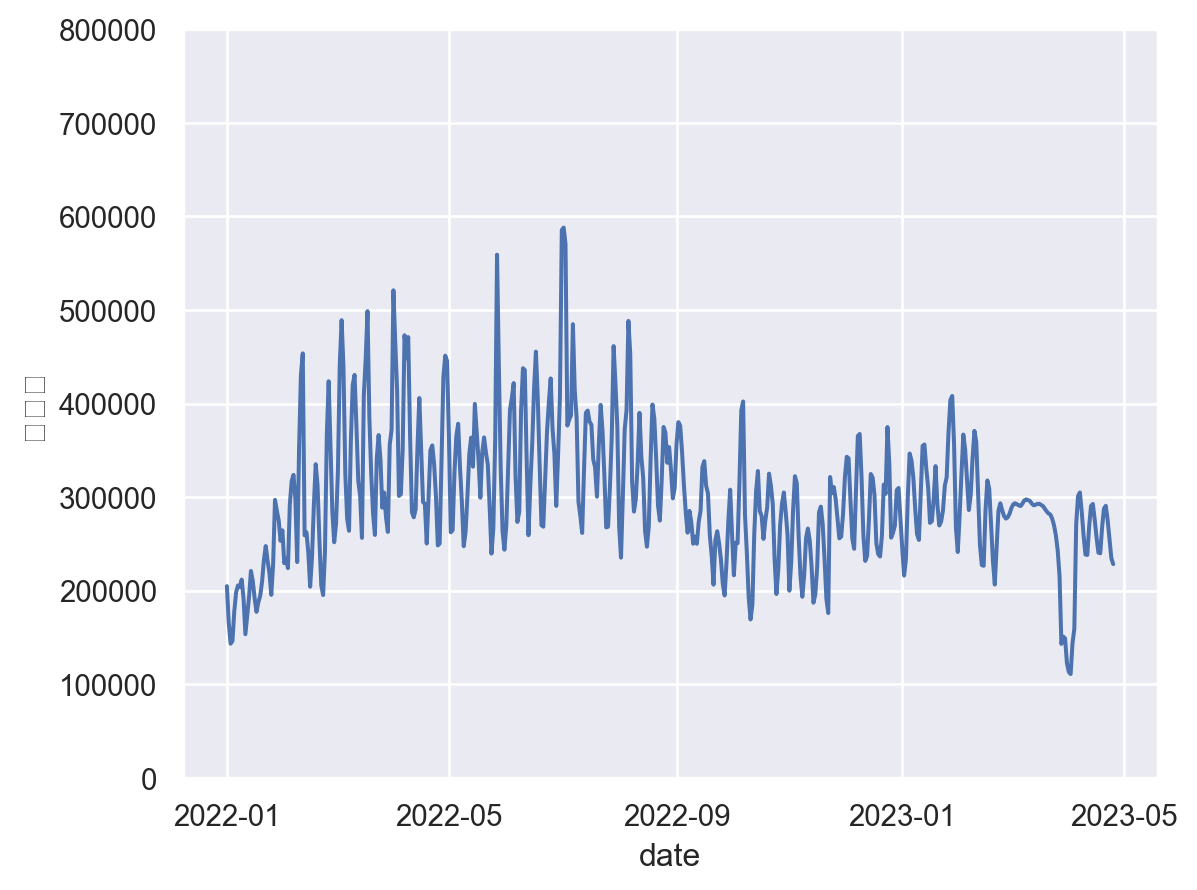

In [95]:
(
    so.Plot(train_all,x='date',y='판매량')
    .add(so.Line())
    .limit(y=(-100,800000))
)

In [96]:
train_big=train_long.groupby(['대분류','date'])['판매량'].sum().reset_index(name='판매량')


<Axes: >

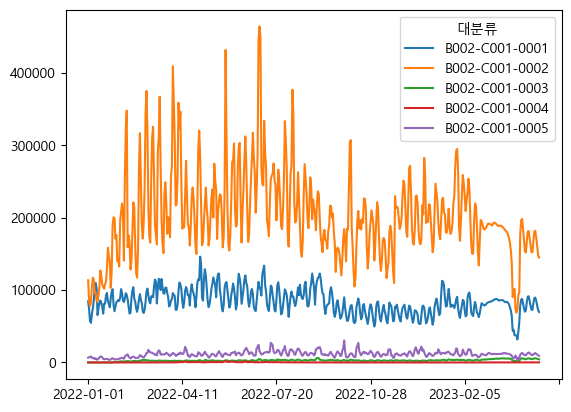

In [97]:
train.groupby('대분류').sum().drop(columns = 'ID').transpose().plot()

In [98]:
train.to_csv('trainprophet_second.csv',encoding='utf-8-sig',index = False)

In [99]:
df=train.iloc[:,[0,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484]]
df.to_csv('submission_second.csv',index=False)

In [100]:
pd.read_csv('submission_second.csv')

ID  2023-04-05  2023-04-06  2023-04-07  2023-04-08  2023-04-09  \
0          0           0           0           0           0           0   
1          1           1           1           1           1           1   
2          2           0           0           0           0           0   
3          3           0           0           0           0           0   
4          4           0           0           0           0           0   
...      ...         ...         ...         ...         ...         ...   
15885  15885          11          13          16          17          18   
15886  15886          37          52          54          50          38   
15887  15887           0           0           0           0           0   
15888  15888           0           0           0           0           0   
15889  15889           0           0           0           0           0   

       2023-04-10  2023-04-11  2023-04-12  2023-04-13  ...  2023-04-16  \
0               0           0           0           0  ...           0   
1               1           1           1           1  ...           1   
2               0           0           0           0  ...           0   
3               0           0           0           0  ...           0   
4               0           0           0           0  ...           0   
...           ...         ...         ...         ...  ...         ...   
15885          14          12          14          19  ...          31   
15886          31          34          46          58  ...          33   
15887           0           0           0           0  ...           0   
15888           0           0           0           0  ...           0   
15889           0           0           0           0  ...           0   

       2023-04-17  2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-22  \
0               0           0           0           0           0           0   
1               1           1           1           2           2           2   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
15885          25          18          14          14          16          18   
15886          35          51          73          87          78          59   
15887           0           0           0           0           0           0   
15888           0           0           0           0           0           0   
15889           0           0           0           0           0           0   

       2023-04-23  2023-04-24  2023-04-25  
0               0           0           0  
1               2           1           1  
2               0           0           0  
3               0           0           0  
4               0           0           0  
...           ...         ...         ...  
15885          20          15          10  
15886          36          25          27  
15887           0           0           0  
15888           0           0           0  
15889           0           0           0  

[15890 rows x 22 columns]